### Import the train dataset for analysis

In [1]:
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
from tqdm import tqdm

# Set the chunksize parameter to load the CSV file in smaller chunks
chunk_size = 100000

# Initialize an empty list to store the chunks
chunks = []

# Use a for loop to load the file in chunks
for chunk in tqdm(pd.read_csv('train.csv', chunksize=chunk_size)):
    # Process each chunk of data here
    chunks.append(chunk)

# Concatenate the chunks into a single DataFrame
df = pd.concat(chunks, ignore_index=True)


263it [00:44,  5.86it/s]


In [3]:
df.head()

session_id  index  elapsed_time      event_name   name  level  page  \
0  20090312431273200      0             0  cutscene_click  basic      0   NaN   
1  20090312431273200      1          1323    person_click  basic      0   NaN   
2  20090312431273200      2           831    person_click  basic      0   NaN   
3  20090312431273200      3          1147    person_click  basic      0   NaN   
4  20090312431273200      4          1863    person_click  basic      0   NaN   

   room_coor_x  room_coor_y  screen_coor_x  screen_coor_y  hover_duration  \
0  -413.991405  -159.314686          380.0          494.0             NaN   
1  -413.991405  -159.314686          380.0          494.0             NaN   
2  -413.991405  -159.314686          380.0          494.0             NaN   
3  -413.991405  -159.314686          380.0          494.0             NaN   
4  -412.991405  -159.314686          381.0          494.0             NaN   

                            text    fqid                       room_fqid  \
0                      undefined   intro  tunic.historicalsociety.closet   
1  Whatcha doing over there, Jo?  gramps  tunic.historicalsociety.closet   
2         Just talking to Teddy.  gramps  tunic.historicalsociety.closet   
3     I gotta run to my meeting!  gramps  tunic.historicalsociety.closet   
4            Can I come, Gramps?  gramps  tunic.historicalsociety.closet   

                                           text_fqid  fullscreen  hq  music  \
0               tunic.historicalsociety.closet.intro           0   0      1   
1  tunic.historicalsociety.closet.gramps.intro_0_...           0   0      1   
2  tunic.historicalsociety.closet.gramps.intro_0_...           0   0      1   
3  tunic.historicalsociety.closet.gramps.intro_0_...           0   0      1   
4  tunic.historicalsociety.closet.gramps.intro_0_...           0   0      1   

  level_group  
0         0-4  
1         0-4  
2         0-4  
3         0-4  
4         0-4

## Printing the missing values in the columns

In [5]:
# Calculate the number and percentage of missing values in each column
for col in df.columns:
    num_missing = df[col].isna().sum()
    pct_missing = num_missing / len(df) * 100
    print(f'{col}: {num_missing} missing values ({pct_missing:.1f}%)')

session_id: 0 missing values (0.0%)
index: 0 missing values (0.0%)
elapsed_time: 0 missing values (0.0%)
event_name: 0 missing values (0.0%)
name: 0 missing values (0.0%)
level: 0 missing values (0.0%)
page: 25732402 missing values (97.9%)
room_coor_x: 2073272 missing values (7.9%)
room_coor_y: 2073272 missing values (7.9%)
screen_coor_x: 2073272 missing values (7.9%)
screen_coor_y: 2073272 missing values (7.9%)
hover_duration: 24294702 missing values (92.4%)
text: 16679807 missing values (63.4%)
fqid: 8274415 missing values (31.5%)
room_fqid: 0 missing values (0.0%)
text_fqid: 16679702 missing values (63.4%)
fullscreen: 0 missing values (0.0%)
hq: 0 missing values (0.0%)
music: 0 missing values (0.0%)
level_group: 0 missing values (0.0%)


### From the missing values we can drive a conclusion that we can ignore columns that are missing value above 25%

The below columns shall be removed 
1. text
2. Hover Duration
3. page
4. fqid
4. text_fqid

## Identifying the type of varaibles in the dataset

In [6]:
data_types = df.dtypes

# Identify the categorical and continuous columns
categorical_cols = list(data_types[data_types == 'object'].index)
continuous_cols = list(data_types[(data_types == 'float64') | (data_types == 'int64')].index)
other_cols = list(data_types[(data_types != 'object') & (data_types != 'float64') & (data_types != 'int64')].index)


In [7]:
# Print the results
print('Categorical Columns:', categorical_cols)
print('Continuous Columns:', continuous_cols)
print('Other Columns:', other_cols)

Categorical Columns: ['event_name', 'name', 'text', 'fqid', 'room_fqid', 'text_fqid', 'level_group']
Continuous Columns: ['session_id', 'index', 'elapsed_time', 'level', 'page', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y', 'hover_duration', 'fullscreen', 'hq', 'music']
Other Columns: []


## Number of unique values in each column

In [8]:
data_types = df.dtypes

# Identify the categorical and continuous columns
categorical_cols = list(data_types[data_types == 'object'].index)
continuous_cols = list(data_types[(data_types == 'float64') | (data_types == 'int64')].index)
other_cols = list(data_types[(data_types != 'object') & (data_types != 'float64') & (data_types != 'int64')].index)

# Print the number of unique values in each column
for col in categorical_cols + continuous_cols + other_cols:
    unique_vals = df[col].nunique()
    print(f'{col} ({data_types[col]}): {unique_vals} unique values')

event_name (object): 11 unique values
name (object): 6 unique values
text (object): 597 unique values
fqid (object): 128 unique values
room_fqid (object): 19 unique values
text_fqid (object): 126 unique values
level_group (object): 3 unique values
session_id (int64): 23562 unique values
index (int64): 20348 unique values
elapsed_time (int64): 5042639 unique values
level (int64): 23 unique values
page (float64): 7 unique values
room_coor_x (float64): 17438693 unique values
room_coor_y (float64): 13651023 unique values
screen_coor_x (float64): 57924 unique values
screen_coor_y (float64): 102591 unique values
hover_duration (float64): 24101 unique values
fullscreen (int64): 2 unique values
hq (int64): 2 unique values
music (int64): 2 unique values


### Replacing the NAN values by -1 .

In [9]:
df = df.fillna(-1)

### Dropping the columns who have majority of values missing

In [10]:
# drop columns with values missing more than 30%. This columns can lead to bias in the NN removing them for better results
df = df.drop(['page', 'hover_duration', 'text', 'fqid', 'text_fqid'], axis=1)

### Generating the features FEATURES1, FEATURES2, FEATURES3 

In [11]:

def percent_name(X):
    XX = []
    temp = X.groupby(by=["session_id", "event_name"])["index"].count()
    total = X.groupby(by=["session_id"])["index"].count()
    names = temp.index.get_level_values(1).unique()
    for name in names:
        temp_name = temp.loc[:, name] / total
        temp_name = temp_name.rename(f"{name}_pct")
        XX.append(temp_name)
    return XX

def compressive_stats_numerical_vars(X):
    XX = []
    temp = X.groupby(by=["session_id"])["elapsed_time"].max() - X.groupby(by=["session_id"])["elapsed_time"].min()
    temp = temp.rename("elapsed_duration")
    XX.append(temp)
    return XX

def compressive_stats_categorical_vars(X, categorical_variables):
    XX = []
    for variable in categorical_variables:
        temp = X.groupby(by=["session_id", variable])["index"].count()
        eles = temp.index.get_level_values(1).unique()
        for ele in eles:
            temp_by_ele = temp.loc[:, ele]
            temp_by_ele = temp_by_ele.rename(f"{variable}_{ele}_count")
            XX.append(temp_by_ele)
    return XX

def game_data(X):
    XX = []
    for game_config in ["fullscreen", "hq", "music"]:
        temp = X.groupby(by=["session_id"])[game_config].first()
        temp.rename(game_config)
        XX.append(temp)
    return XX

def concat_features(X):
    X1 = percent_name(X)
    X2 = compressive_stats_numerical_vars(X)
    categorical_variables = ["level", "event_name", "name"]
    X3 = compressive_stats_categorical_vars(X, categorical_variables)
    X4 = game_data(X)

    X_total = X1 + X2 + X3 + X4
    independent_variables = pd.concat(X_total, axis=1)
    independent_variables = independent_variables.reset_index()
    independent_variables = independent_variables.set_index('session_id')
    return independent_variables

train1 = df[df["level_group"] == "0-4"]
FEATURES1 = concat_features(train1)
print("\tFEATURES1 SUCCESSFULLY GENERATED")

train2 = df[df["level_group"] == "5-12"]
FEATURES2 = concat_features(train2)
print("\tFEATURES2 SUCCESSFULLY GENERATED")

train3 = df[df["level_group"] == "13-22"]
FEATURES3 = concat_features(train3)
print("\tFEATURES3 SUCCESSFULLY GENERATED")

del df, train1, train2, train3

def get_dependent_variable_matrix(df):
    df["question"] = df["session_id"].str.split("_").str[1].str[1:].astype(int)
    df["session"] = df["session_id"].str.split("_").str[0]
    return df


	FEATURES1 SUCCESSFULLY GENERATED
	FEATURES2 SUCCESSFULLY GENERATED
	FEATURES3 SUCCESSFULLY GENERATED


In [12]:
res = pd.read_csv("train_labels.csv")

In [13]:
# replace NaN with -1
FEATURES1.fillna(-1, inplace=True)

In [14]:
FEATURES1

checkpoint_pct  cutscene_click_pct  map_click_pct  \
session_id                                                             
20090312431273200        0.006061            0.169697       0.012121   
20090312433251036        0.007194            0.258993       0.021583   
20090312455206810        0.006711            0.328859       0.013423   
20090313091715820        0.005682            0.193182       0.011364   
20090313571836404        0.008929            0.232143       0.026786   
...                           ...                 ...            ...   
22100215342220508        0.006667            0.193333       0.013333   
22100215460321130        0.006711            0.208054       0.013423   
22100217104993650        0.005076            0.142132       0.010152   
22100219442786200        0.005988            0.191617       0.017964   
22100221145014656        0.004739            0.146919       0.009479   

                   map_hover_pct  navigate_click_pct  notification_click_pct  \
session_id                                                                     
20090312431273200       0.024242            0.490909                0.048485   
20090312433251036       0.021583            0.352518                0.035971   
20090312455206810       0.013423            0.382550                0.060403   
20090313091715820       0.011364            0.454545                0.045455   
20090313571836404       0.017857            0.312500                0.071429   
...                          ...                 ...                     ...   
22100215342220508       0.020000            0.386667                0.060000   
22100215460321130       0.020134            0.335570                0.060403   
22100217104993650      -1.000000            0.527919                0.055838   
22100219442786200       0.005988            0.485030                0.047904   
22100221145014656       0.009479            0.436019                0.042654   

                   object_click_pct  object_hover_pct  observation_click_pct  \
session_id                                                                     
20090312431273200          0.066667          0.024242               0.024242   
20090312433251036          0.107914          0.035971               0.014388   
20090312455206810          0.067114          0.006711              -1.000000   
20090313091715820          0.102273          0.028409               0.011364   
20090313571836404          0.080357          0.044643              -1.000000   
...                             ...               ...                    ...   
22100215342220508          0.086667          0.053333               0.020000   
22100215460321130          0.127517          0.033557               0.006711   
22100217104993650          0.076142          0.030457               0.020305   
22100219442786200          0.053892          0.029940               0.005988   
22100221145014656          0.127962          0.042654               0.023697   

                   person_click_pct  ...  event_name_notebook_click_count  \
session_id                           ...                                    
20090312431273200          0.133333  ...                             -1.0   
20090312433251036          0.129496  ...                              2.0   
20090312455206810          0.120805  ...                             -1.0   
20090313091715820          0.125000  ...                              2.0   
20090313571836404          0.169643  ...                              4.0   
...                             ...  ...                              ...   
22100215342220508          0.140000  ...                              3.0   
22100215460321130          0.140940  ...                              7.0   
22100217104993650          0.116751  ...                              3.0   
22100219442786200          0.119760  ...                              6.0   
22100221145014656          0.127962  ...                              6.0   

In [15]:
FEATURES1 = FEATURES1.drop(['name_next_count', 'name_prev_count'], axis=1)

In [16]:
FEATURES2.fillna(-1, inplace=True)

In [17]:
FEATURES2 = FEATURES2.drop(['name_next_count', 'name_prev_count'], axis=1)

In [18]:
FEATURES2

checkpoint_pct  cutscene_click_pct  map_click_pct  \
session_id                                                             
20090312431273200        0.003378            0.040541       0.027027   
20090312433251036        0.002532            0.027848       0.040506   
20090312455206810        0.004082            0.053061       0.028571   
20090313091715820        0.003067            0.036810       0.027607   
20090313571836404        0.004132            0.045455       0.024793   
...                           ...                 ...            ...   
22100215342220508        0.003344            0.036789       0.023411   
22100215460321130        0.002618            0.028796       0.026178   
22100217104993650        0.002551            0.030612       0.020408   
22100219442786200        0.003597            0.039568       0.025180   
22100221145014656        0.001736            0.020833       0.017361   

                   map_hover_pct  navigate_click_pct  notification_click_pct  \
session_id                                                                     
20090312431273200       0.030405            0.347973                0.030405   
20090312433251036       0.075949            0.291139                0.022785   
20090312455206810       0.065306            0.273469                0.036735   
20090313091715820       0.049080            0.312883                0.027607   
20090313571836404       0.012397            0.301653                0.037190   
...                          ...                 ...                     ...   
22100215342220508       0.030100            0.270903                0.040134   
22100215460321130       0.054974            0.269634                0.023560   
22100217104993650       0.017857            0.288265                0.030612   
22100219442786200       0.035971            0.305755                0.032374   
22100221145014656       0.020833            0.355903                0.015625   

                   object_click_pct  object_hover_pct  observation_click_pct  \
session_id                                                                     
20090312431273200          0.094595          0.070946               0.003378   
20090312433251036          0.187342          0.081013               0.007595   
20090312455206810          0.077551          0.040816               0.004082   
20090313091715820          0.131902          0.070552               0.012270   
20090313571836404          0.074380          0.061983               0.012397   
...                             ...               ...                    ...   
22100215342220508          0.140468          0.083612               0.010033   
22100215460321130          0.133508          0.094241               0.005236   
22100217104993650          0.191327          0.073980               0.002551   
22100219442786200          0.082734          0.064748               0.003597   
22100221145014656          0.208333          0.085069               0.003472   

                   person_click_pct  ...  event_name_observation_click_count  \
session_id                           ...                                       
20090312431273200          0.351351  ...                                   1   
20090312433251036          0.245570  ...                                   3   
20090312455206810          0.391837  ...                                   1   
20090313091715820          0.312883  ...                                   4   
20090313571836404          0.396694  ...                                   3   
...                             ...  ...                                 ...   
22100215342220508          0.331104  ...                                   3   
22100215460321130          0.340314  ...                                   2   
22100217104993650          0.303571  ...                                   1   
22100219442786200          0.341727  ...                                   1   
22100221145014656          0.232639  ...

In [19]:
FEATURES3.fillna(-1, inplace=True)

In [20]:
FEATURES3 = FEATURES3.drop(['name_next_count', 'name_prev_count'], axis=1)

In [21]:
FEATURES3

checkpoint_pct  cutscene_click_pct  map_click_pct  \
session_id                                                             
20090312431273200        0.002381            0.142857       0.014286   
20090312433251036        0.000771            0.050116       0.034695   
20090312455206810        0.002747            0.159341       0.027473   
20090313091715820        0.002037            0.134420       0.014257   
20090313571836404        0.002551            0.140306       0.022959   
...                           ...                 ...            ...   
22100215342220508        0.002358            0.139151       0.016509   
22100215460321130        0.002203            0.154185       0.028634   
22100217104993650        0.001639            0.122951       0.013115   
22100219442786200        0.002364            0.127660       0.018913   
22100221145014656        0.001316            0.100000       0.021053   

                   map_hover_pct  navigate_click_pct  notification_click_pct  \
session_id                                                                     
20090312431273200       0.033333            0.404762                0.023810   
20090312433251036       0.143408            0.491133                0.010794   
20090312455206810       0.032967            0.337912                0.016484   
20090313091715820       0.042770            0.476578                0.022403   
20090313571836404       0.025510            0.436224                0.020408   
...                          ...                 ...                     ...   
22100215342220508       0.035377            0.398585                0.018868   
22100215460321130       0.094714            0.325991                0.017621   
22100217104993650       0.032787            0.455738                0.018033   
22100219442786200       0.030733            0.427896                0.018913   
22100221145014656       0.085526            0.477632                0.007895   

                   object_click_pct  object_hover_pct  observation_click_pct  \
session_id                                                                     
20090312431273200          0.047619          0.030952               0.007143   
20090312433251036          0.063994          0.050887               0.003855   
20090312455206810          0.030220          0.035714               0.008242   
20090313091715820          0.036660          0.034623               0.008147   
20090313571836404          0.038265          0.028061               0.012755   
...                             ...               ...                    ...   
22100215342220508          0.051887          0.051887               0.009434   
22100215460321130          0.028634          0.026432               0.011013   
22100217104993650          0.032787          0.027869               0.006557   
22100219442786200          0.035461          0.026005               0.011820   
22100221145014656          0.063158          0.026316               0.005263   

                   person_click_pct  ...  event_name_observation_click_count  \
session_id                           ...                                       
20090312431273200          0.292857  ...                                   3   
20090312433251036          0.111796  ...                                   5   
20090312455206810          0.277473  ...                                   3   
20090313091715820          0.224033  ...                                   4   
20090313571836404          0.272959  ...                                   5   
...                             ...  ...                                 ...   
22100215342220508          0.257075  ...                                   4   
22100215460321130          0.297357  ...                                   5   
22100217104993650          0.208197  ...                                   4   
22100219442786200          0.238771  ...                                   5   
22100221145014656          0.182895  ...

### The main issue in your previous code that there was an issue with your Data Engineering pipeline. The trees algorithm are at some extent immune to mistakes in the Data Engineering pipeline. 


### This may seem to be a small thing but it took me a very large time to Debug and Solve it.


### Another big tip is also to build a real classification but not logistic regression so the output varaibel should be converted to one hot encoded format.

## Dropping columns that are not present in test data

#### Skipping this step due to the reason that the columns have very high correlation as explained in the video and can't be removed. It is advised to add these columns in the test data

In [22]:
# col_names = ['name_next_count', 'name_prev_count']

# FEATURES1 = FEATURES1.drop(columns=col_names)
# FEATURES2 = FEATURES2.drop(columns=col_names)
# FEATURES3 = FEATURES3.drop(columns=col_names)

## Inference Test Result Data in the Required Format

In [40]:
def print_non_common_values(list1, list2):
    set1 = set(list1)
    set2 = set(list2)
    non_common1 = set1 - set2
    non_common2 = set2 - set1
    if non_common1:
        print(f'Values in train that are not in test: {non_common1}')
    if non_common2:
        print(f'Values in test that are not in train: {non_common2}')


def predict_test_data(file_name, model, question , select_names):
    # Load the test data
    test_df = pd.read_csv('test.csv')

    # Preprocess the test data
    test_df = test_df.fillna(-1)
    test_df = test_df.drop(['page', 'hover_duration', 'text', 'fqid', 'text_fqid'], axis=1)

    # Generate features for the test data
    test1 = test_df[test_df["level_group"] == "0-4"]
    TEST_FEATURES1 = concat_features(test1)

    test2 = test_df[test_df["level_group"] == "5-12"]
    TEST_FEATURES2 = concat_features(test2)

    test3 = test_df[test_df["level_group"] == "13-22"]
    TEST_FEATURES3 = concat_features(test3)

    TEST_FEATURES1.fillna(-1, inplace=True)
    TEST_FEATURES2.fillna(-1, inplace=True)
    TEST_FEATURES3.fillna(-1, inplace=True)

    try:
        TEST_FEATURES1 = TEST_FEATURES1.drop(['name_next_count', 'name_prev_count'], axis=1)
    except:
        print('test feature 1 name_next/prev count not found')
    
    try:
        TEST_FEATURES2 = TEST_FEATURES2.drop(['name_next_count', 'name_prev_count'], axis=1)
    except:
        print('test feature 2 name_next/prev count not found')
        
    try:    
        TEST_FEATURES3 = TEST_FEATURES3.drop(['name_next_count', 'name_prev_count'], axis=1)
    except:
        print('test feature 3 name_next/prev count not found')
    # Function to predict results on the test set
    def predict_test_data(X, model):
        scaler = MinMaxScaler()
        X_scaled = scaler.fit_transform(X)
        ##########################################
        # Get the names of the columns in X_scaled
        feature_names = scaler.get_feature_names_out()
        print(feature_names)
        print_non_common_values(select_names, feature_names)
        # Find the indices of the columns to keep
        select_indices = np.array([i for i in range(len(feature_names)) if feature_names[i] in select_names])

        # Select the columns with indices in select_indices
        X_select = X_scaled[:, select_indices]
        y_pred = np.argmax(model.predict(X_scaled), axis=-1)
        return y_pred

    # Create an empty DataFrame to store the results
    results_df = pd.DataFrame(columns=["session_id", "correct", "session_level"])

    # Make predictions for each question
#     for question in range(1, 19):
#     print(f'\nPREDICT QUESTION {question}')

    if question <= 3:
        X = TEST_FEATURES1
    elif question <= 13:
        X = TEST_FEATURES2
    elif question <= 18:
        X = TEST_FEATURES3

    # Get the model for the current question
    #model = MODELS[question]

    # Make predictions using the model
    y_pred = predict_test_data(X, model)

    # Create a temporary DataFrame to store the results
    temp_df = pd.DataFrame({"session_id": X.index, "correct": y_pred})
    temp_df["session_level"] = question

        # Append the temporary DataFrame to the results DataFrame
    results_df = results_df.append(temp_df, ignore_index=True)

    # Save the predictions to a CSV file
    results_df.to_csv(str(file_name)+"_predictions.csv", index=False)


## Visualization of the results by different algorithms

In [24]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import backend as K


 # No benifit occured plotting activation all were dark images
def plot_activations_1d_cnn(model, layer_idx, input_data):
    get_layer_output = K.function([model.layers[0].input], [model.layers[layer_idx].output])
    layer_output = get_layer_output([input_data])[0]

    n_filters = layer_output.shape[-1]
    for i in range(n_filters):
        plt.figure(figsize=(8, 8))
        plt.imshow(layer_output[0, :, i].reshape(-1, 1), cmap='viridis', aspect='auto')
        plt.axis('off')
        plt.title(f'Filter {i+1} Activation')
        plt.show()

        # No benifit occured plotting activation all were dark images
def plot_activations_lstm(model, layer_idx, input_data):
    get_layer_output = K.function([model.layers[0].input], [model.layers[layer_idx].output])
    layer_output = get_layer_output([input_data])[0]

    plt.figure(figsize=(12, 8))
    plt.imshow(layer_output.T, cmap='viridis', aspect='auto')
    plt.xlabel('Timesteps')
    plt.ylabel('LSTM Units')
    plt.colorbar()
    plt.title('LSTM Layer Activations')
    plt.show()
    
def plot_weights(model, layer_idx):
    weights = model.layers[layer_idx].get_weights()[0]
    n_filters = weights.shape[-1]
    for i in range(n_filters):
        plt.figure(figsize=(8, 8))
        plt.imshow(weights[:, i].reshape(-1, 1), cmap='viridis', aspect='auto')
        plt.axis('off')
        plt.title(f'Filter {i+1} Weights')
        plt.show()



## Model No 1

In [41]:
TARGETS = get_dependent_variable_matrix(res)

import warnings
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score
from tensorflow.keras.layers import Dense, Dropout
import keras
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping




warnings.filterwarnings('ignore')
MODELS_NN = {}
F1_NN = {}
for question in range(1, 19):
    print(f'\nTRAIN QUESTION {question} MODEL')
    if question <= 3:
        X = FEATURES1
    elif question <= 13:
        X = FEATURES2
    elif question <= 18:
        X = FEATURES3
    print(X.columns)
    y = TARGETS[TARGETS["question"] == question]["correct"]
    # Convert the labels to one-hot encoded format
    y_one_hot = to_categorical(y)
    # Normalize input data
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    # Select only the desired columns
    feature_names = scaler.get_feature_names_out()

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_one_hot, test_size=0.2, random_state=42)
    # Define the neural network model
    model = Sequential()
    model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(0.2))  # Introduce dropout of 0.2 after the first layer
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))  # Introduce dropout of 0.2 after the second layer
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.2))  # Introduce dropout of 0.2 after the third layer
    model.add(Dense(2, activation='softmax'))  # Change the output layer to have 2 nodes with softmax activation
    # Compile the model
    sgd = keras.optimizers.SGD(lr=0.01, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=sgd , metrics=['accuracy'])
    # Define the early stopping callback
    early_stop = EarlyStopping(monitor='val_accuracy', patience=4)
    # Train the model
    
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test, y_test), callbacks=[early_stop])
    # Make predictions on the test set
    
    predict_test_data('./test_data_NN/'+str(question) , model , question,  feature_names)
    
    y_pred = np.argmax(model.predict(X_test), axis=-1)
    # Calculate F1 score
    f1 = f1_score(np.argmax(y_test, axis=-1), y_pred)
    # Store the model and F1 score
    MODELS_NN[question] = model
    F1_NN[question] = f1
    print(f'F1 Score for Question {question}: {f1}')


TRAIN QUESTION 1 MODEL
Index(['checkpoint_pct', 'cutscene_click_pct', 'map_click_pct',
       'map_hover_pct', 'navigate_click_pct', 'notification_click_pct',
       'object_click_pct', 'object_hover_pct', 'observation_click_pct',
       'person_click_pct', 'notebook_click_pct', 'elapsed_duration',
       'level_0_count', 'level_1_count', 'level_2_count', 'level_3_count',
       'level_4_count', 'event_name_checkpoint_count',
       'event_name_cutscene_click_count', 'event_name_map_click_count',
       'event_name_map_hover_count', 'event_name_navigate_click_count',
       'event_name_notification_click_count', 'event_name_object_click_count',
       'event_name_object_hover_count', 'event_name_observation_click_count',
       'event_name_person_click_count', 'event_name_notebook_click_count',
       'name_basic_count', 'name_close_count', 'name_undefined_count',
       'name_open_count', 'fullscreen', 'hq', 'music'],
      dtype='object')
Epoch 1/50
590/590 [========================

Epoch 3/50
590/590 [==============================] - 1s 1ms/step - loss: 0.2392 - accuracy: 0.9341 - val_loss: 0.2384 - val_accuracy: 0.9338
Epoch 4/50
590/590 [==============================] - 1s 1ms/step - loss: 0.2382 - accuracy: 0.9341 - val_loss: 0.2353 - val_accuracy: 0.9338
Epoch 5/50
590/590 [==============================] - 1s 1ms/step - loss: 0.2371 - accuracy: 0.9341 - val_loss: 0.2351 - val_accuracy: 0.9338
test feature 1 name_next/prev count not found
test feature 2 name_next/prev count not found
['checkpoint_pct' 'cutscene_click_pct' 'map_click_pct' 'map_hover_pct'
 'navigate_click_pct' 'notebook_click_pct' 'notification_click_pct'
 'object_click_pct' 'object_hover_pct' 'observation_click_pct'
 'person_click_pct' 'elapsed_duration' 'level_0_count' 'level_1_count'
 'level_2_count' 'level_3_count' 'level_4_count'
 'event_name_checkpoint_count' 'event_name_cutscene_click_count'
 'event_name_map_click_count' 'event_name_map_hover_count'
 'event_name_navigate_click_count' '

Epoch 1/50
590/590 [==============================] - 1s 2ms/step - loss: 0.5241 - accuracy: 0.7741 - val_loss: 0.4977 - val_accuracy: 0.7834
Epoch 2/50
590/590 [==============================] - 1s 1ms/step - loss: 0.5126 - accuracy: 0.7743 - val_loss: 0.4969 - val_accuracy: 0.7834
Epoch 3/50
590/590 [==============================] - 1s 1ms/step - loss: 0.5084 - accuracy: 0.7748 - val_loss: 0.4937 - val_accuracy: 0.7838
Epoch 4/50
590/590 [==============================] - 1s 1ms/step - loss: 0.5063 - accuracy: 0.7760 - val_loss: 0.4963 - val_accuracy: 0.7865
Epoch 5/50
590/590 [==============================] - 1s 1ms/step - loss: 0.5054 - accuracy: 0.7759 - val_loss: 0.4922 - val_accuracy: 0.7865
Epoch 6/50
590/590 [==============================] - 1s 1ms/step - loss: 0.5044 - accuracy: 0.7749 - val_loss: 0.4932 - val_accuracy: 0.7832
Epoch 7/50
590/590 [==============================] - 1s 1ms/step - loss: 0.5028 - accuracy: 0.7763 - val_loss: 0.4913 - val_accuracy: 0.7834
Epoch 

148/148 [==============================] - 0s 635us/step
F1 Score for Question 8: 0.7530897367006985

TRAIN QUESTION 9 MODEL
Index(['checkpoint_pct', 'cutscene_click_pct', 'map_click_pct',
       'map_hover_pct', 'navigate_click_pct', 'notification_click_pct',
       'object_click_pct', 'object_hover_pct', 'observation_click_pct',
       'person_click_pct', 'notebook_click_pct', 'elapsed_duration',
       'level_5_count', 'level_6_count', 'level_7_count', 'level_8_count',
       'level_9_count', 'level_10_count', 'level_11_count', 'level_12_count',
       'event_name_checkpoint_count', 'event_name_cutscene_click_count',
       'event_name_map_click_count', 'event_name_map_hover_count',
       'event_name_navigate_click_count',
       'event_name_notification_click_count', 'event_name_object_click_count',
       'event_name_object_hover_count', 'event_name_observation_click_count',
       'event_name_person_click_count', 'event_name_notebook_click_count',
       'name_basic_count', 'nam

Epoch 1/50
590/590 [==============================] - 1s 1ms/step - loss: 0.6489 - accuracy: 0.6432 - val_loss: 0.6405 - val_accuracy: 0.6404
Epoch 2/50
590/590 [==============================] - 1s 1ms/step - loss: 0.6415 - accuracy: 0.6475 - val_loss: 0.6421 - val_accuracy: 0.6444
Epoch 3/50
590/590 [==============================] - 1s 1ms/step - loss: 0.6390 - accuracy: 0.6490 - val_loss: 0.6369 - val_accuracy: 0.6493
Epoch 4/50
590/590 [==============================] - 1s 1ms/step - loss: 0.6375 - accuracy: 0.6469 - val_loss: 0.6366 - val_accuracy: 0.6525
Epoch 5/50
590/590 [==============================] - 1s 1ms/step - loss: 0.6361 - accuracy: 0.6518 - val_loss: 0.6375 - val_accuracy: 0.6522
Epoch 6/50
590/590 [==============================] - 1s 1ms/step - loss: 0.6369 - accuracy: 0.6495 - val_loss: 0.6367 - val_accuracy: 0.6558
Epoch 7/50
590/590 [==============================] - 1s 1ms/step - loss: 0.6366 - accuracy: 0.6500 - val_loss: 0.6323 - val_accuracy: 0.6584
Epoch 

148/148 [==============================] - 0s 625us/step
F1 Score for Question 13: 0.0

TRAIN QUESTION 14 MODEL
Index(['checkpoint_pct', 'cutscene_click_pct', 'map_click_pct',
       'map_hover_pct', 'navigate_click_pct', 'notification_click_pct',
       'object_click_pct', 'object_hover_pct', 'observation_click_pct',
       'person_click_pct', 'notebook_click_pct', 'elapsed_duration',
       'level_13_count', 'level_14_count', 'level_15_count', 'level_16_count',
       'level_17_count', 'level_18_count', 'level_19_count', 'level_20_count',
       'level_21_count', 'level_22_count', 'event_name_checkpoint_count',
       'event_name_cutscene_click_count', 'event_name_map_click_count',
       'event_name_map_hover_count', 'event_name_navigate_click_count',
       'event_name_notification_click_count', 'event_name_object_click_count',
       'event_name_object_hover_count', 'event_name_observation_click_count',
       'event_name_person_click_count', 'event_name_notebook_click_count',
   

Epoch 1/50
590/590 [==============================] - 1s 2ms/step - loss: 0.5818 - accuracy: 0.7328 - val_loss: 0.5749 - val_accuracy: 0.7363
Epoch 2/50
590/590 [==============================] - 1s 1ms/step - loss: 0.5776 - accuracy: 0.7345 - val_loss: 0.5737 - val_accuracy: 0.7363
Epoch 3/50
590/590 [==============================] - 1s 1ms/step - loss: 0.5772 - accuracy: 0.7346 - val_loss: 0.5729 - val_accuracy: 0.7363
Epoch 4/50
590/590 [==============================] - 1s 1ms/step - loss: 0.5771 - accuracy: 0.7345 - val_loss: 0.5741 - val_accuracy: 0.7360
Epoch 5/50
590/590 [==============================] - 1s 1ms/step - loss: 0.5766 - accuracy: 0.7345 - val_loss: 0.5752 - val_accuracy: 0.7363
test feature 1 name_next/prev count not found
test feature 2 name_next/prev count not found
['checkpoint_pct' 'cutscene_click_pct' 'map_click_pct' 'map_hover_pct'
 'navigate_click_pct' 'notebook_click_pct' 'notification_click_pct'
 'object_click_pct' 'object_hover_pct' 'observation_click_p

### Making one submission  csv as per request

In [43]:
import os
import pandas as pd

# Set the path to the folder containing the CSV files
folder_path = './test_data_NN/'

# Get a list of all CSV files in the folder
csv_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]

# Create an empty list to store the DataFrames
dfs = []

# Iterate over each CSV file, read it into a DataFrame, and append it to the list
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

# Concatenate the DataFrames vertically
combined_df = pd.concat(dfs, axis=0)

# Write the combined DataFrame to a CSV file
combined_df.to_csv('submission_NN.csv', index=False)

In [2]:
import pandas as pd
import os

# Set the path to the folder containing the CSV files
folder_path = './test_data_NN/'

# Create an empty list to store the DataFrames
dfs = []

# Iterate over each CSV file in the folder and read it into a DataFrame
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        # Append the filename to the DataFrame as a new column
        df['filename'] = filename
        dfs.append(df)

# Concatenate the DataFrames vertically
combined_df = pd.concat(dfs, ignore_index=True)

# Define a function to modify the session_id column based on the filename number
def modify_session_id(row):
    # Get the filename number from the filename string
    filename_num = int(row['filename'].split('_')[0])
    # Append the appropriate string based on the filename number
    return str(row['session_id']) + '_q{}'.format(filename_num)

# Apply the modify_session_id function to the session_id column
combined_df['session_id'] = combined_df.apply(modify_session_id, axis=1)

# Remove the 'filename' column
combined_df = combined_df.drop(columns=['filename'])

# Write the modified DataFrame to a new CSV file
combined_df.to_csv('submission_NN__.csv', index=False)

# Model No 2

In [27]:
import warnings
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score

warnings.filterwarnings('ignore')

MODELS_SVM = {}
F1_SVM = {}

for question in range(1, 19):
    print(f'\nTRAIN QUESTION {question} MODEL')
    
    if question <= 3:
        X = FEATURES1
    elif question <= 13:
        X = FEATURES2
    elif question <= 18:
        X = FEATURES3
    
    print(X.columns)
    y = TARGETS[TARGETS["question"] == question]["correct"]
    
    # Normalize input data
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    # Define the SVM model
    model = SVC(kernel='linear', C=1, random_state=42)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)
    
    # Store the model and F1 score
    MODELS_SVM[question] = model
    F1_SVM[question] = f1
    
    print(f'F1 Score for Question {question}: {f1}')



TRAIN QUESTION 1 MODEL
Index(['checkpoint_pct', 'cutscene_click_pct', 'map_click_pct',
       'map_hover_pct', 'navigate_click_pct', 'notification_click_pct',
       'object_click_pct', 'object_hover_pct', 'observation_click_pct',
       'person_click_pct', 'notebook_click_pct', 'elapsed_duration',
       'level_0_count', 'level_1_count', 'level_2_count', 'level_3_count',
       'level_4_count', 'event_name_checkpoint_count',
       'event_name_cutscene_click_count', 'event_name_map_click_count',
       'event_name_map_hover_count', 'event_name_navigate_click_count',
       'event_name_notification_click_count', 'event_name_object_click_count',
       'event_name_object_hover_count', 'event_name_observation_click_count',
       'event_name_person_click_count', 'event_name_notebook_click_count',
       'name_basic_count', 'name_close_count', 'name_undefined_count',
       'name_open_count', 'fullscreen', 'hq', 'music'],
      dtype='object')
F1 Score for Question 1: 0.8464080283930975


F1 Score for Question 8: 0.7555967677838124

TRAIN QUESTION 9 MODEL
Index(['checkpoint_pct', 'cutscene_click_pct', 'map_click_pct',
       'map_hover_pct', 'navigate_click_pct', 'notification_click_pct',
       'object_click_pct', 'object_hover_pct', 'observation_click_pct',
       'person_click_pct', 'notebook_click_pct', 'elapsed_duration',
       'level_5_count', 'level_6_count', 'level_7_count', 'level_8_count',
       'level_9_count', 'level_10_count', 'level_11_count', 'level_12_count',
       'event_name_checkpoint_count', 'event_name_cutscene_click_count',
       'event_name_map_click_count', 'event_name_map_hover_count',
       'event_name_navigate_click_count',
       'event_name_notification_click_count', 'event_name_object_click_count',
       'event_name_object_hover_count', 'event_name_observation_click_count',
       'event_name_person_click_count', 'event_name_notebook_click_count',
       'name_basic_count', 'name_close_count', 'name_undefined_count',
       'name_open

F1 Score for Question 16: 0.8480997189294879

TRAIN QUESTION 17 MODEL
Index(['checkpoint_pct', 'cutscene_click_pct', 'map_click_pct',
       'map_hover_pct', 'navigate_click_pct', 'notification_click_pct',
       'object_click_pct', 'object_hover_pct', 'observation_click_pct',
       'person_click_pct', 'notebook_click_pct', 'elapsed_duration',
       'level_13_count', 'level_14_count', 'level_15_count', 'level_16_count',
       'level_17_count', 'level_18_count', 'level_19_count', 'level_20_count',
       'level_21_count', 'level_22_count', 'event_name_checkpoint_count',
       'event_name_cutscene_click_count', 'event_name_map_click_count',
       'event_name_map_hover_count', 'event_name_navigate_click_count',
       'event_name_notification_click_count', 'event_name_object_click_count',
       'event_name_object_hover_count', 'event_name_observation_click_count',
       'event_name_person_click_count', 'event_name_notebook_click_count',
       'name_basic_count', 'name_close_count'

# Model No 3

In [44]:
import warnings
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score

warnings.filterwarnings('ignore')

MODELS_nb = {}
F1_nb = {}

for question in range(1, 19):
    print(f'\nTRAIN QUESTION {question} MODEL')
    
    if question <= 3:
        X = FEATURES1
    elif question <= 13:
        X = FEATURES2
    elif question <= 18:
        X = FEATURES3
    
    print(X.columns)
    y = TARGETS[TARGETS["question"] == question]["correct"]
    
    # Normalize input data
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    feature_names = scaler.get_feature_names_out()
    
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    # Define the Naive Bayes model
    model = GaussianNB()
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    
    predict_test_data('./test_data_naive_bayes/'+str(question) , model , question,  feature_names)
    
    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)
    
    # Store the model and F1 score
    MODELS_nb[question] = model
    F1_nb[question] = f1
    
    print(f'F1 Score for Question {question}: {f1}')



TRAIN QUESTION 1 MODEL
Index(['checkpoint_pct', 'cutscene_click_pct', 'map_click_pct',
       'map_hover_pct', 'navigate_click_pct', 'notification_click_pct',
       'object_click_pct', 'object_hover_pct', 'observation_click_pct',
       'person_click_pct', 'notebook_click_pct', 'elapsed_duration',
       'level_0_count', 'level_1_count', 'level_2_count', 'level_3_count',
       'level_4_count', 'event_name_checkpoint_count',
       'event_name_cutscene_click_count', 'event_name_map_click_count',
       'event_name_map_hover_count', 'event_name_navigate_click_count',
       'event_name_notification_click_count', 'event_name_object_click_count',
       'event_name_object_hover_count', 'event_name_observation_click_count',
       'event_name_person_click_count', 'event_name_notebook_click_count',
       'name_basic_count', 'name_close_count', 'name_undefined_count',
       'name_open_count', 'fullscreen', 'hq', 'music'],
      dtype='object')
test feature 1 name_next/prev count not foun

test feature 1 name_next/prev count not found
test feature 2 name_next/prev count not found
['checkpoint_pct' 'cutscene_click_pct' 'map_click_pct' 'map_hover_pct'
 'navigate_click_pct' 'notebook_click_pct' 'notification_click_pct'
 'object_click_pct' 'object_hover_pct' 'observation_click_pct'
 'person_click_pct' 'elapsed_duration' 'level_5_count' 'level_6_count'
 'level_7_count' 'level_8_count' 'level_9_count' 'level_10_count'
 'level_11_count' 'level_12_count' 'event_name_checkpoint_count'
 'event_name_cutscene_click_count' 'event_name_map_click_count'
 'event_name_map_hover_count' 'event_name_navigate_click_count'
 'event_name_notebook_click_count' 'event_name_notification_click_count'
 'event_name_object_click_count' 'event_name_object_hover_count'
 'event_name_observation_click_count' 'event_name_person_click_count'
 'name_basic_count' 'name_close_count' 'name_open_count'
 'name_undefined_count' 'fullscreen' 'hq' 'music']
F1 Score for Question 6: 0.8395786104813975

TRAIN QUESTION 

F1 Score for Question 11: 0.7524163568773236

TRAIN QUESTION 12 MODEL
Index(['checkpoint_pct', 'cutscene_click_pct', 'map_click_pct',
       'map_hover_pct', 'navigate_click_pct', 'notification_click_pct',
       'object_click_pct', 'object_hover_pct', 'observation_click_pct',
       'person_click_pct', 'notebook_click_pct', 'elapsed_duration',
       'level_5_count', 'level_6_count', 'level_7_count', 'level_8_count',
       'level_9_count', 'level_10_count', 'level_11_count', 'level_12_count',
       'event_name_checkpoint_count', 'event_name_cutscene_click_count',
       'event_name_map_click_count', 'event_name_map_hover_count',
       'event_name_navigate_click_count',
       'event_name_notification_click_count', 'event_name_object_click_count',
       'event_name_object_hover_count', 'event_name_observation_click_count',
       'event_name_person_click_count', 'event_name_notebook_click_count',
       'name_basic_count', 'name_close_count', 'name_undefined_count',
       'name_op

test feature 1 name_next/prev count not found
test feature 2 name_next/prev count not found
['checkpoint_pct' 'cutscene_click_pct' 'map_click_pct' 'map_hover_pct'
 'navigate_click_pct' 'notebook_click_pct' 'notification_click_pct'
 'object_click_pct' 'object_hover_pct' 'observation_click_pct'
 'person_click_pct' 'elapsed_duration' 'level_13_count' 'level_14_count'
 'level_15_count' 'level_16_count' 'level_17_count' 'level_18_count'
 'level_19_count' 'level_20_count' 'level_21_count' 'level_22_count'
 'event_name_checkpoint_count' 'event_name_cutscene_click_count'
 'event_name_map_click_count' 'event_name_map_hover_count'
 'event_name_navigate_click_count' 'event_name_notebook_click_count'
 'event_name_notification_click_count' 'event_name_object_click_count'
 'event_name_object_hover_count' 'event_name_observation_click_count'
 'event_name_person_click_count' 'name_basic_count' 'name_close_count'
 'name_open_count' 'name_undefined_count' 'fullscreen' 'hq' 'music']
F1 Score for Question

### Making one Submission file as per request

In [45]:
import os
import pandas as pd

# Set the path to the folder containing the CSV files
folder_path = './test_data_naive_bayes/'

# Get a list of all CSV files in the folder
csv_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]

# Create an empty list to store the DataFrames
dfs = []

# Iterate over each CSV file, read it into a DataFrame, and append it to the list
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

# Concatenate the DataFrames vertically
combined_df = pd.concat(dfs, axis=0)

# Write the combined DataFrame to a CSV file
combined_df.to_csv('submission_Naive_bayes.csv', index=False)

In [ ]:
import pandas as pd
import os

# Set the path to the folder containing the CSV files
folder_path = './test_data_naive_bayes/'

# Create an empty list to store the DataFrames
dfs = []

# Iterate over each CSV file in the folder and read it into a DataFrame
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        # Append the filename to the DataFrame as a new column
        df['filename'] = filename
        dfs.append(df)

# Concatenate the DataFrames vertically
combined_df = pd.concat(dfs, ignore_index=True)

# Define a function to modify the session_id column based on the filename number
def modify_session_id(row):
    # Get the filename number from the filename string
    filename_num = int(row['filename'].split('_')[0])
    # Append the appropriate string based on the filename number
    return str(row['session_id']) + '_q{}'.format(filename_num)

# Apply the modify_session_id function to the session_id column
combined_df['session_id'] = combined_df.apply(modify_session_id, axis=1)

# Remove the 'filename' column
combined_df = combined_df.drop(columns=['filename'])

# Write the modified DataFrame to a new CSV file
combined_df.to_csv('submission_Naive_bayes__.csv', index=False)

# Model No 4

In [29]:
import warnings
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score

warnings.filterwarnings('ignore')

MODELS_gb = {}
F1_gb = {}

for question in range(1, 19):
    print(f'\nTRAIN QUESTION {question} MODEL')
    
    if question <= 3:
        X = FEATURES1
    elif question <= 13:
        X = FEATURES2
    elif question <= 18:
        X = FEATURES3
    
    print(X.columns)
    y = TARGETS[TARGETS["question"] == question]["correct"]
    
    # Normalize input data
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    # Define the GBM model
    model = GradientBoostingClassifier(random_state=42)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)
    
    # Store the model and F1 score
    MODELS_gb[question] = model
    F1_gb[question] = f1
    
    print(f'F1 Score for Question {question}: {f1}')



TRAIN QUESTION 1 MODEL
Index(['checkpoint_pct', 'cutscene_click_pct', 'map_click_pct',
       'map_hover_pct', 'navigate_click_pct', 'notification_click_pct',
       'object_click_pct', 'object_hover_pct', 'observation_click_pct',
       'person_click_pct', 'notebook_click_pct', 'elapsed_duration',
       'level_0_count', 'level_1_count', 'level_2_count', 'level_3_count',
       'level_4_count', 'event_name_checkpoint_count',
       'event_name_cutscene_click_count', 'event_name_map_click_count',
       'event_name_map_hover_count', 'event_name_navigate_click_count',
       'event_name_notification_click_count', 'event_name_object_click_count',
       'event_name_object_hover_count', 'event_name_observation_click_count',
       'event_name_person_click_count', 'event_name_notebook_click_count',
       'name_basic_count', 'name_close_count', 'name_undefined_count',
       'name_open_count', 'fullscreen', 'hq', 'music'],
      dtype='object')
F1 Score for Question 1: 0.8454648669105589


F1 Score for Question 8: 0.7464442013129103

TRAIN QUESTION 9 MODEL
Index(['checkpoint_pct', 'cutscene_click_pct', 'map_click_pct',
       'map_hover_pct', 'navigate_click_pct', 'notification_click_pct',
       'object_click_pct', 'object_hover_pct', 'observation_click_pct',
       'person_click_pct', 'notebook_click_pct', 'elapsed_duration',
       'level_5_count', 'level_6_count', 'level_7_count', 'level_8_count',
       'level_9_count', 'level_10_count', 'level_11_count', 'level_12_count',
       'event_name_checkpoint_count', 'event_name_cutscene_click_count',
       'event_name_map_click_count', 'event_name_map_hover_count',
       'event_name_navigate_click_count',
       'event_name_notification_click_count', 'event_name_object_click_count',
       'event_name_object_hover_count', 'event_name_observation_click_count',
       'event_name_person_click_count', 'event_name_notebook_click_count',
       'name_basic_count', 'name_close_count', 'name_undefined_count',
       'name_open

F1 Score for Question 16: 0.8474451660335743

TRAIN QUESTION 17 MODEL
Index(['checkpoint_pct', 'cutscene_click_pct', 'map_click_pct',
       'map_hover_pct', 'navigate_click_pct', 'notification_click_pct',
       'object_click_pct', 'object_hover_pct', 'observation_click_pct',
       'person_click_pct', 'notebook_click_pct', 'elapsed_duration',
       'level_13_count', 'level_14_count', 'level_15_count', 'level_16_count',
       'level_17_count', 'level_18_count', 'level_19_count', 'level_20_count',
       'level_21_count', 'level_22_count', 'event_name_checkpoint_count',
       'event_name_cutscene_click_count', 'event_name_map_click_count',
       'event_name_map_hover_count', 'event_name_navigate_click_count',
       'event_name_notification_click_count', 'event_name_object_click_count',
       'event_name_object_hover_count', 'event_name_observation_click_count',
       'event_name_person_click_count', 'event_name_notebook_click_count',
       'name_basic_count', 'name_close_count'

## Model No 5


TRAIN QUESTION 1 MODEL
Index(['checkpoint_pct', 'cutscene_click_pct', 'map_click_pct',
       'map_hover_pct', 'navigate_click_pct', 'notification_click_pct',
       'object_click_pct', 'object_hover_pct', 'observation_click_pct',
       'person_click_pct', 'notebook_click_pct', 'elapsed_duration',
       'level_0_count', 'level_1_count', 'level_2_count', 'level_3_count',
       'level_4_count', 'event_name_checkpoint_count',
       'event_name_cutscene_click_count', 'event_name_map_click_count',
       'event_name_map_hover_count', 'event_name_navigate_click_count',
       'event_name_notification_click_count', 'event_name_object_click_count',
       'event_name_object_hover_count', 'event_name_observation_click_count',
       'event_name_person_click_count', 'event_name_notebook_click_count',
       'name_basic_count', 'name_close_count', 'name_undefined_count',
       'name_open_count', 'fullscreen', 'hq', 'music'],
      dtype='object')
Epoch 1/50
590/590 [========================

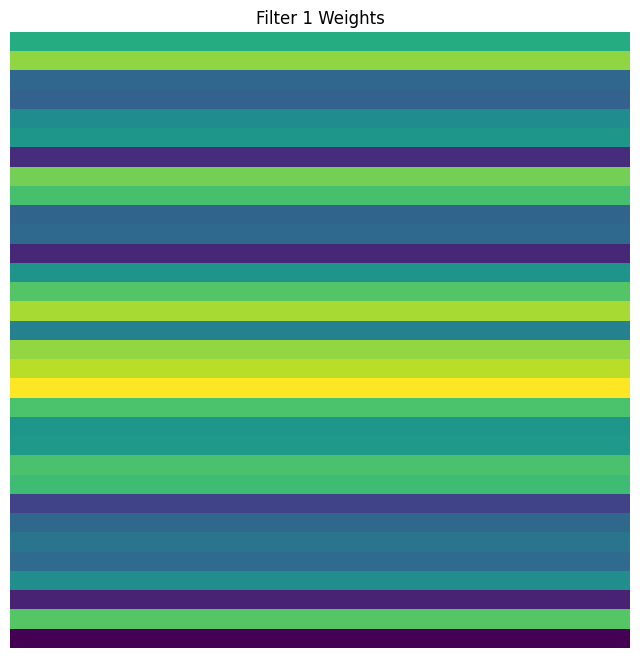

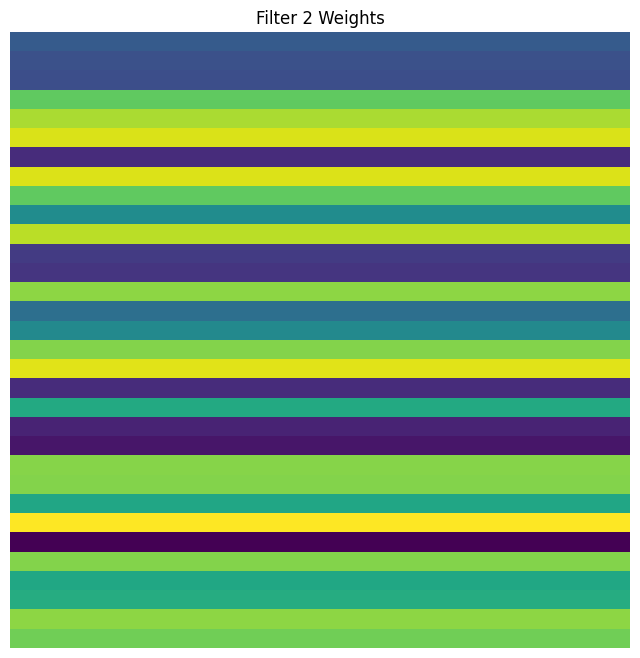

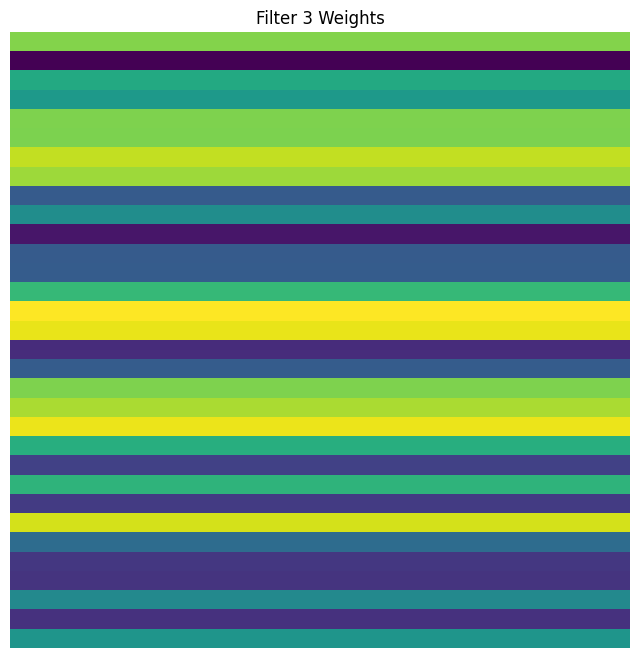

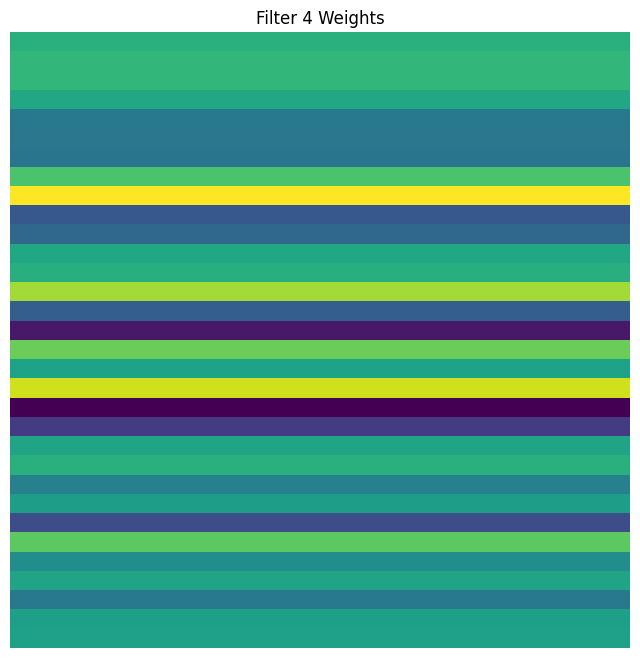

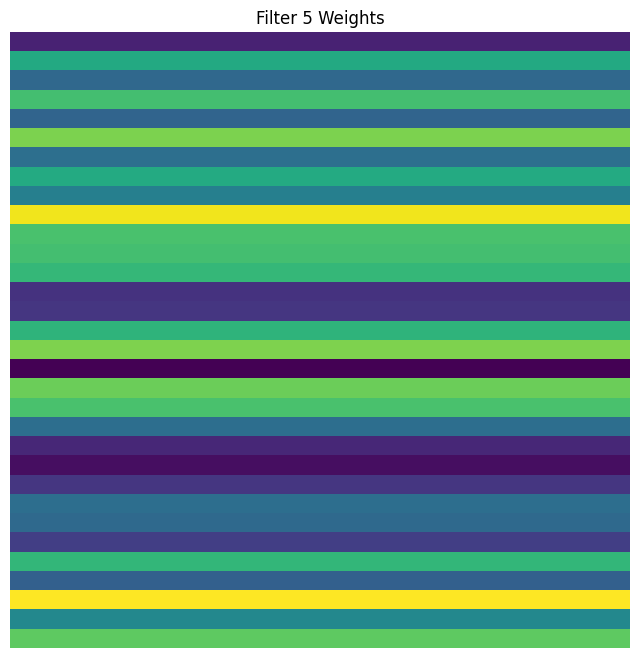

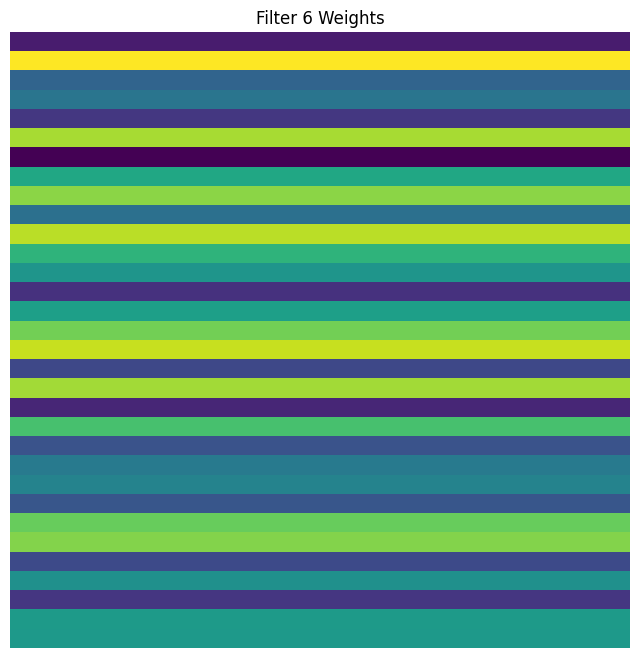

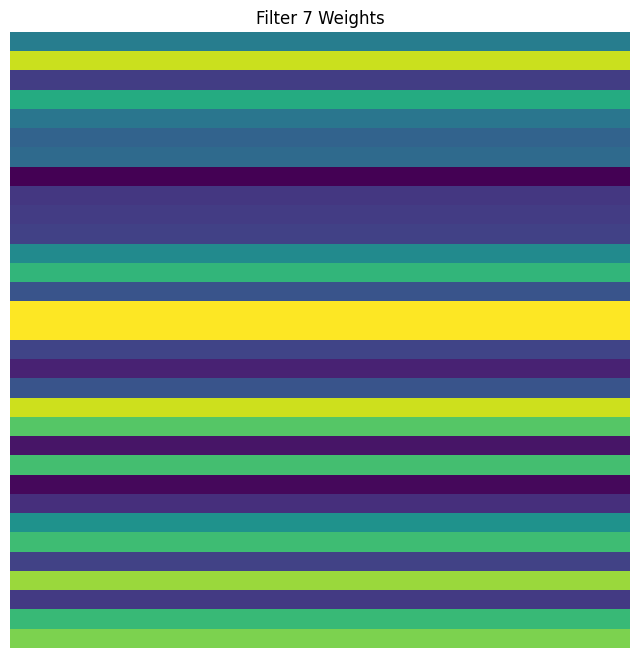

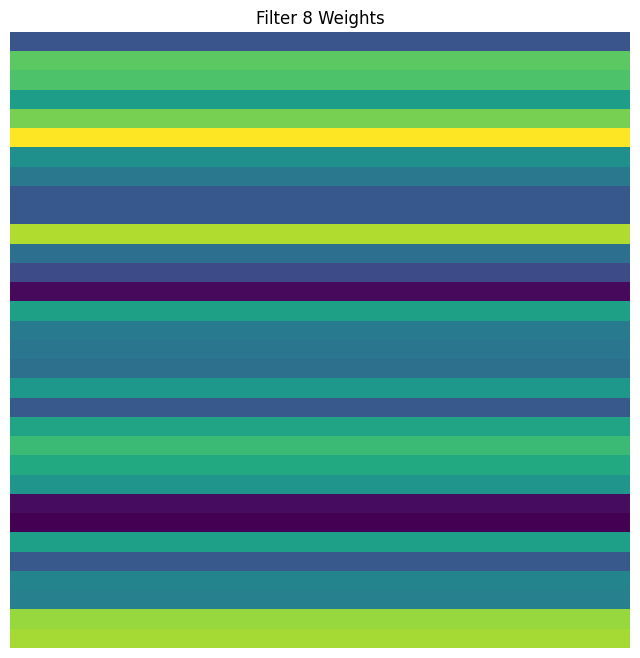

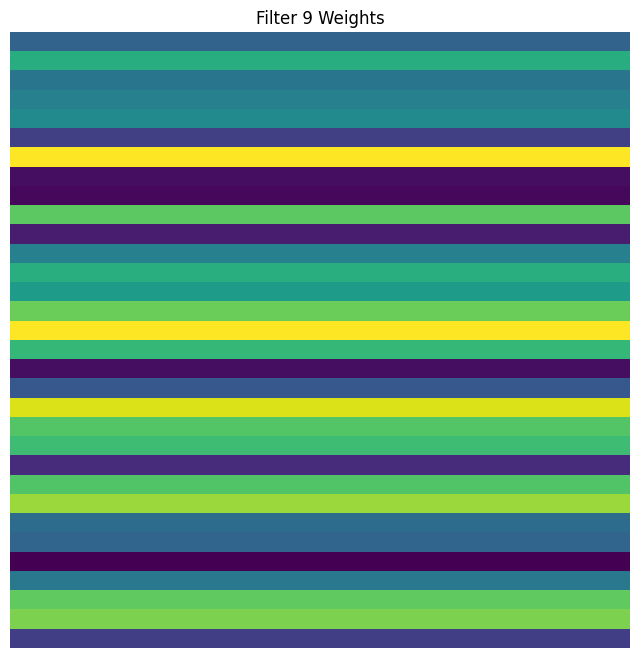

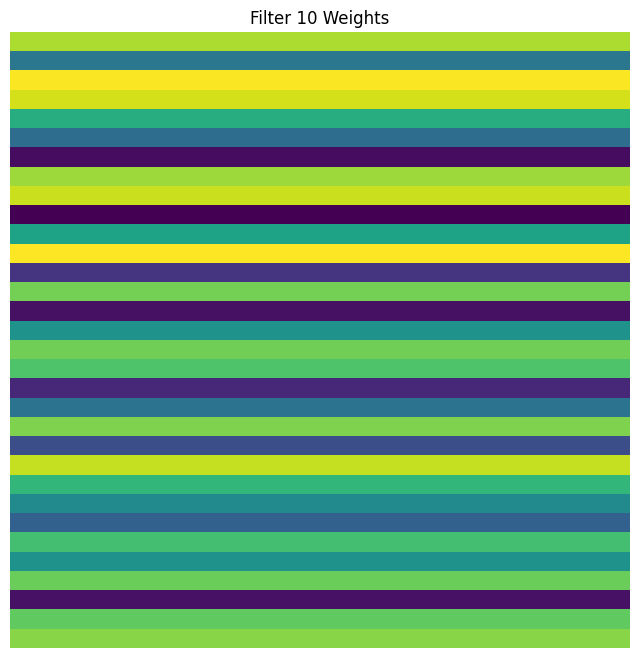

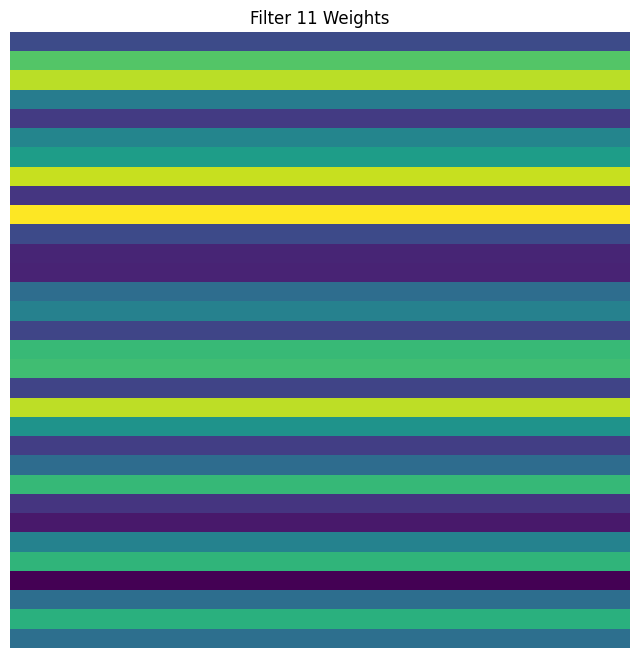

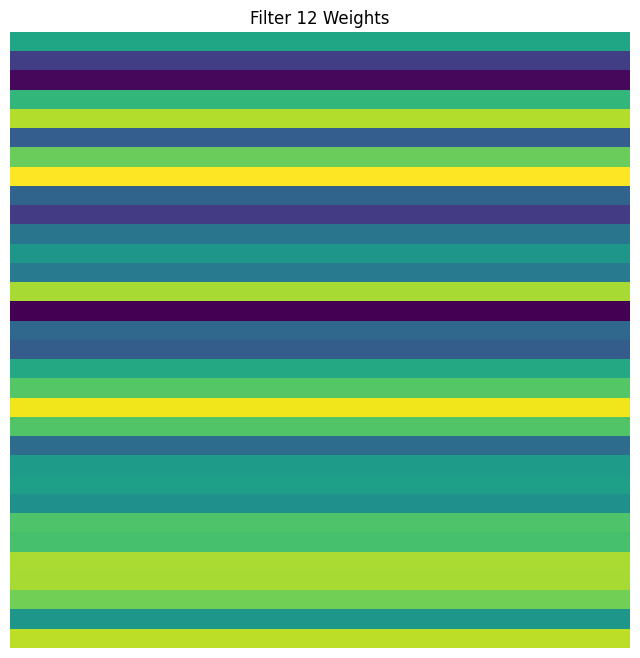

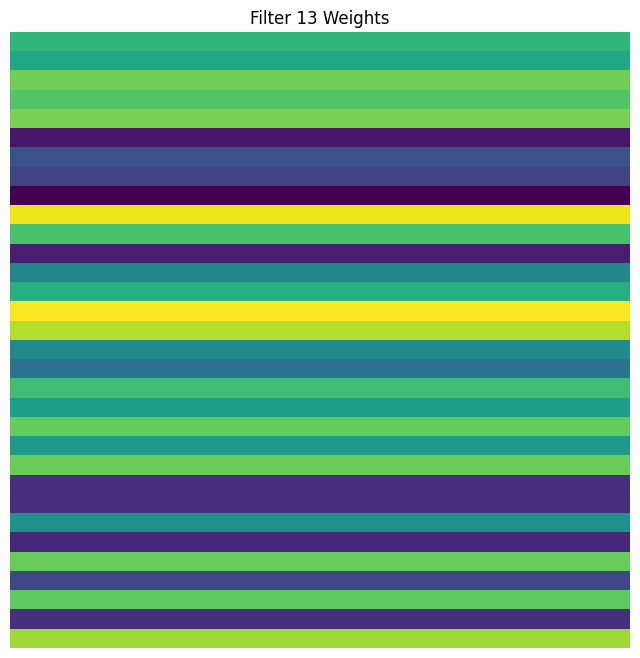

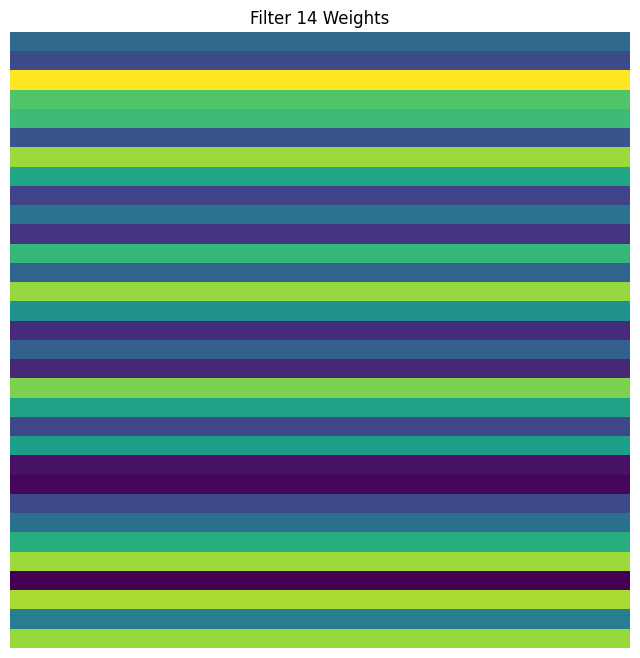

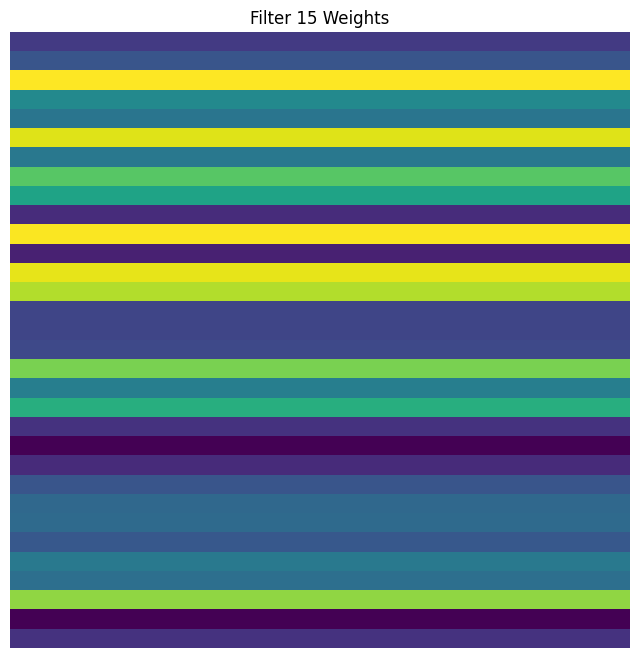

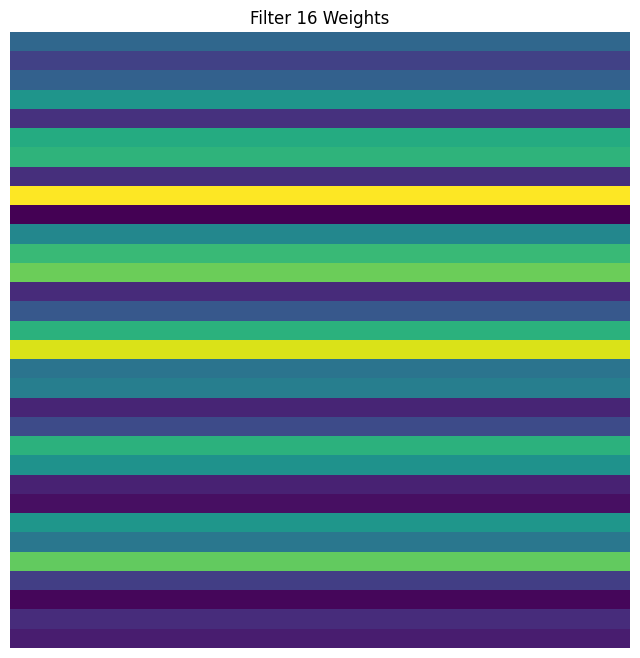

148/148 [==============================] - 0s 953us/step
F1 Score for Question 1: 0.8435683598685872

TRAIN QUESTION 2 MODEL
Index(['checkpoint_pct', 'cutscene_click_pct', 'map_click_pct',
       'map_hover_pct', 'navigate_click_pct', 'notification_click_pct',
       'object_click_pct', 'object_hover_pct', 'observation_click_pct',
       'person_click_pct', 'notebook_click_pct', 'elapsed_duration',
       'level_0_count', 'level_1_count', 'level_2_count', 'level_3_count',
       'level_4_count', 'event_name_checkpoint_count',
       'event_name_cutscene_click_count', 'event_name_map_click_count',
       'event_name_map_hover_count', 'event_name_navigate_click_count',
       'event_name_notification_click_count', 'event_name_object_click_count',
       'event_name_object_hover_count', 'event_name_observation_click_count',
       'event_name_person_click_count', 'event_name_notebook_click_count',
       'name_basic_count', 'name_close_count', 'name_undefined_count',
       'name_open_cou

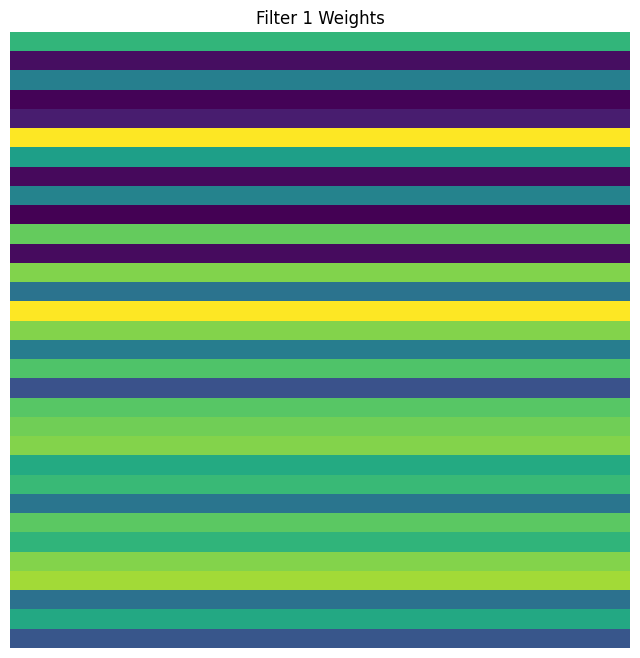

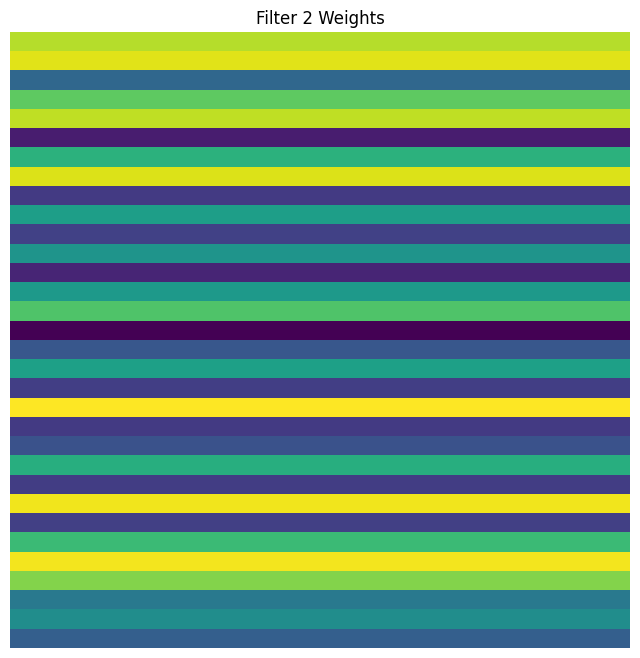

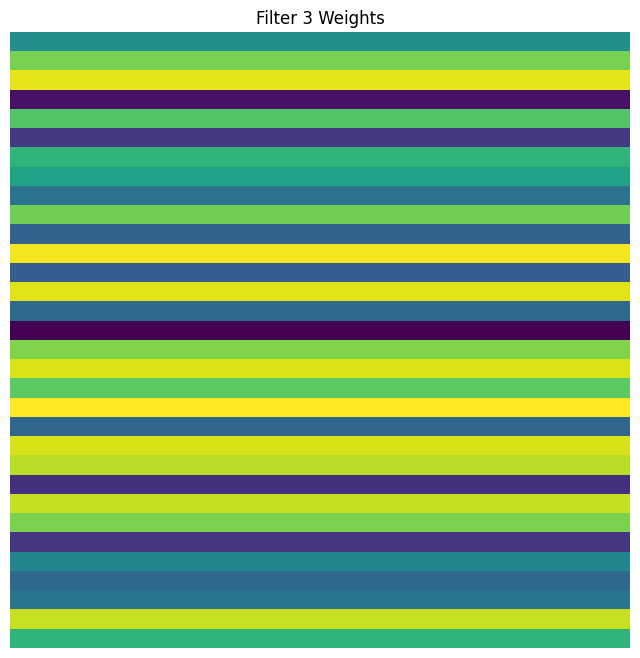

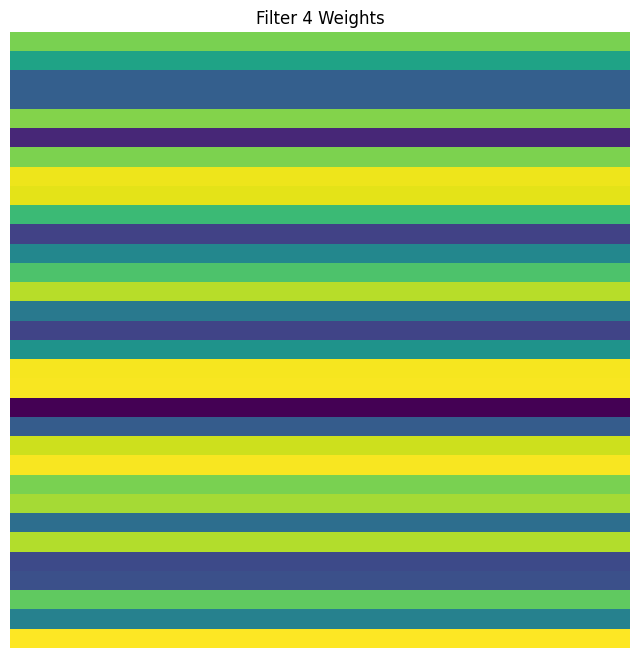

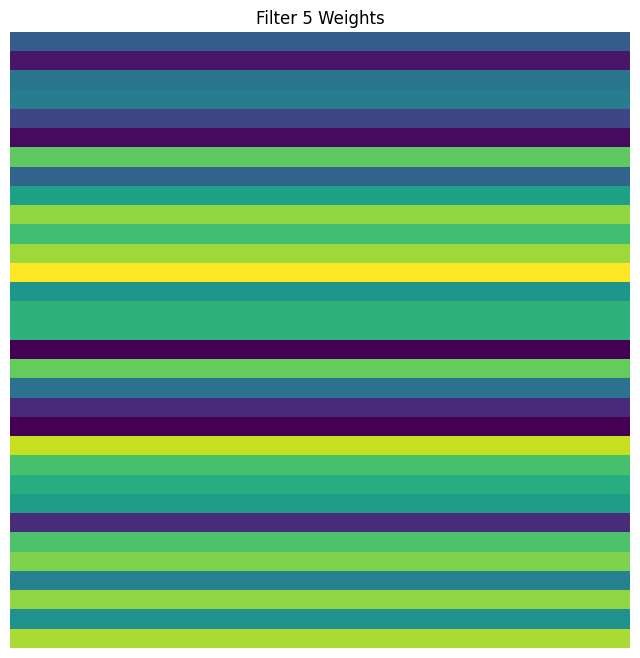

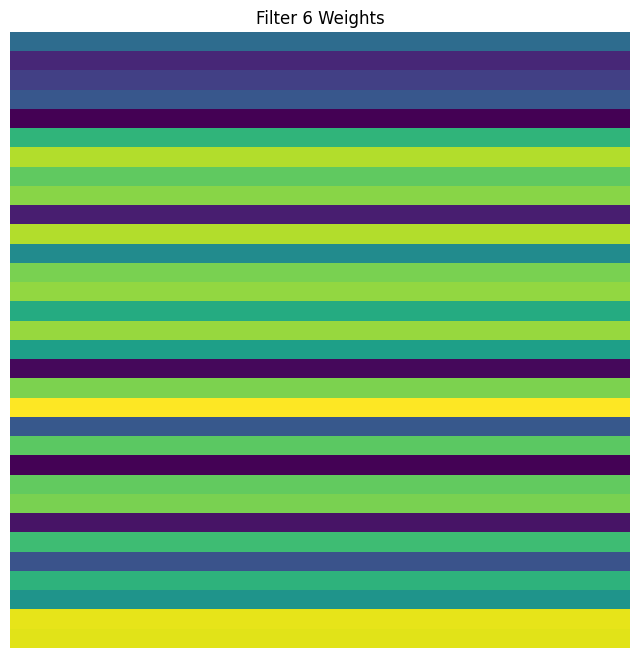

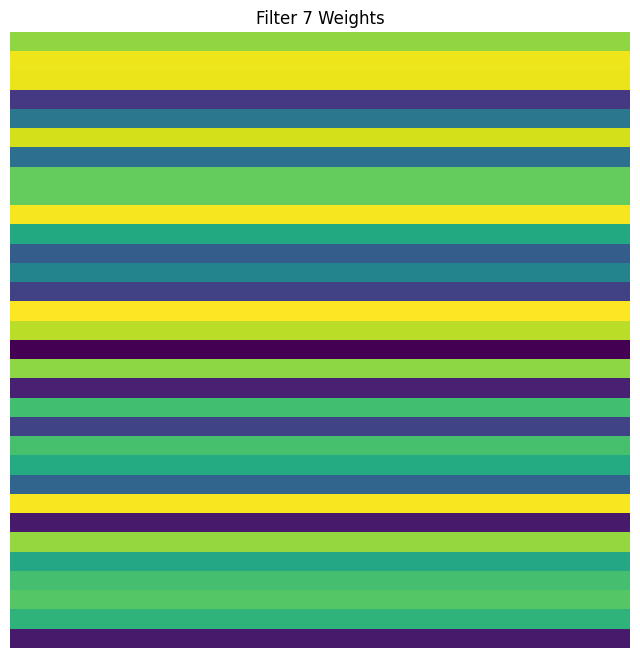

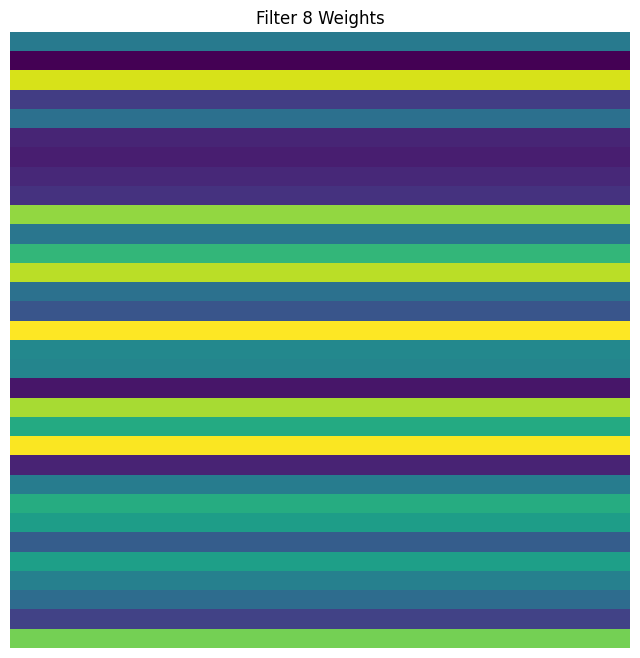

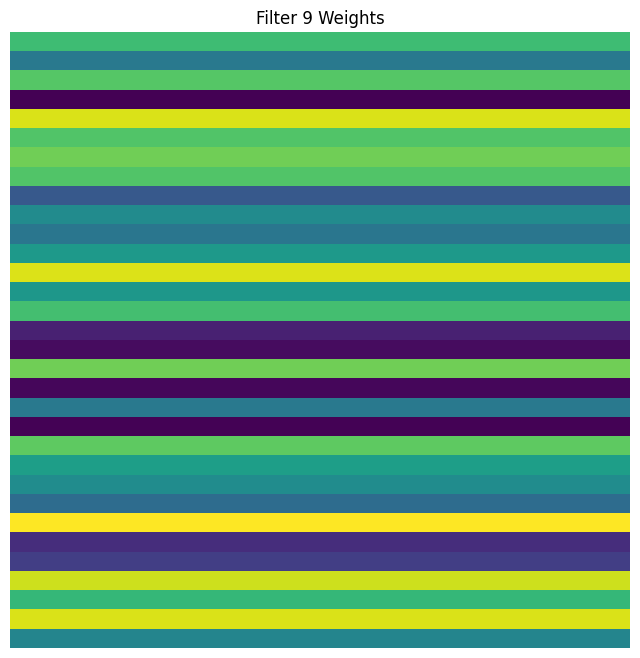

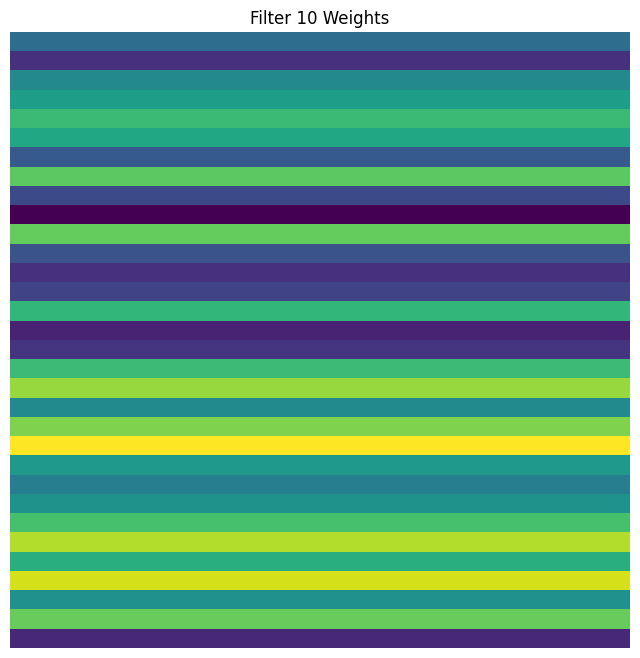

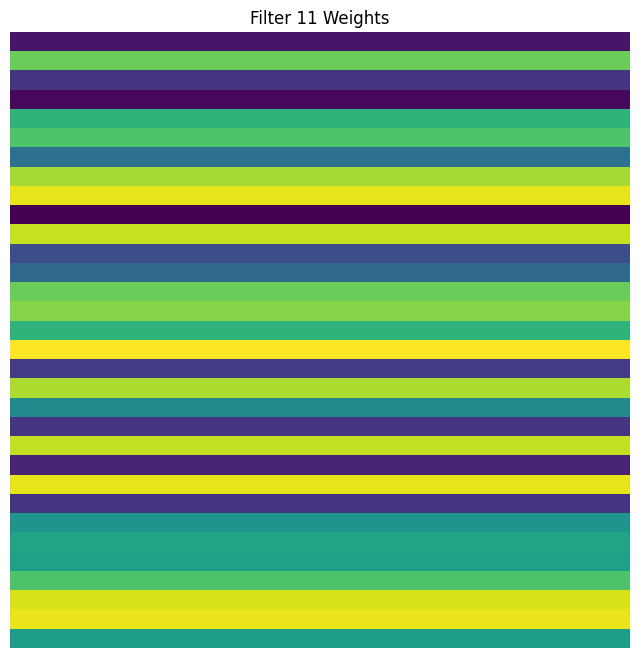

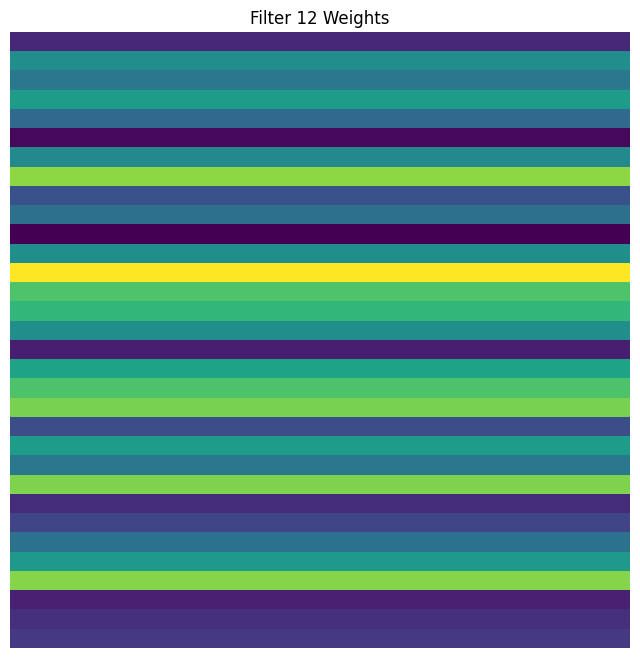

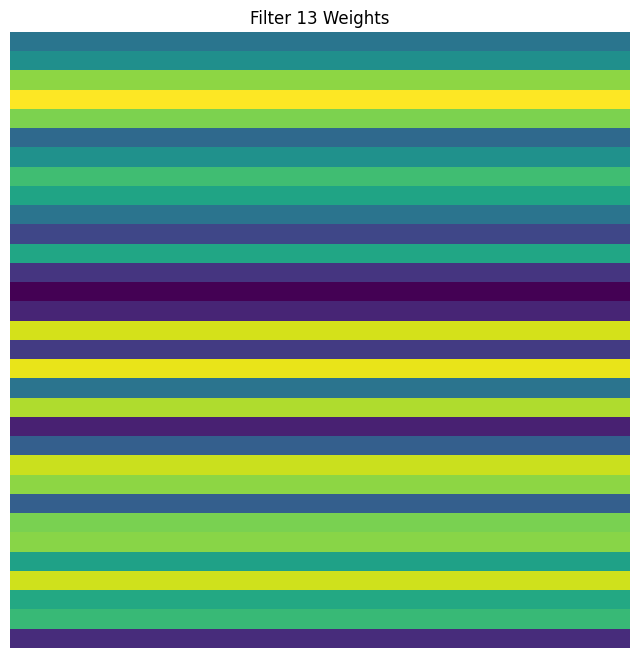

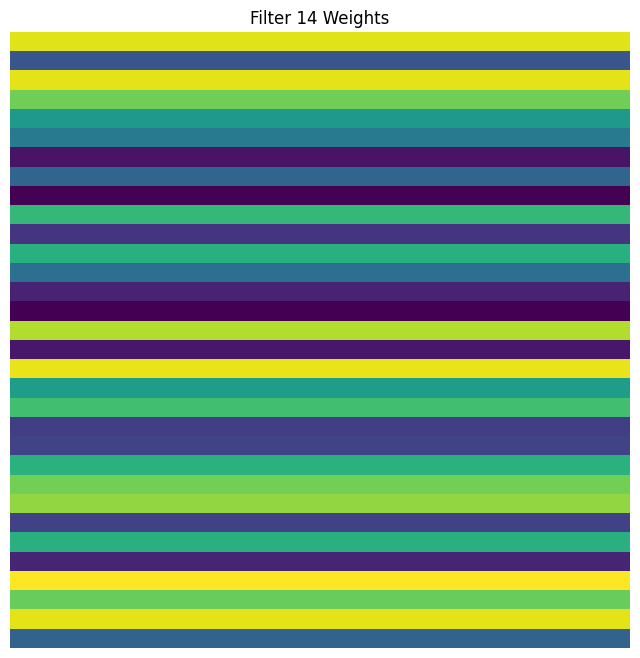

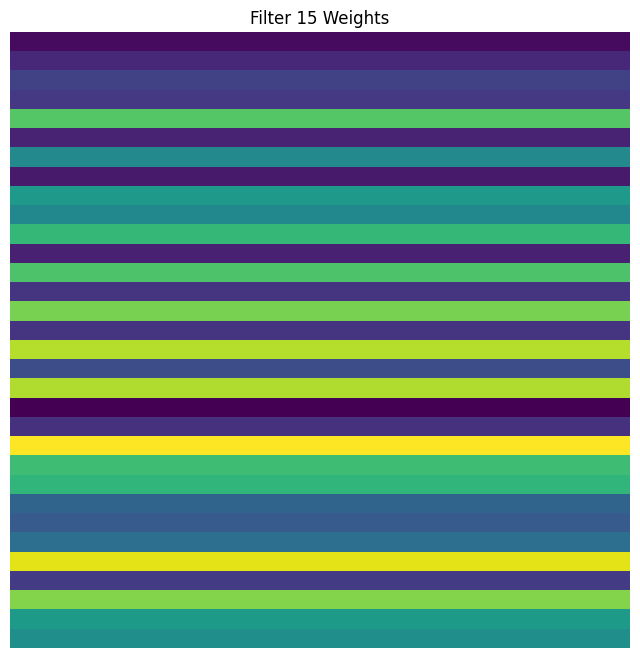

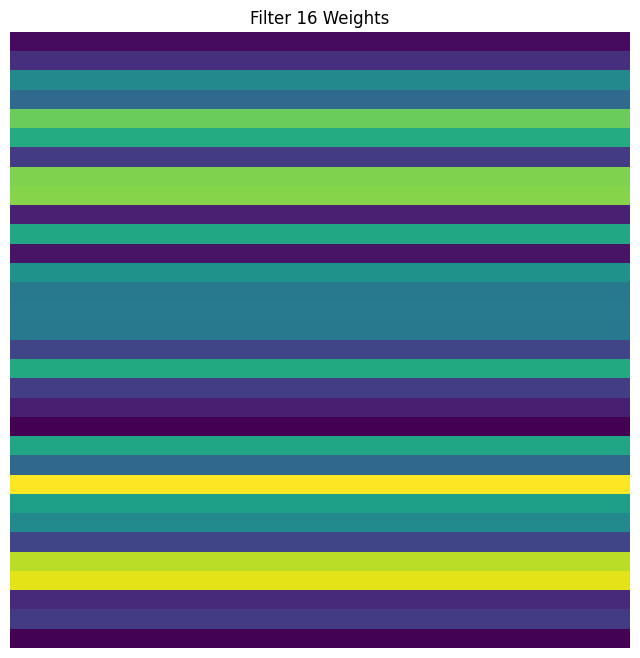

148/148 [==============================] - 0s 972us/step
F1 Score for Question 2: 0.9894939965694682

TRAIN QUESTION 3 MODEL
Index(['checkpoint_pct', 'cutscene_click_pct', 'map_click_pct',
       'map_hover_pct', 'navigate_click_pct', 'notification_click_pct',
       'object_click_pct', 'object_hover_pct', 'observation_click_pct',
       'person_click_pct', 'notebook_click_pct', 'elapsed_duration',
       'level_0_count', 'level_1_count', 'level_2_count', 'level_3_count',
       'level_4_count', 'event_name_checkpoint_count',
       'event_name_cutscene_click_count', 'event_name_map_click_count',
       'event_name_map_hover_count', 'event_name_navigate_click_count',
       'event_name_notification_click_count', 'event_name_object_click_count',
       'event_name_object_hover_count', 'event_name_observation_click_count',
       'event_name_person_click_count', 'event_name_notebook_click_count',
       'name_basic_count', 'name_close_count', 'name_undefined_count',
       'name_open_cou

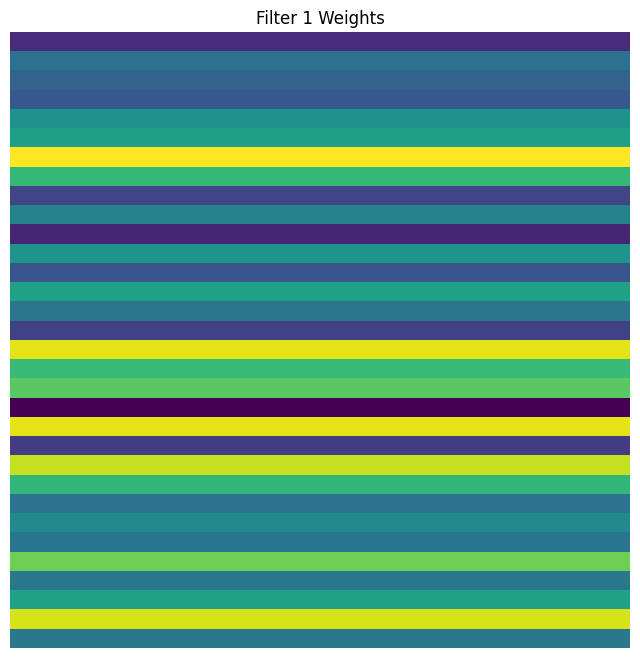

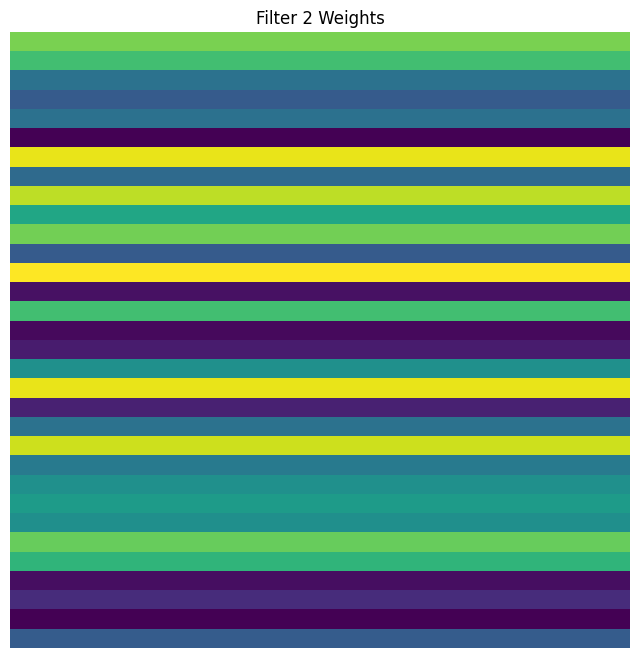

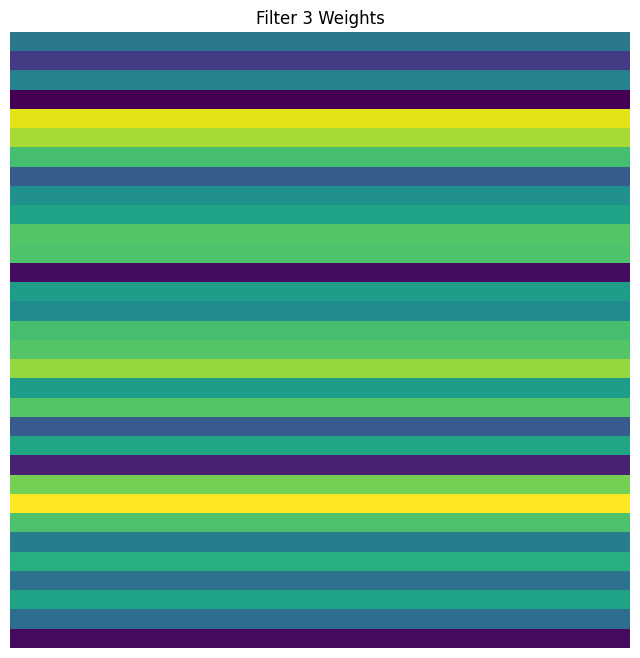

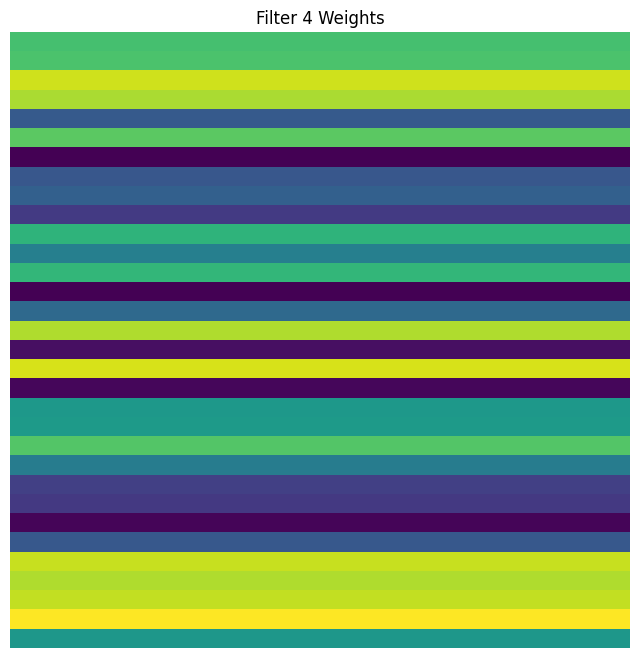

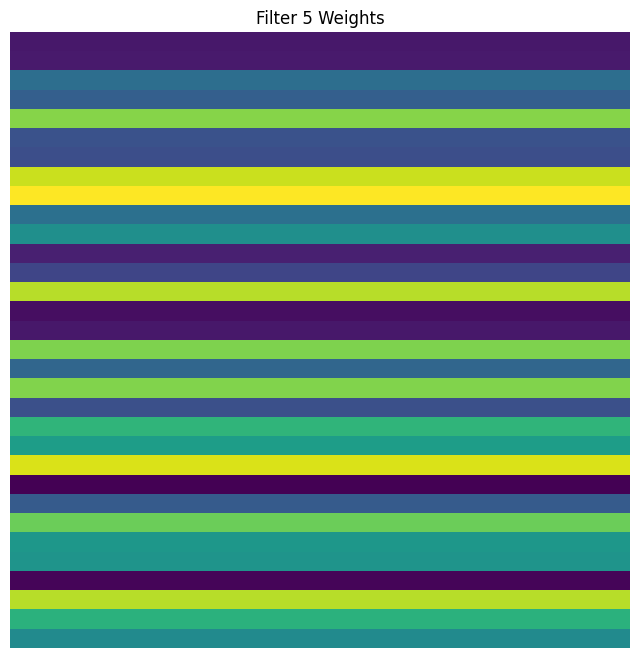

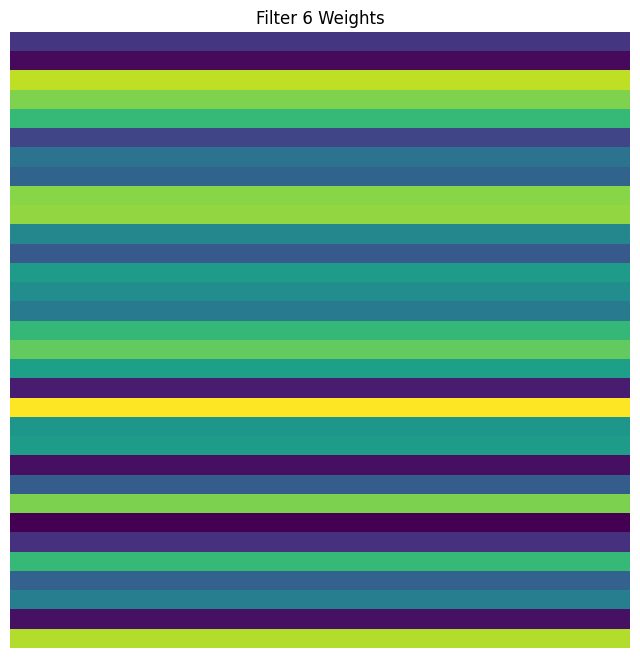

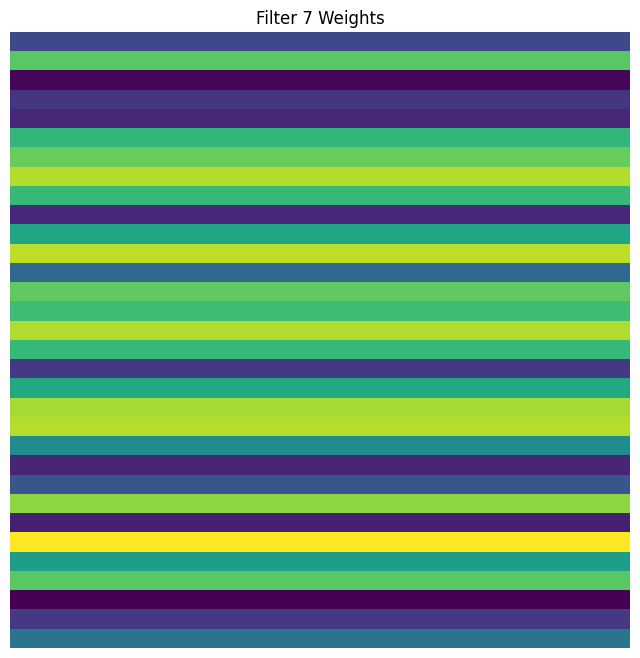

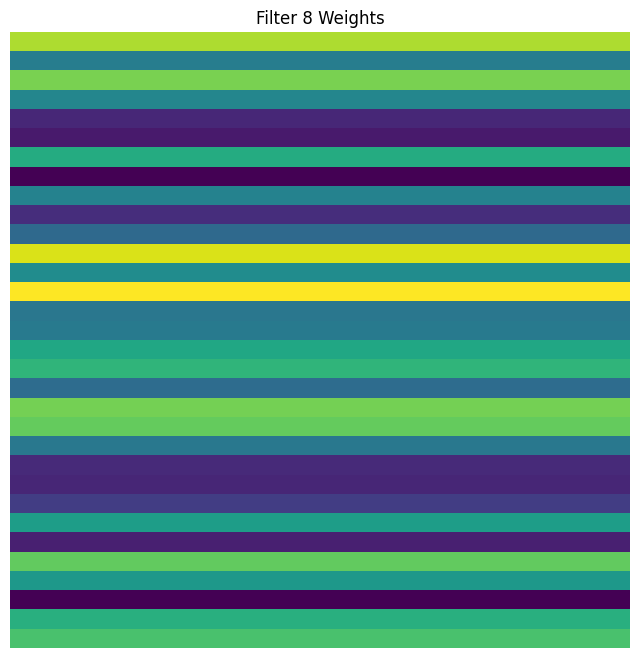

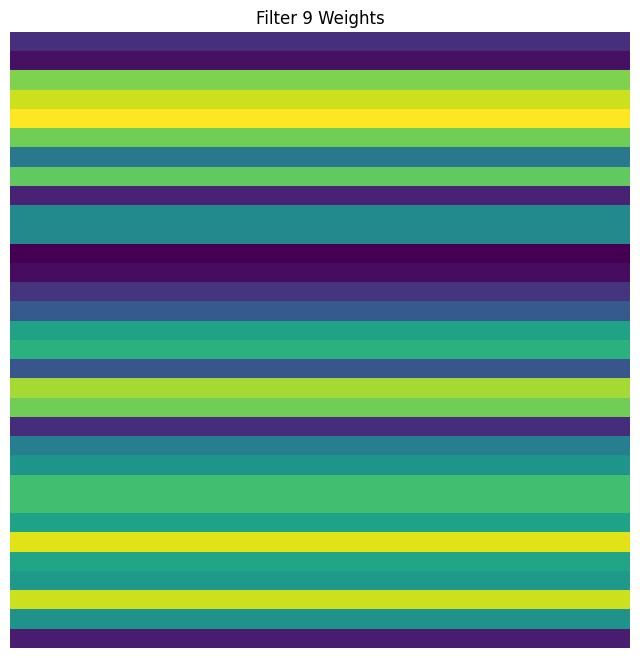

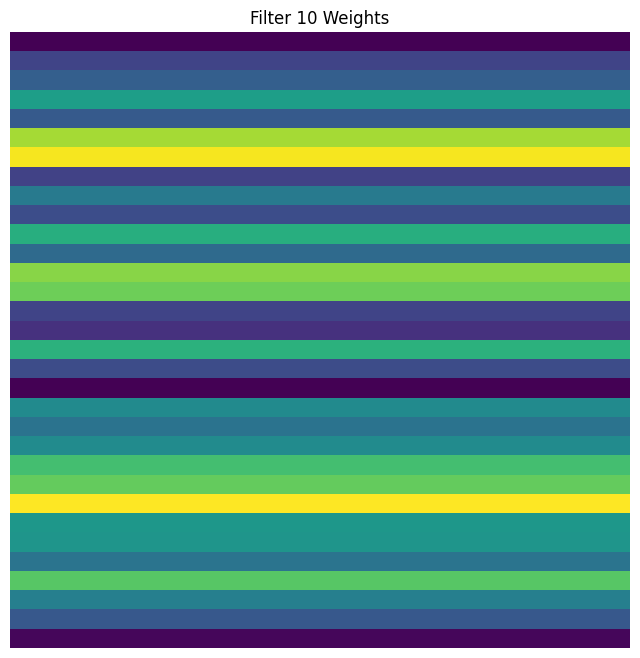

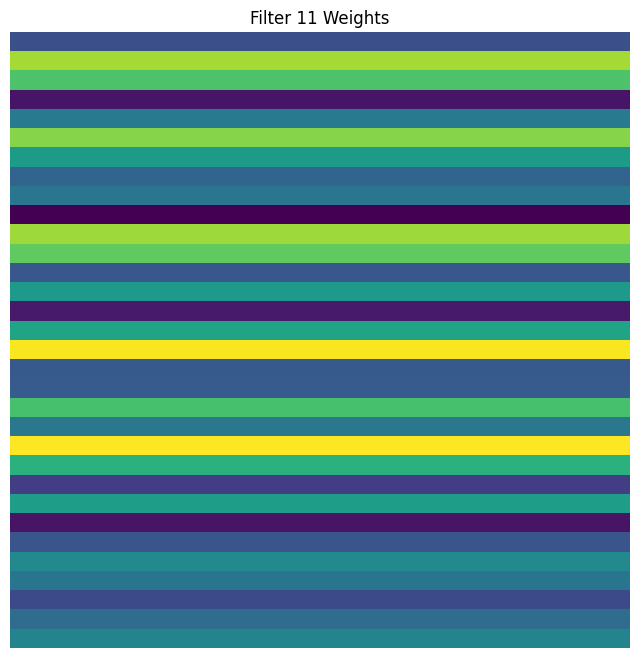

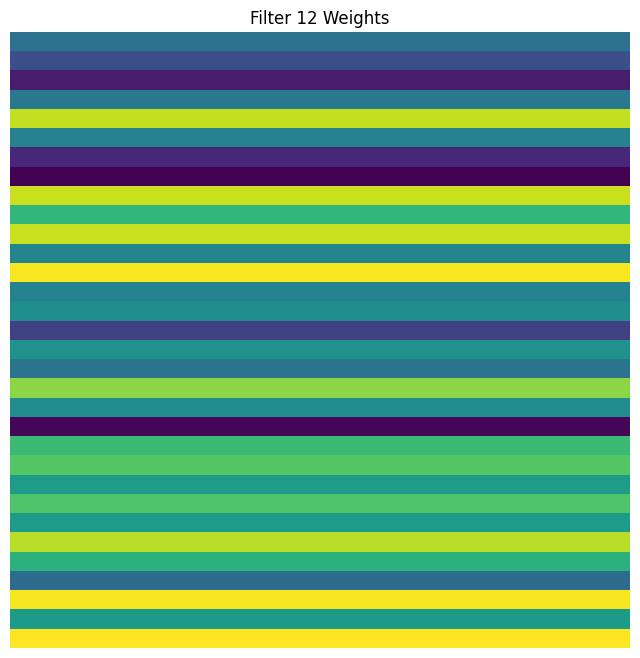

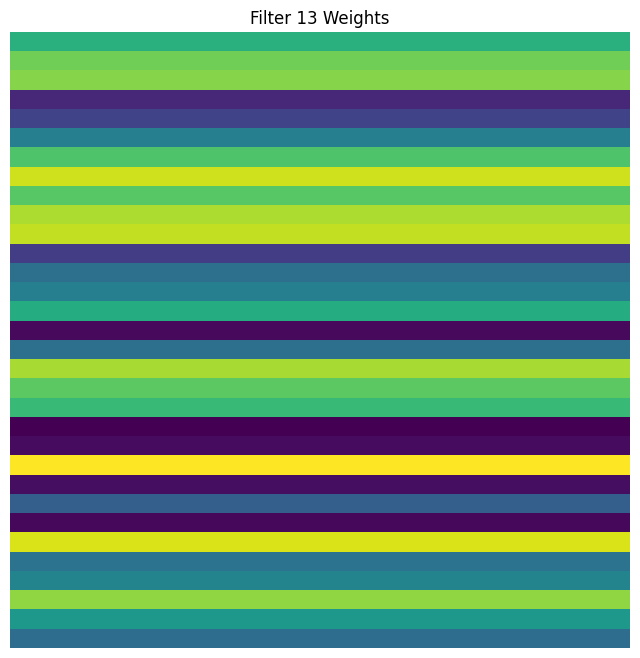

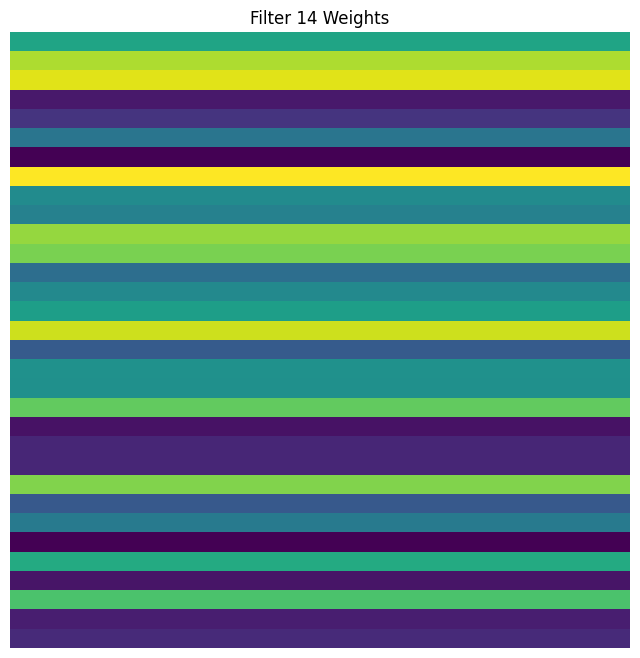

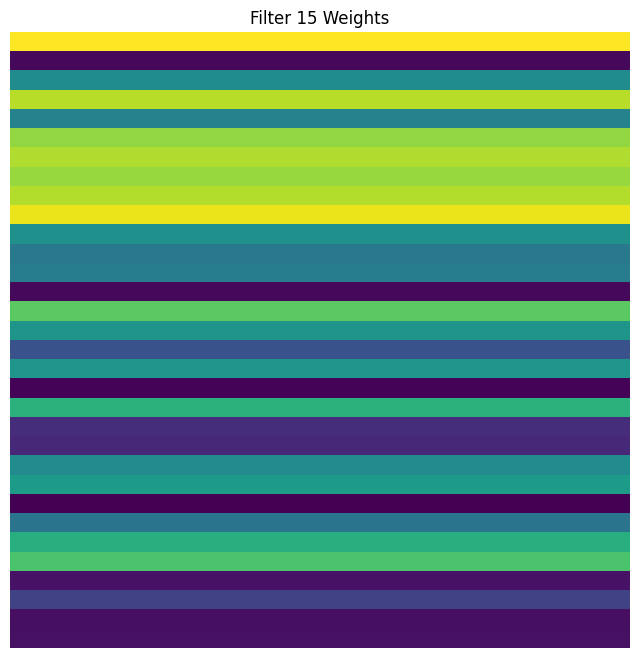

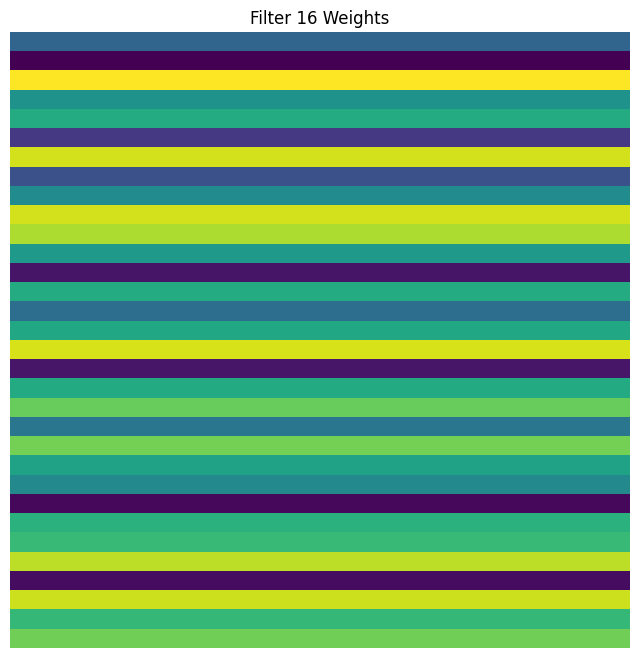

148/148 [==============================] - 0s 980us/step
F1 Score for Question 3: 0.9657669519420671

TRAIN QUESTION 4 MODEL
Index(['checkpoint_pct', 'cutscene_click_pct', 'map_click_pct',
       'map_hover_pct', 'navigate_click_pct', 'notification_click_pct',
       'object_click_pct', 'object_hover_pct', 'observation_click_pct',
       'person_click_pct', 'notebook_click_pct', 'elapsed_duration',
       'level_5_count', 'level_6_count', 'level_7_count', 'level_8_count',
       'level_9_count', 'level_10_count', 'level_11_count', 'level_12_count',
       'event_name_checkpoint_count', 'event_name_cutscene_click_count',
       'event_name_map_click_count', 'event_name_map_hover_count',
       'event_name_navigate_click_count',
       'event_name_notification_click_count', 'event_name_object_click_count',
       'event_name_object_hover_count', 'event_name_observation_click_count',
       'event_name_person_click_count', 'event_name_notebook_click_count',
       'name_basic_count', 'nam

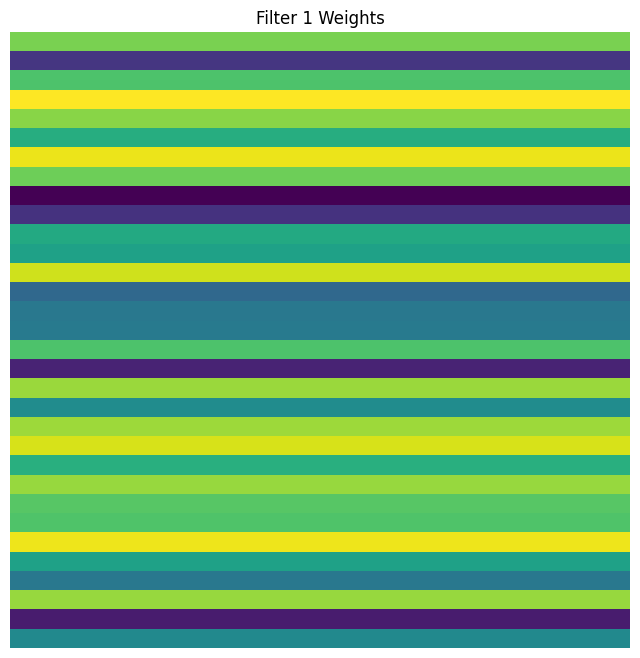

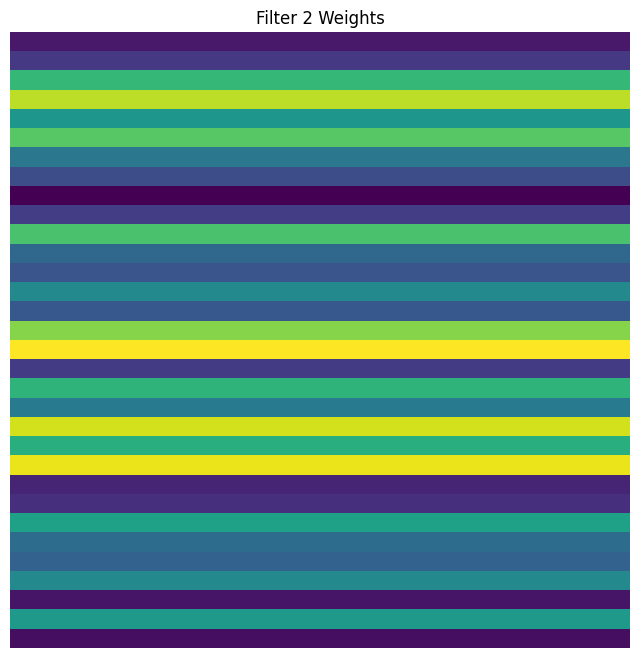

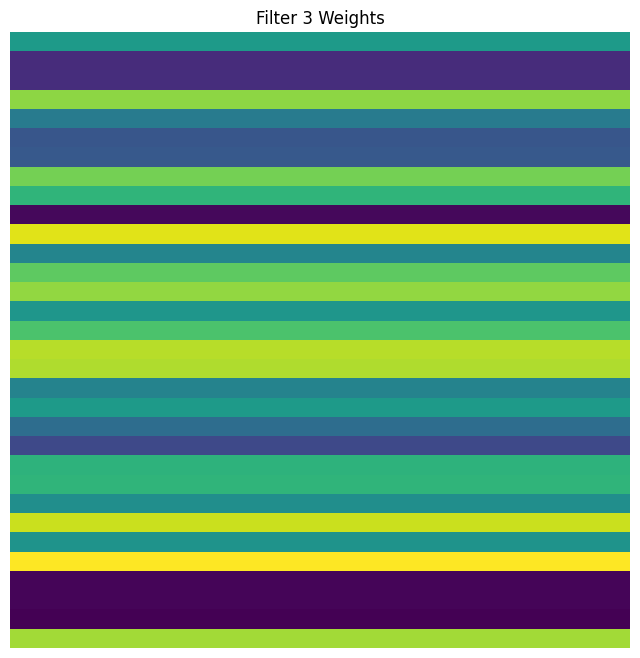

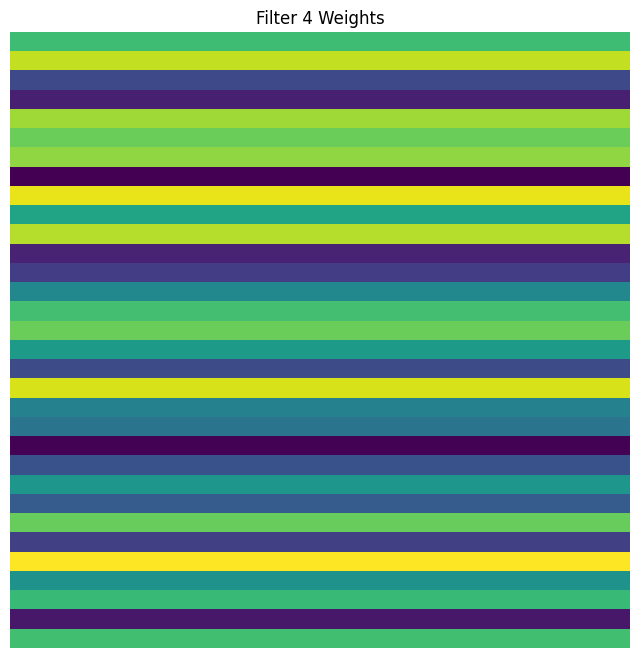

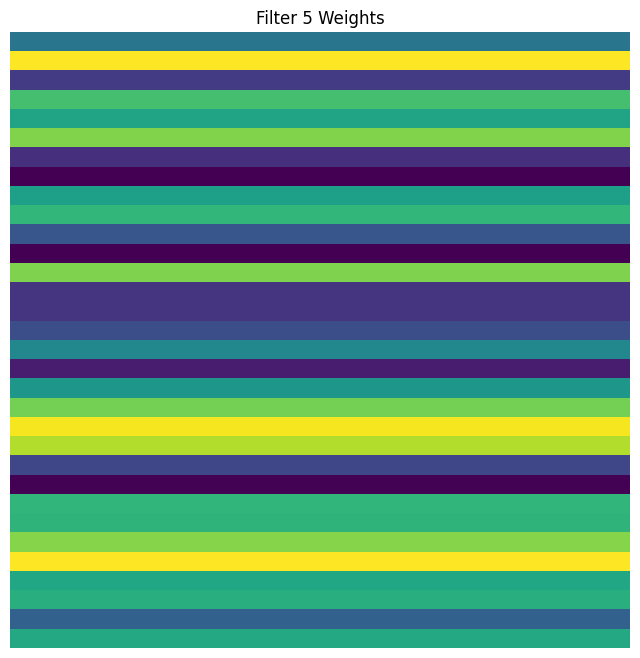

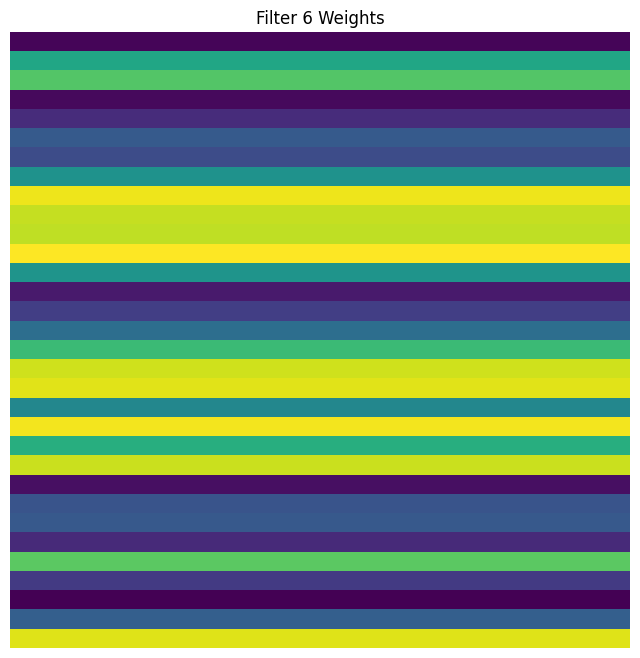

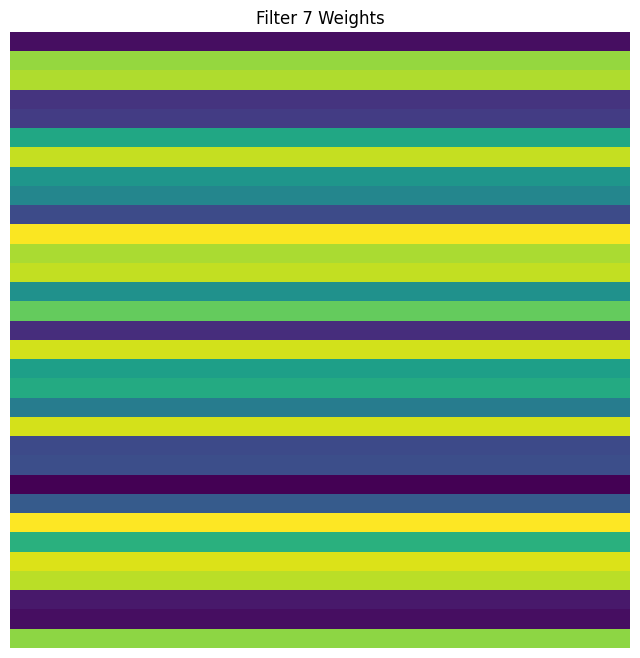

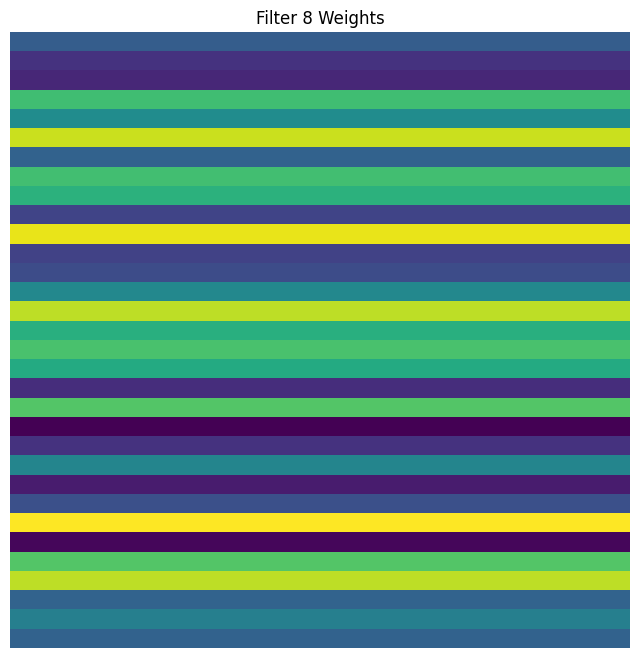

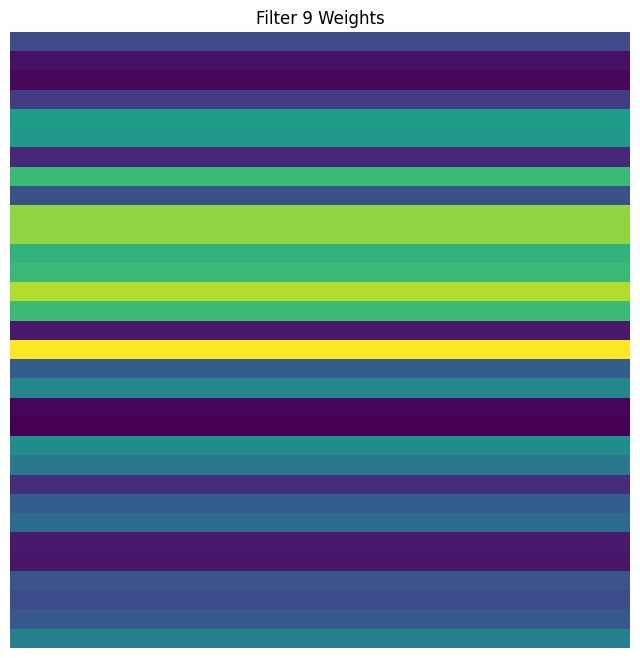

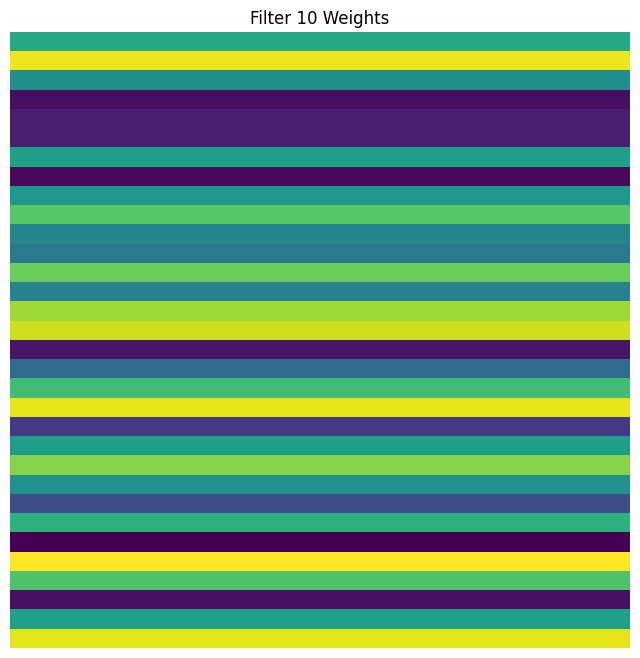

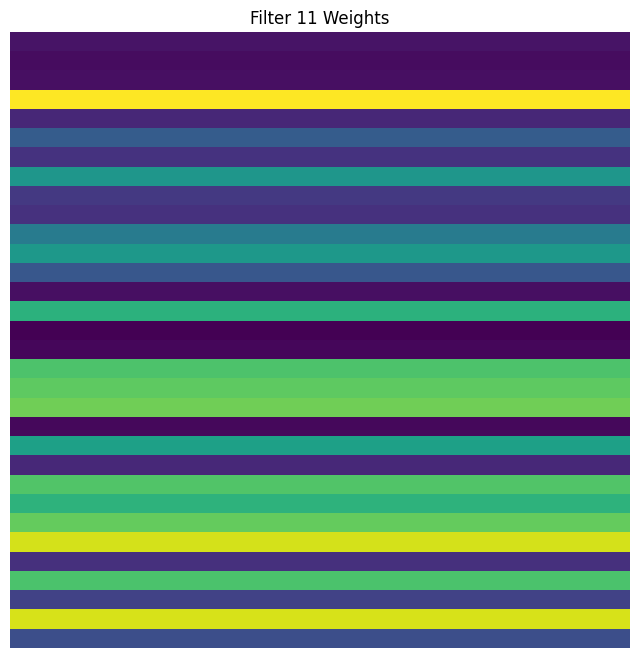

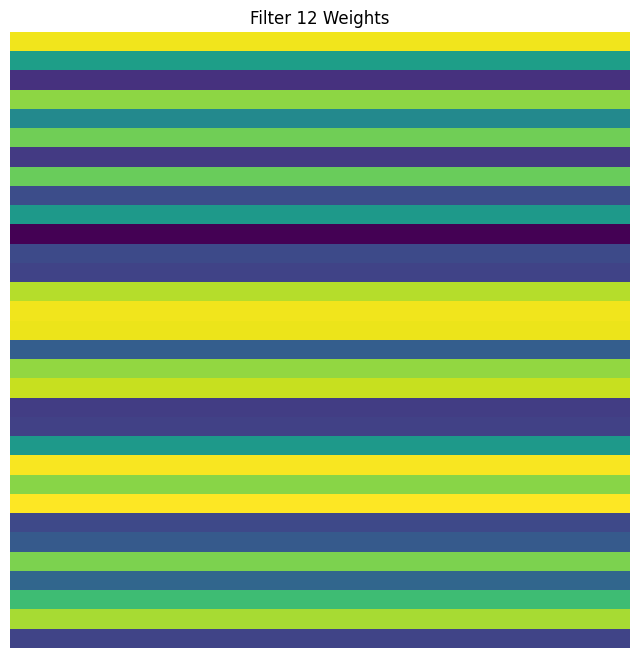

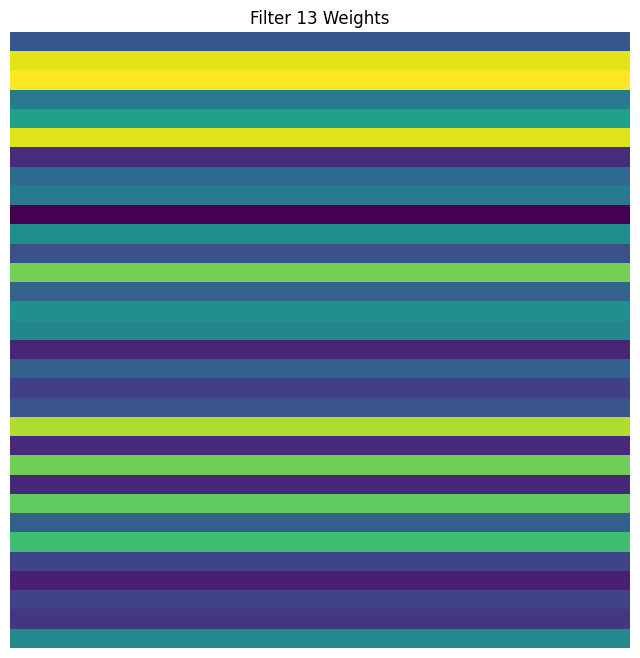

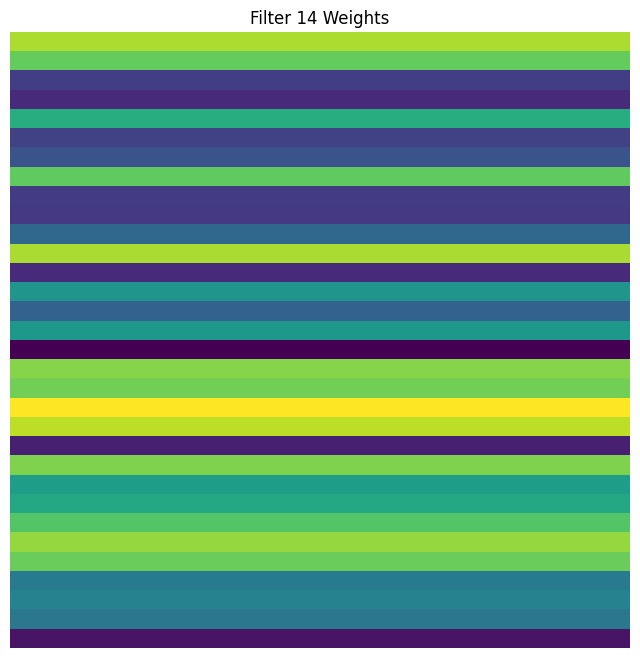

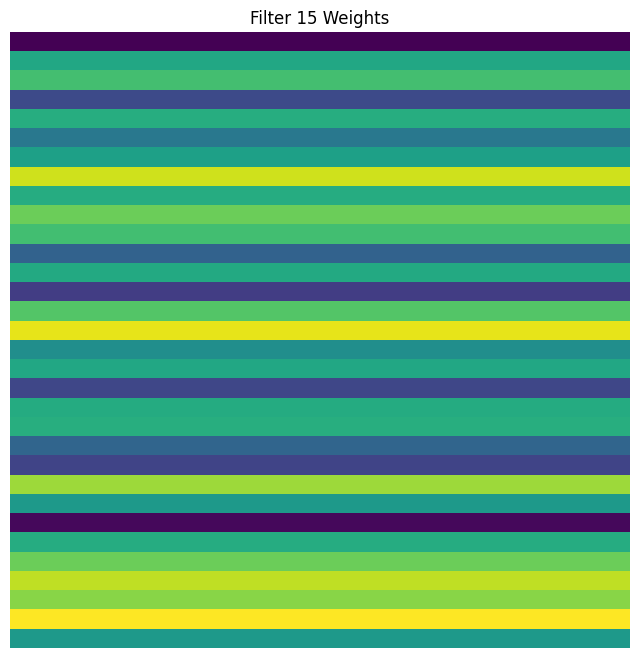

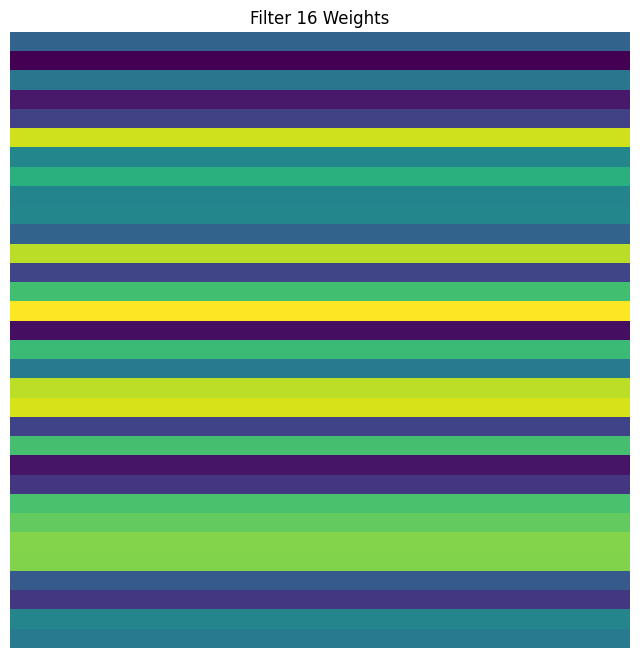

148/148 [==============================] - 0s 1ms/step
F1 Score for Question 4: 0.8868682097307511

TRAIN QUESTION 5 MODEL
Index(['checkpoint_pct', 'cutscene_click_pct', 'map_click_pct',
       'map_hover_pct', 'navigate_click_pct', 'notification_click_pct',
       'object_click_pct', 'object_hover_pct', 'observation_click_pct',
       'person_click_pct', 'notebook_click_pct', 'elapsed_duration',
       'level_5_count', 'level_6_count', 'level_7_count', 'level_8_count',
       'level_9_count', 'level_10_count', 'level_11_count', 'level_12_count',
       'event_name_checkpoint_count', 'event_name_cutscene_click_count',
       'event_name_map_click_count', 'event_name_map_hover_count',
       'event_name_navigate_click_count',
       'event_name_notification_click_count', 'event_name_object_click_count',
       'event_name_object_hover_count', 'event_name_observation_click_count',
       'event_name_person_click_count', 'event_name_notebook_click_count',
       'name_basic_count', 'name_

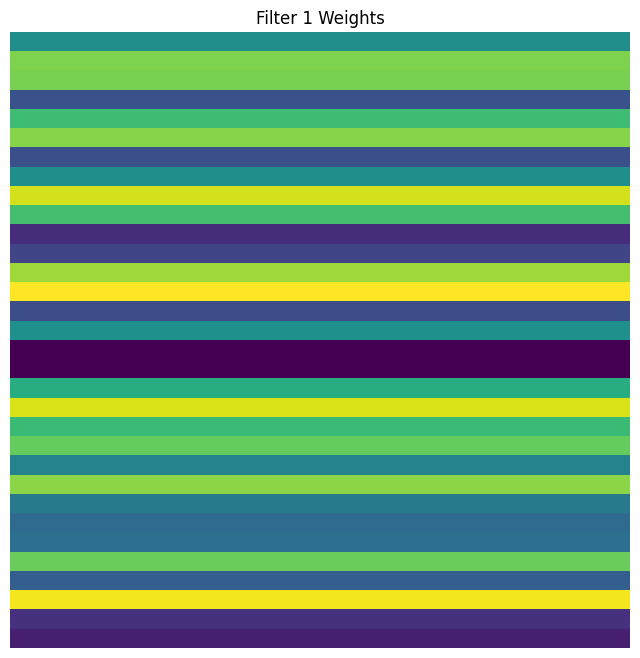

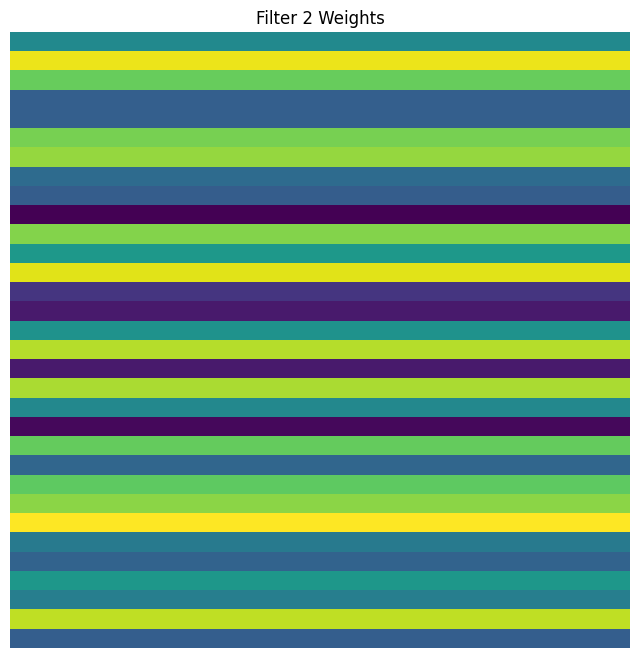

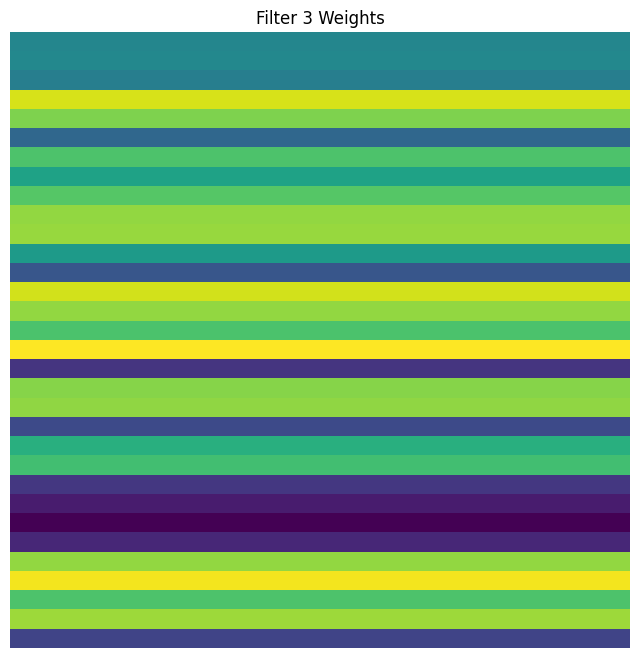

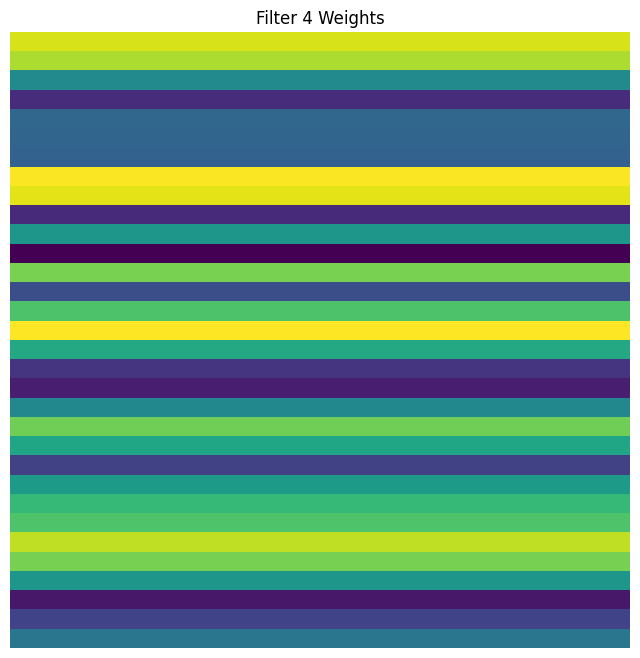

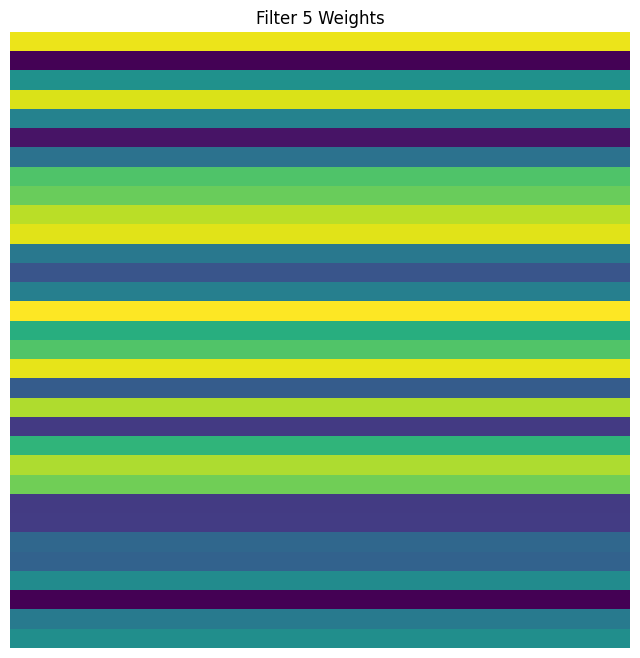

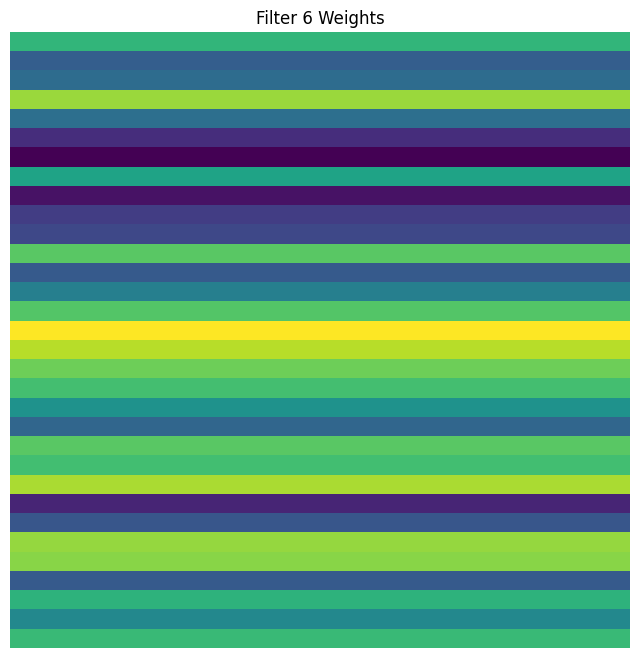

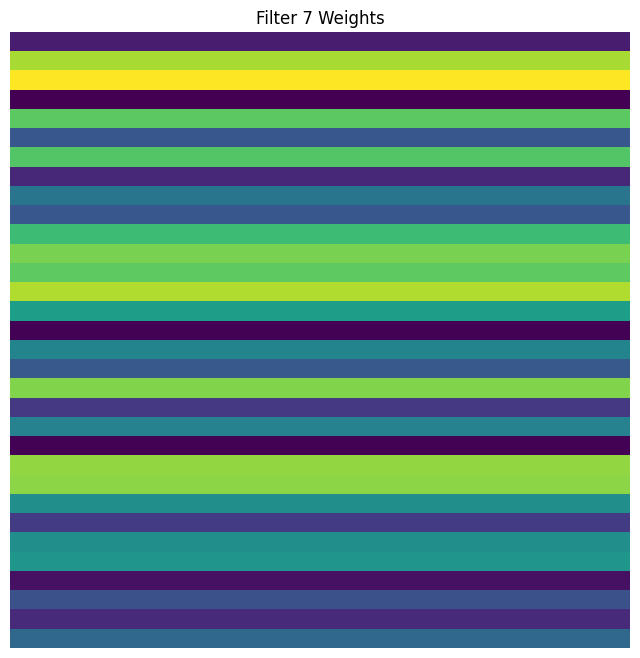

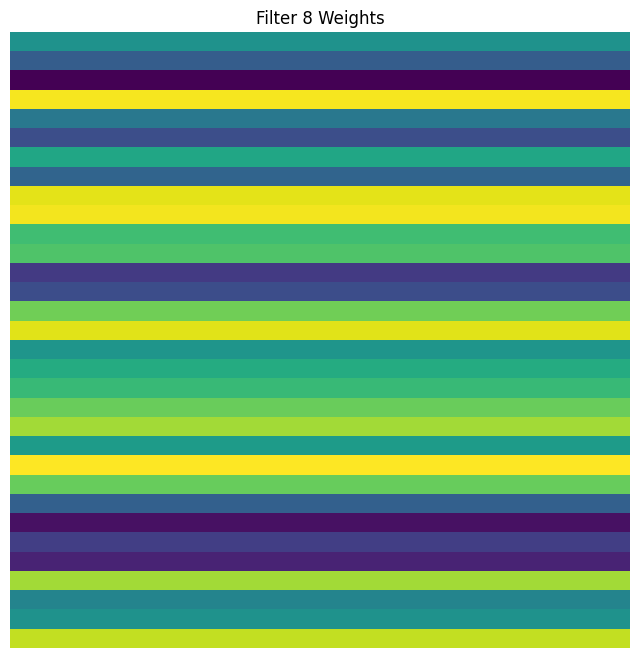

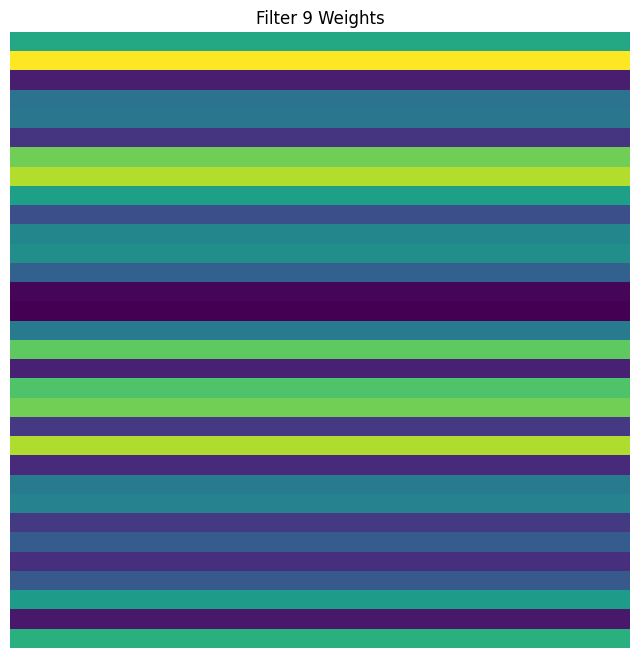

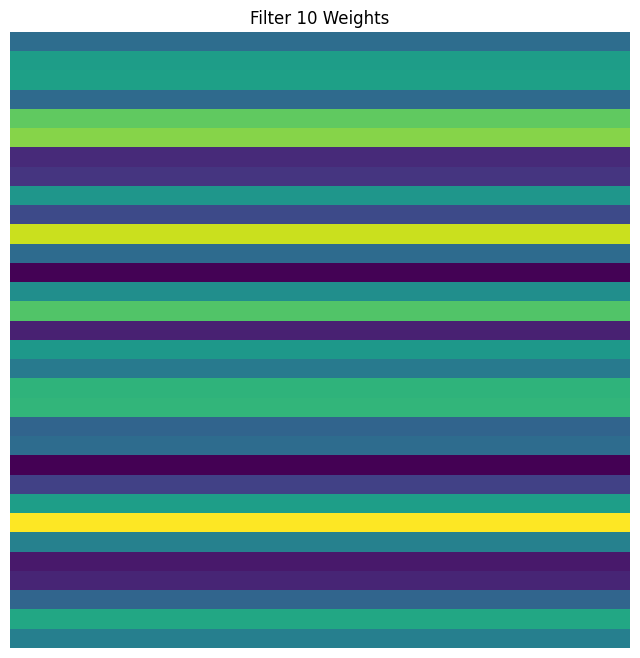

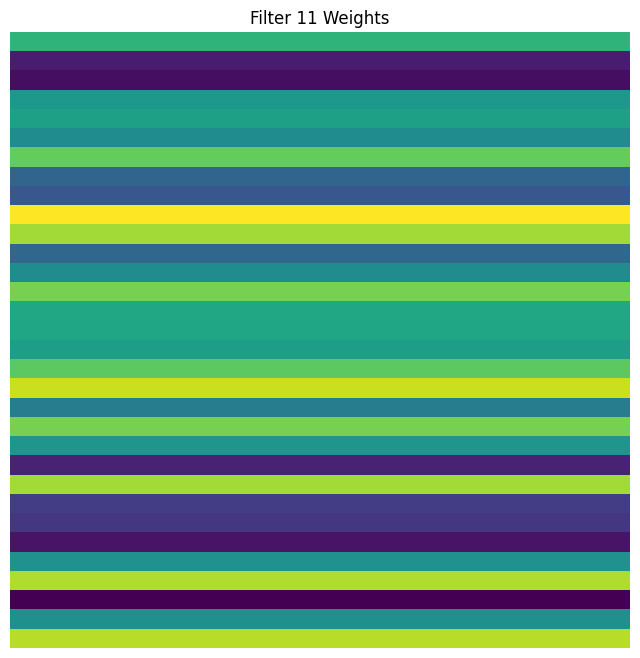

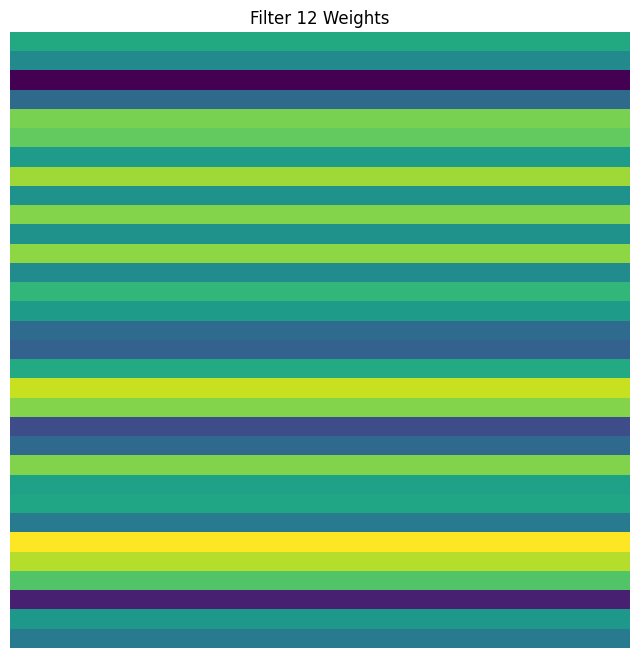

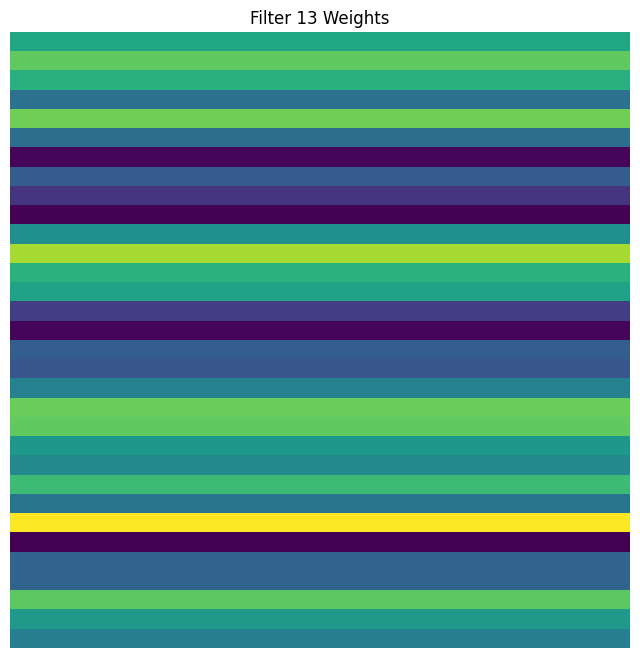

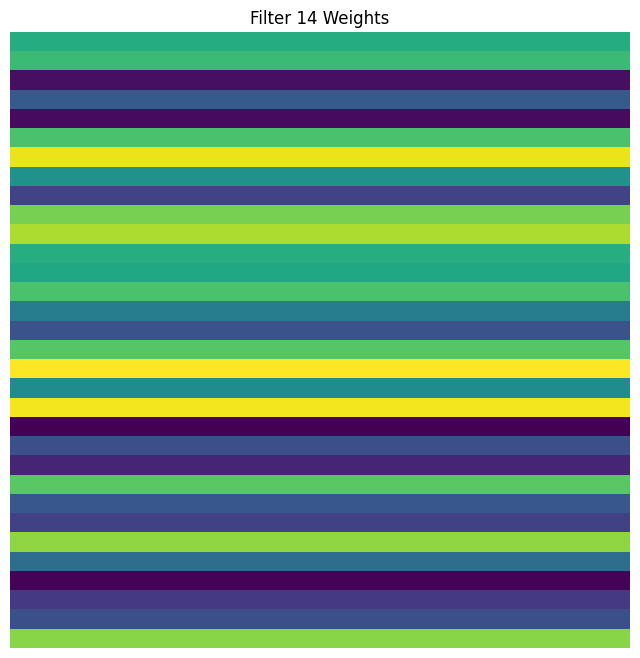

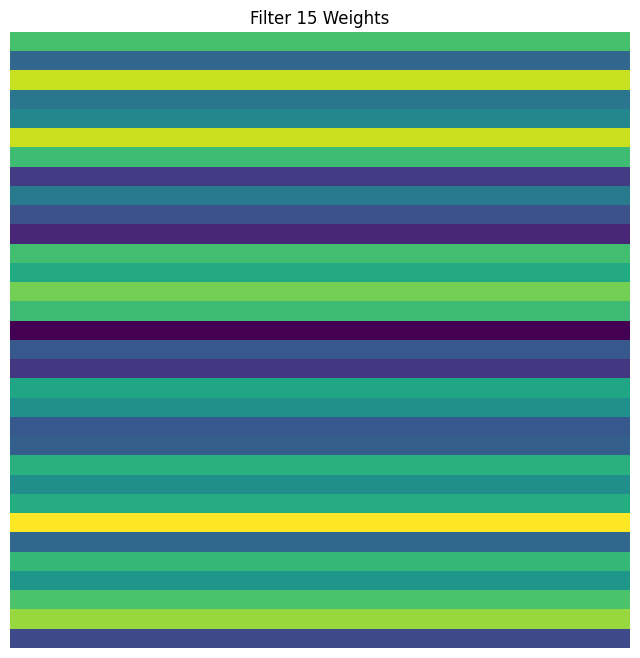

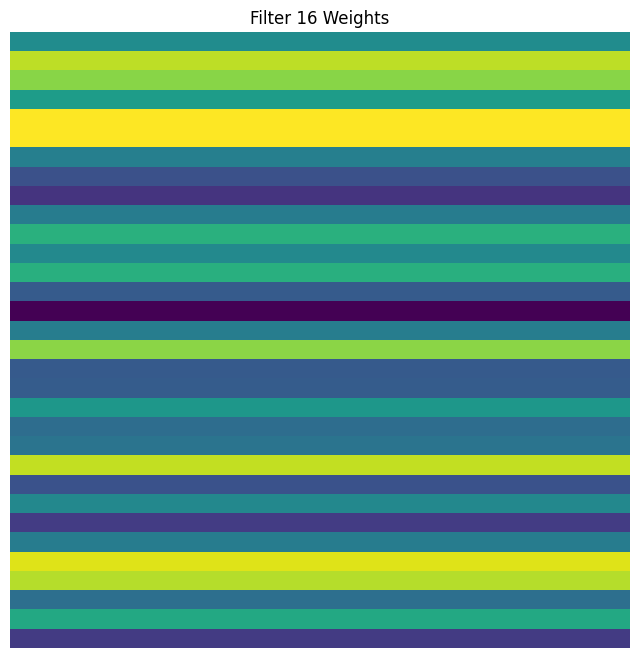

148/148 [==============================] - 0s 969us/step
F1 Score for Question 5: 0.7035175879396985

TRAIN QUESTION 6 MODEL
Index(['checkpoint_pct', 'cutscene_click_pct', 'map_click_pct',
       'map_hover_pct', 'navigate_click_pct', 'notification_click_pct',
       'object_click_pct', 'object_hover_pct', 'observation_click_pct',
       'person_click_pct', 'notebook_click_pct', 'elapsed_duration',
       'level_5_count', 'level_6_count', 'level_7_count', 'level_8_count',
       'level_9_count', 'level_10_count', 'level_11_count', 'level_12_count',
       'event_name_checkpoint_count', 'event_name_cutscene_click_count',
       'event_name_map_click_count', 'event_name_map_hover_count',
       'event_name_navigate_click_count',
       'event_name_notification_click_count', 'event_name_object_click_count',
       'event_name_object_hover_count', 'event_name_observation_click_count',
       'event_name_person_click_count', 'event_name_notebook_click_count',
       'name_basic_count', 'nam

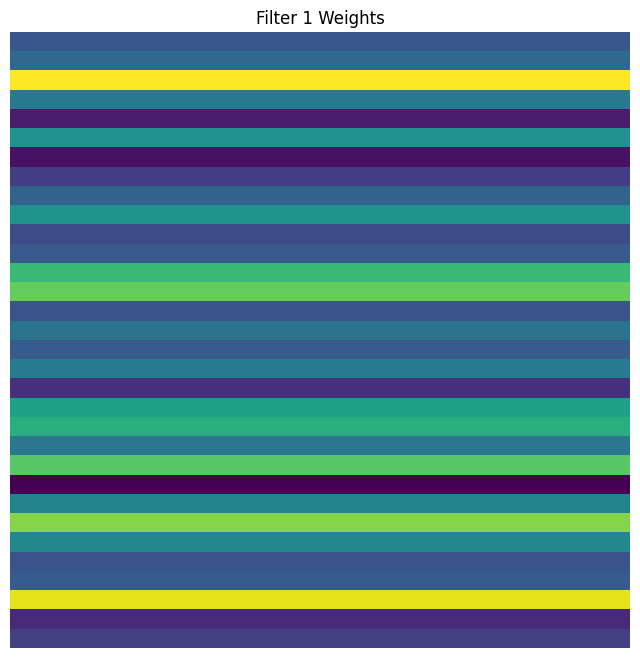

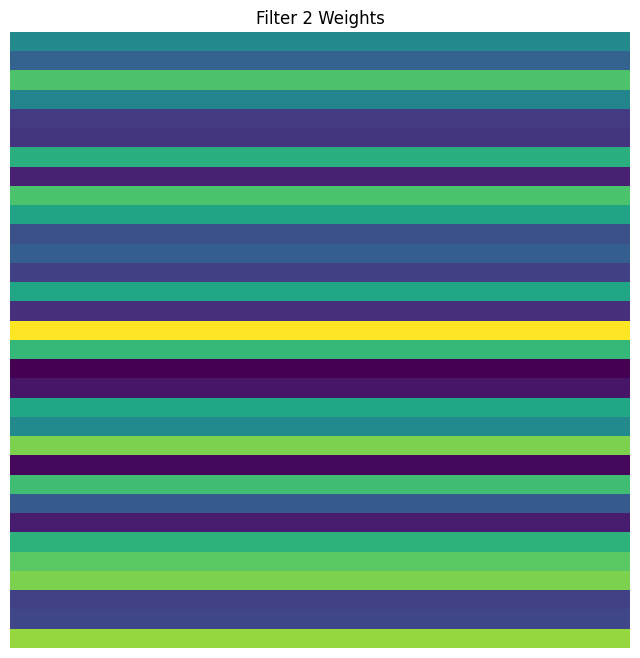

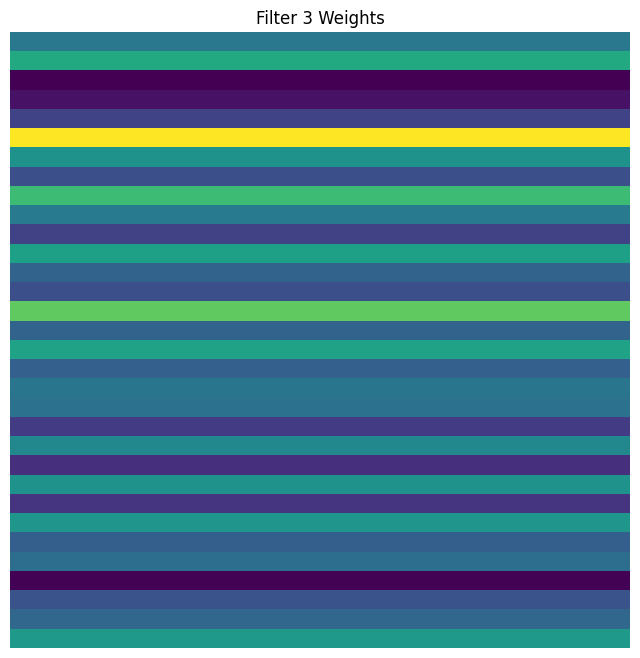

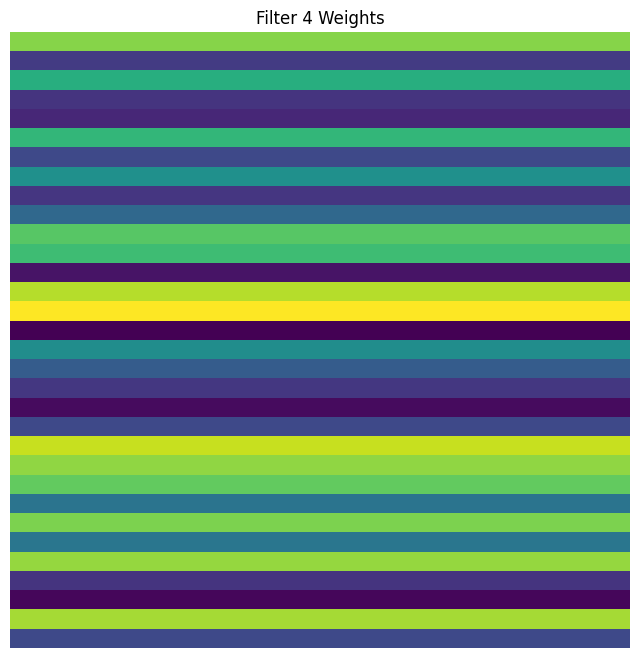

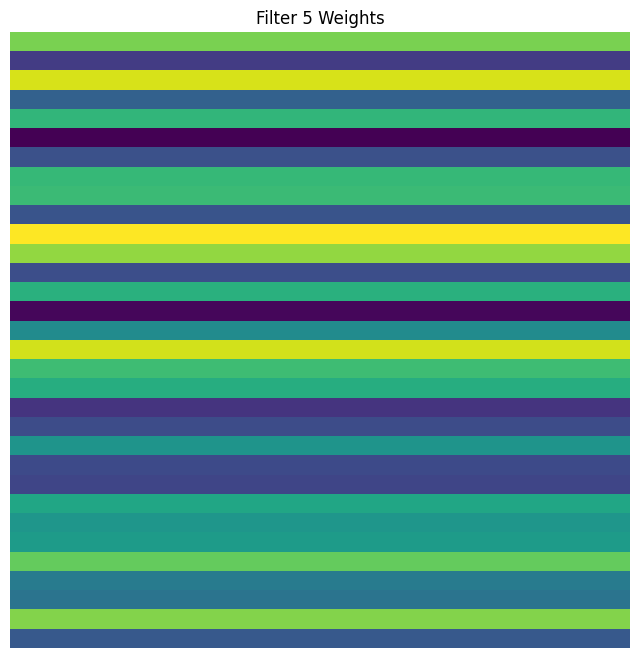

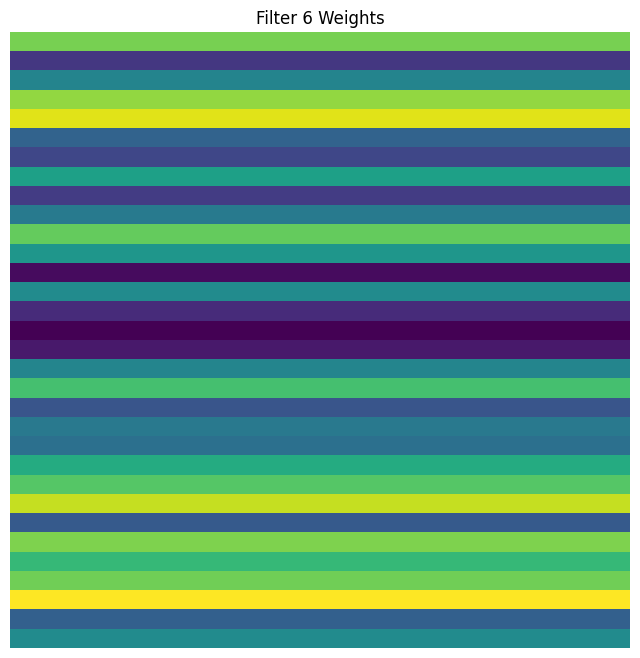

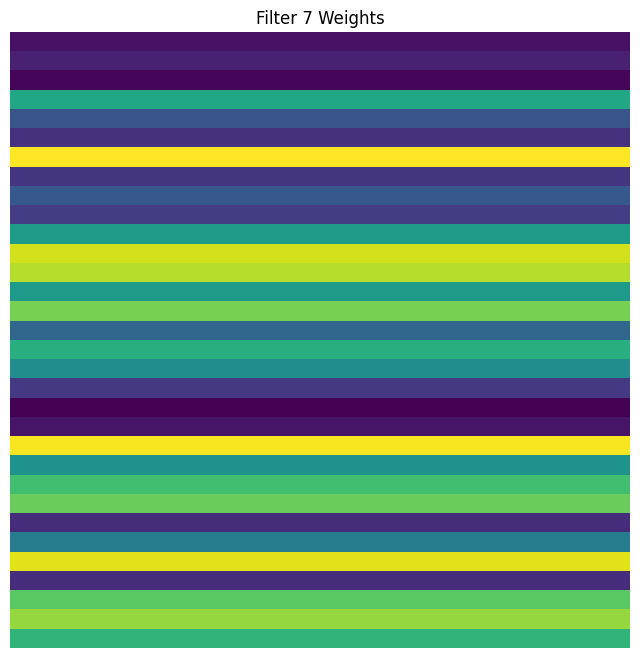

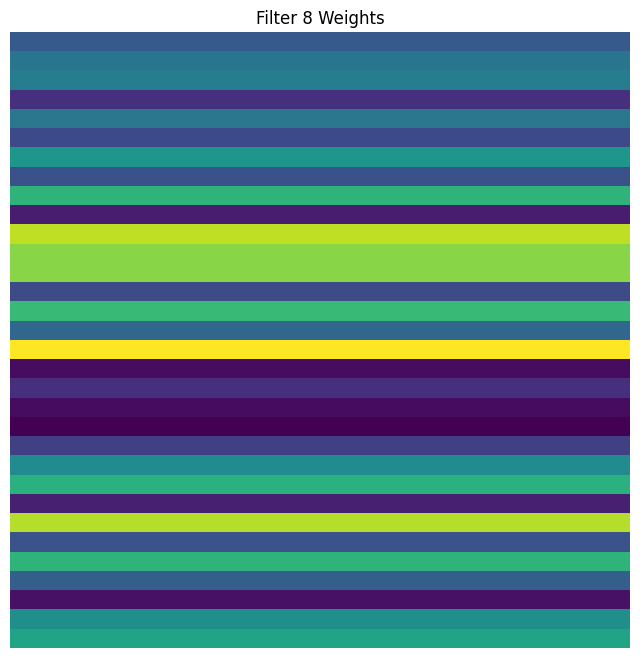

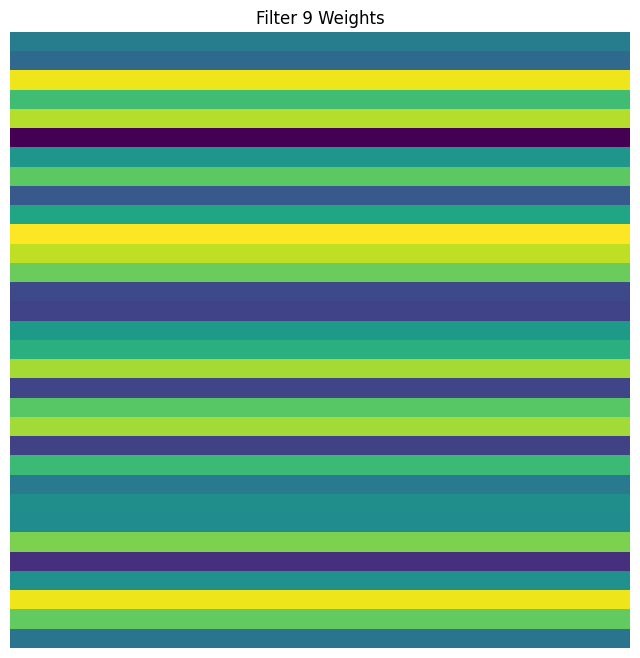

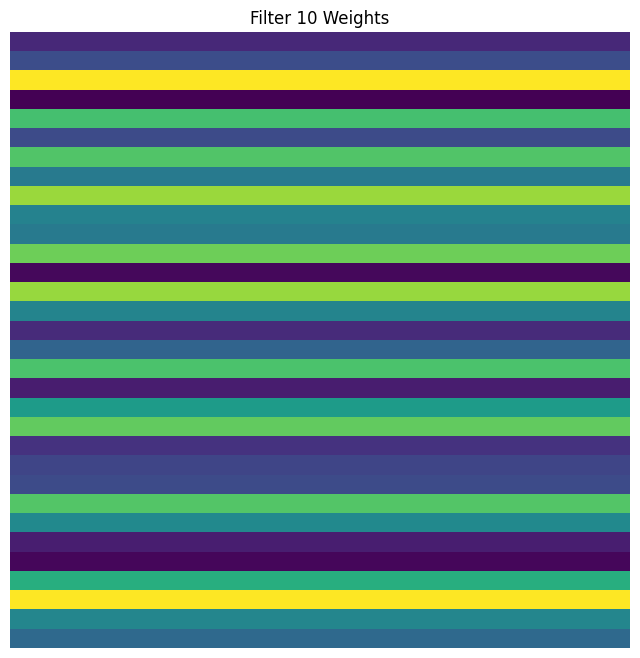

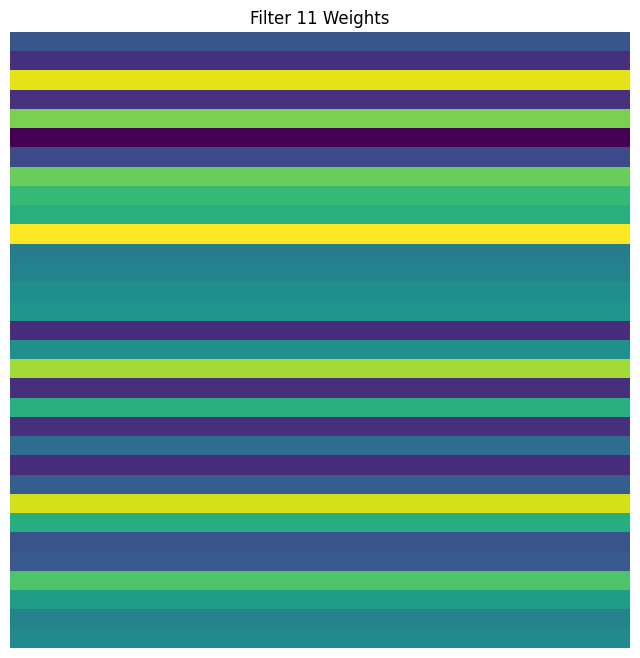

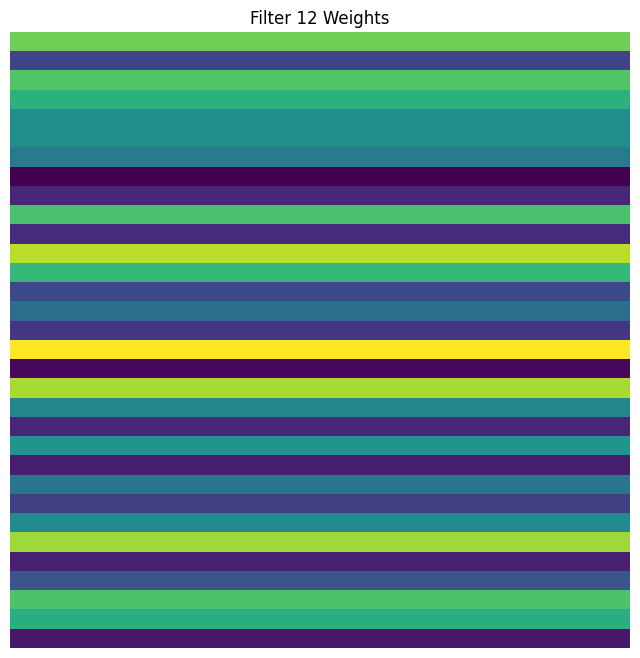

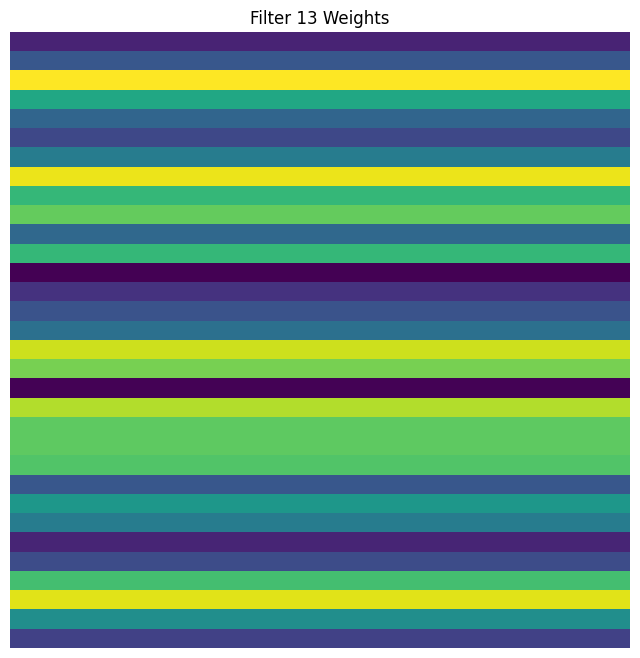

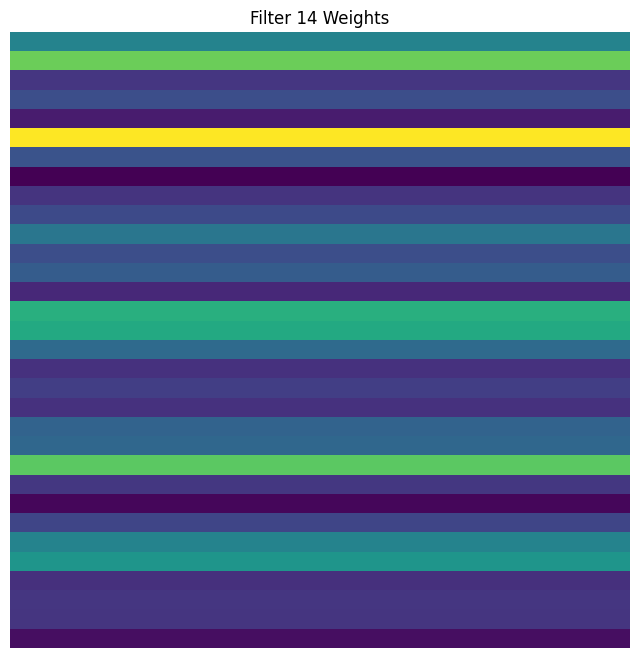

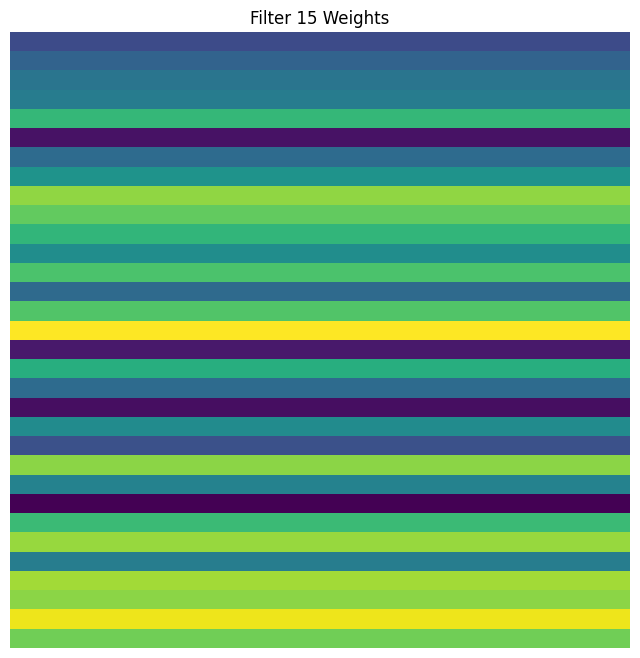

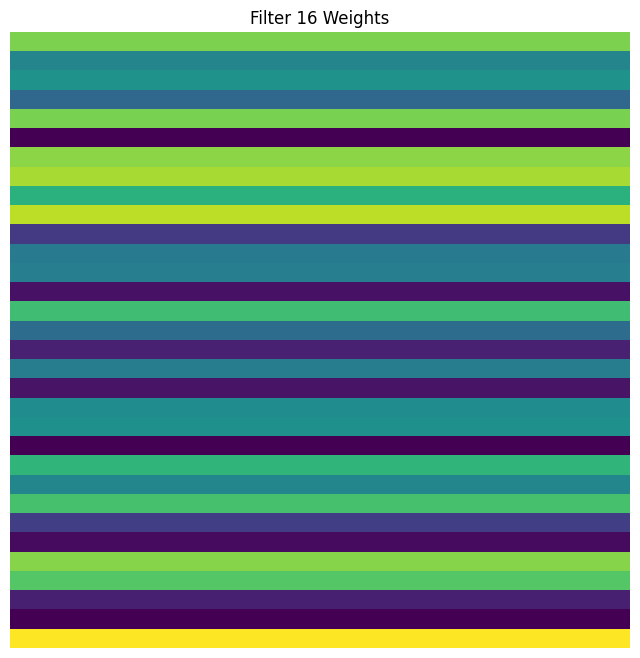

148/148 [==============================] - 1s 923us/step
F1 Score for Question 6: 0.8780487804878048

TRAIN QUESTION 7 MODEL
Index(['checkpoint_pct', 'cutscene_click_pct', 'map_click_pct',
       'map_hover_pct', 'navigate_click_pct', 'notification_click_pct',
       'object_click_pct', 'object_hover_pct', 'observation_click_pct',
       'person_click_pct', 'notebook_click_pct', 'elapsed_duration',
       'level_5_count', 'level_6_count', 'level_7_count', 'level_8_count',
       'level_9_count', 'level_10_count', 'level_11_count', 'level_12_count',
       'event_name_checkpoint_count', 'event_name_cutscene_click_count',
       'event_name_map_click_count', 'event_name_map_hover_count',
       'event_name_navigate_click_count',
       'event_name_notification_click_count', 'event_name_object_click_count',
       'event_name_object_hover_count', 'event_name_observation_click_count',
       'event_name_person_click_count', 'event_name_notebook_click_count',
       'name_basic_count', 'nam

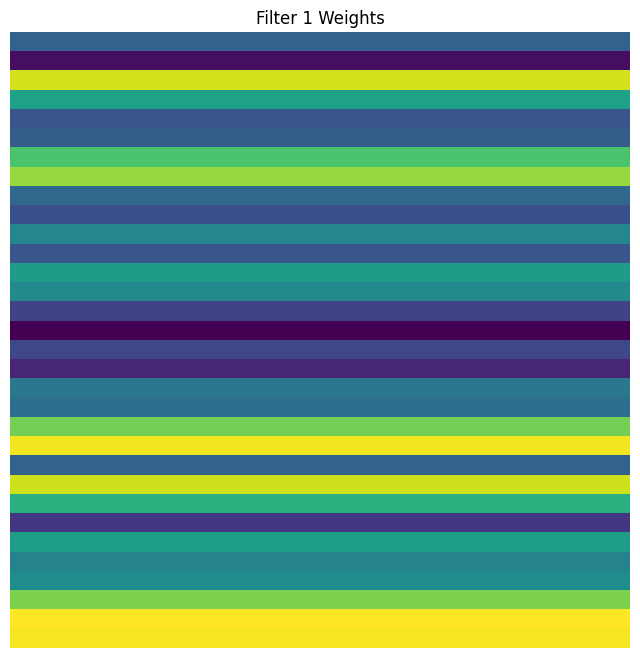

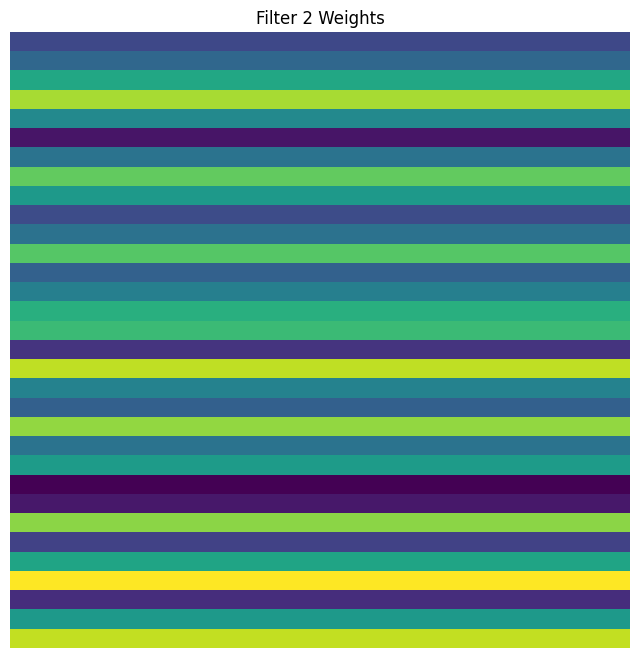

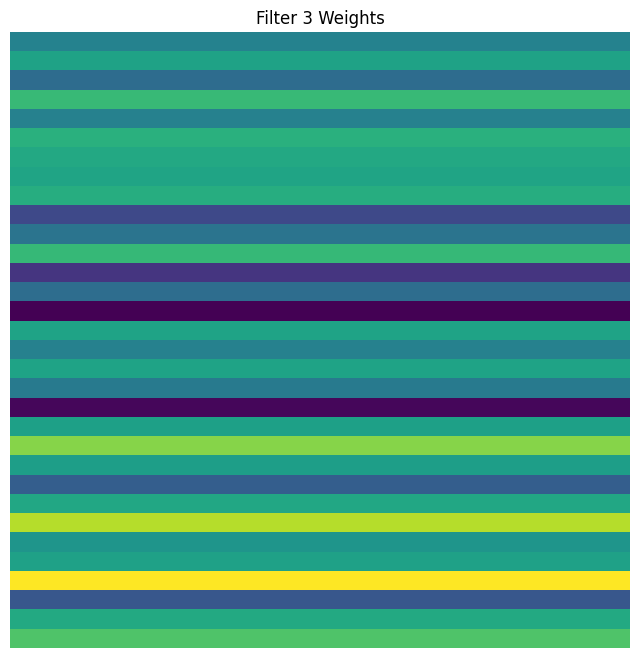

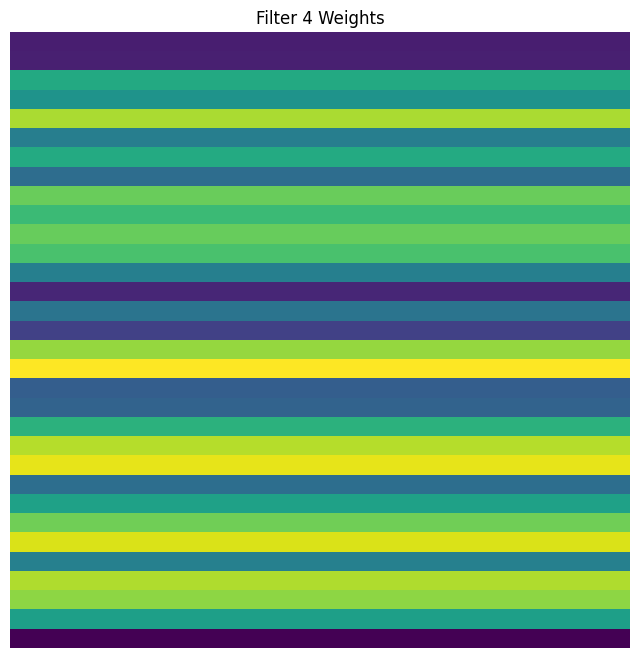

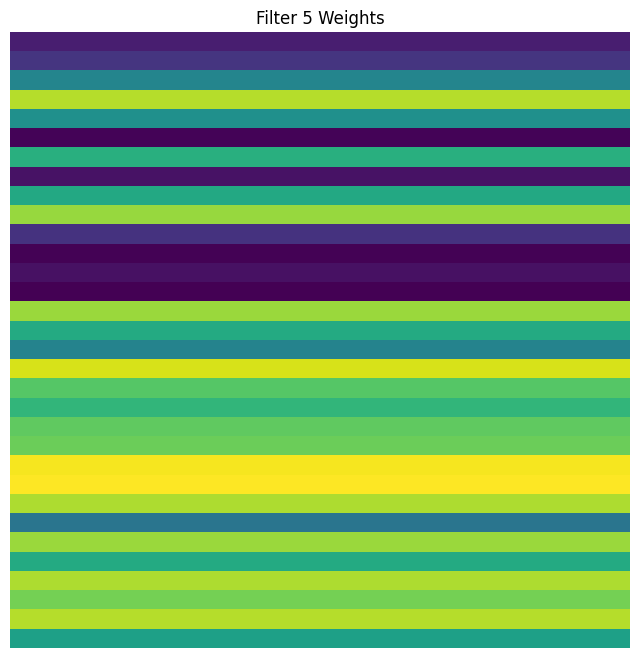

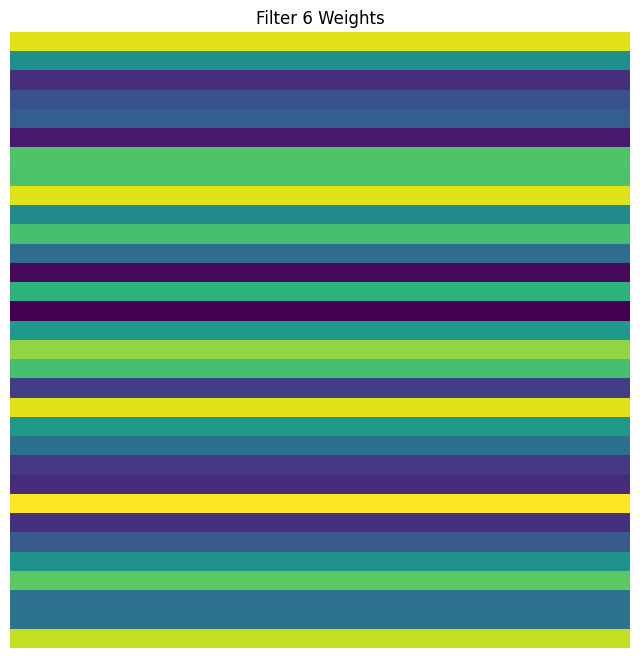

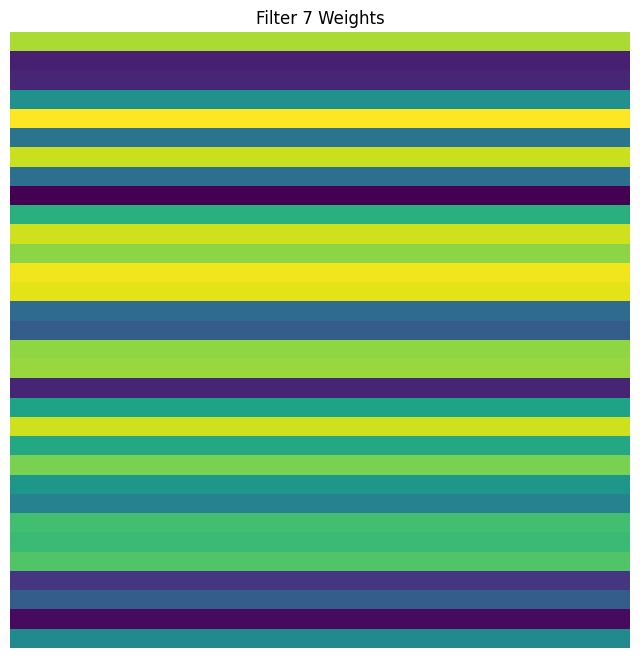

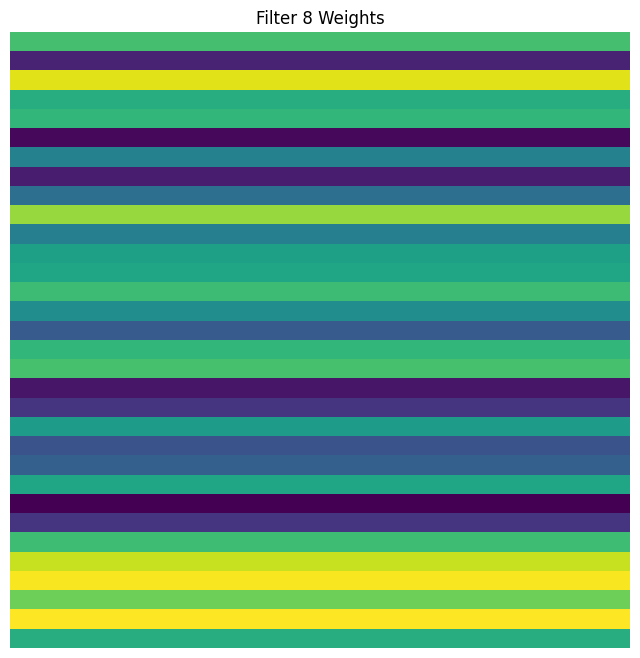

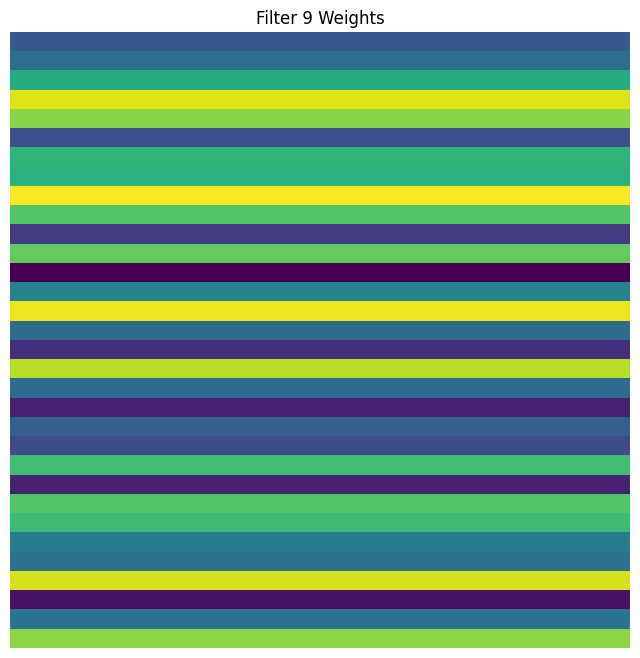

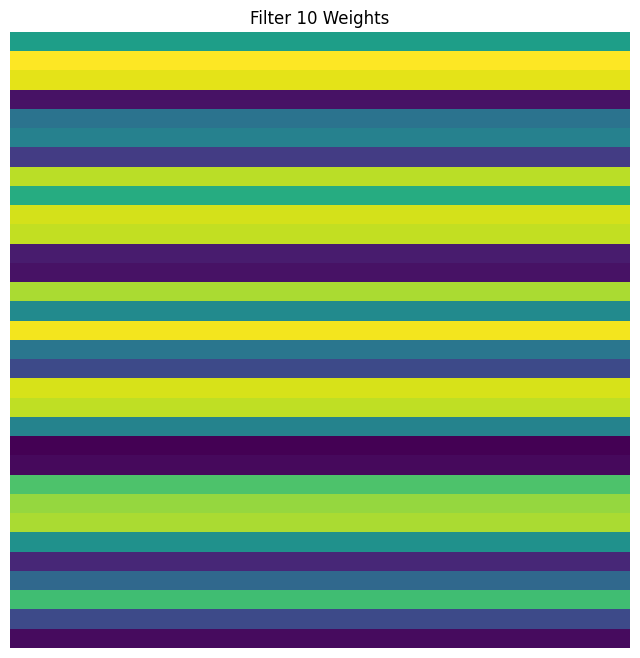

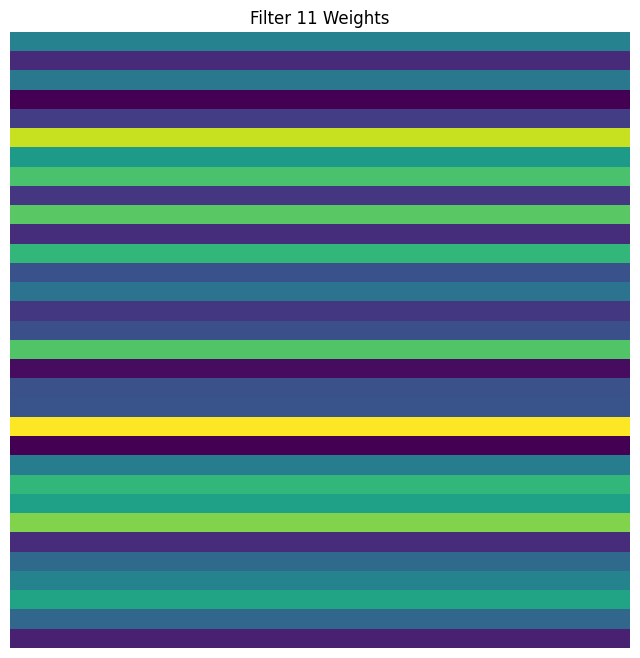

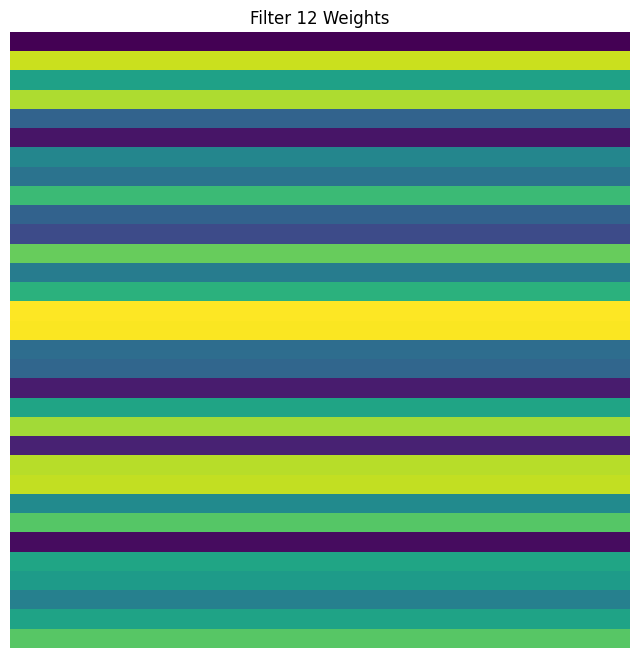

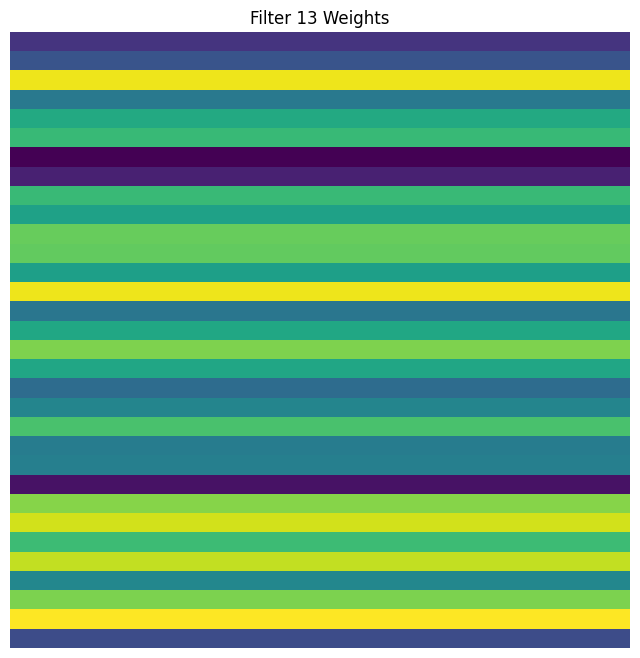

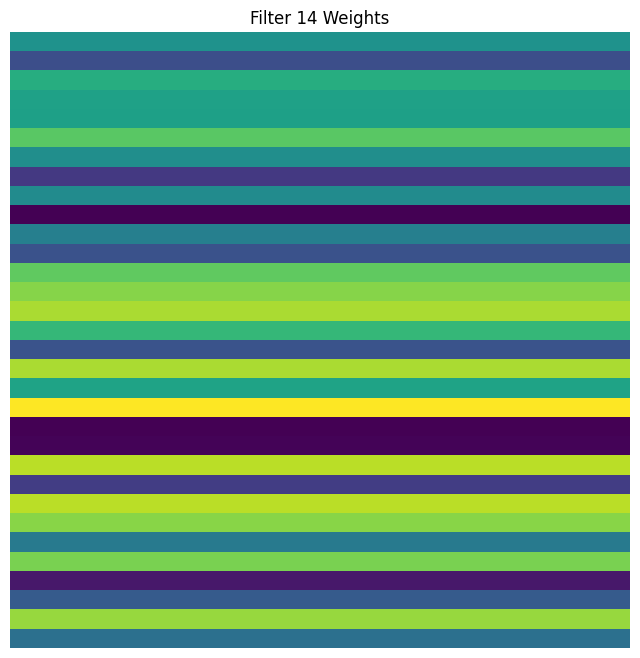

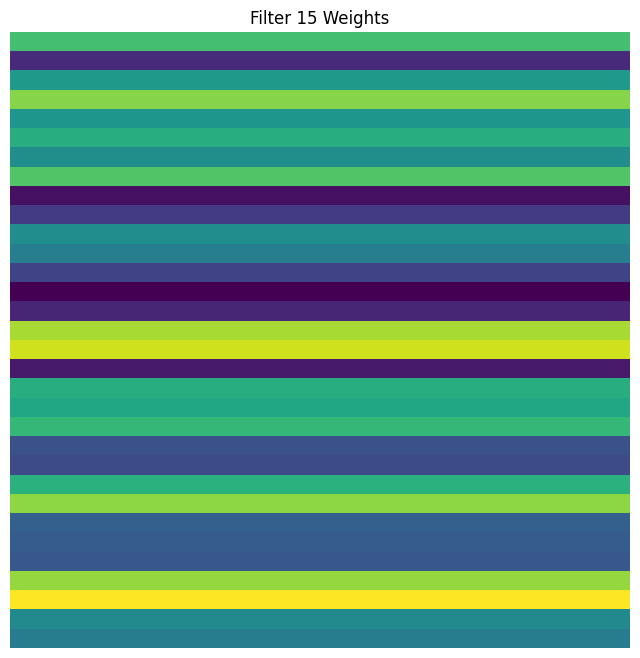

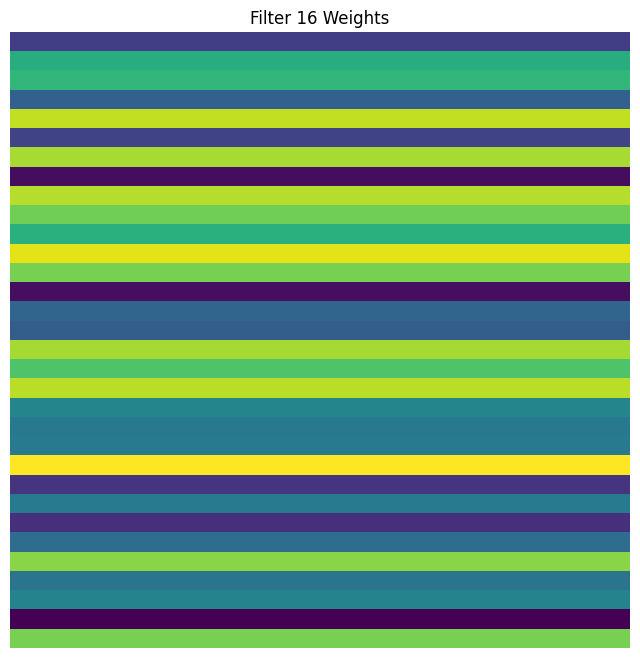

148/148 [==============================] - 0s 871us/step
F1 Score for Question 7: 0.8514682588034604

TRAIN QUESTION 8 MODEL
Index(['checkpoint_pct', 'cutscene_click_pct', 'map_click_pct',
       'map_hover_pct', 'navigate_click_pct', 'notification_click_pct',
       'object_click_pct', 'object_hover_pct', 'observation_click_pct',
       'person_click_pct', 'notebook_click_pct', 'elapsed_duration',
       'level_5_count', 'level_6_count', 'level_7_count', 'level_8_count',
       'level_9_count', 'level_10_count', 'level_11_count', 'level_12_count',
       'event_name_checkpoint_count', 'event_name_cutscene_click_count',
       'event_name_map_click_count', 'event_name_map_hover_count',
       'event_name_navigate_click_count',
       'event_name_notification_click_count', 'event_name_object_click_count',
       'event_name_object_hover_count', 'event_name_observation_click_count',
       'event_name_person_click_count', 'event_name_notebook_click_count',
       'name_basic_count', 'nam

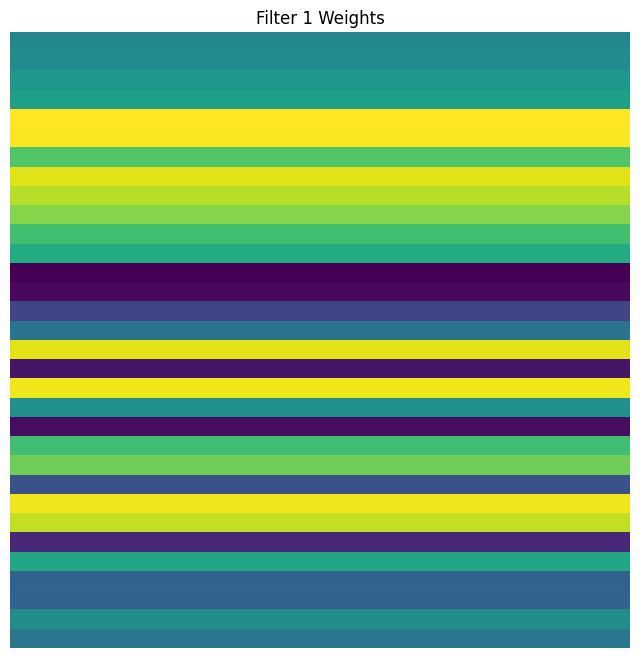

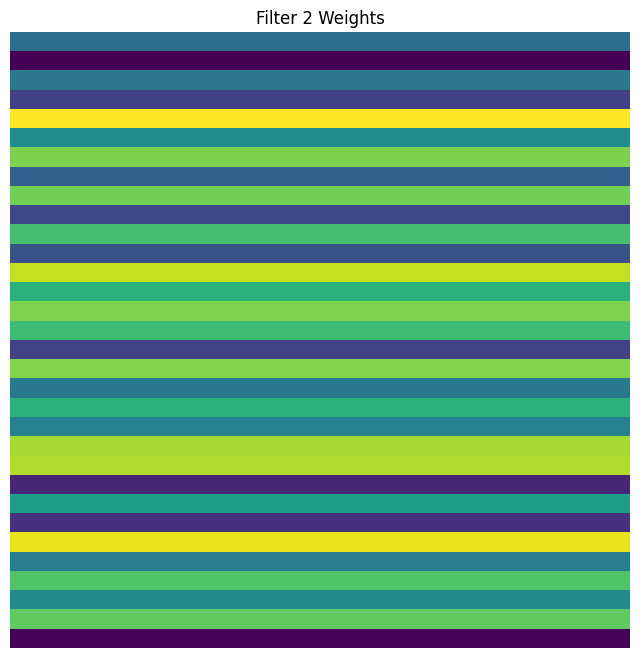

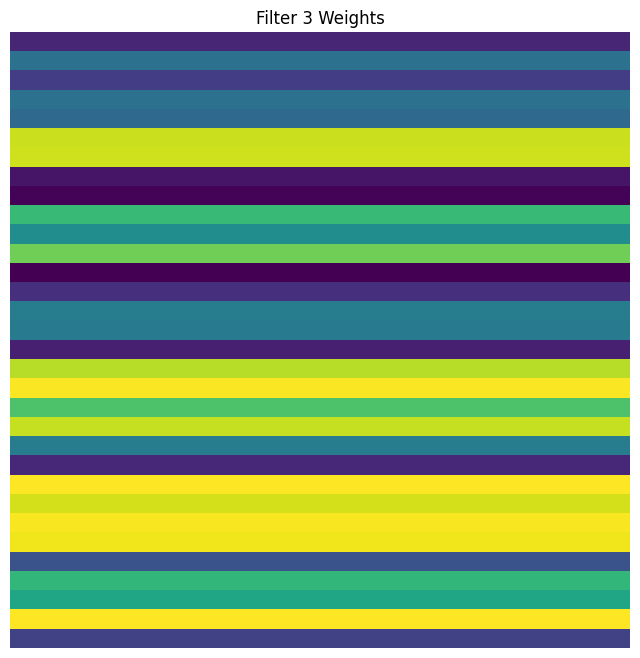

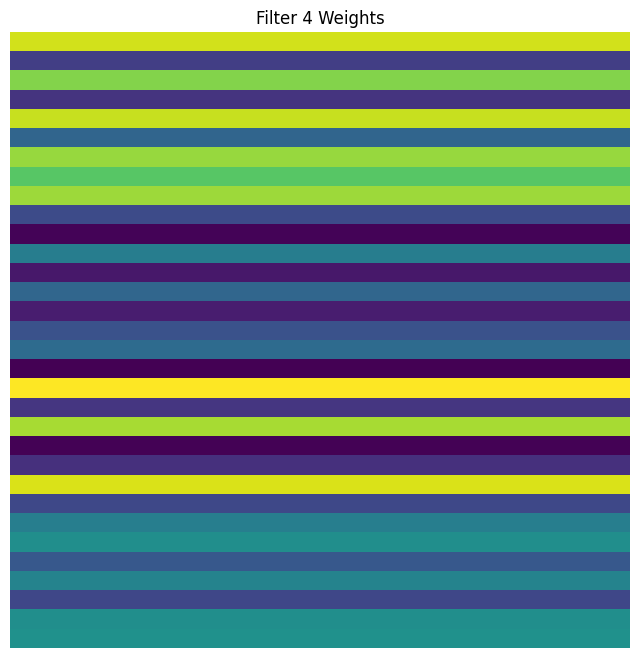

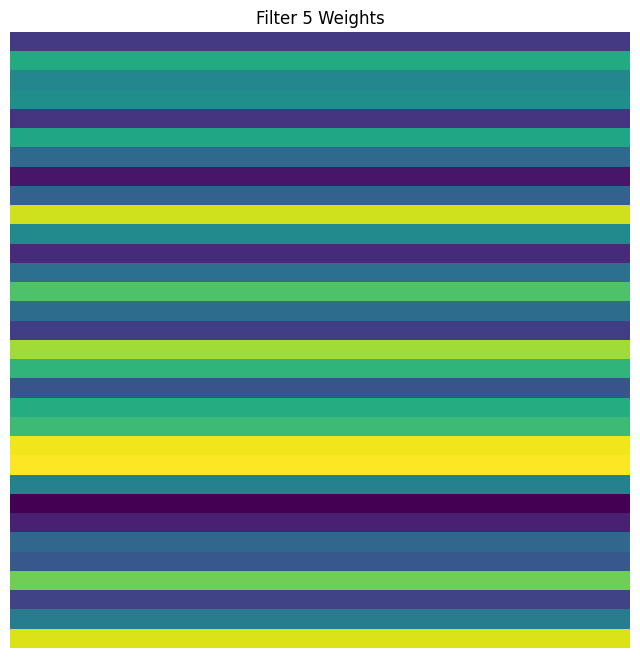

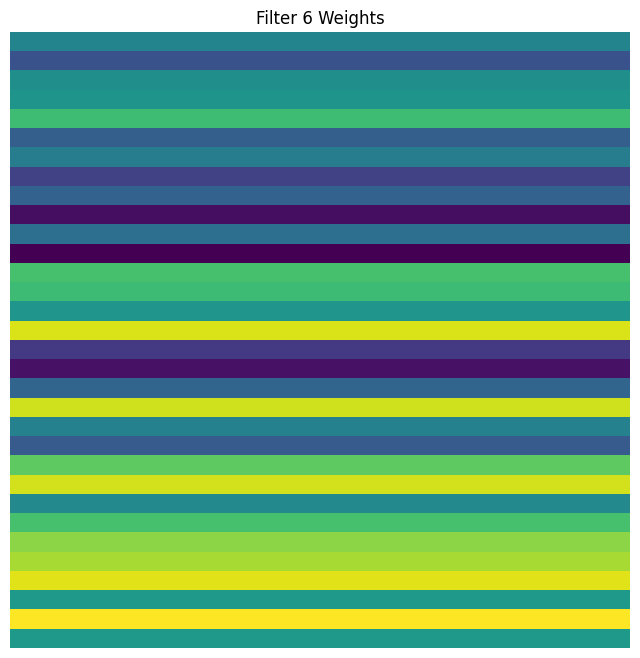

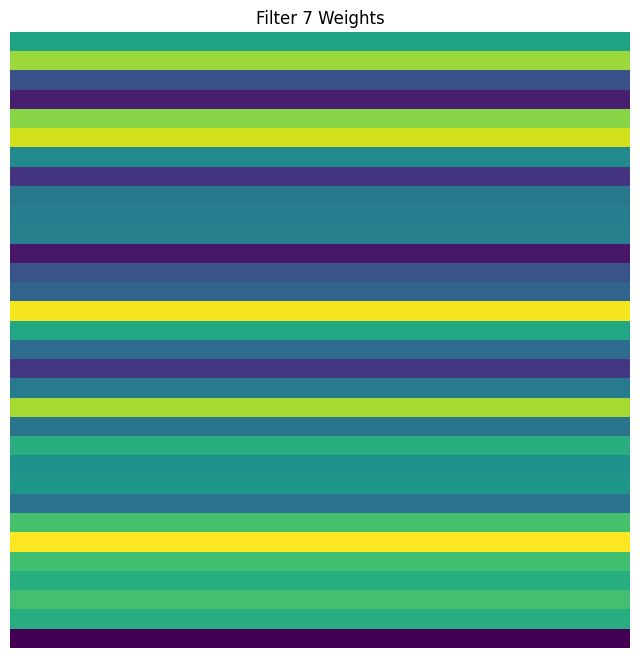

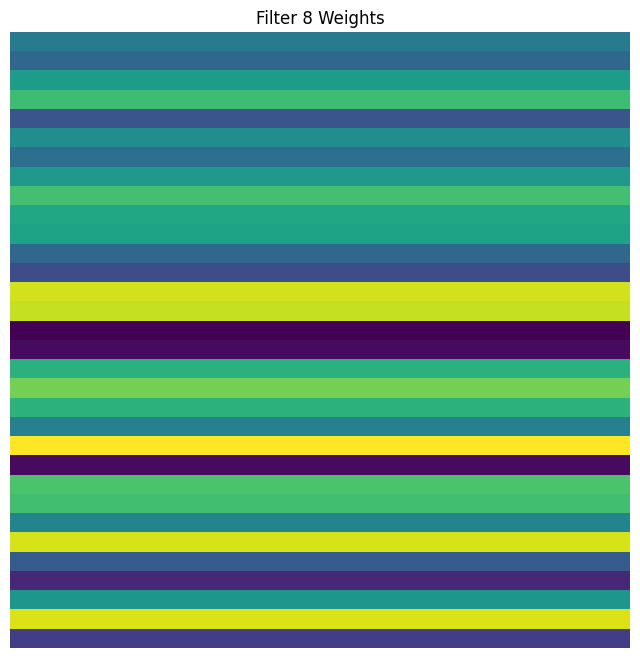

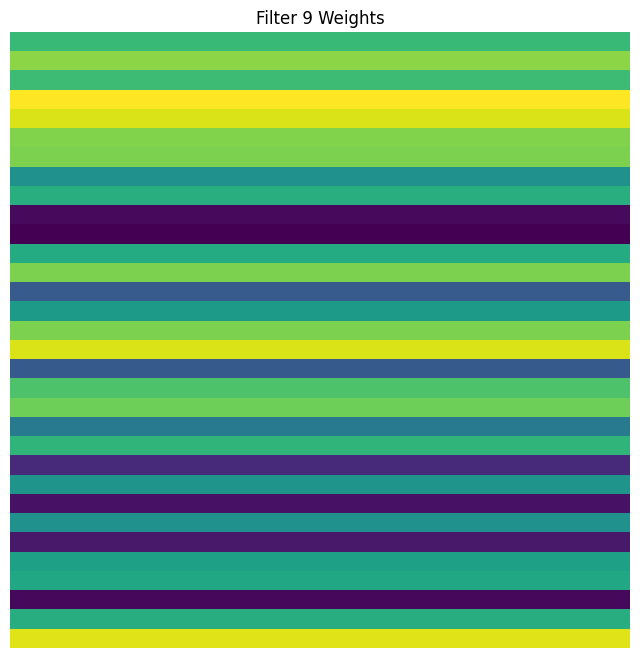

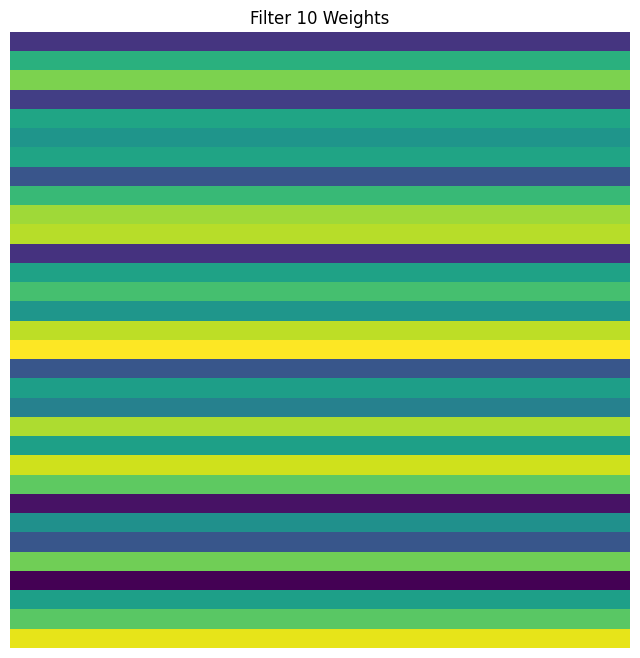

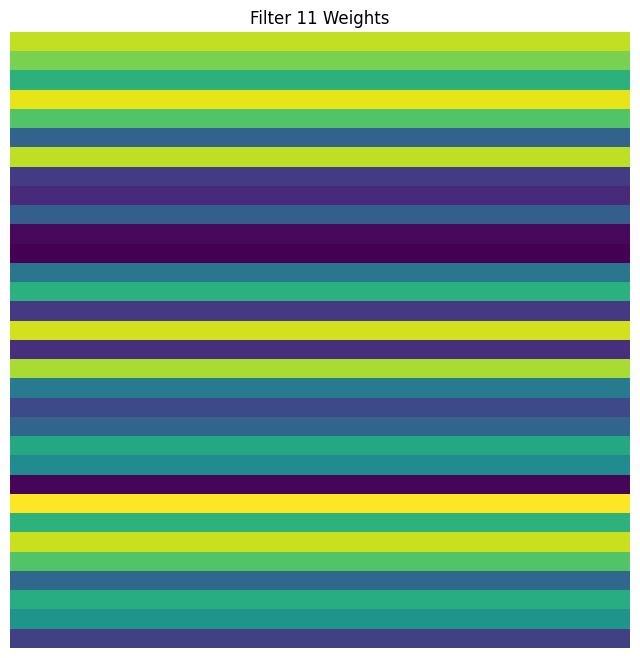

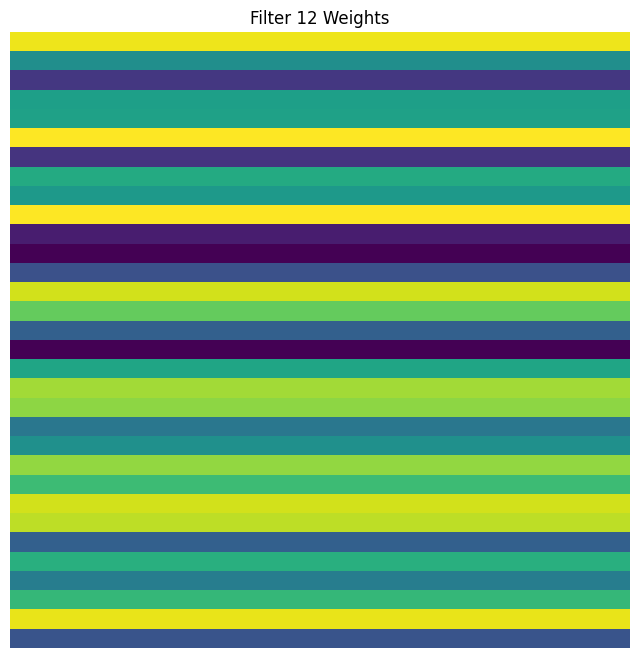

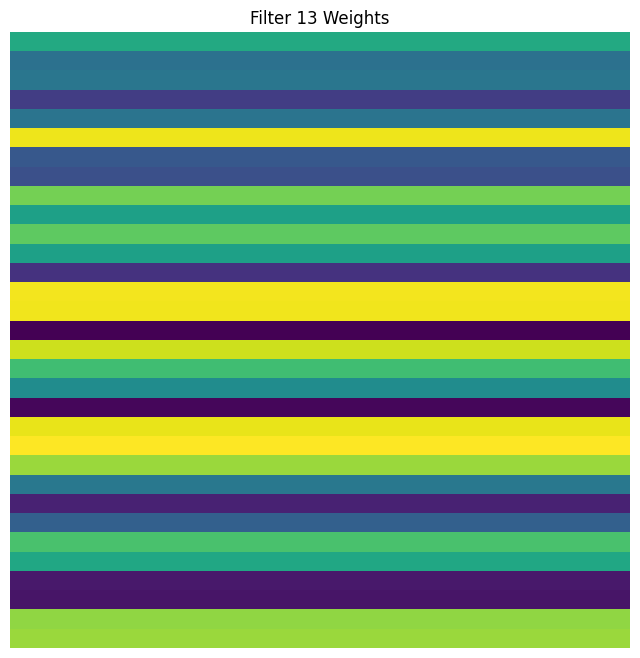

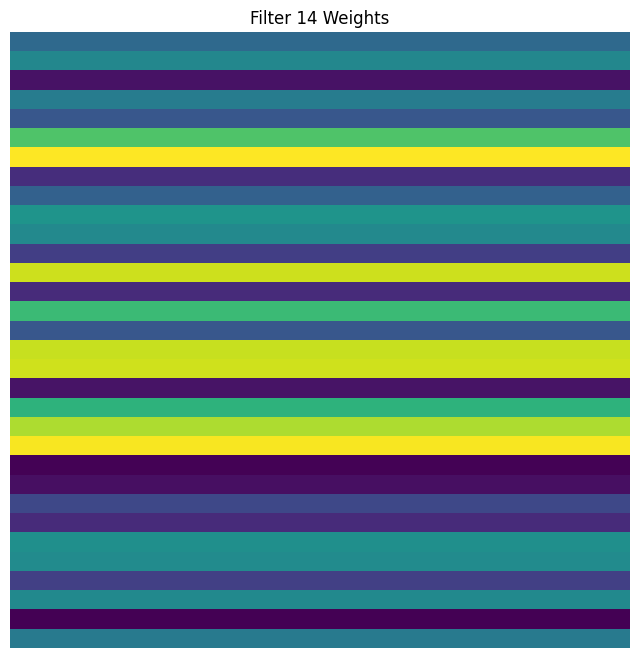

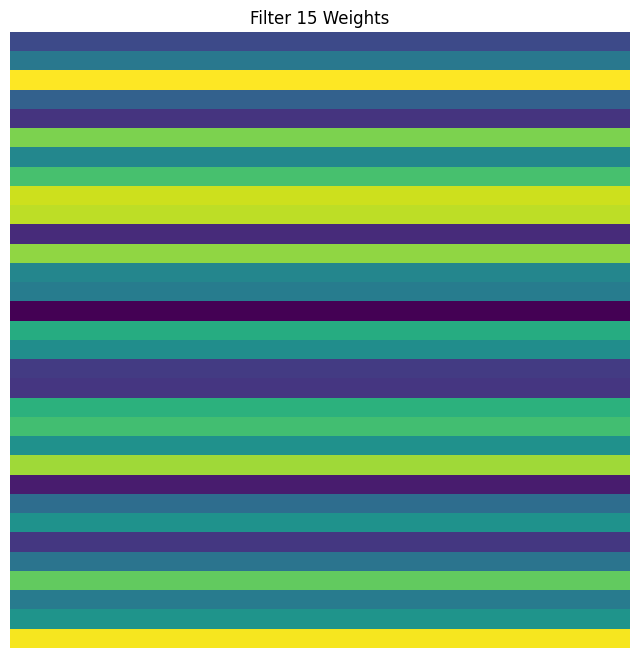

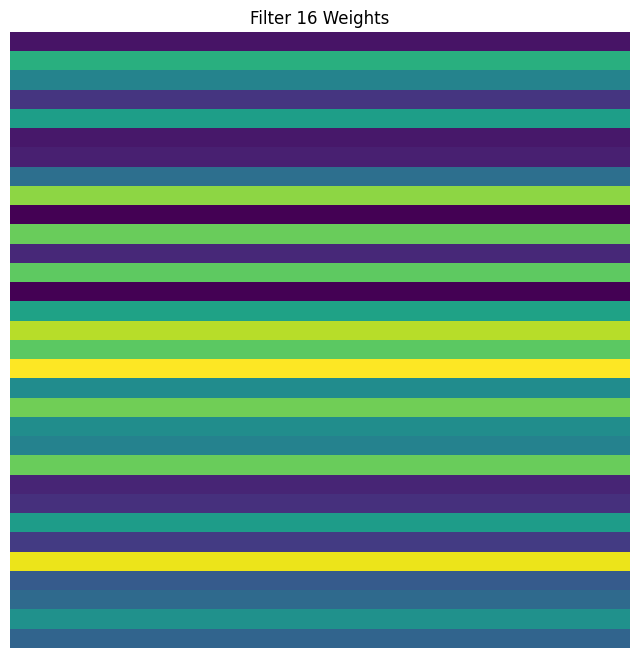

148/148 [==============================] - 1s 1ms/step
F1 Score for Question 8: 0.7549861312904503

TRAIN QUESTION 9 MODEL
Index(['checkpoint_pct', 'cutscene_click_pct', 'map_click_pct',
       'map_hover_pct', 'navigate_click_pct', 'notification_click_pct',
       'object_click_pct', 'object_hover_pct', 'observation_click_pct',
       'person_click_pct', 'notebook_click_pct', 'elapsed_duration',
       'level_5_count', 'level_6_count', 'level_7_count', 'level_8_count',
       'level_9_count', 'level_10_count', 'level_11_count', 'level_12_count',
       'event_name_checkpoint_count', 'event_name_cutscene_click_count',
       'event_name_map_click_count', 'event_name_map_hover_count',
       'event_name_navigate_click_count',
       'event_name_notification_click_count', 'event_name_object_click_count',
       'event_name_object_hover_count', 'event_name_observation_click_count',
       'event_name_person_click_count', 'event_name_notebook_click_count',
       'name_basic_count', 'name_

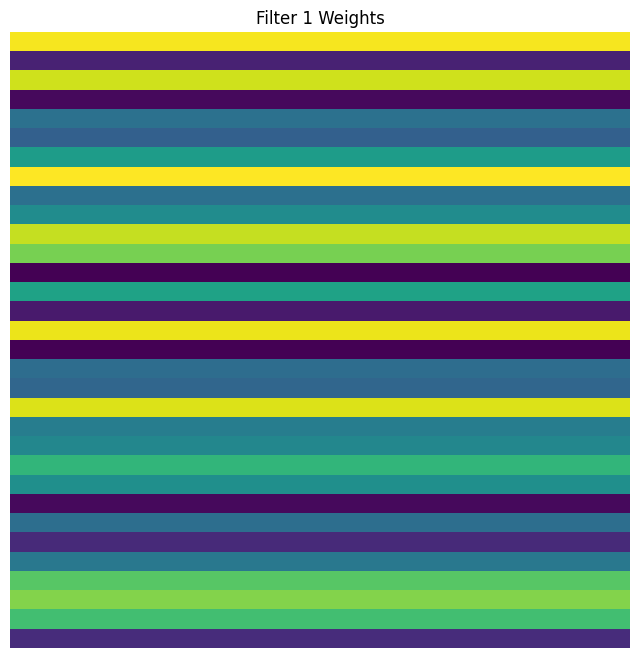

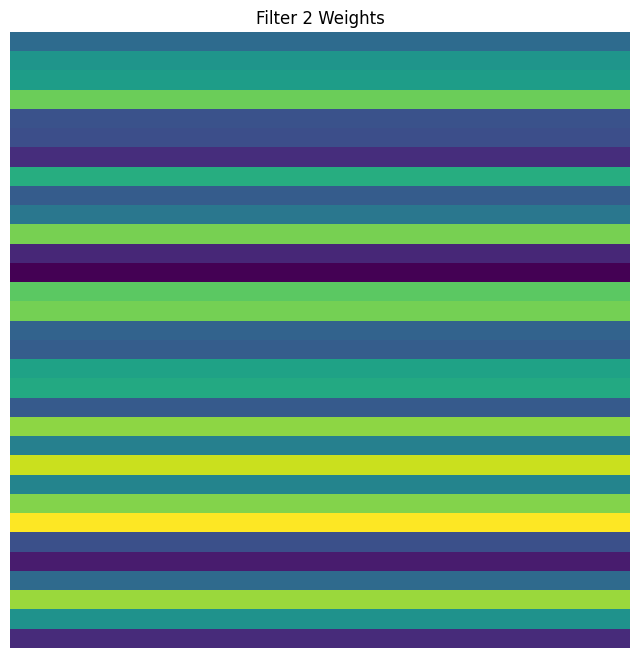

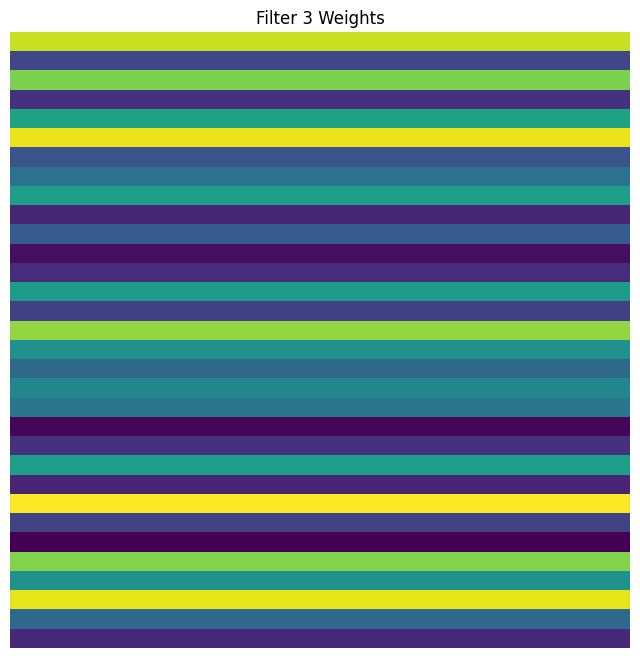

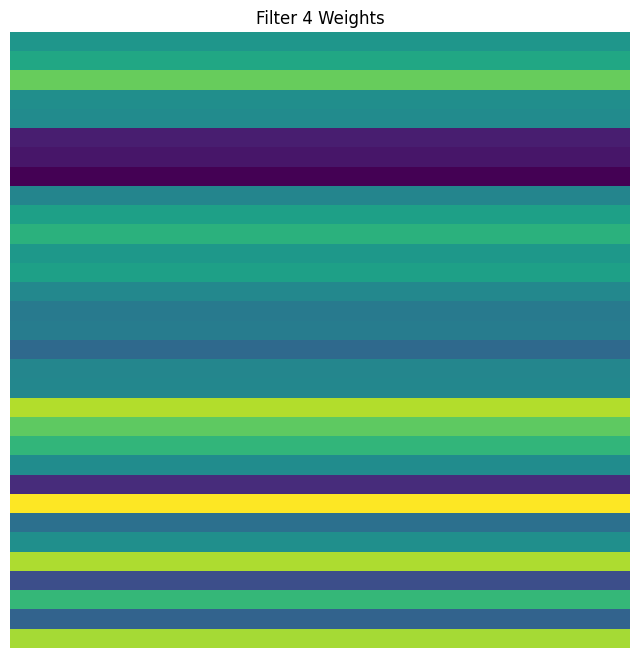

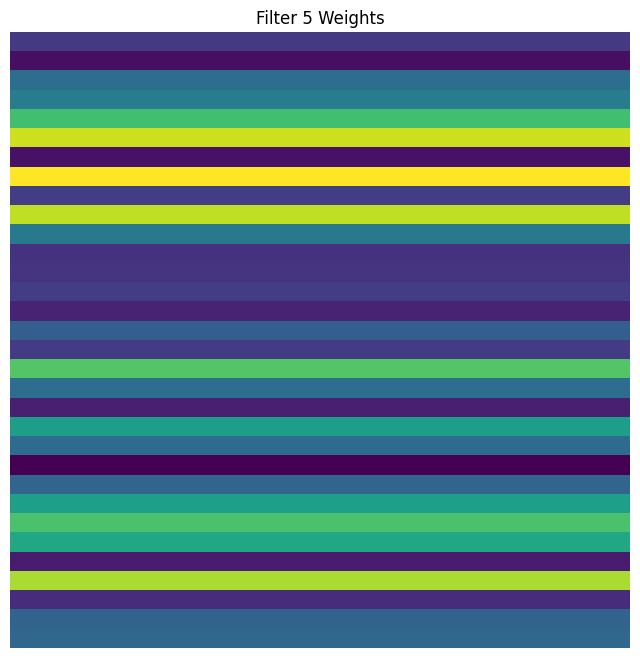

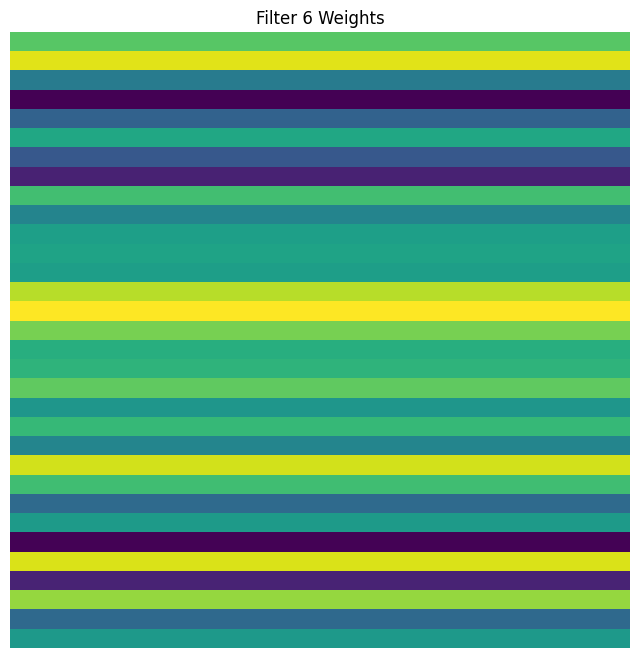

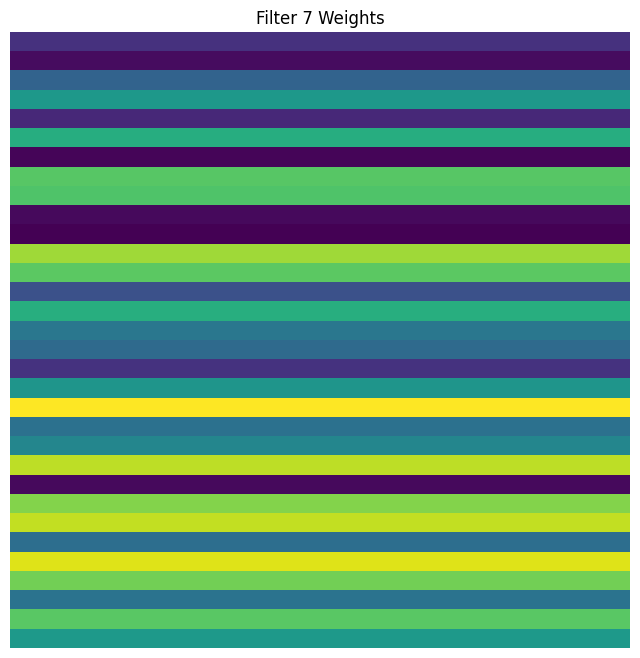

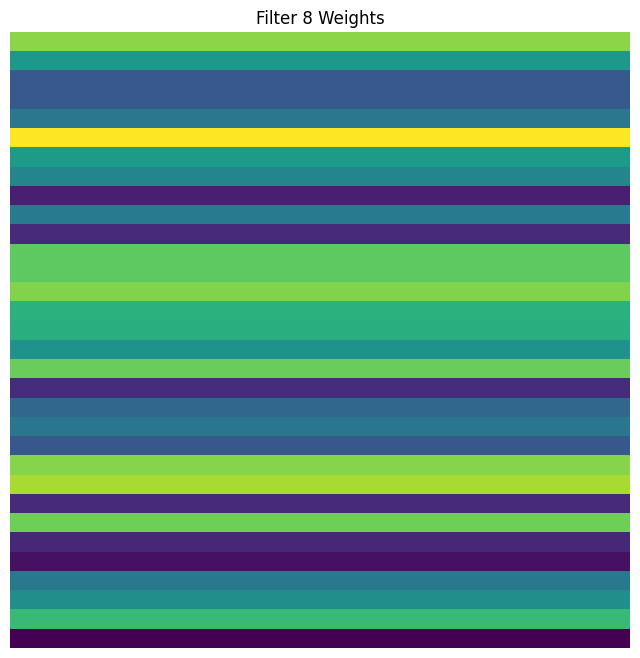

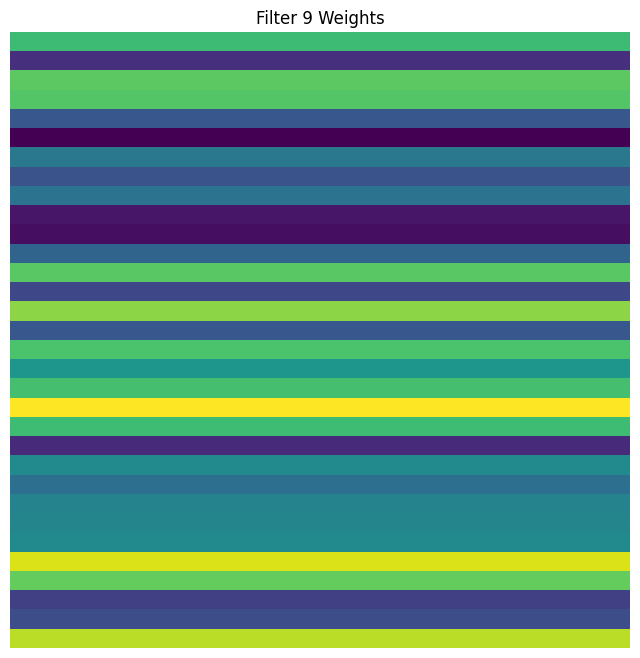

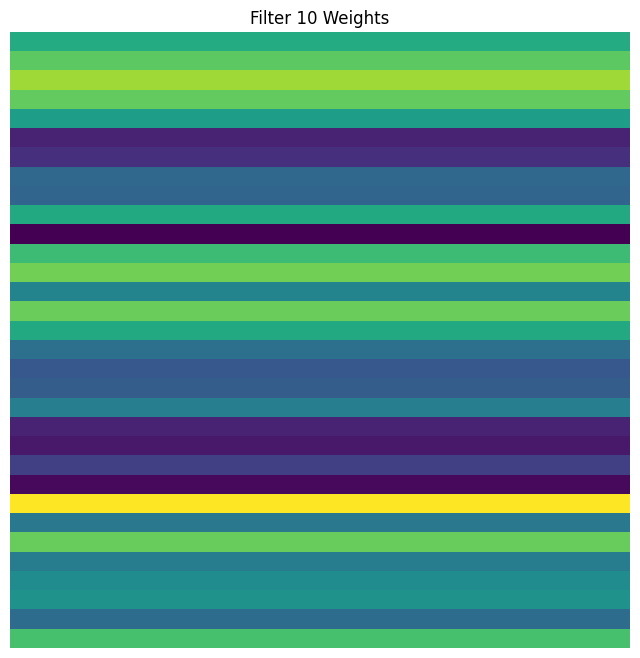

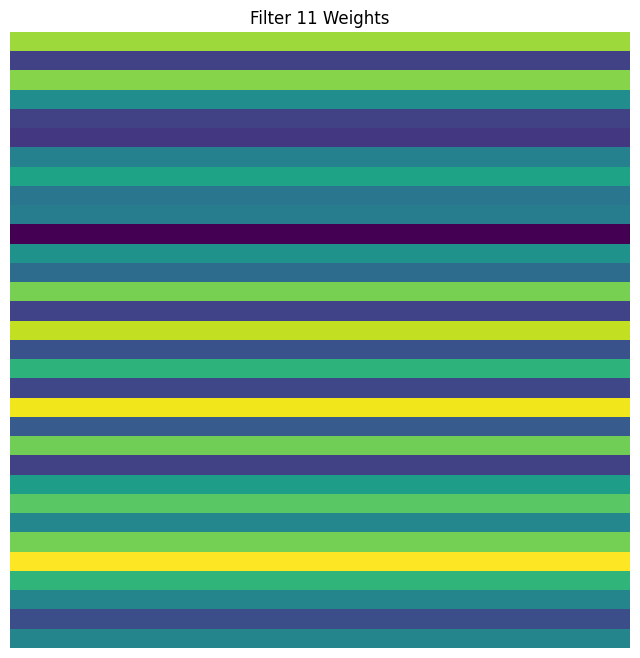

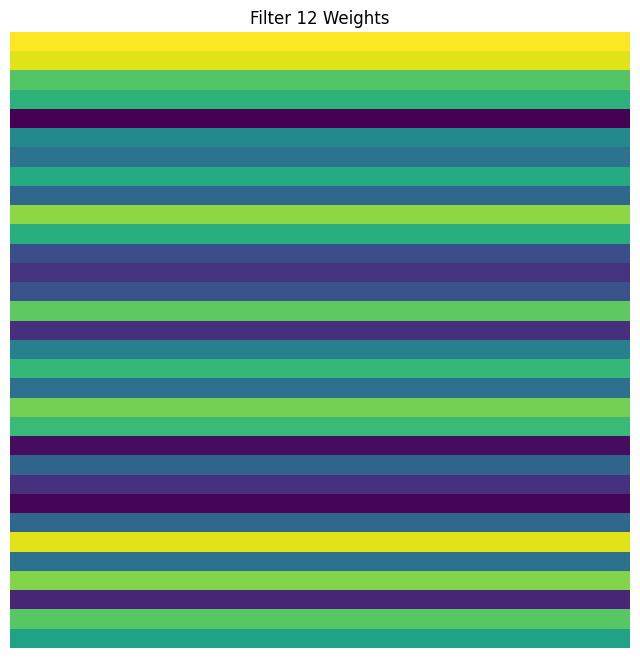

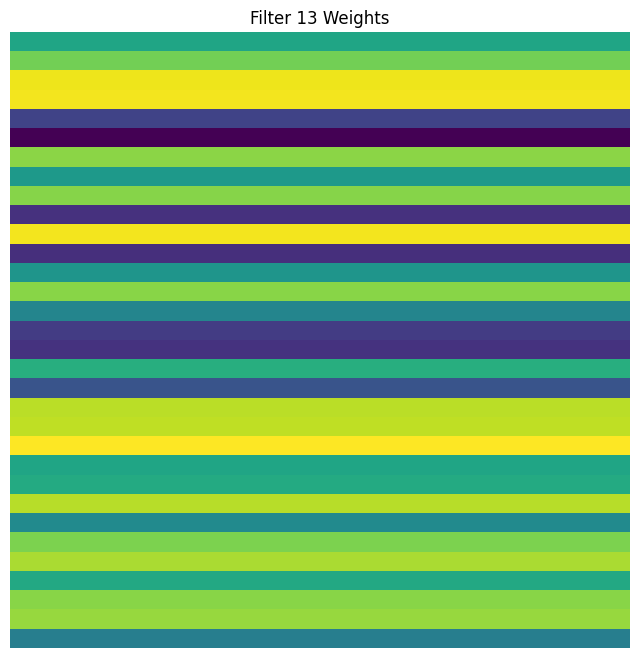

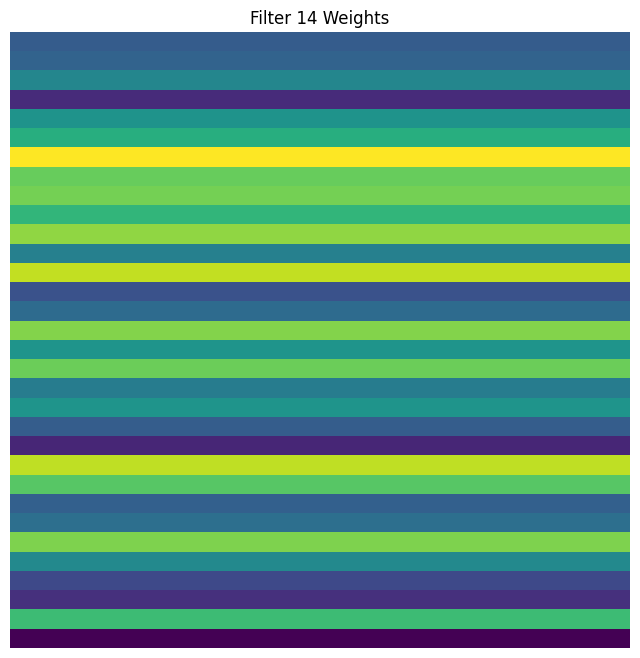

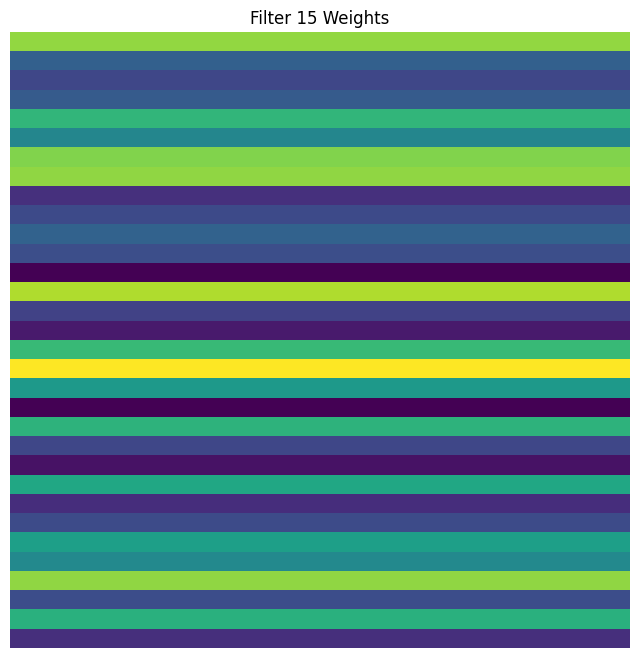

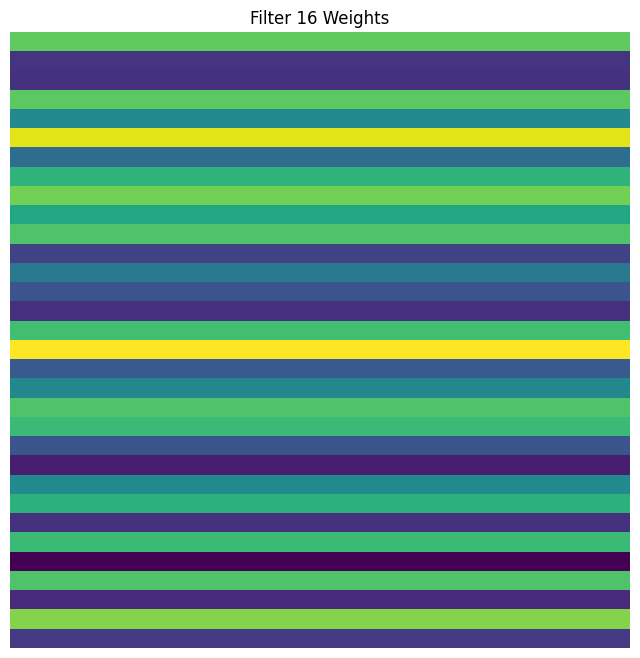

148/148 [==============================] - 0s 928us/step
F1 Score for Question 9: 0.8438003220611917

TRAIN QUESTION 10 MODEL
Index(['checkpoint_pct', 'cutscene_click_pct', 'map_click_pct',
       'map_hover_pct', 'navigate_click_pct', 'notification_click_pct',
       'object_click_pct', 'object_hover_pct', 'observation_click_pct',
       'person_click_pct', 'notebook_click_pct', 'elapsed_duration',
       'level_5_count', 'level_6_count', 'level_7_count', 'level_8_count',
       'level_9_count', 'level_10_count', 'level_11_count', 'level_12_count',
       'event_name_checkpoint_count', 'event_name_cutscene_click_count',
       'event_name_map_click_count', 'event_name_map_hover_count',
       'event_name_navigate_click_count',
       'event_name_notification_click_count', 'event_name_object_click_count',
       'event_name_object_hover_count', 'event_name_observation_click_count',
       'event_name_person_click_count', 'event_name_notebook_click_count',
       'name_basic_count', 'na

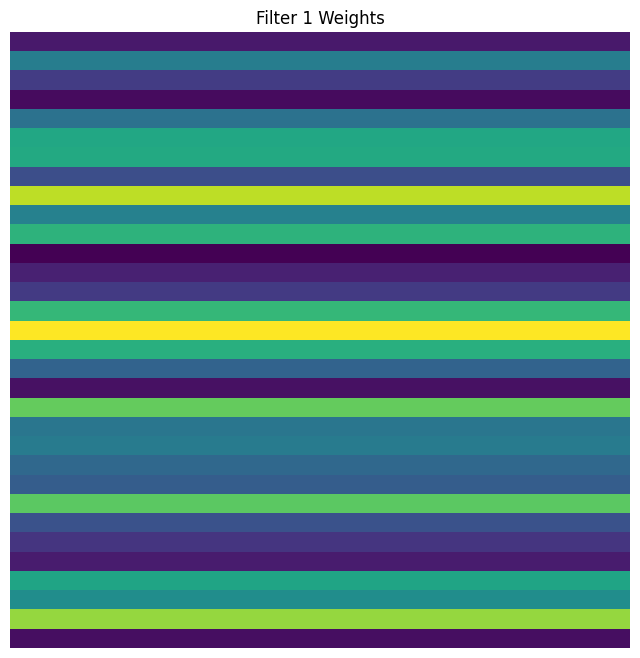

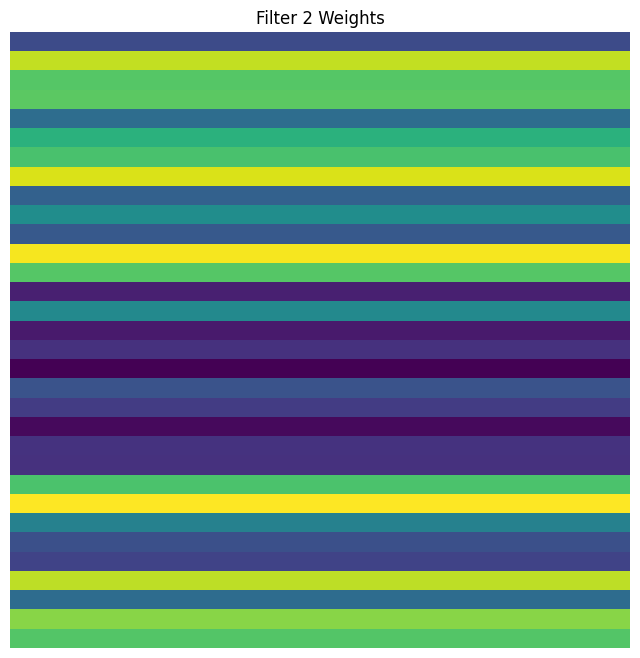

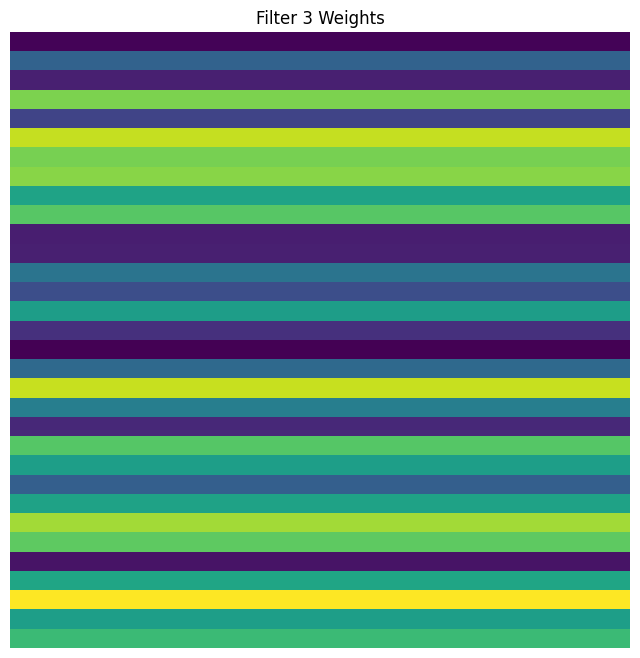

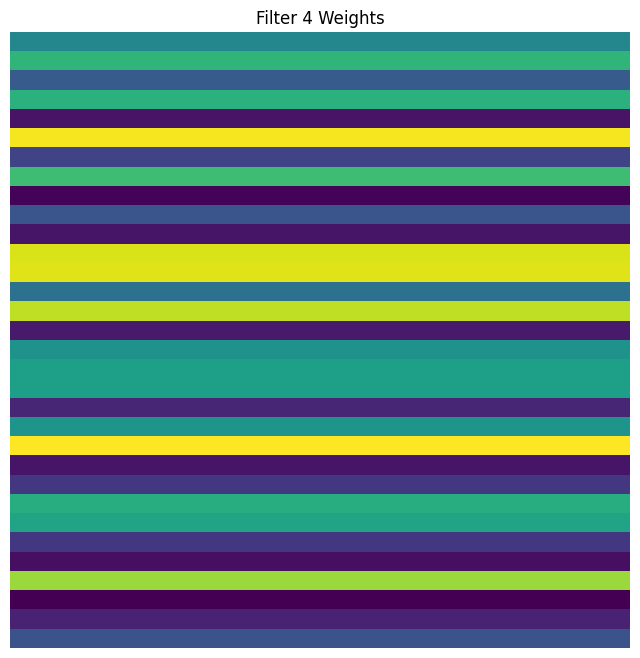

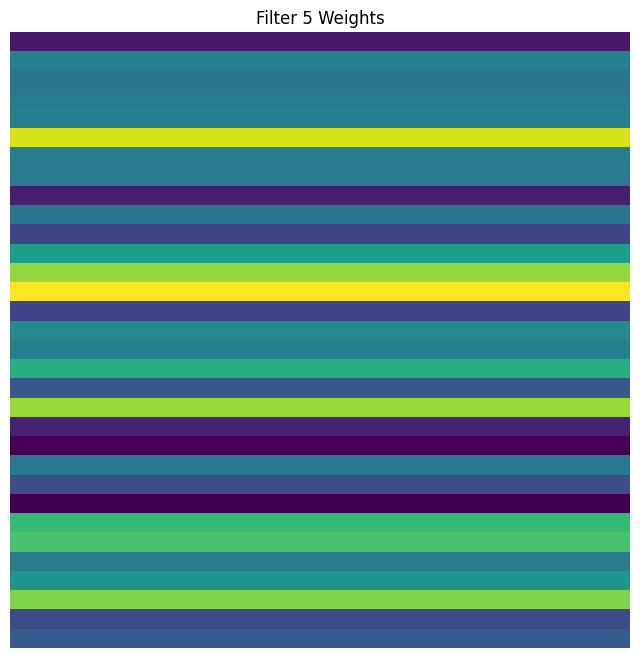

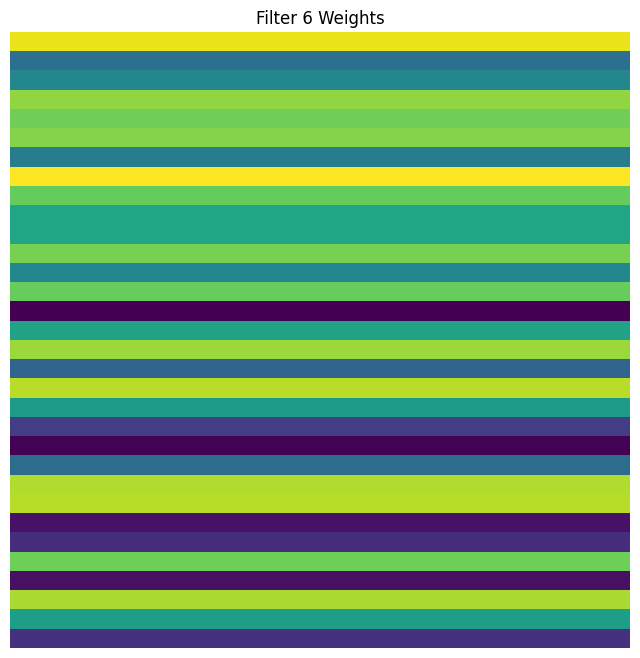

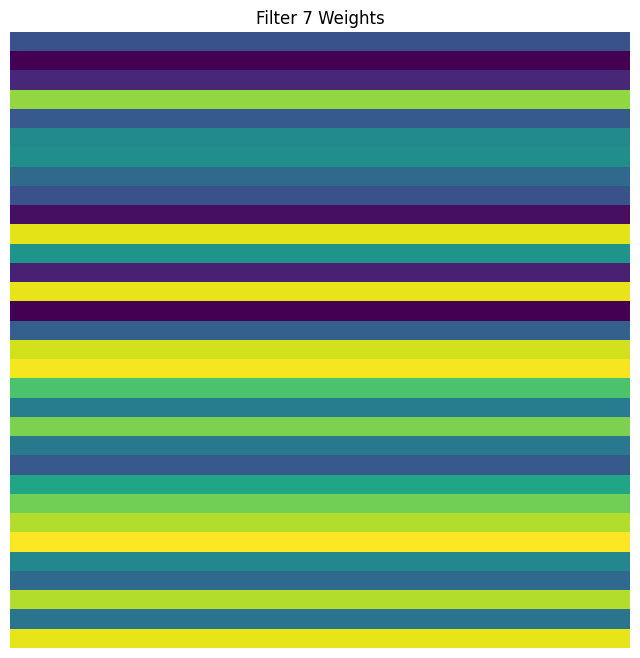

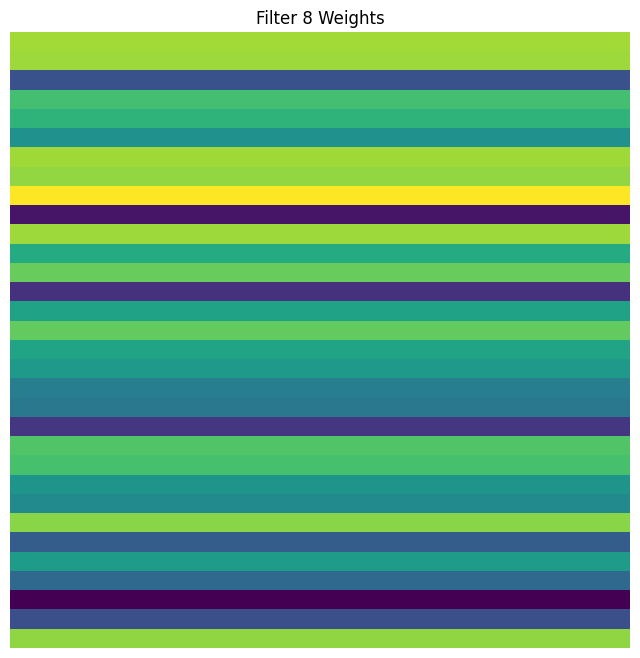

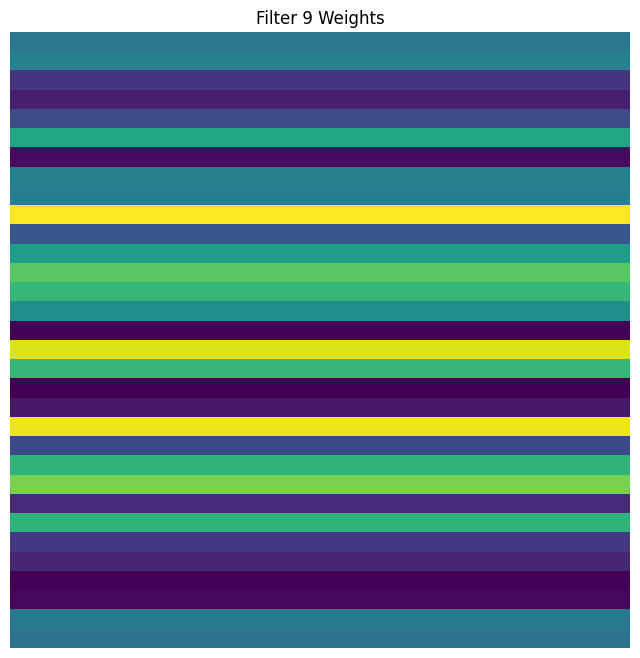

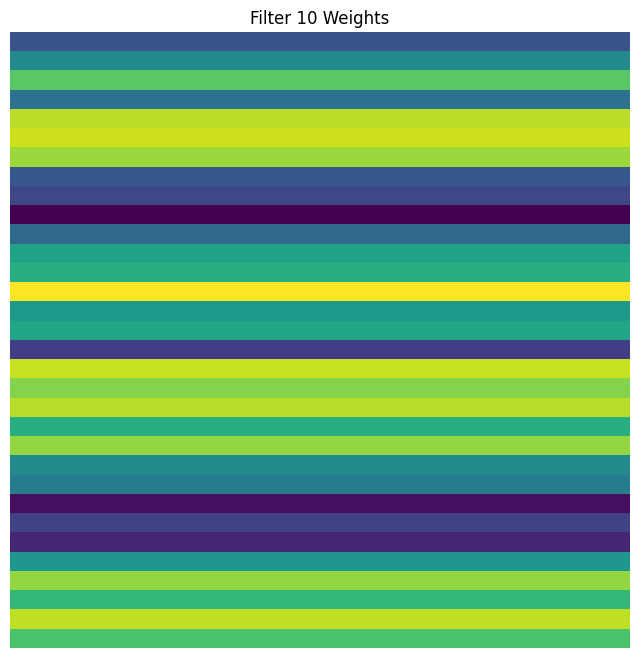

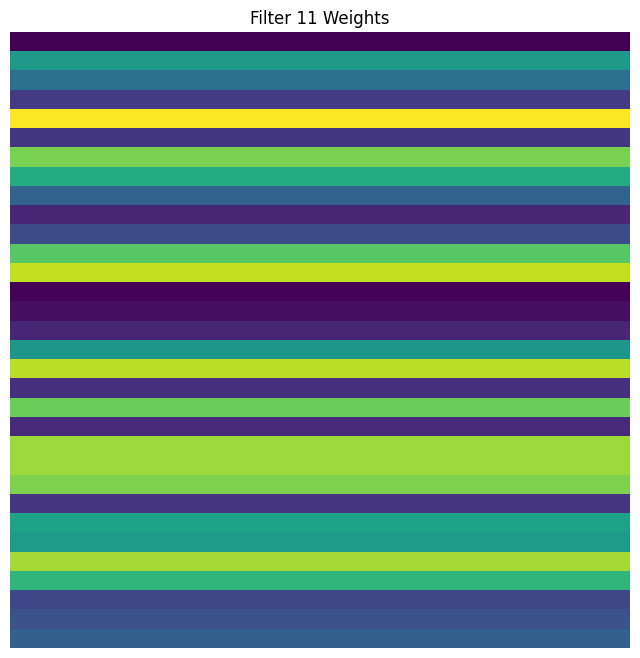

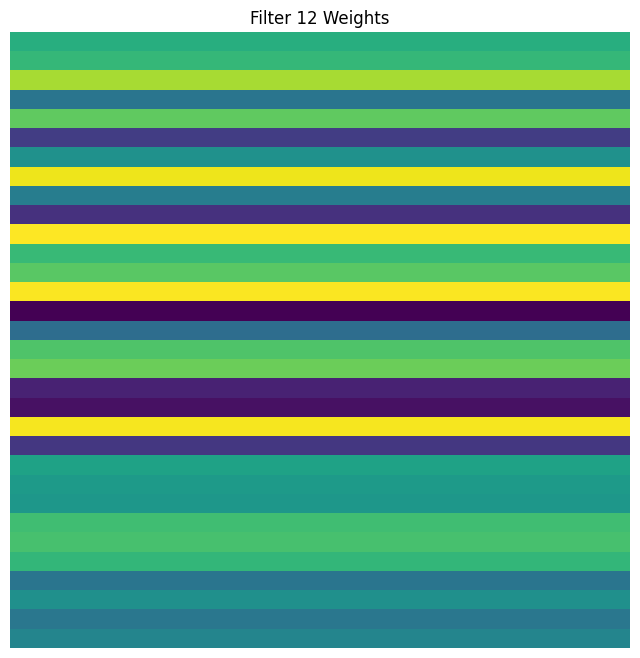

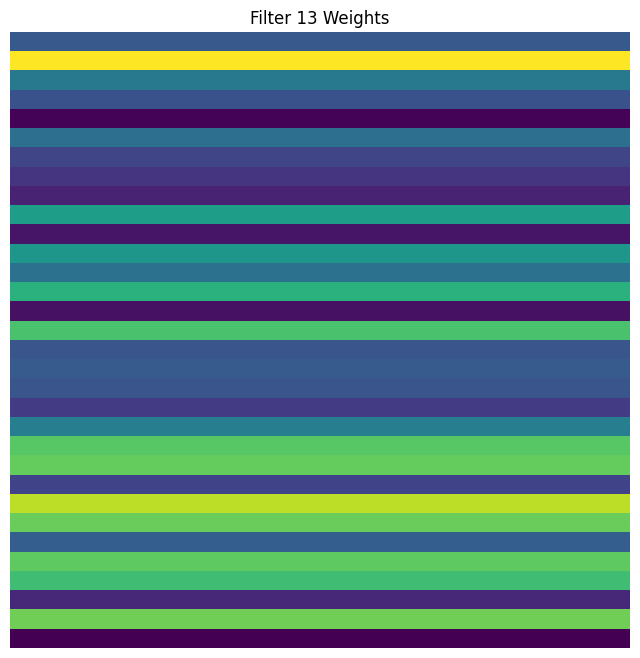

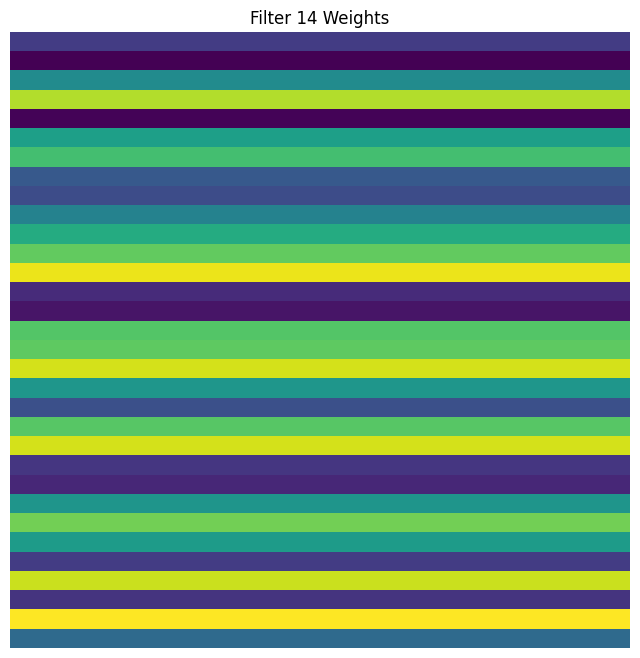

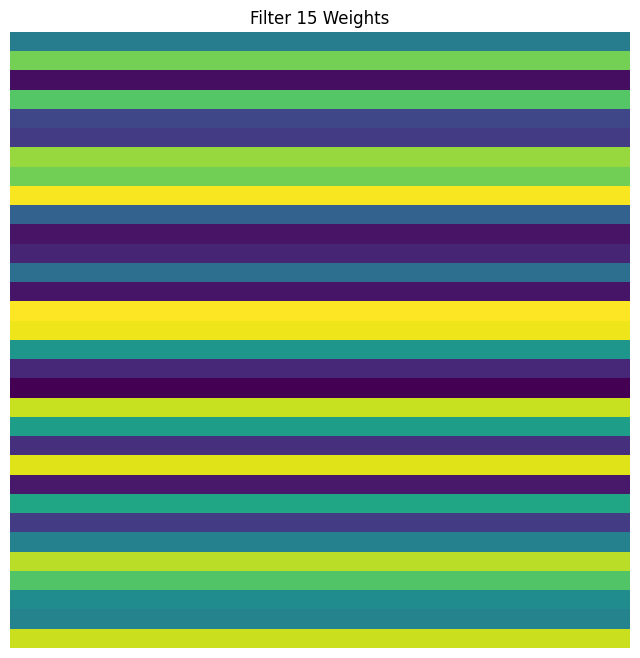

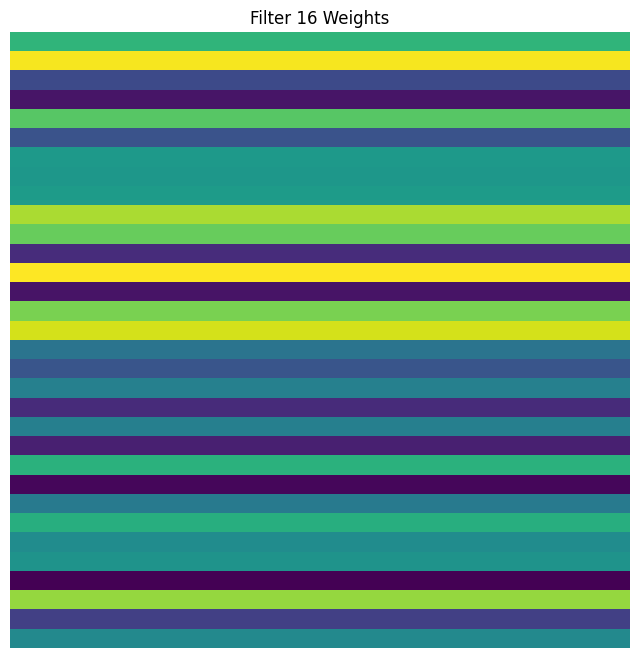

148/148 [==============================] - 0s 878us/step
F1 Score for Question 10: 0.6247095274980634

TRAIN QUESTION 11 MODEL
Index(['checkpoint_pct', 'cutscene_click_pct', 'map_click_pct',
       'map_hover_pct', 'navigate_click_pct', 'notification_click_pct',
       'object_click_pct', 'object_hover_pct', 'observation_click_pct',
       'person_click_pct', 'notebook_click_pct', 'elapsed_duration',
       'level_5_count', 'level_6_count', 'level_7_count', 'level_8_count',
       'level_9_count', 'level_10_count', 'level_11_count', 'level_12_count',
       'event_name_checkpoint_count', 'event_name_cutscene_click_count',
       'event_name_map_click_count', 'event_name_map_hover_count',
       'event_name_navigate_click_count',
       'event_name_notification_click_count', 'event_name_object_click_count',
       'event_name_object_hover_count', 'event_name_observation_click_count',
       'event_name_person_click_count', 'event_name_notebook_click_count',
       'name_basic_count', 'n

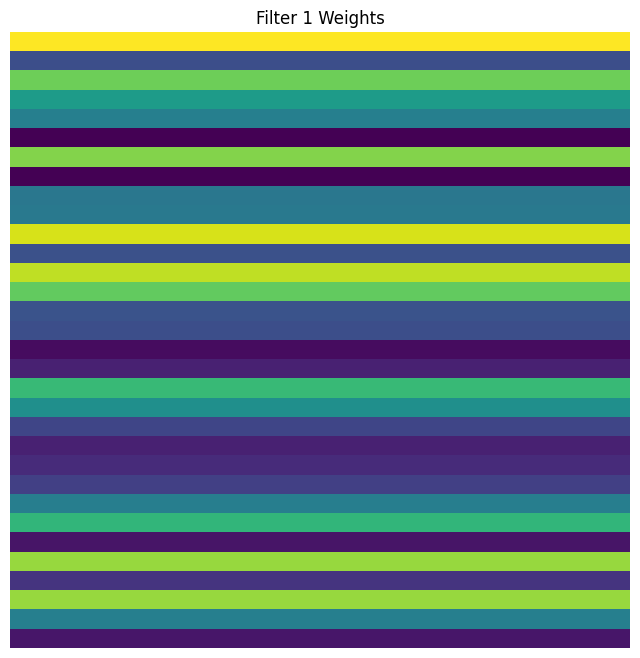

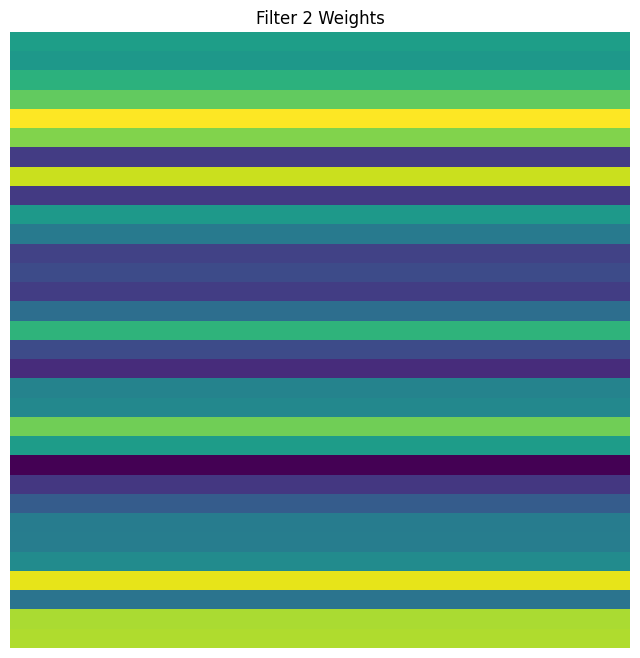

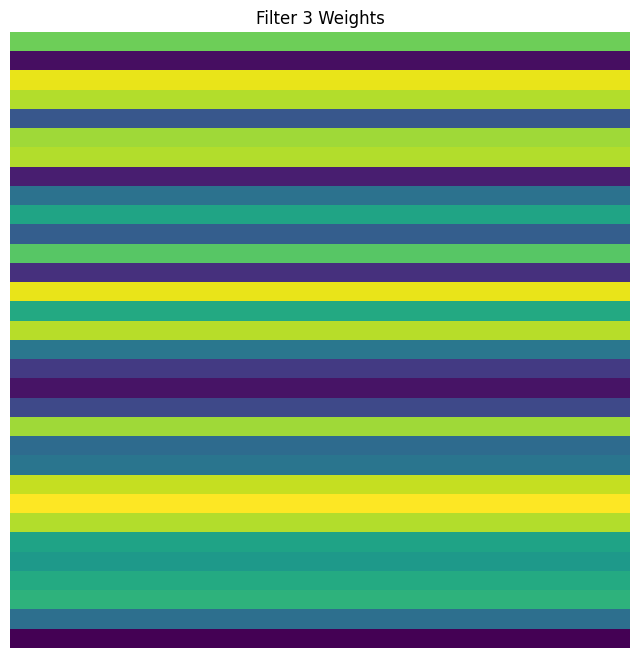

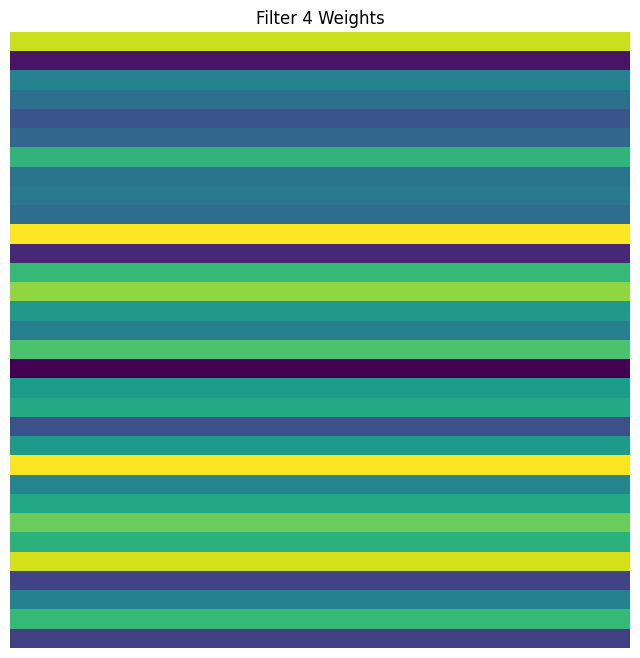

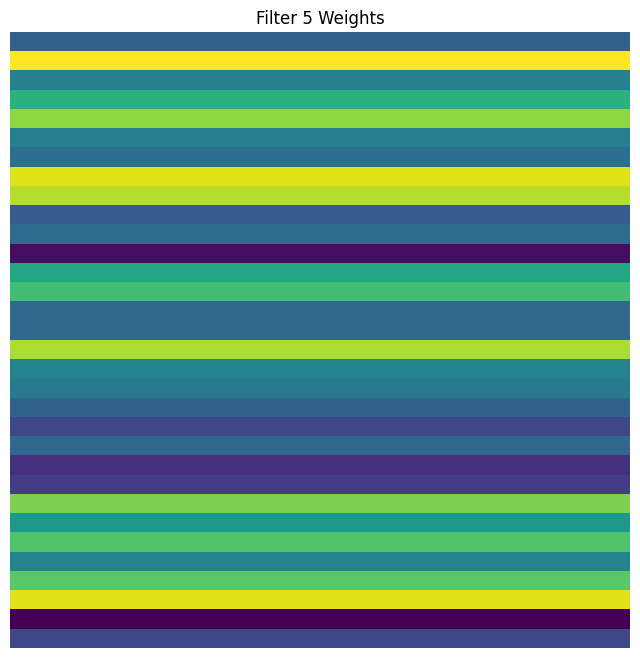

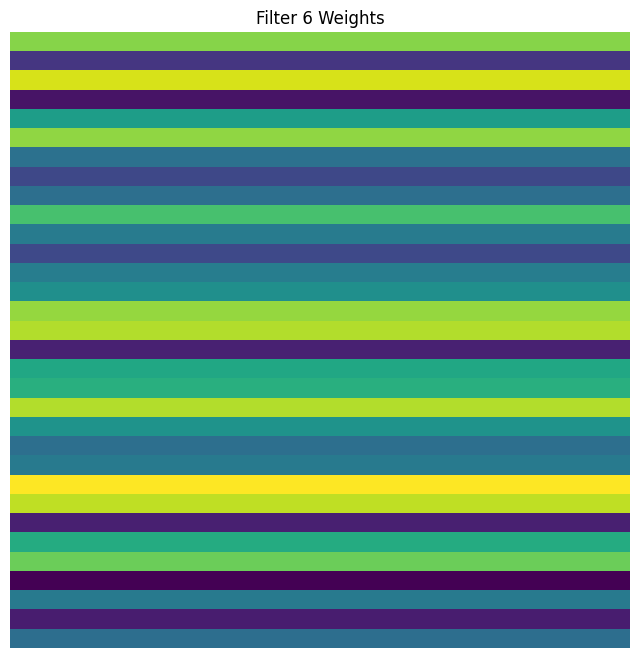

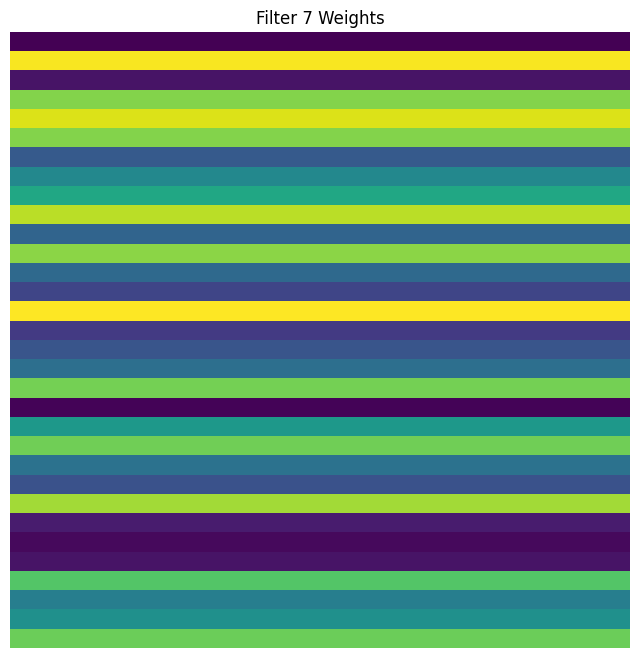

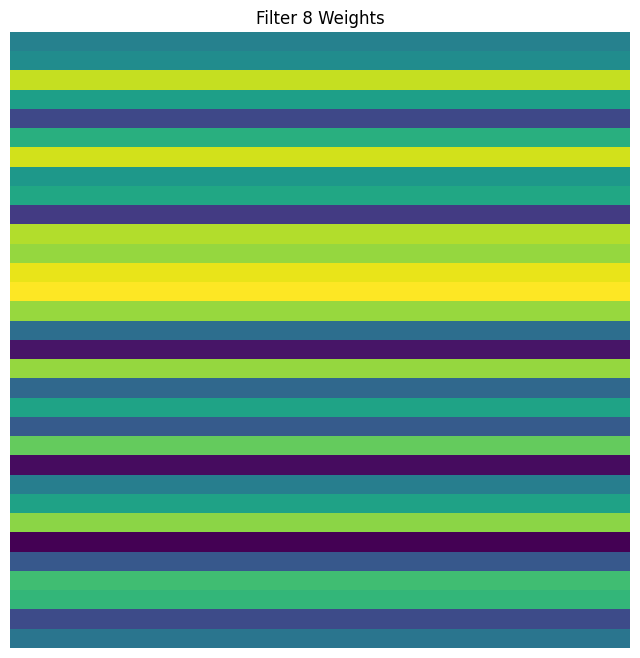

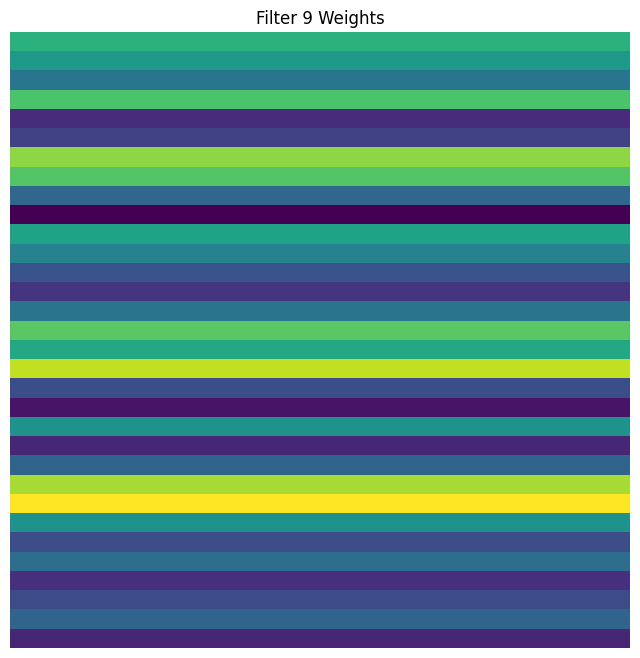

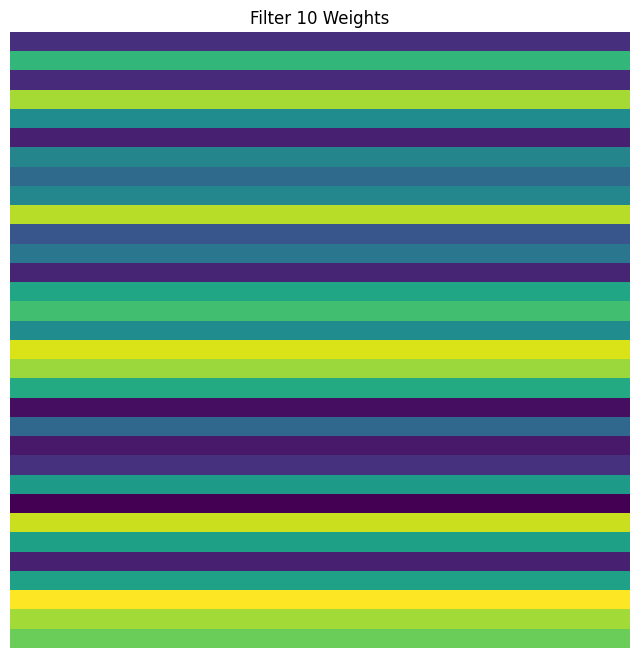

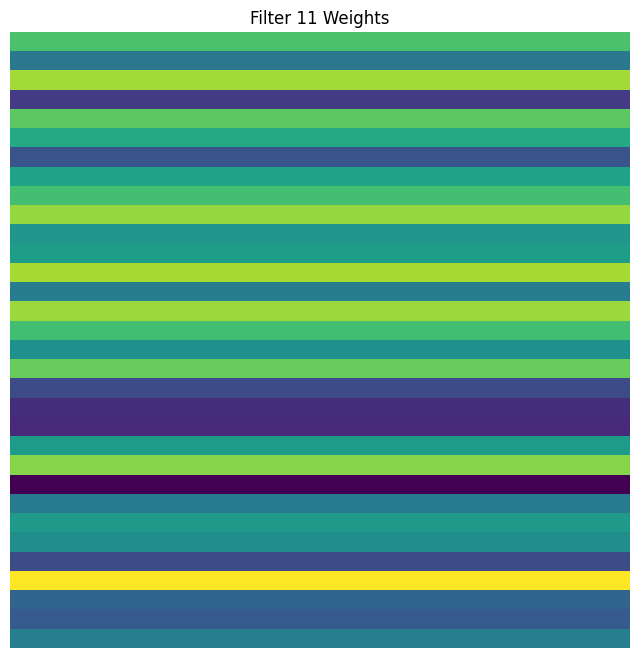

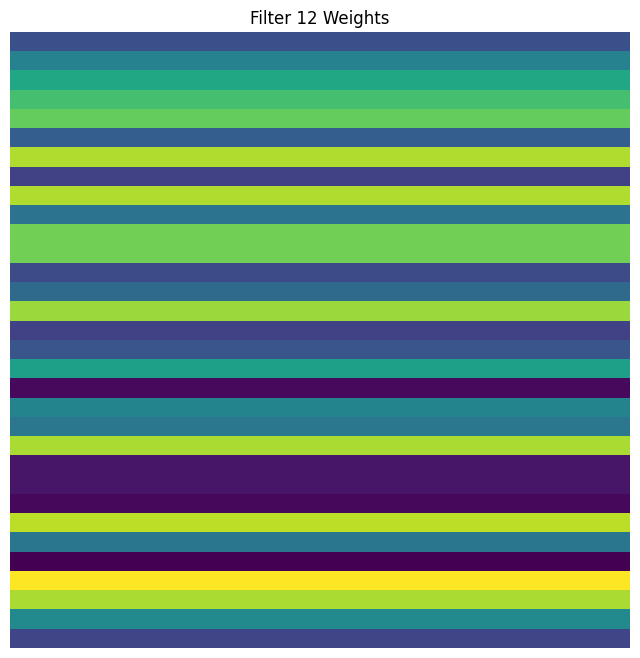

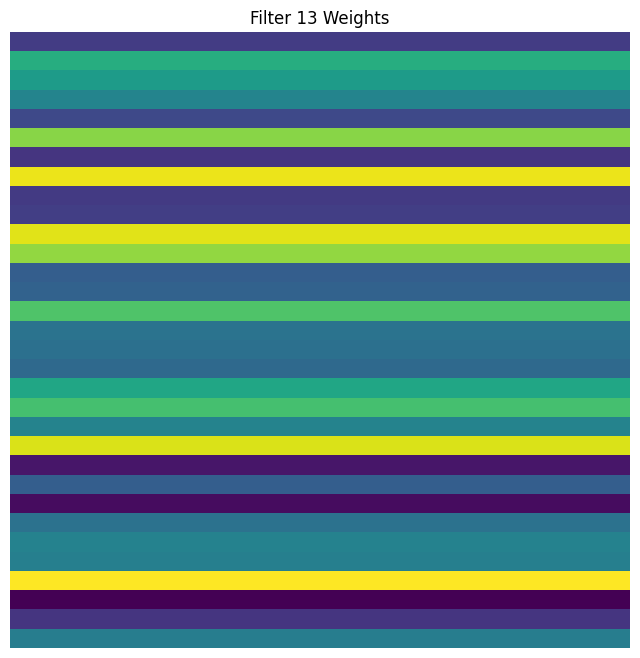

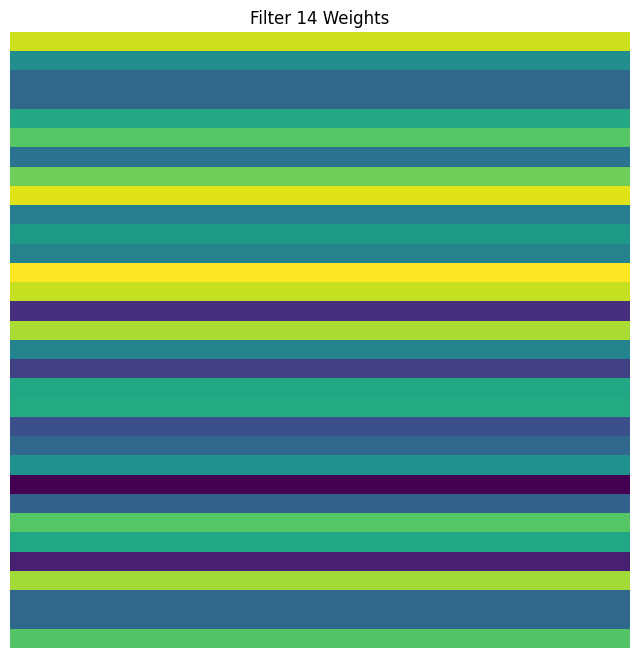

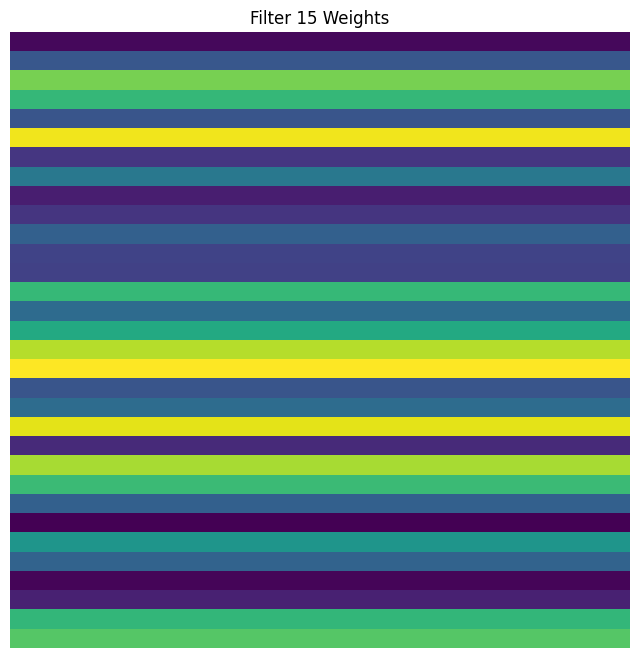

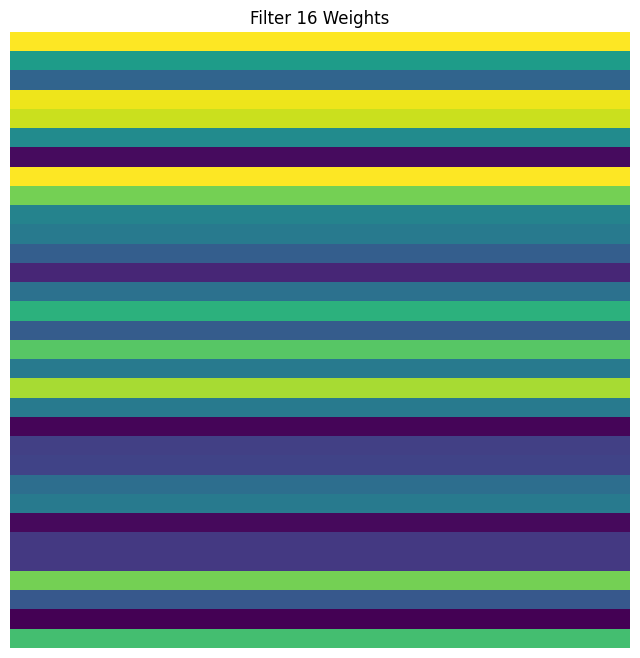

148/148 [==============================] - 0s 946us/step
F1 Score for Question 11: 0.7786529060293319

TRAIN QUESTION 12 MODEL
Index(['checkpoint_pct', 'cutscene_click_pct', 'map_click_pct',
       'map_hover_pct', 'navigate_click_pct', 'notification_click_pct',
       'object_click_pct', 'object_hover_pct', 'observation_click_pct',
       'person_click_pct', 'notebook_click_pct', 'elapsed_duration',
       'level_5_count', 'level_6_count', 'level_7_count', 'level_8_count',
       'level_9_count', 'level_10_count', 'level_11_count', 'level_12_count',
       'event_name_checkpoint_count', 'event_name_cutscene_click_count',
       'event_name_map_click_count', 'event_name_map_hover_count',
       'event_name_navigate_click_count',
       'event_name_notification_click_count', 'event_name_object_click_count',
       'event_name_object_hover_count', 'event_name_observation_click_count',
       'event_name_person_click_count', 'event_name_notebook_click_count',
       'name_basic_count', 'n

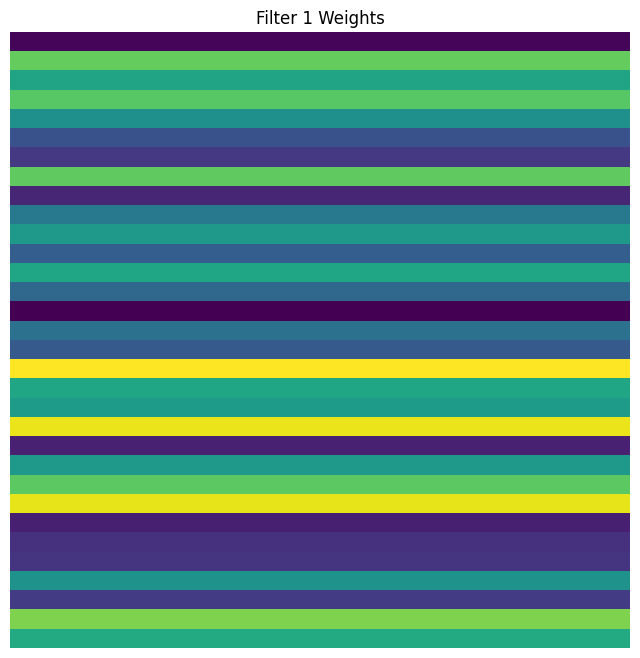

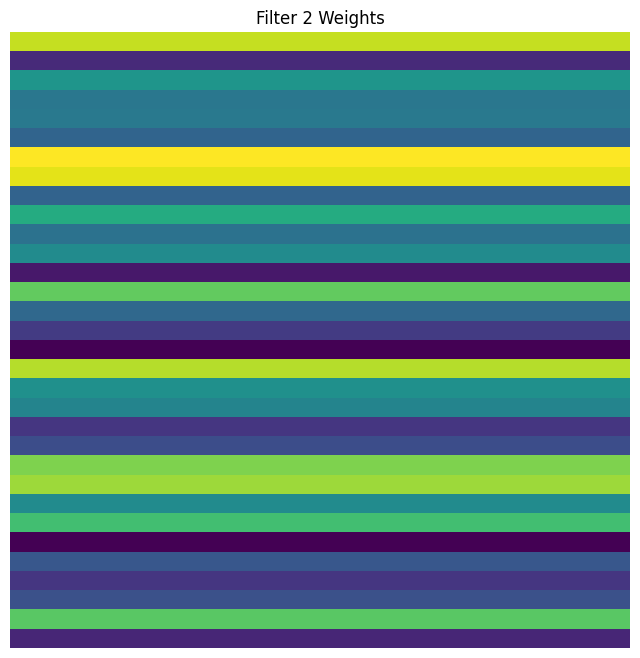

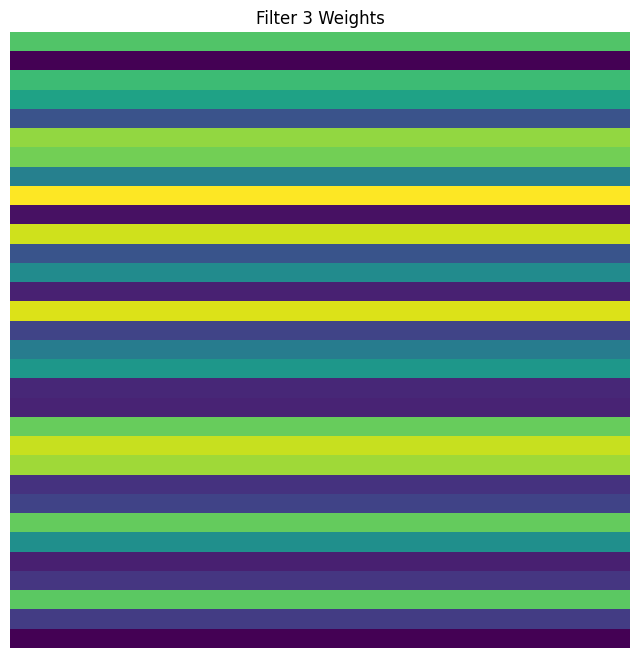

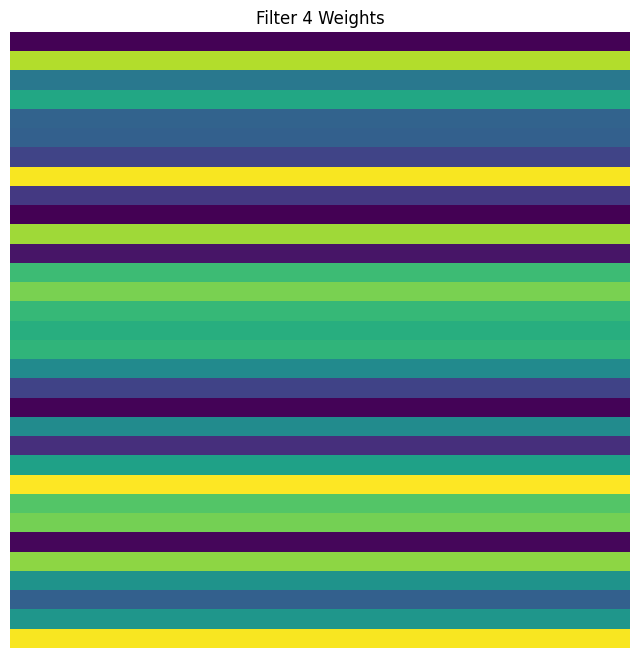

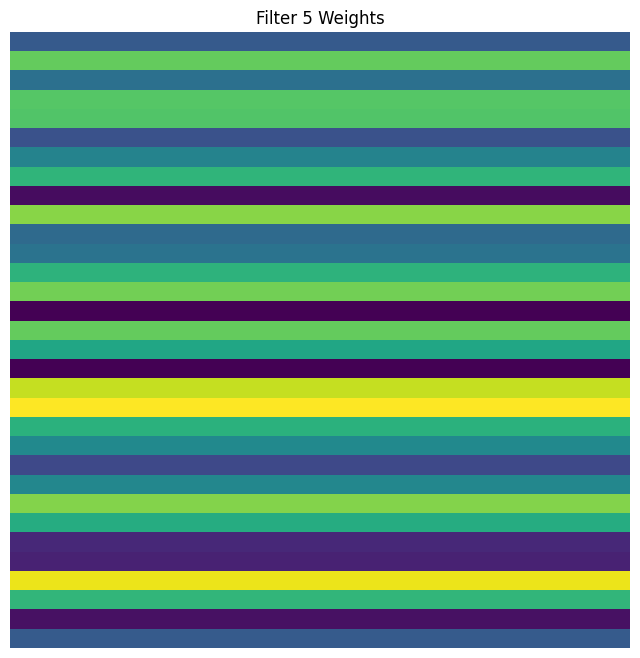

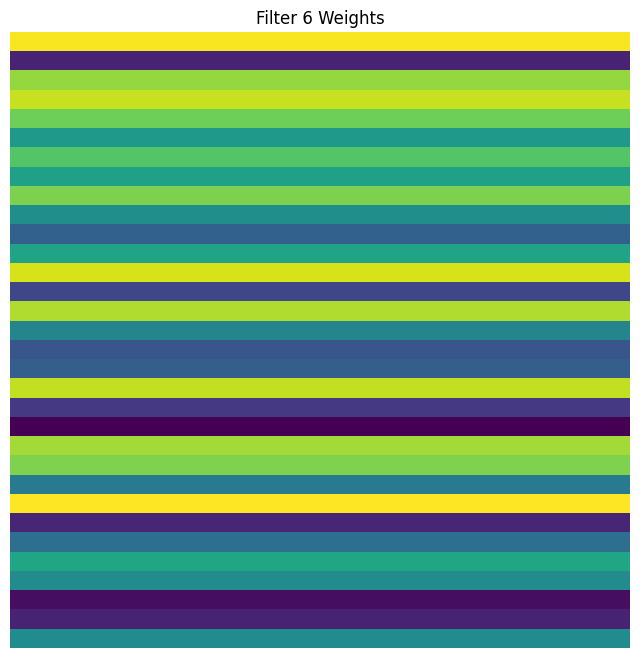

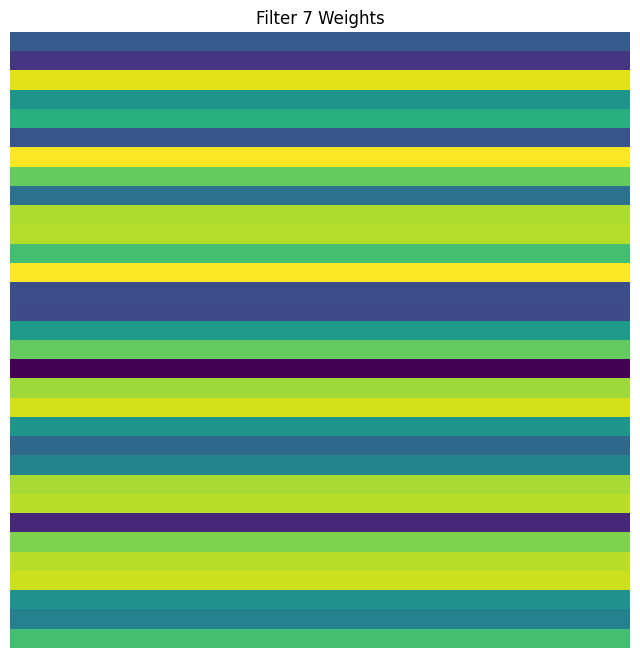

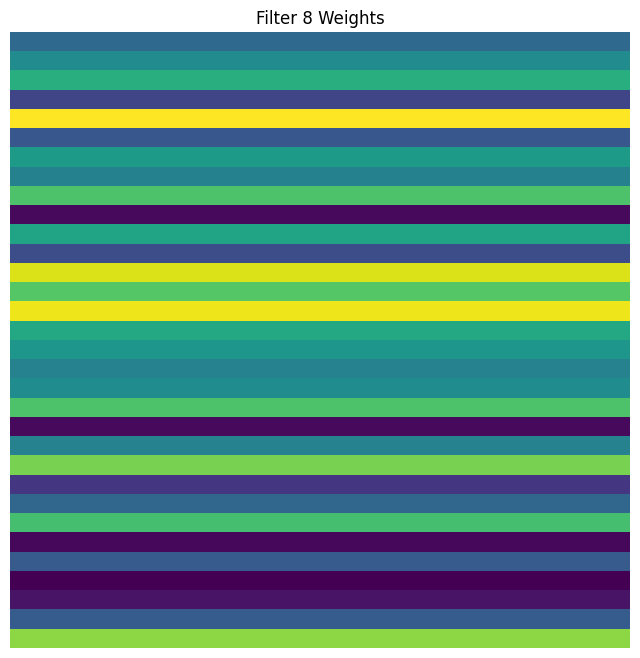

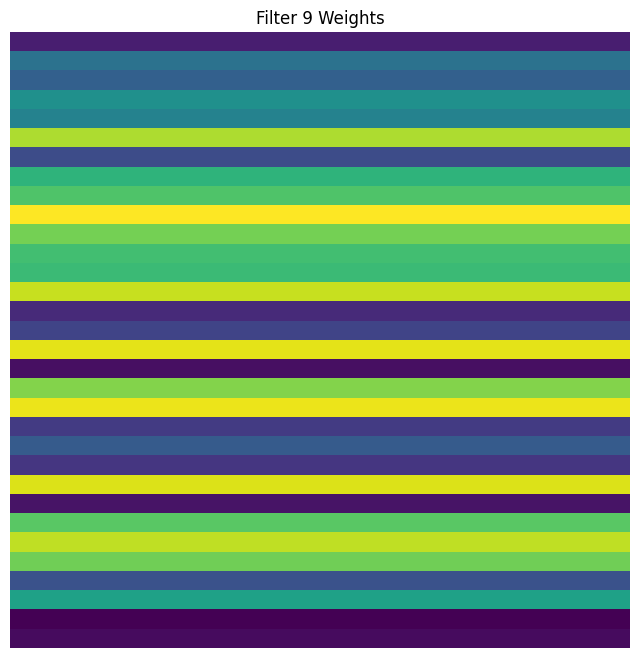

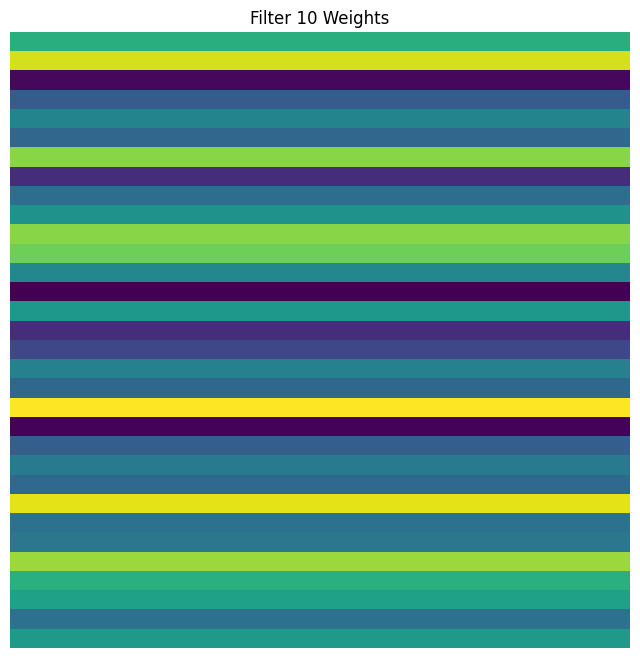

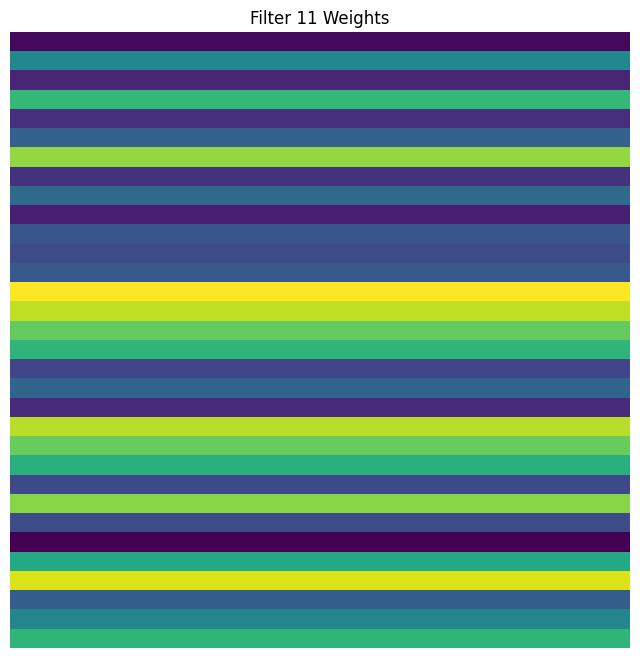

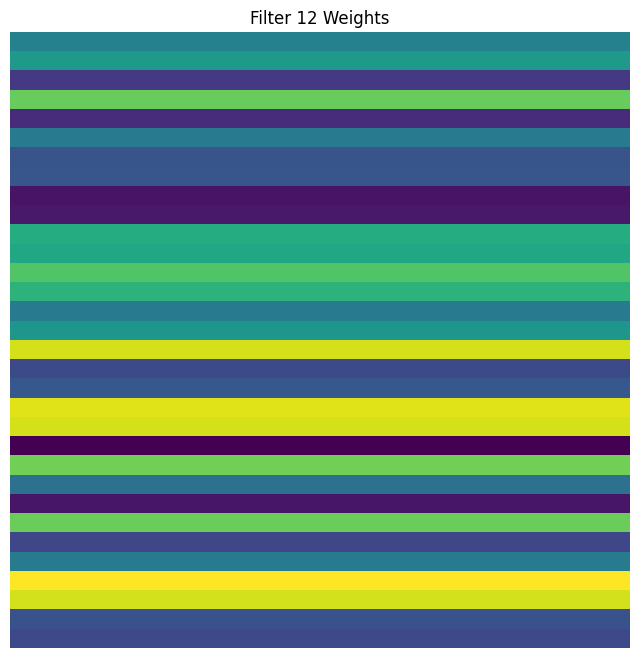

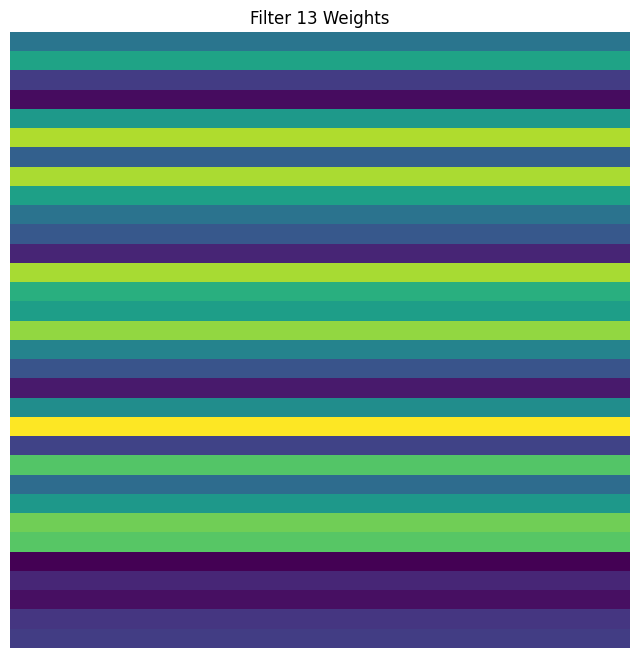

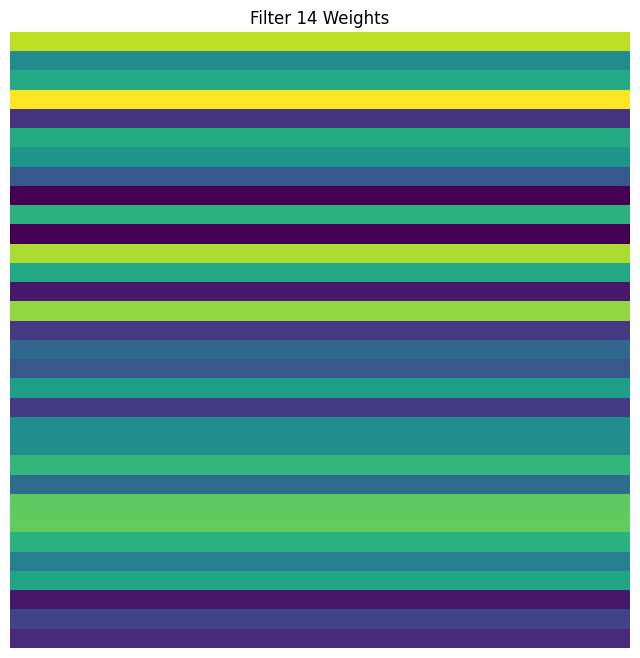

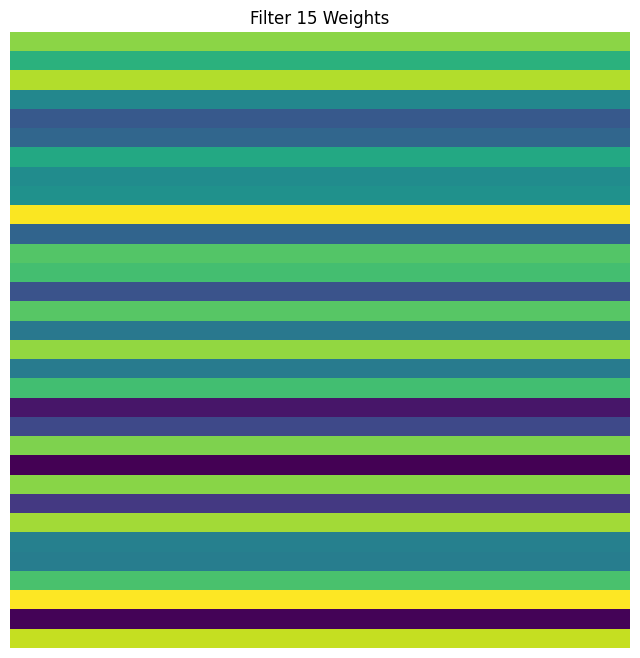

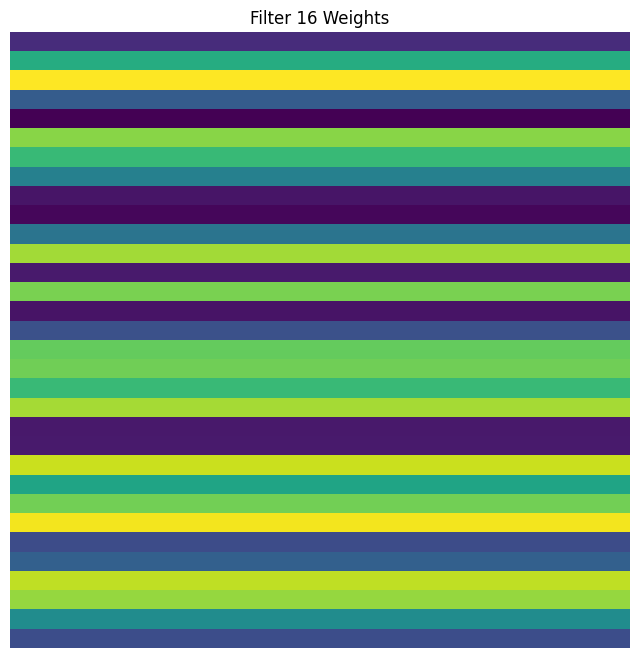

148/148 [==============================] - 0s 1ms/step
F1 Score for Question 12: 0.9271568404279535

TRAIN QUESTION 13 MODEL
Index(['checkpoint_pct', 'cutscene_click_pct', 'map_click_pct',
       'map_hover_pct', 'navigate_click_pct', 'notification_click_pct',
       'object_click_pct', 'object_hover_pct', 'observation_click_pct',
       'person_click_pct', 'notebook_click_pct', 'elapsed_duration',
       'level_5_count', 'level_6_count', 'level_7_count', 'level_8_count',
       'level_9_count', 'level_10_count', 'level_11_count', 'level_12_count',
       'event_name_checkpoint_count', 'event_name_cutscene_click_count',
       'event_name_map_click_count', 'event_name_map_hover_count',
       'event_name_navigate_click_count',
       'event_name_notification_click_count', 'event_name_object_click_count',
       'event_name_object_hover_count', 'event_name_observation_click_count',
       'event_name_person_click_count', 'event_name_notebook_click_count',
       'name_basic_count', 'nam

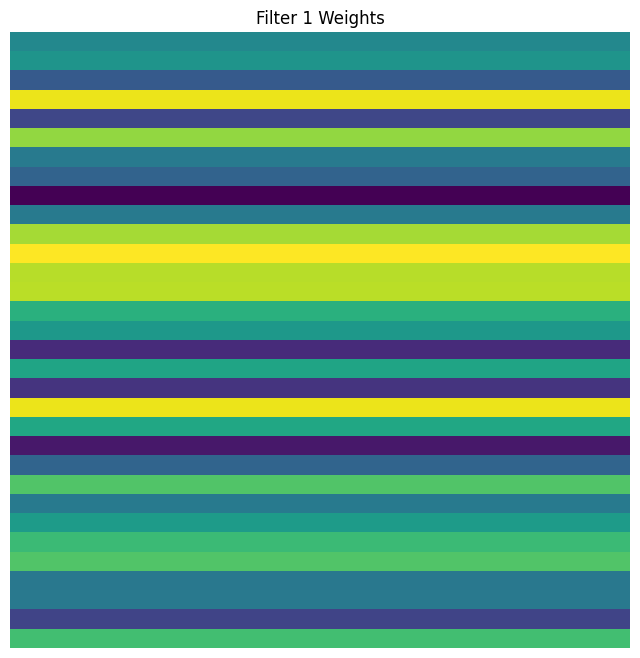

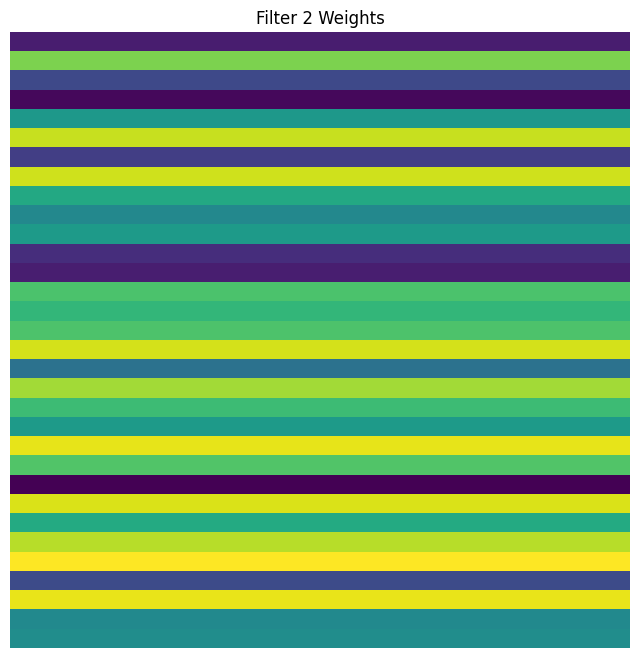

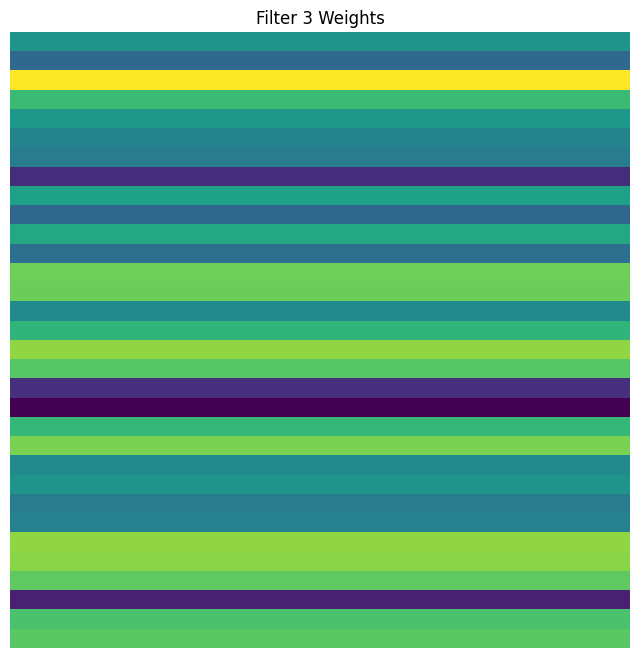

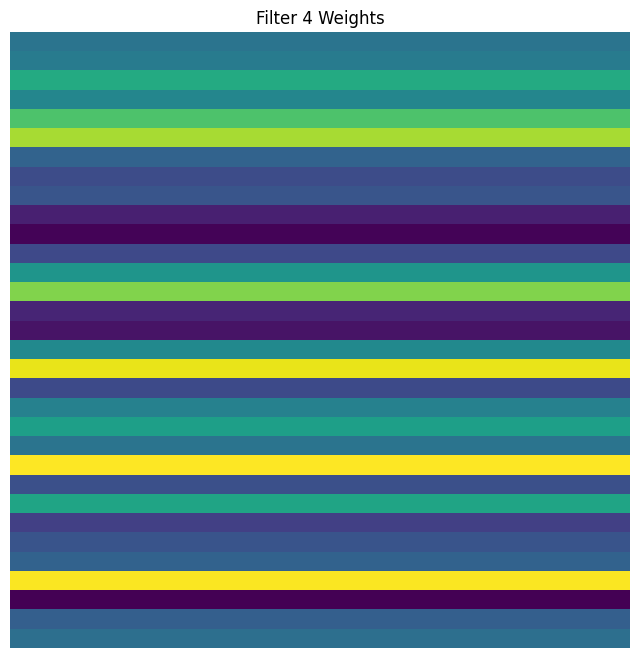

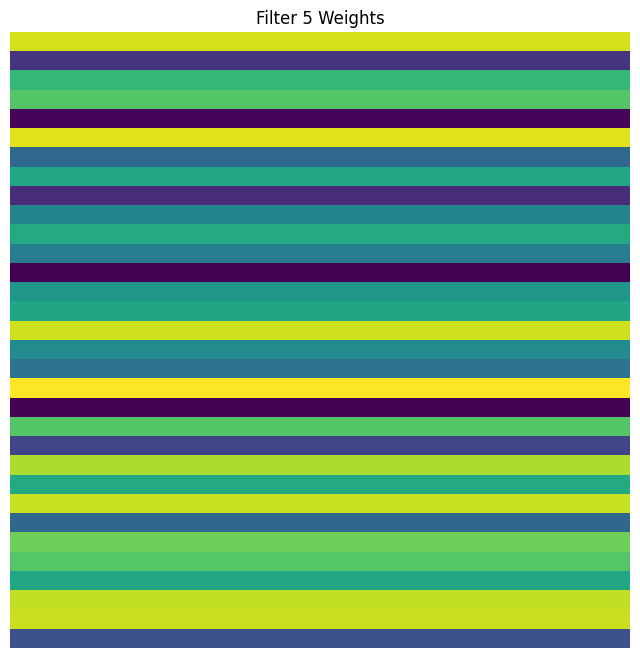

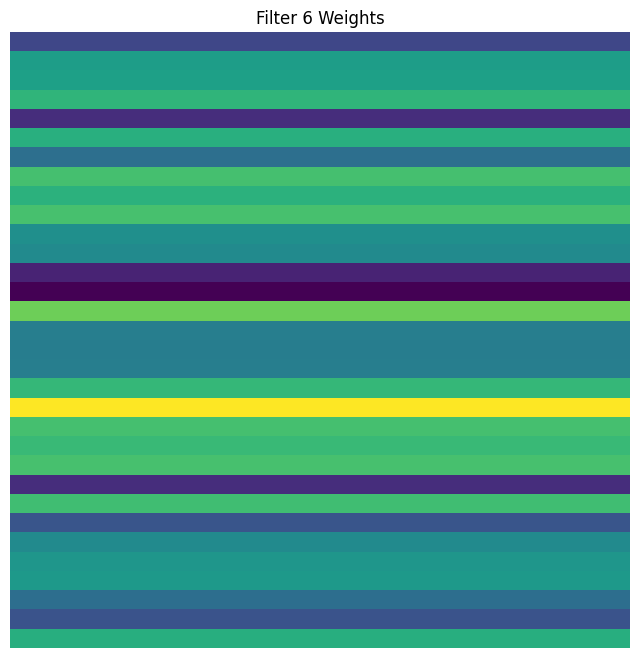

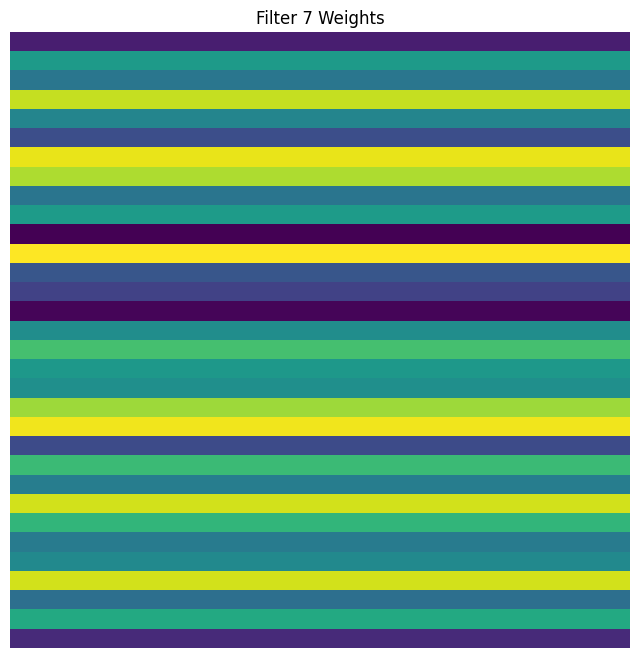

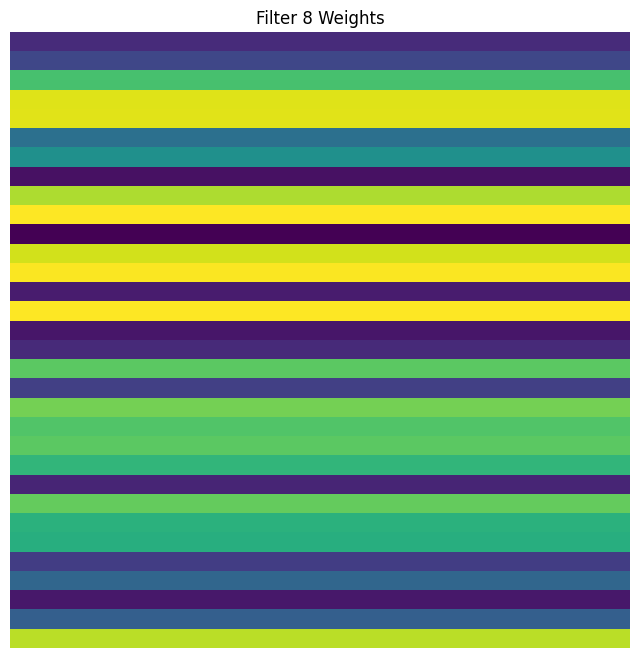

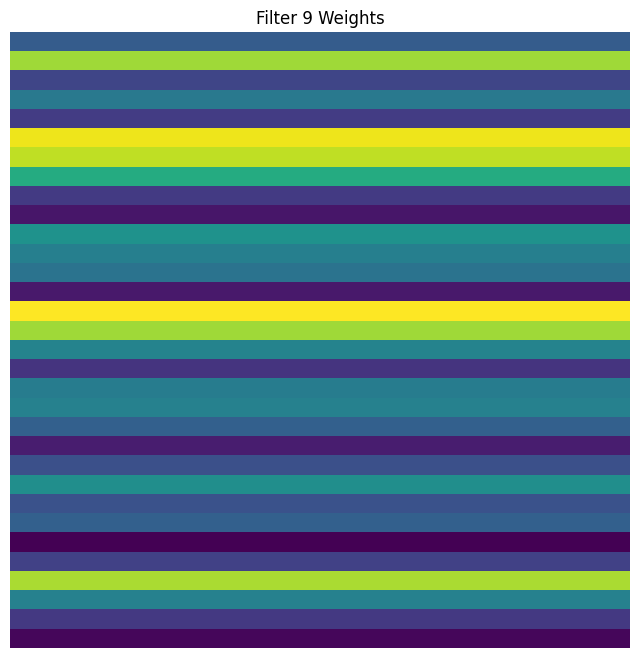

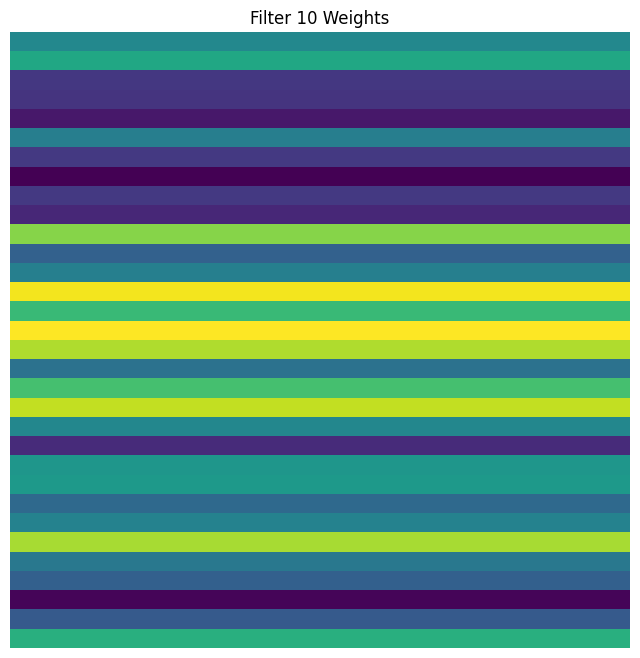

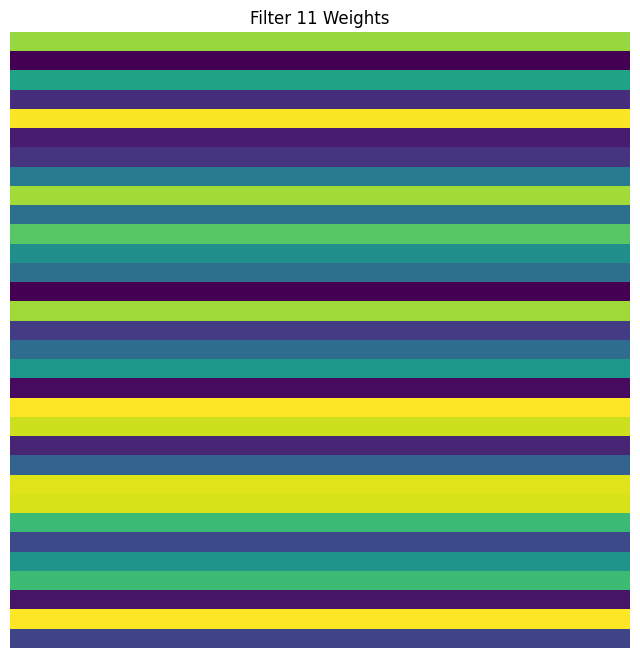

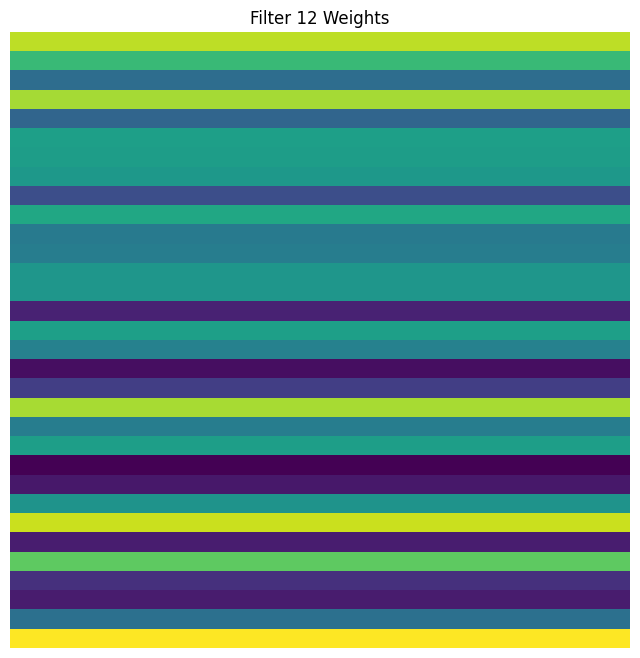

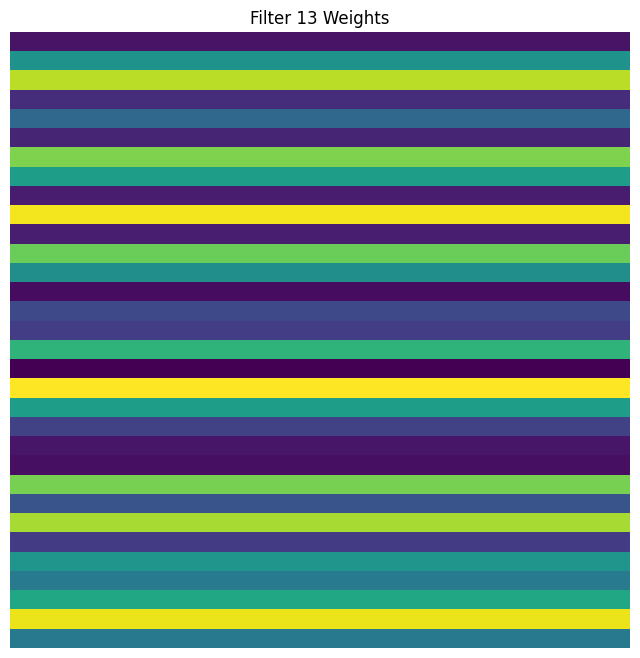

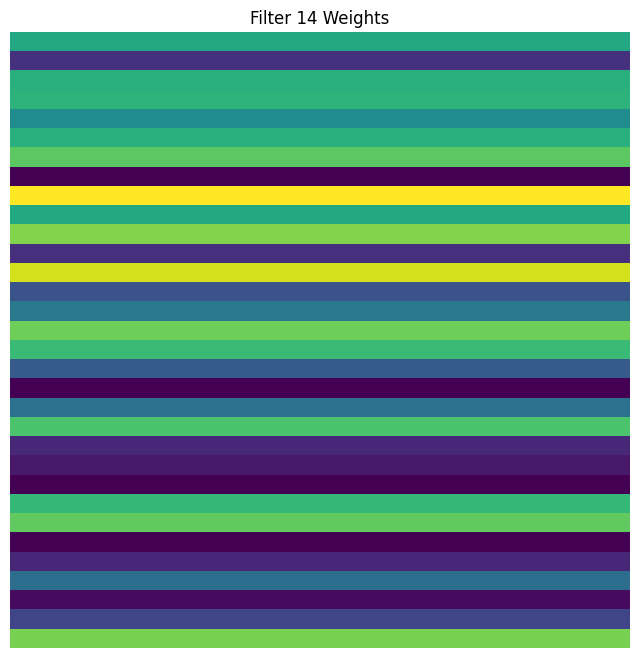

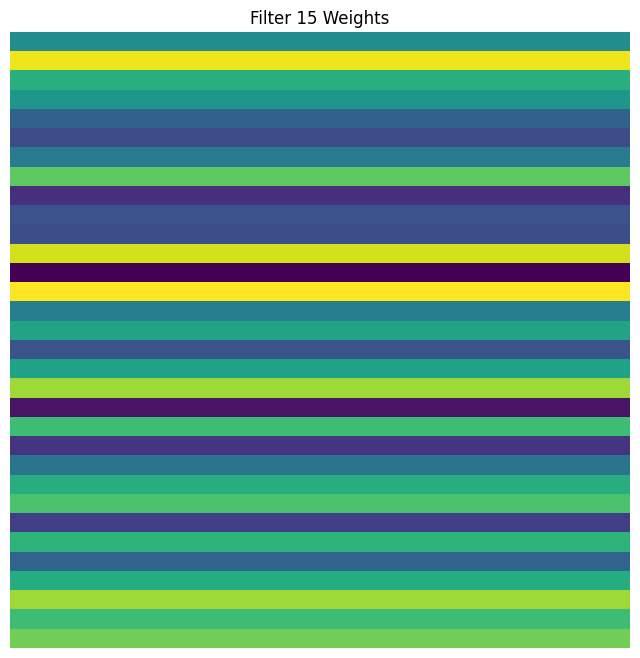

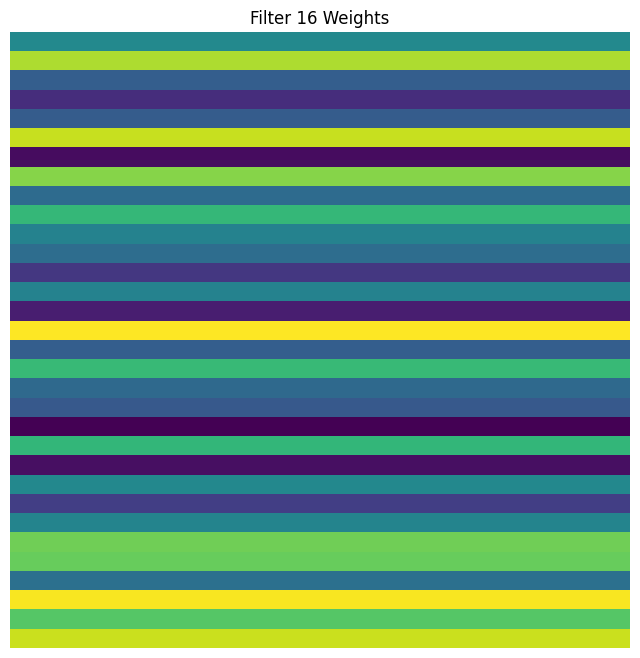

148/148 [==============================] - 0s 955us/step
F1 Score for Question 13: 0.0

TRAIN QUESTION 14 MODEL
Index(['checkpoint_pct', 'cutscene_click_pct', 'map_click_pct',
       'map_hover_pct', 'navigate_click_pct', 'notification_click_pct',
       'object_click_pct', 'object_hover_pct', 'observation_click_pct',
       'person_click_pct', 'notebook_click_pct', 'elapsed_duration',
       'level_13_count', 'level_14_count', 'level_15_count', 'level_16_count',
       'level_17_count', 'level_18_count', 'level_19_count', 'level_20_count',
       'level_21_count', 'level_22_count', 'event_name_checkpoint_count',
       'event_name_cutscene_click_count', 'event_name_map_click_count',
       'event_name_map_hover_count', 'event_name_navigate_click_count',
       'event_name_notification_click_count', 'event_name_object_click_count',
       'event_name_object_hover_count', 'event_name_observation_click_count',
       'event_name_person_click_count', 'event_name_notebook_click_count',
   

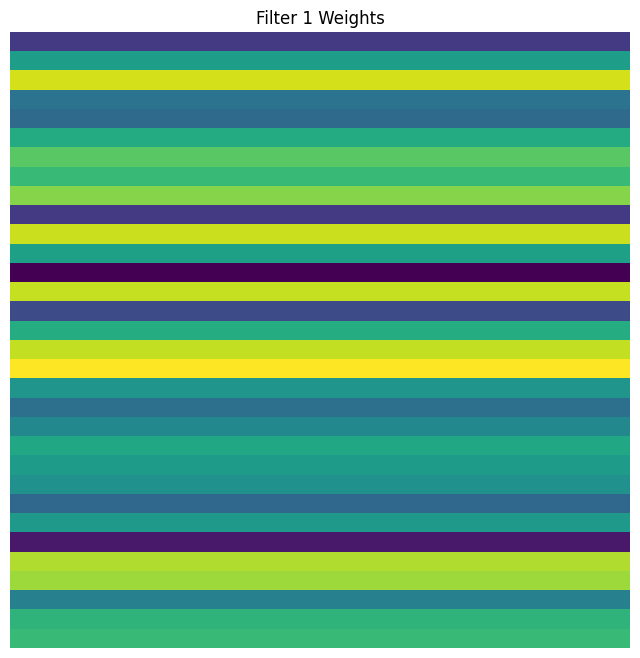

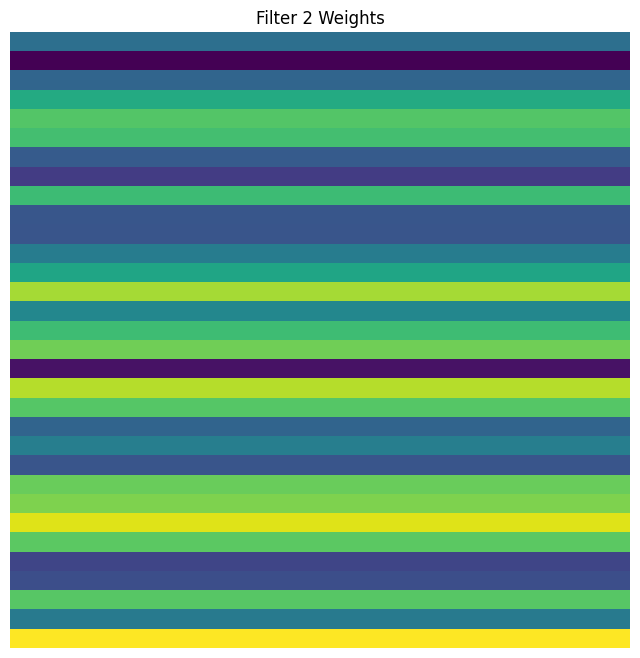

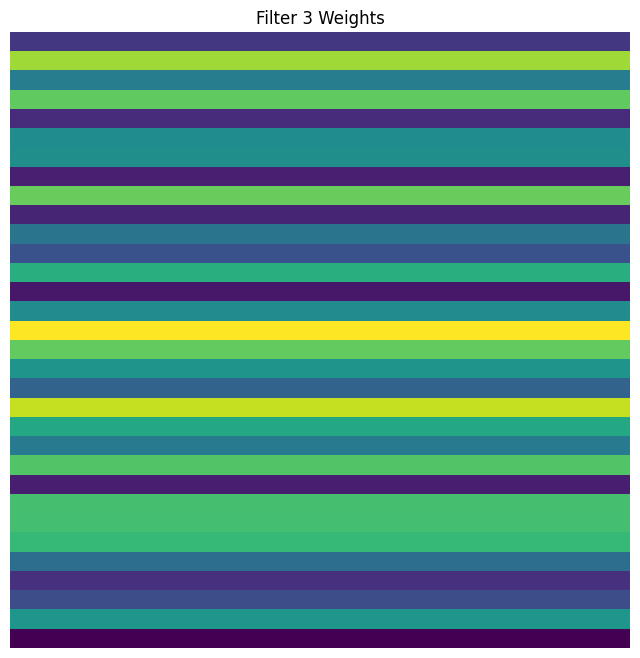

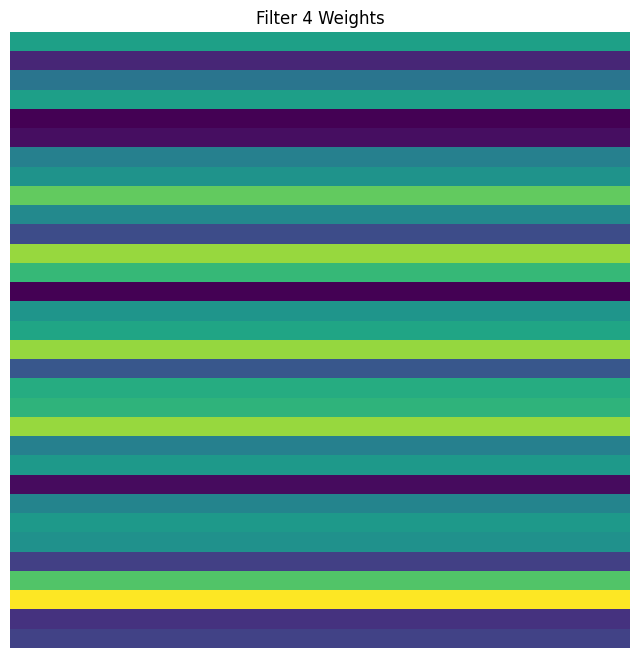

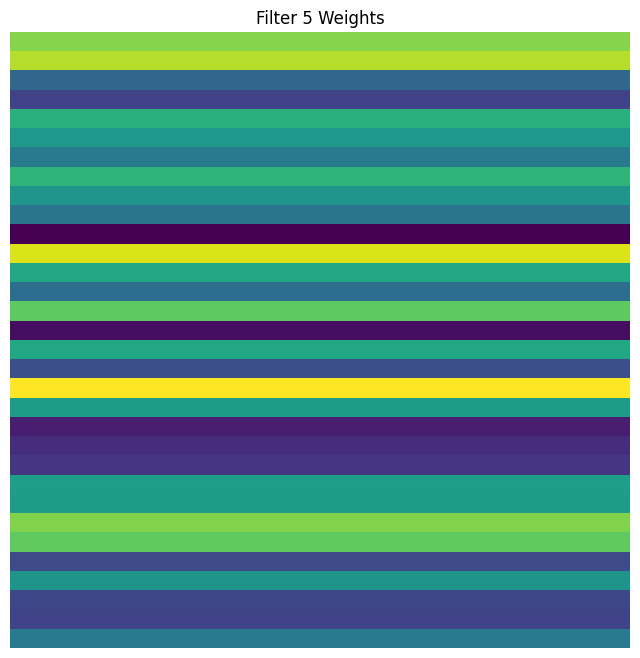

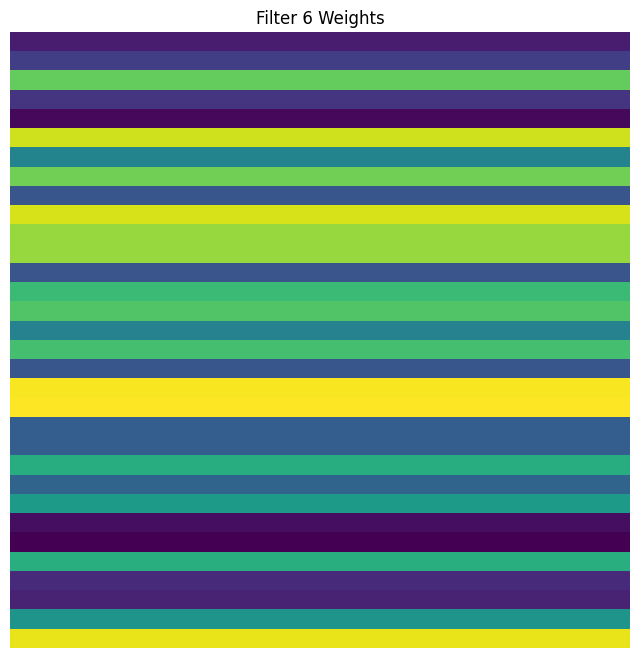

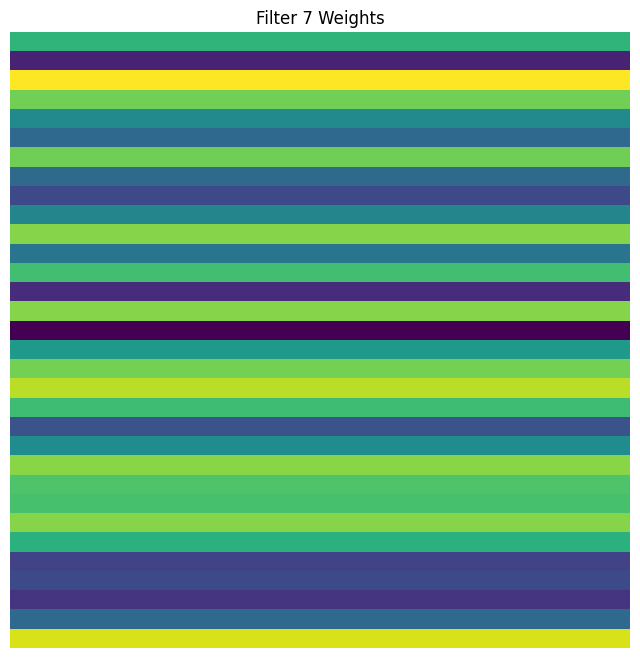

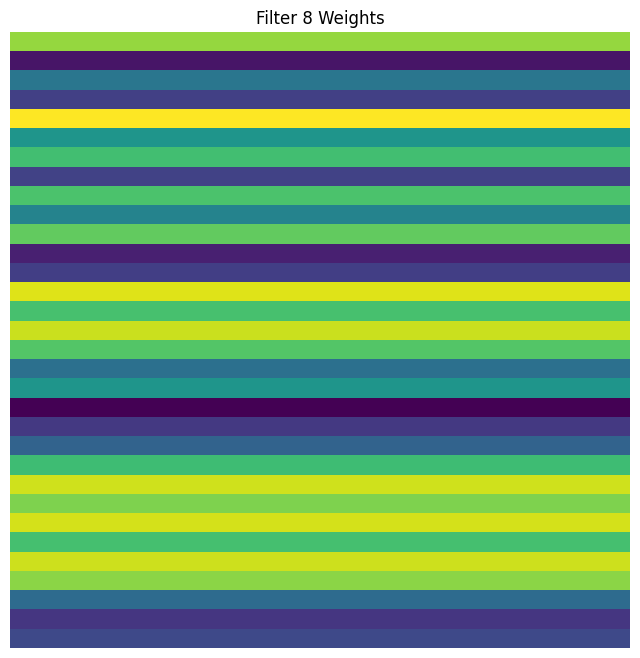

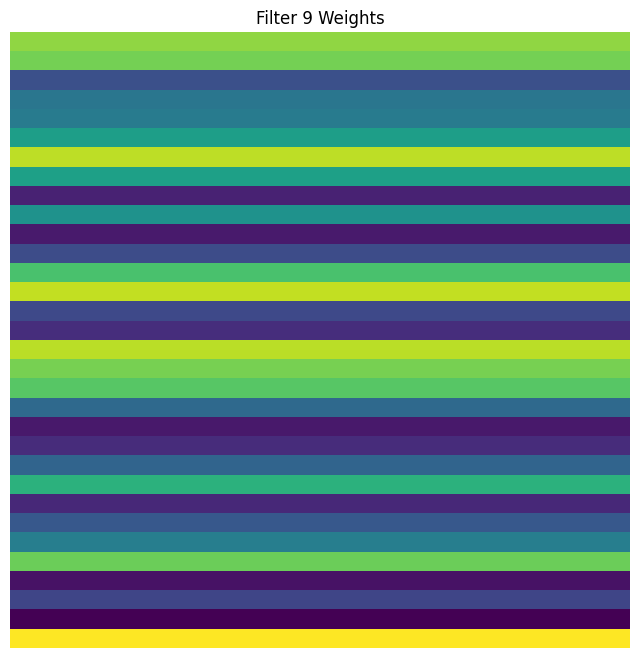

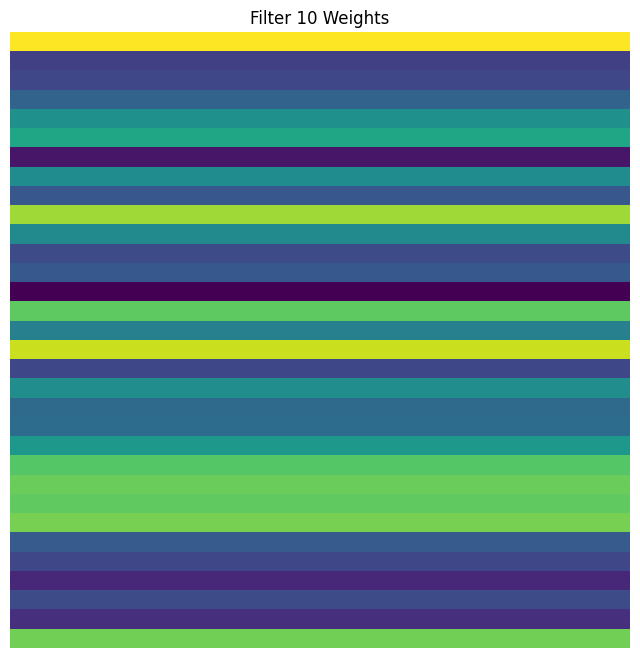

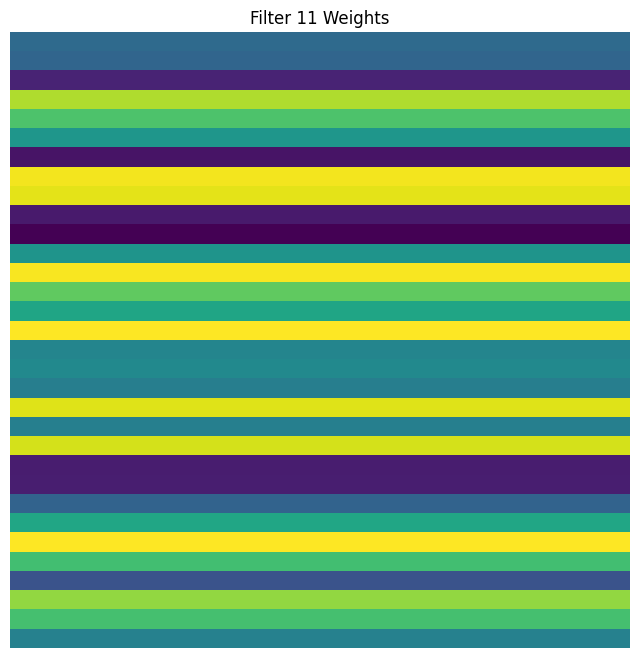

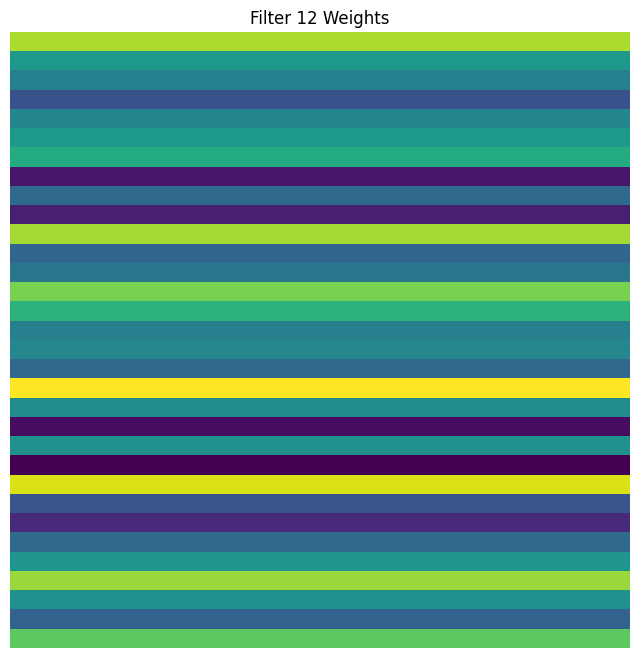

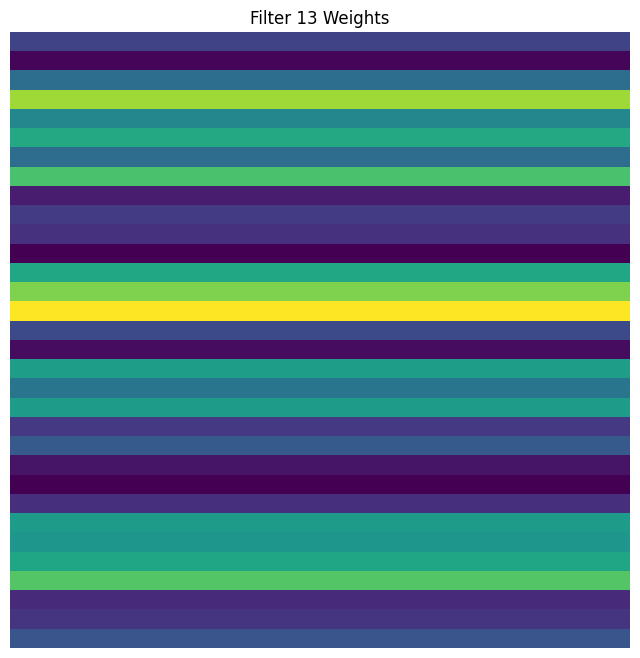

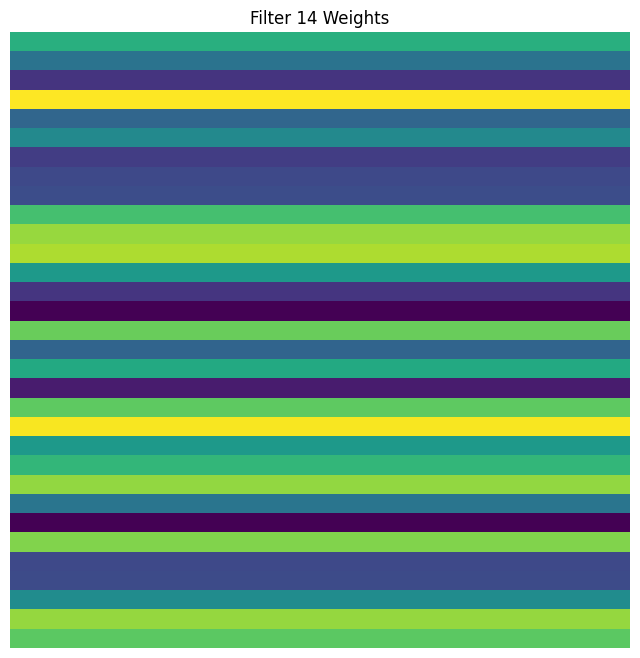

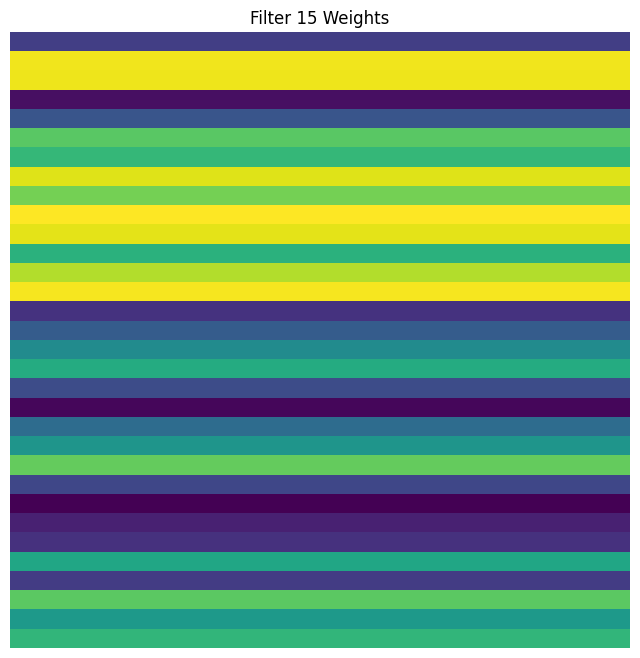

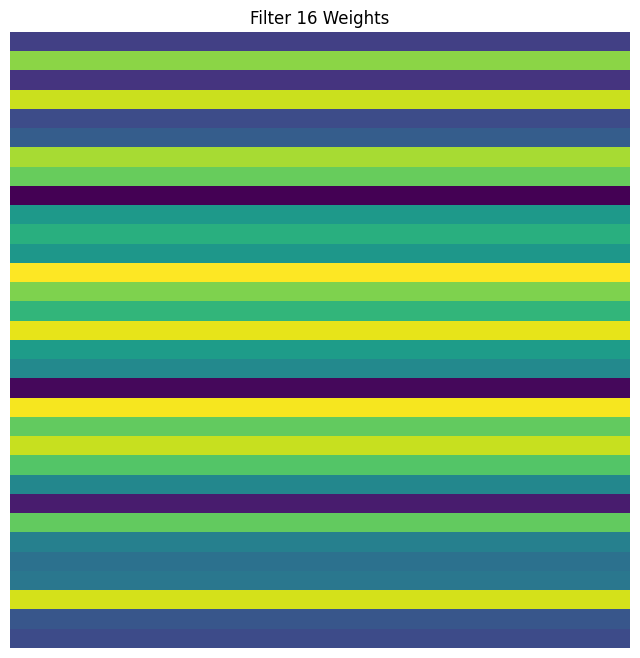

148/148 [==============================] - 0s 1ms/step
F1 Score for Question 14: 0.8337992376111817

TRAIN QUESTION 15 MODEL
Index(['checkpoint_pct', 'cutscene_click_pct', 'map_click_pct',
       'map_hover_pct', 'navigate_click_pct', 'notification_click_pct',
       'object_click_pct', 'object_hover_pct', 'observation_click_pct',
       'person_click_pct', 'notebook_click_pct', 'elapsed_duration',
       'level_13_count', 'level_14_count', 'level_15_count', 'level_16_count',
       'level_17_count', 'level_18_count', 'level_19_count', 'level_20_count',
       'level_21_count', 'level_22_count', 'event_name_checkpoint_count',
       'event_name_cutscene_click_count', 'event_name_map_click_count',
       'event_name_map_hover_count', 'event_name_navigate_click_count',
       'event_name_notification_click_count', 'event_name_object_click_count',
       'event_name_object_hover_count', 'event_name_observation_click_count',
       'event_name_person_click_count', 'event_name_notebook_clic

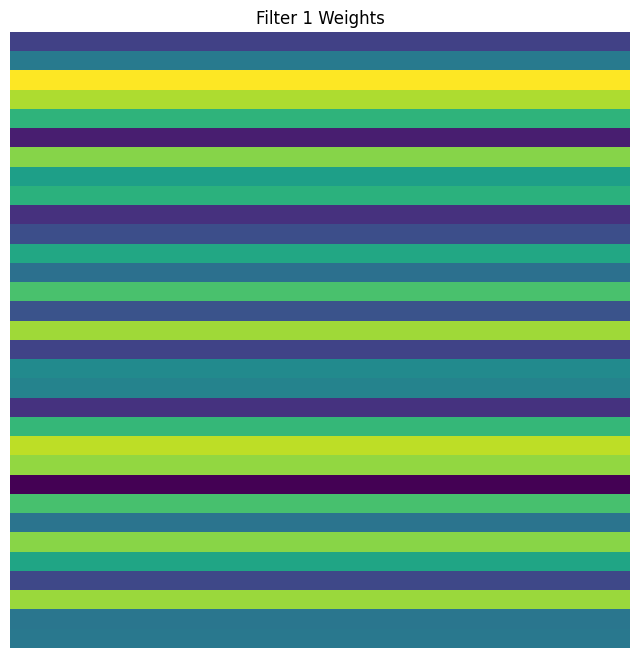

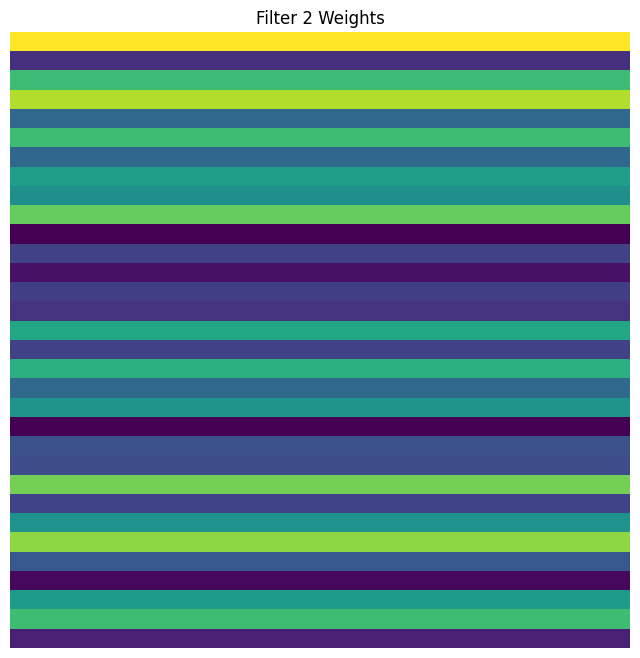

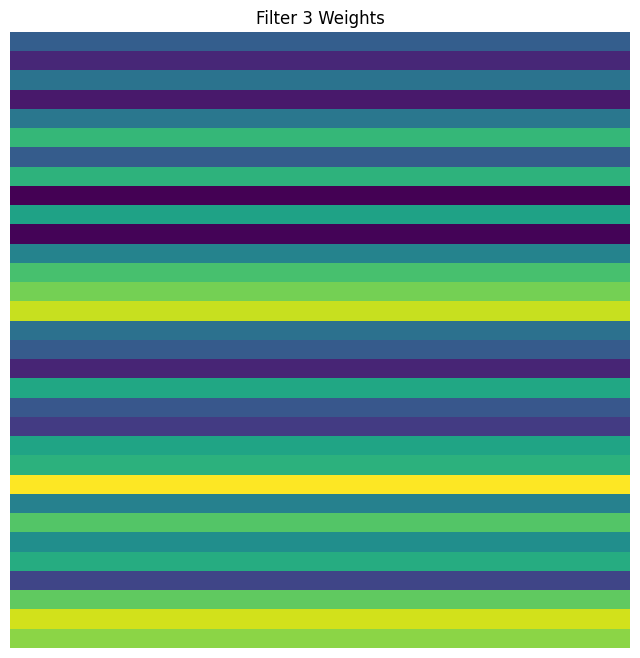

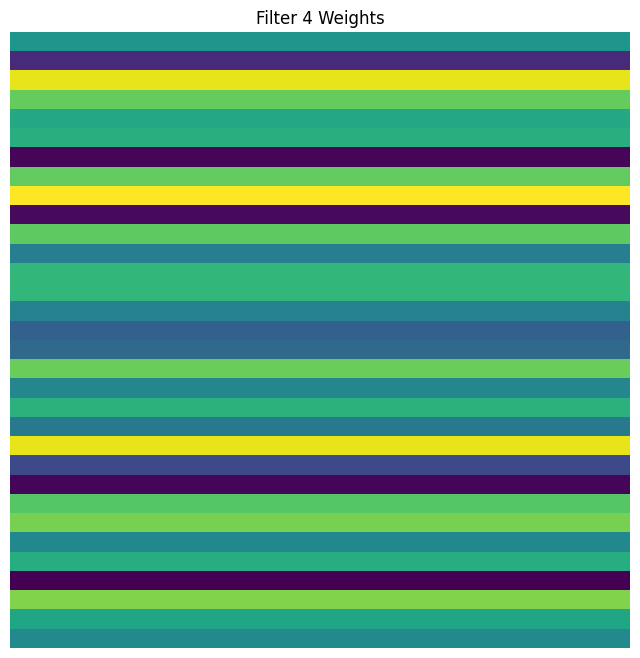

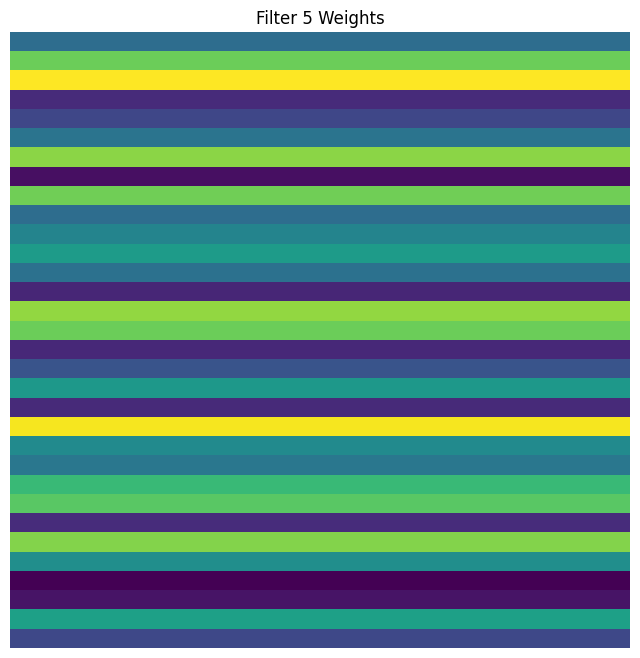

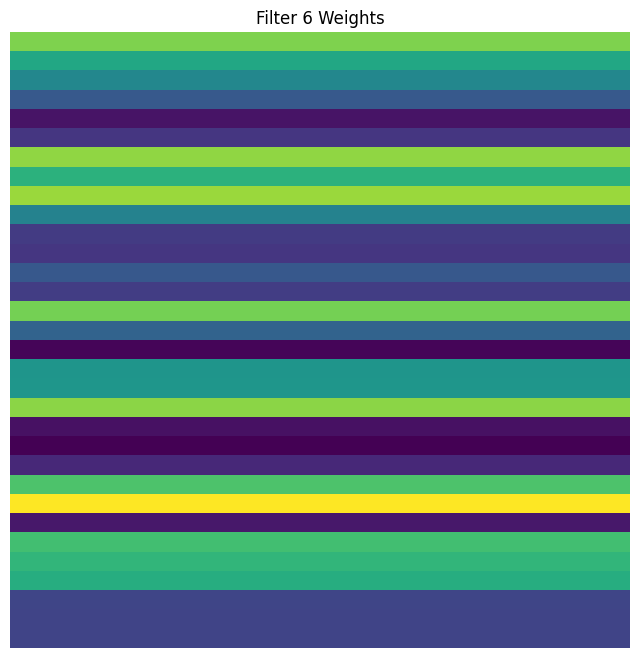

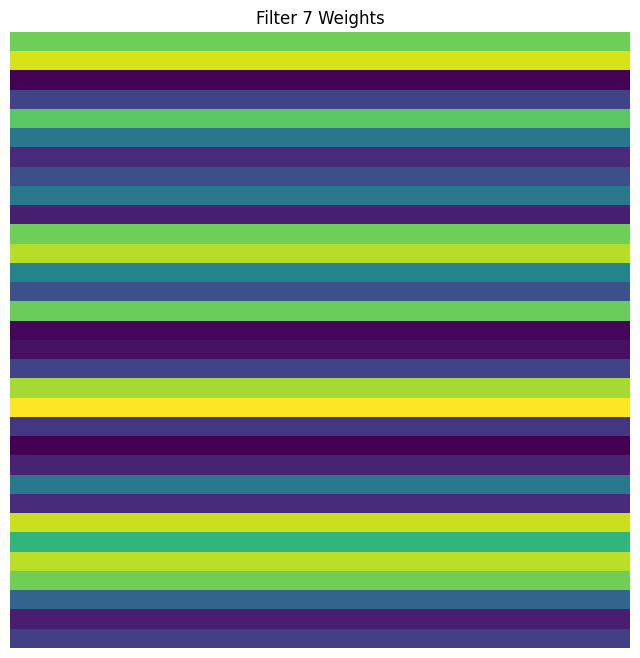

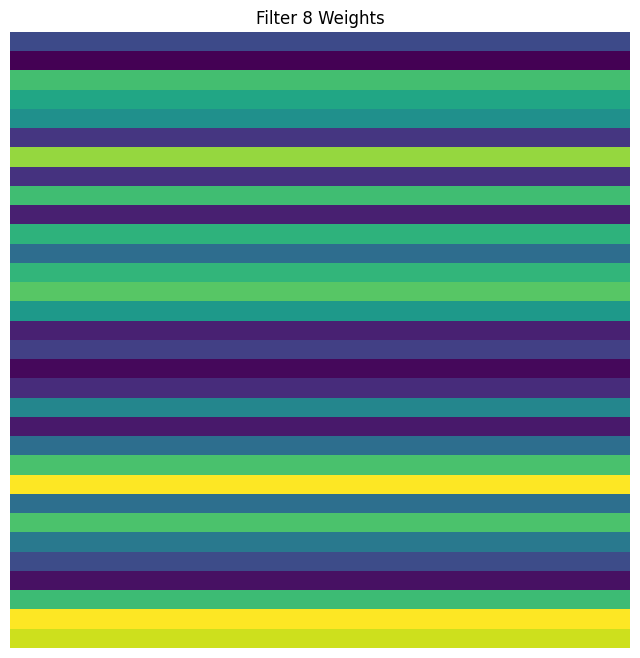

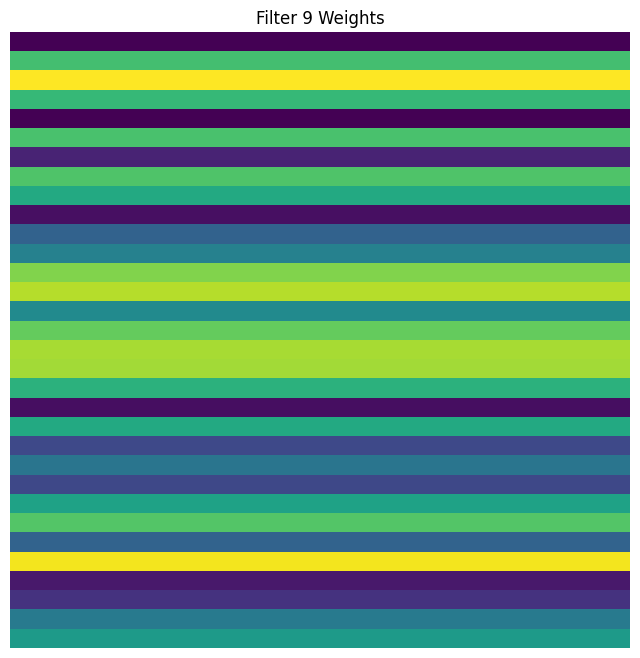

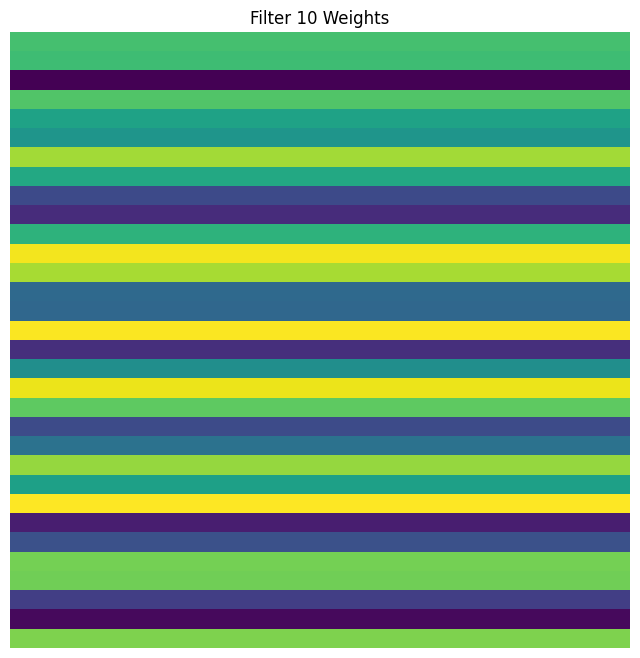

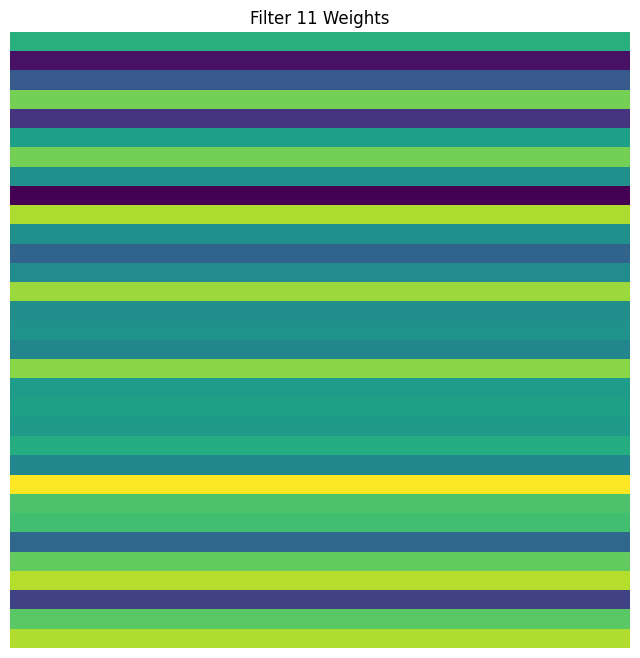

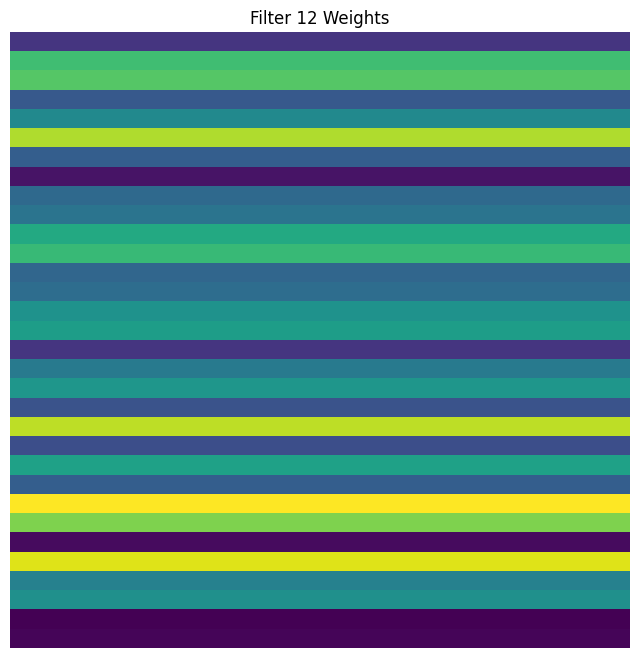

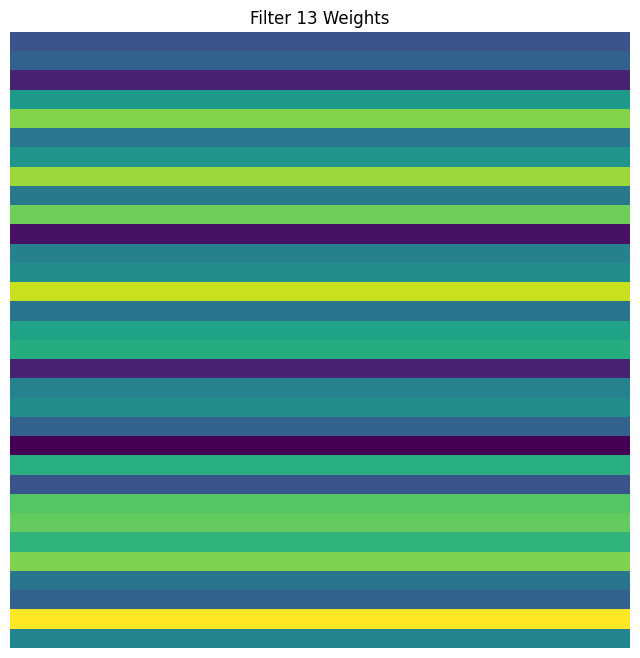

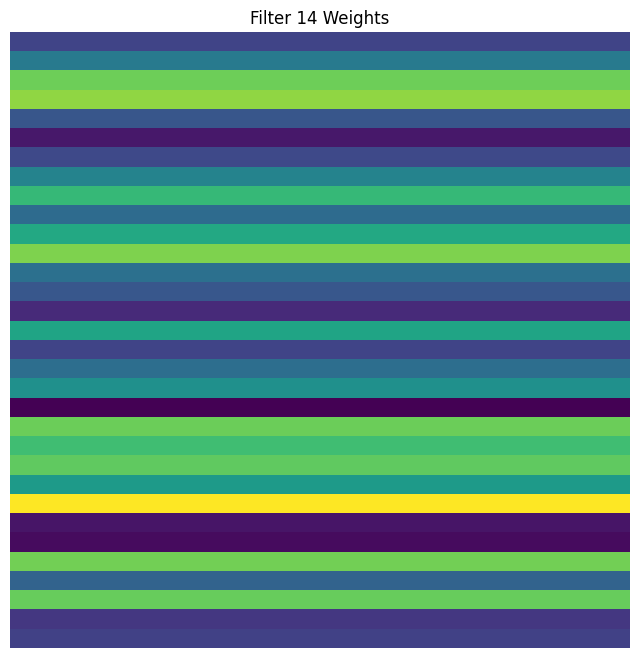

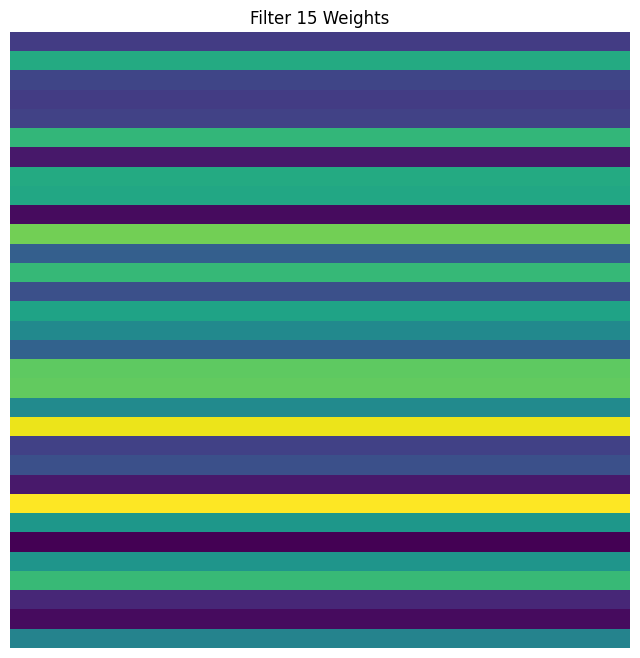

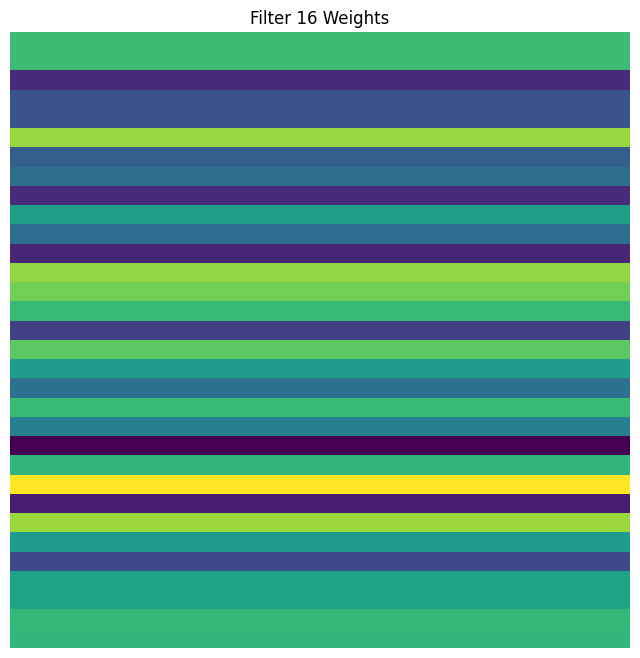

148/148 [==============================] - 0s 921us/step
F1 Score for Question 15: 0.4625661007514612

TRAIN QUESTION 16 MODEL
Index(['checkpoint_pct', 'cutscene_click_pct', 'map_click_pct',
       'map_hover_pct', 'navigate_click_pct', 'notification_click_pct',
       'object_click_pct', 'object_hover_pct', 'observation_click_pct',
       'person_click_pct', 'notebook_click_pct', 'elapsed_duration',
       'level_13_count', 'level_14_count', 'level_15_count', 'level_16_count',
       'level_17_count', 'level_18_count', 'level_19_count', 'level_20_count',
       'level_21_count', 'level_22_count', 'event_name_checkpoint_count',
       'event_name_cutscene_click_count', 'event_name_map_click_count',
       'event_name_map_hover_count', 'event_name_navigate_click_count',
       'event_name_notification_click_count', 'event_name_object_click_count',
       'event_name_object_hover_count', 'event_name_observation_click_count',
       'event_name_person_click_count', 'event_name_notebook_cl

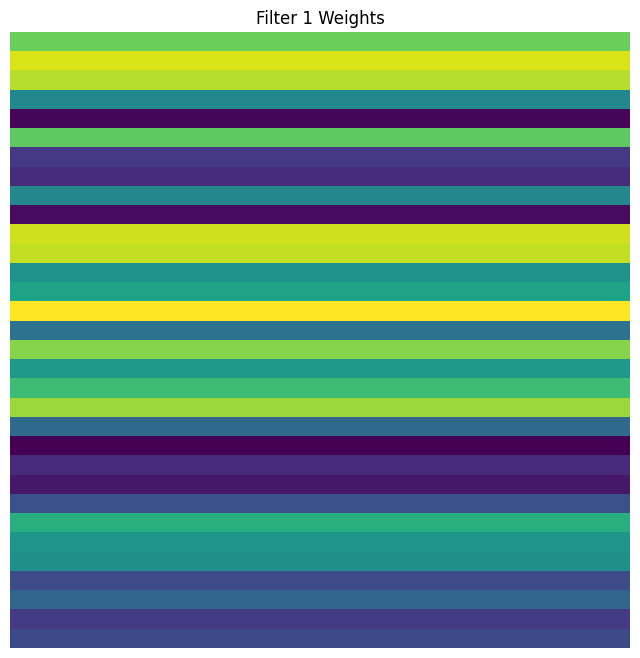

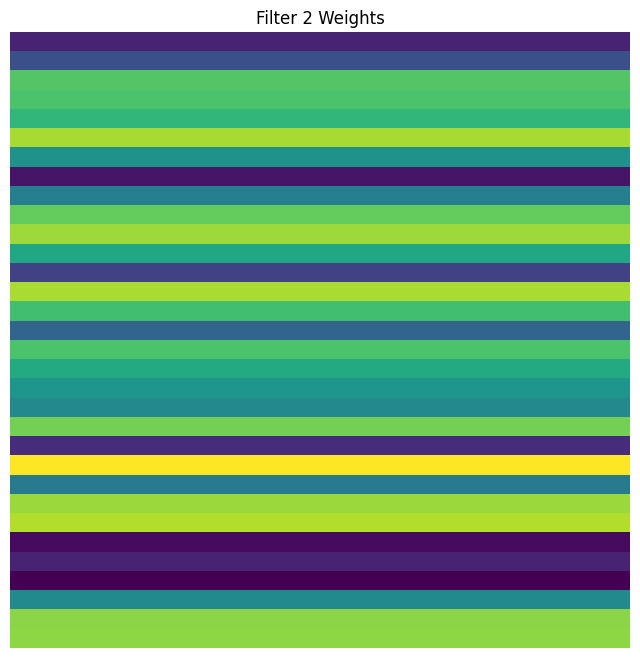

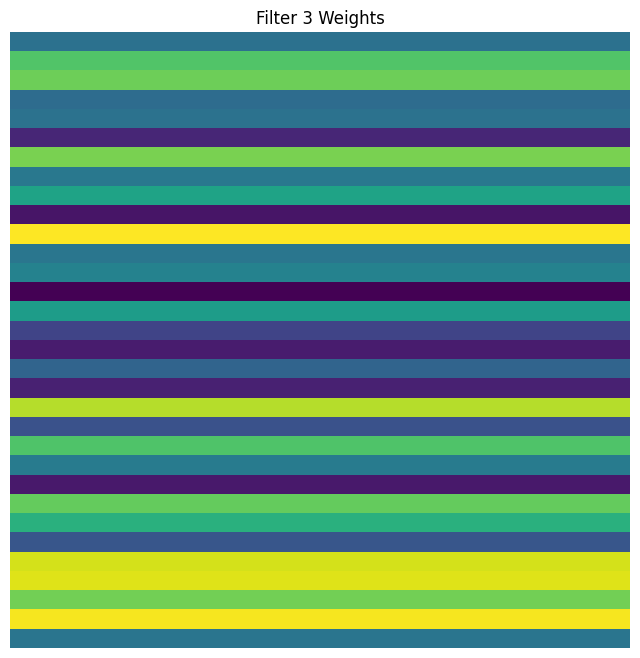

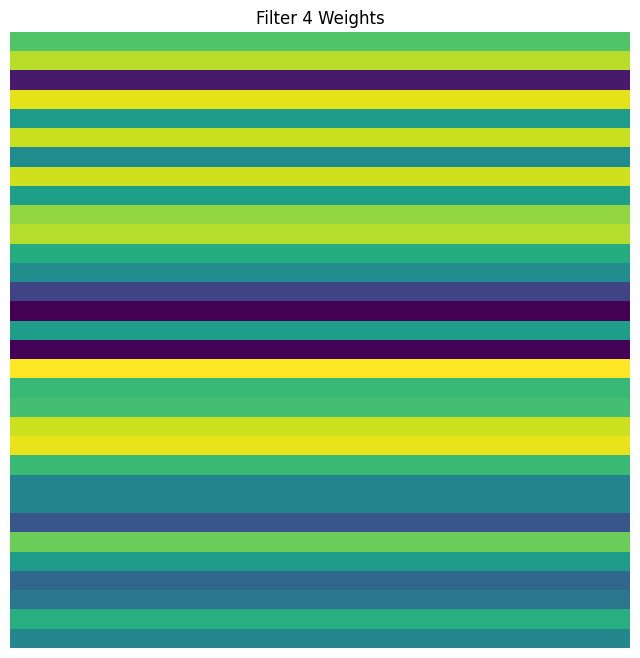

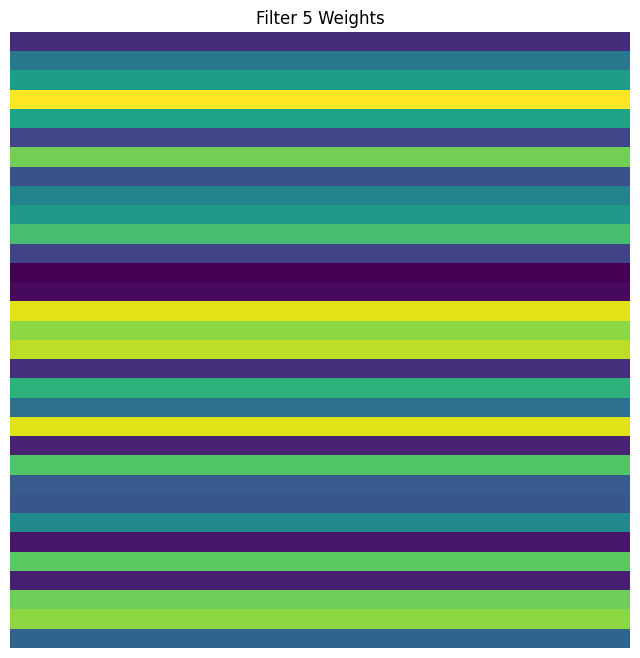

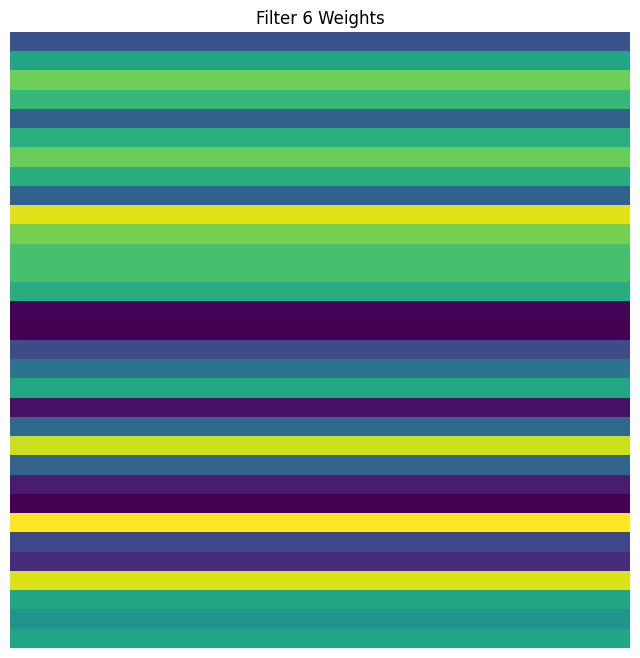

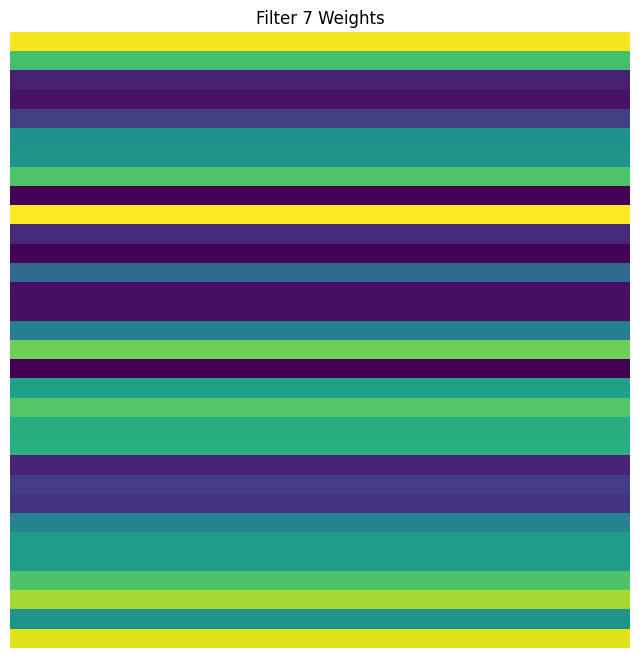

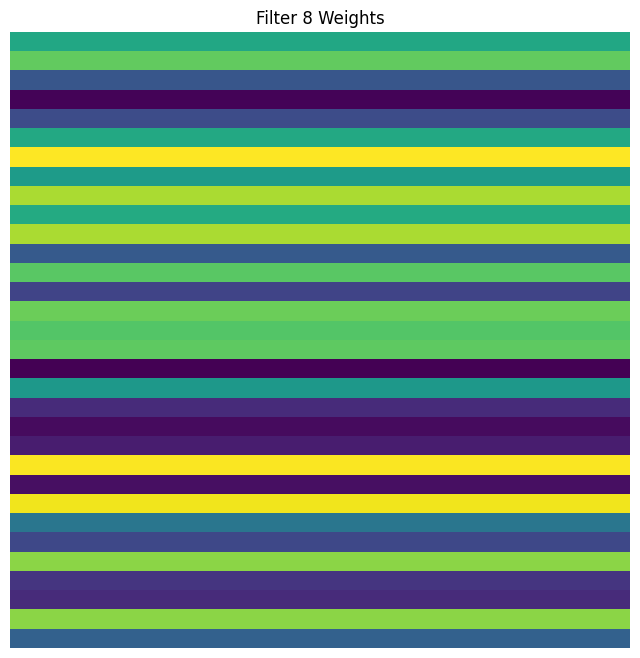

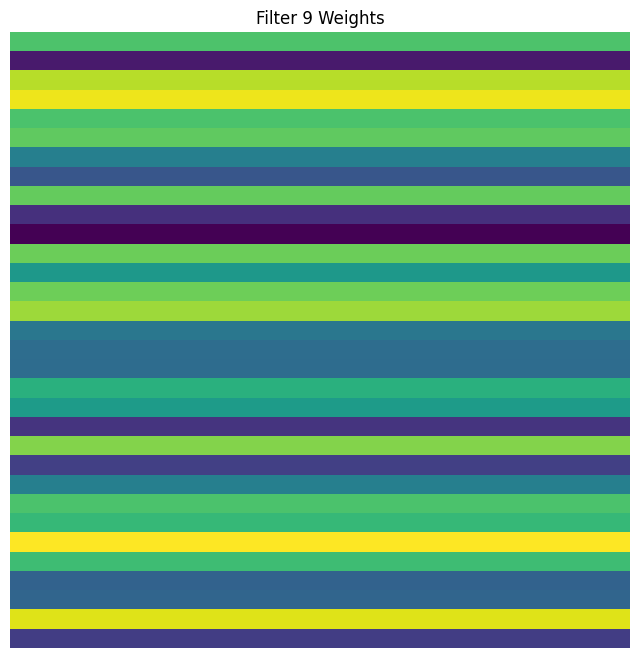

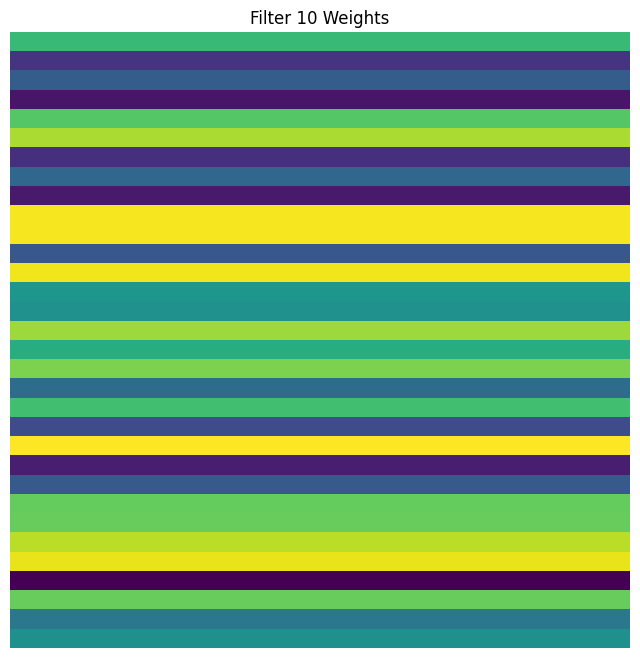

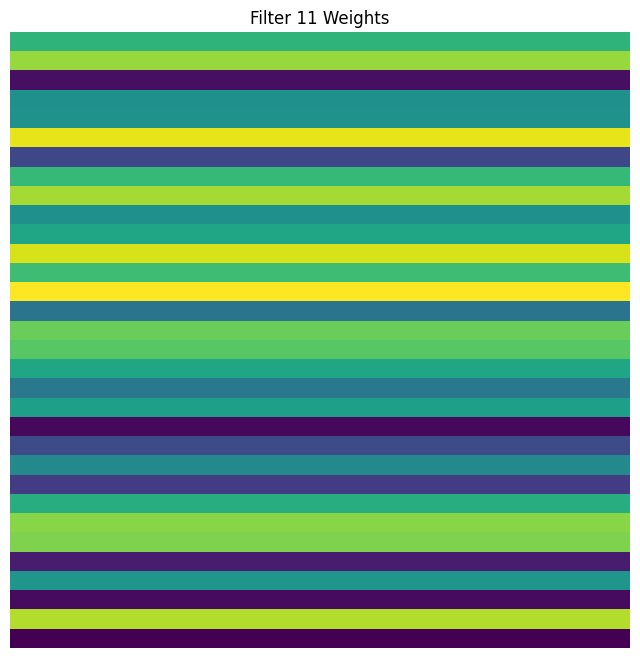

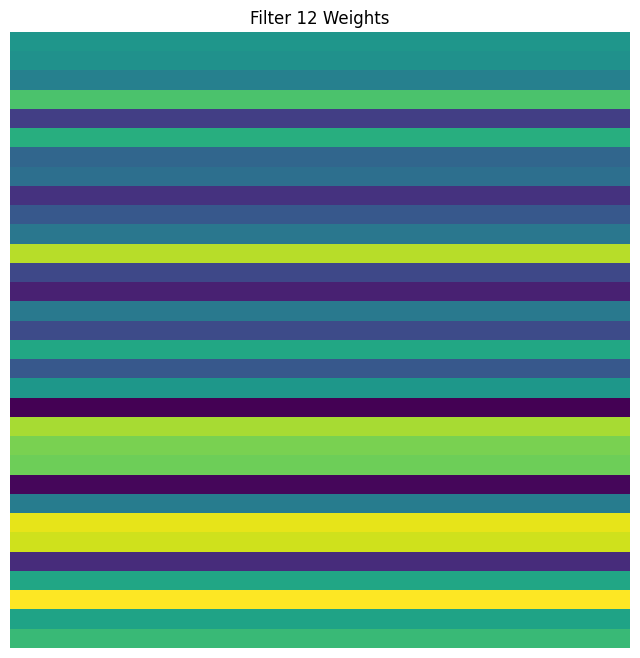

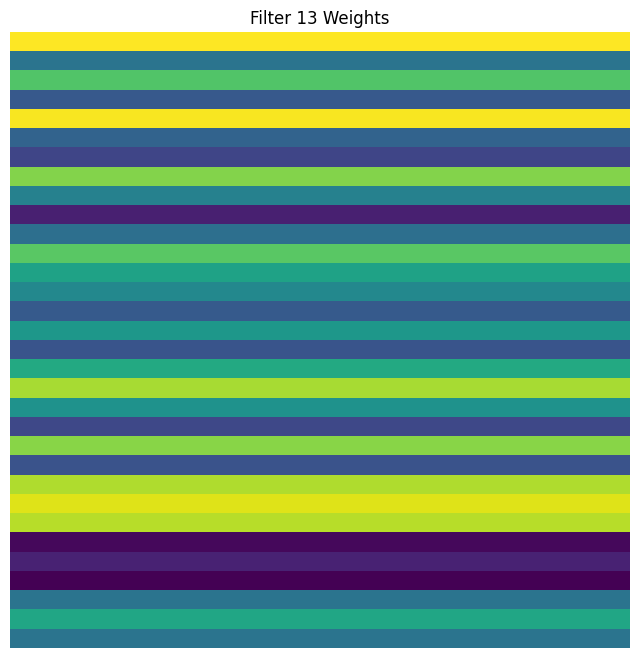

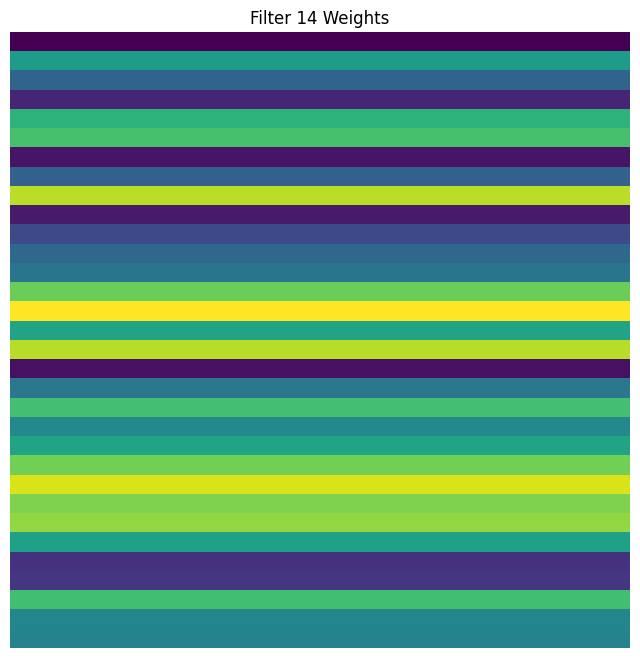

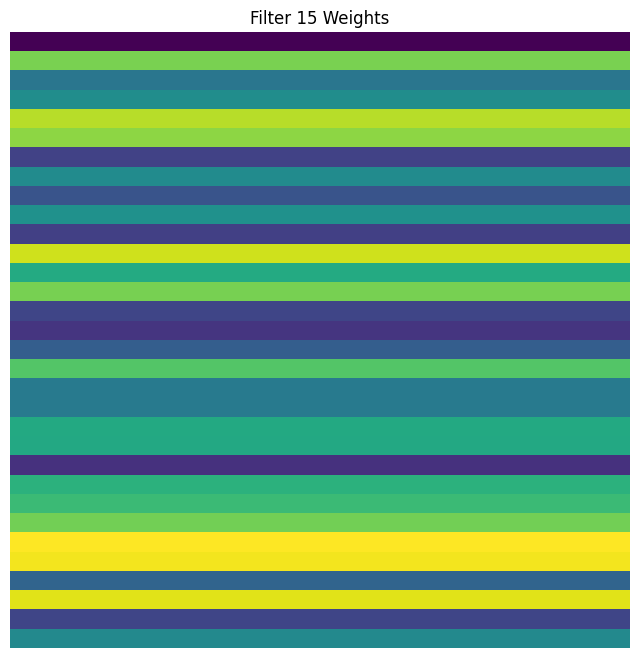

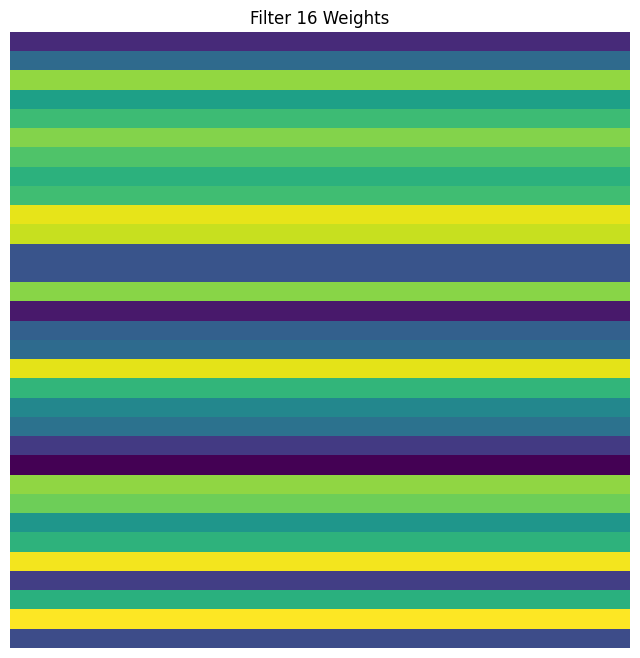

148/148 [==============================] - 0s 907us/step
F1 Score for Question 16: 0.8480997189294879

TRAIN QUESTION 17 MODEL
Index(['checkpoint_pct', 'cutscene_click_pct', 'map_click_pct',
       'map_hover_pct', 'navigate_click_pct', 'notification_click_pct',
       'object_click_pct', 'object_hover_pct', 'observation_click_pct',
       'person_click_pct', 'notebook_click_pct', 'elapsed_duration',
       'level_13_count', 'level_14_count', 'level_15_count', 'level_16_count',
       'level_17_count', 'level_18_count', 'level_19_count', 'level_20_count',
       'level_21_count', 'level_22_count', 'event_name_checkpoint_count',
       'event_name_cutscene_click_count', 'event_name_map_click_count',
       'event_name_map_hover_count', 'event_name_navigate_click_count',
       'event_name_notification_click_count', 'event_name_object_click_count',
       'event_name_object_hover_count', 'event_name_observation_click_count',
       'event_name_person_click_count', 'event_name_notebook_cl

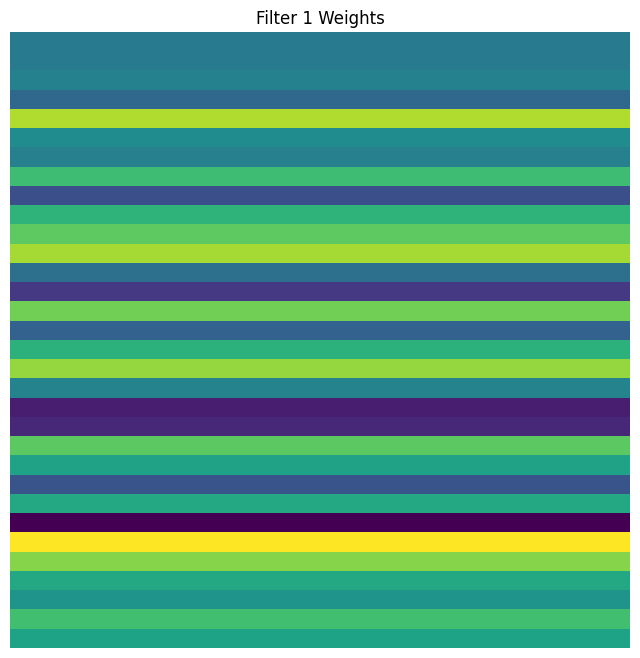

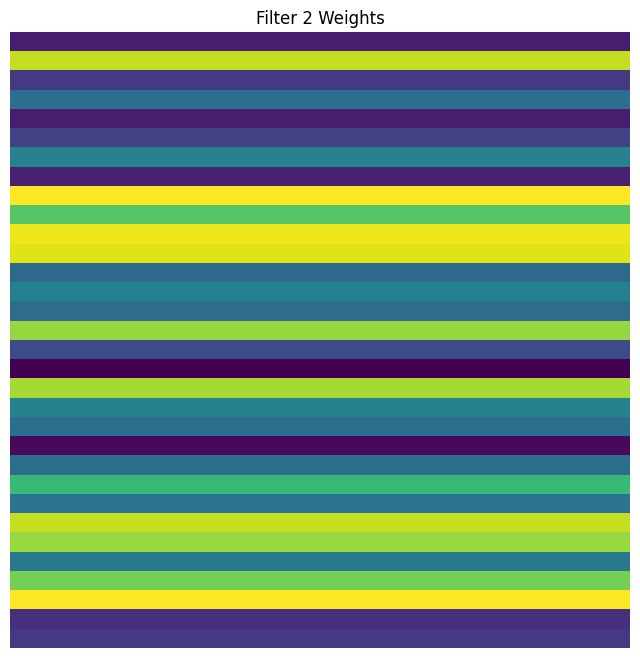

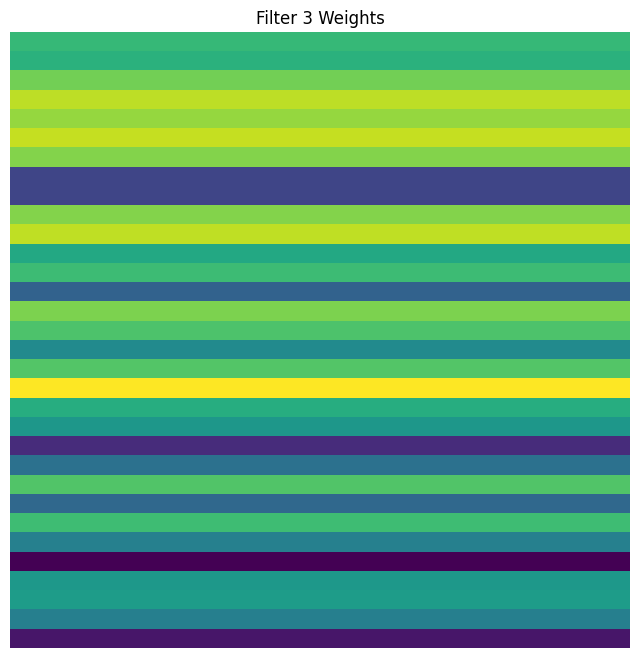

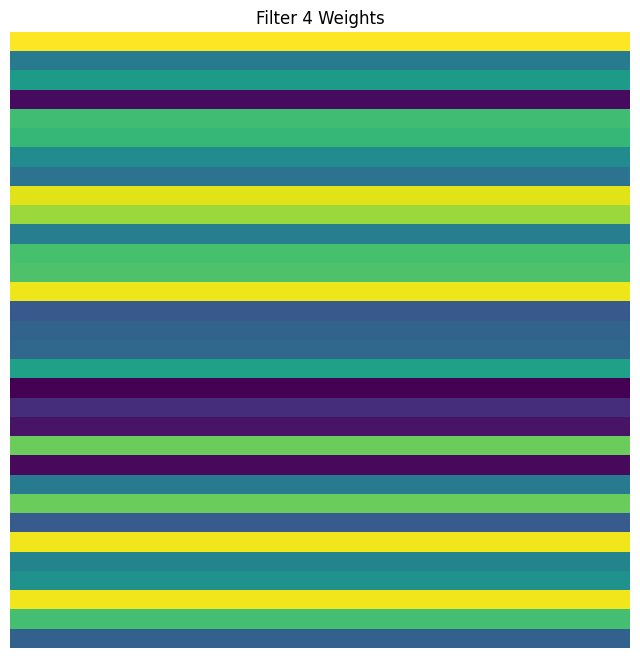

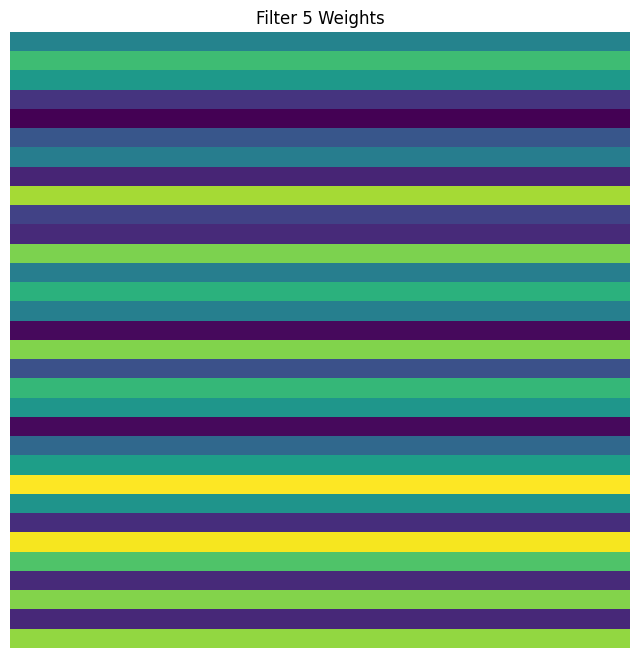

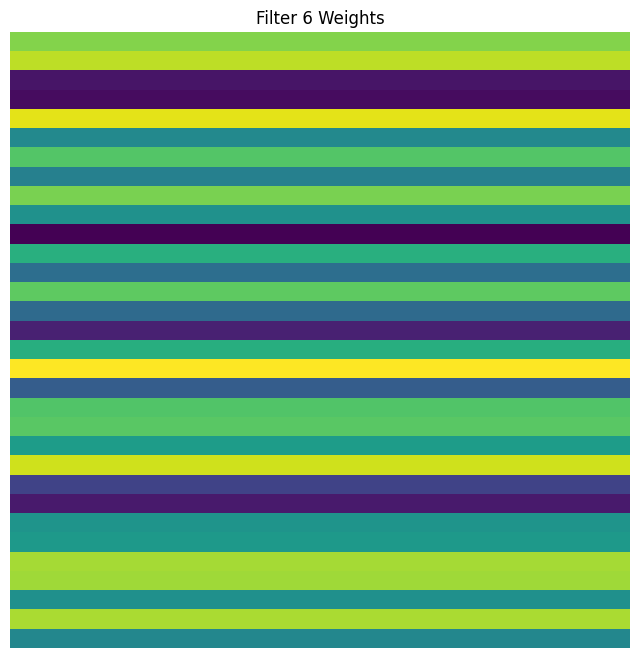

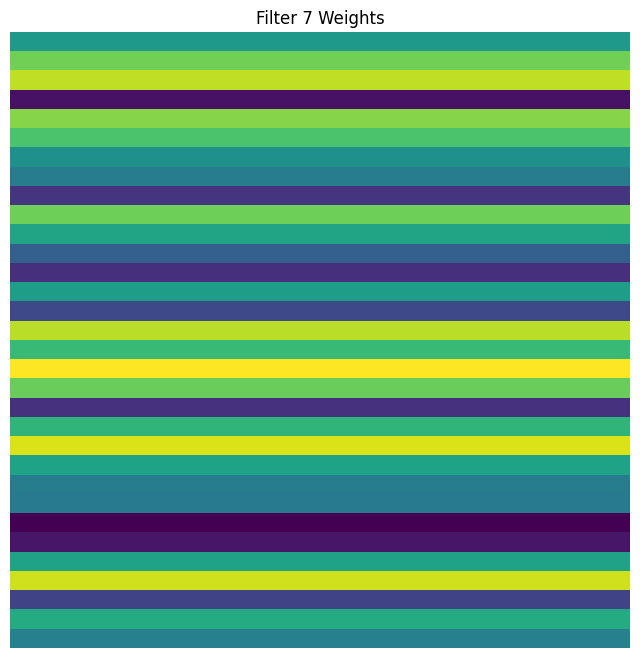

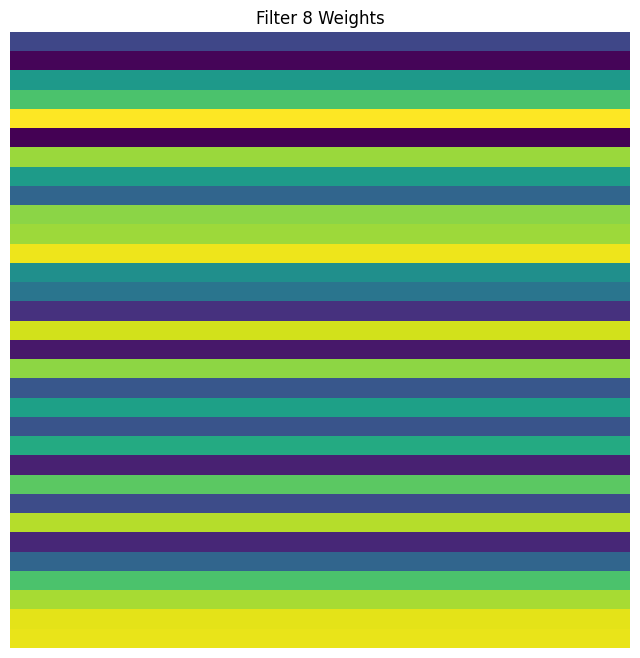

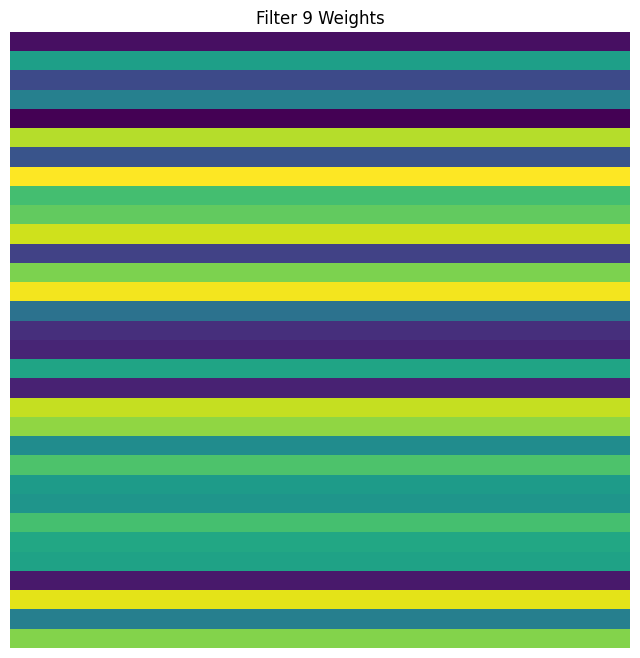

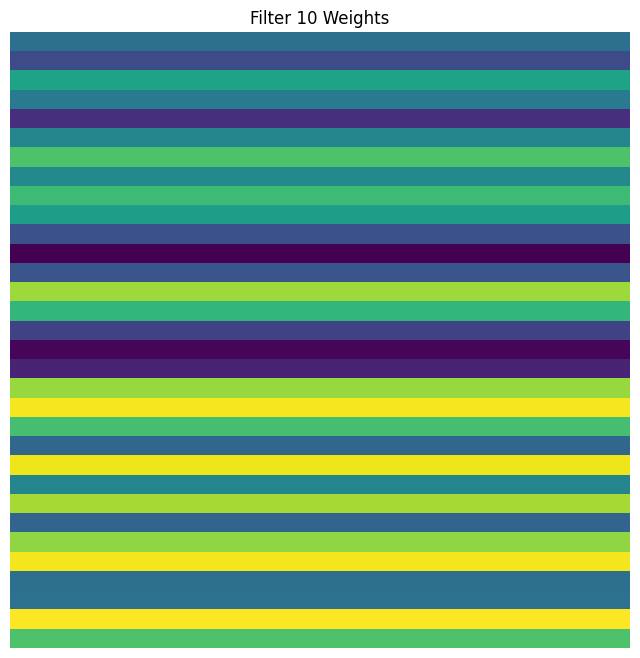

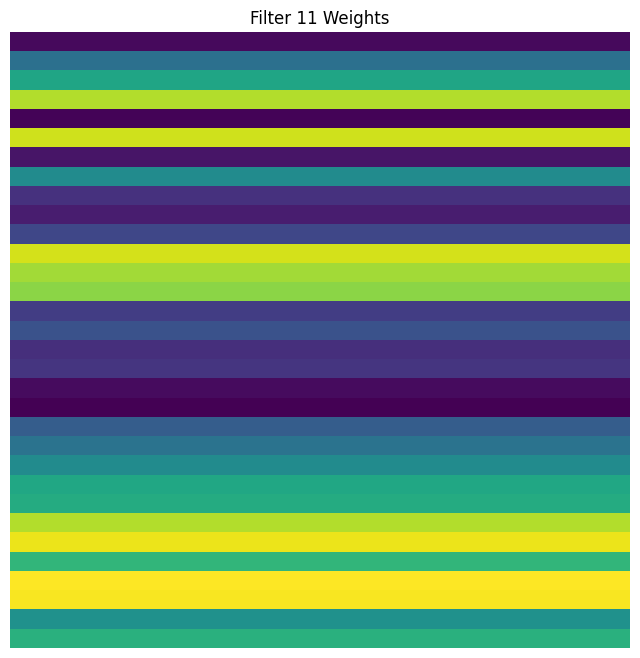

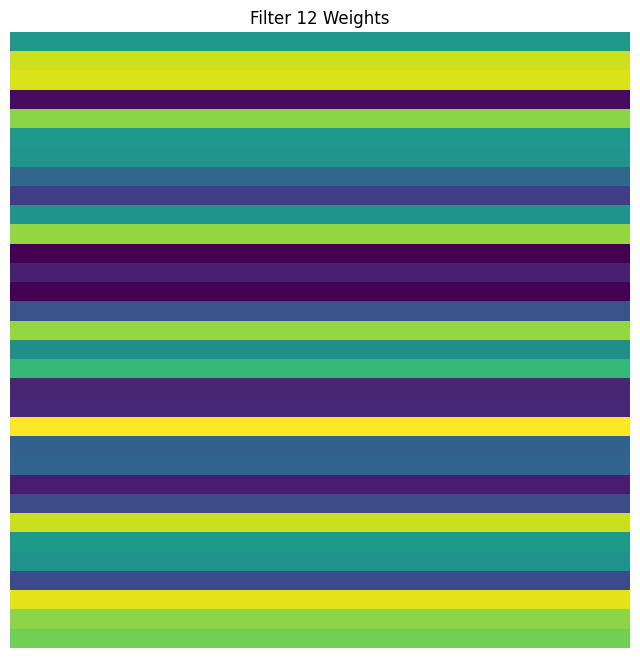

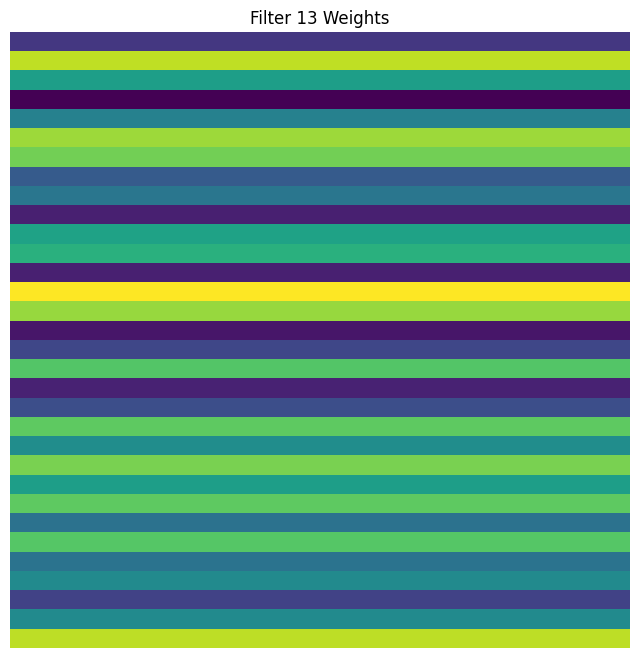

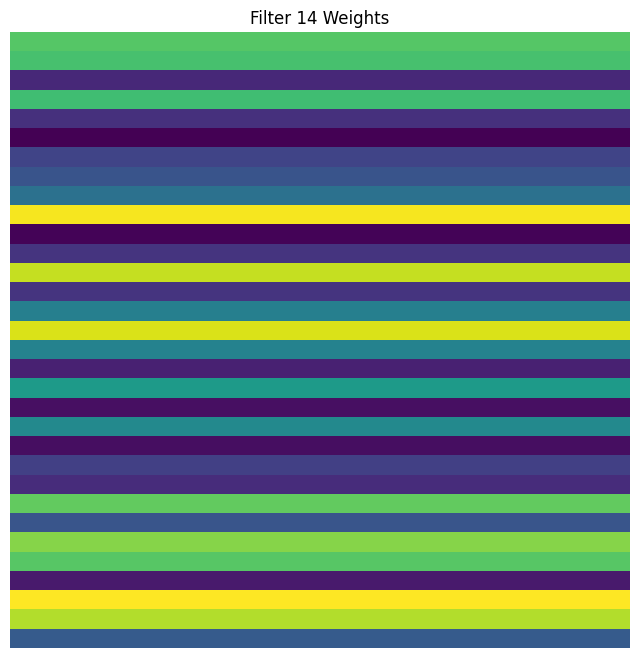

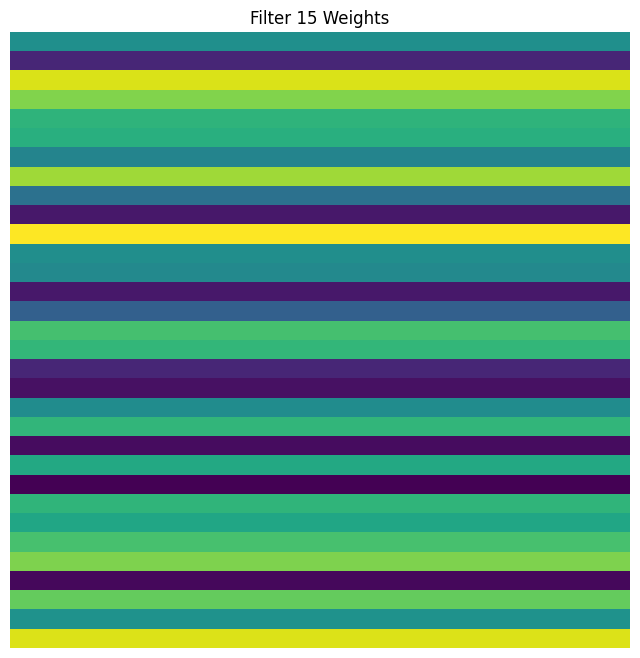

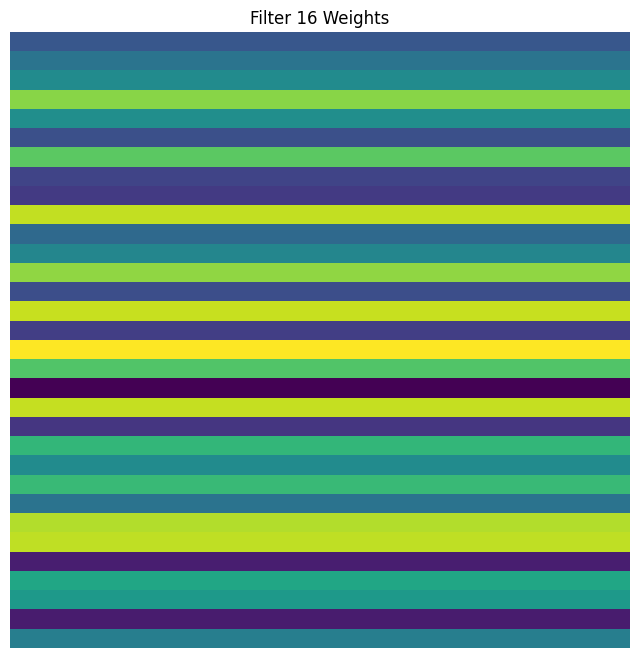

148/148 [==============================] - 0s 965us/step
F1 Score for Question 17: 0.80804248861912

TRAIN QUESTION 18 MODEL
Index(['checkpoint_pct', 'cutscene_click_pct', 'map_click_pct',
       'map_hover_pct', 'navigate_click_pct', 'notification_click_pct',
       'object_click_pct', 'object_hover_pct', 'observation_click_pct',
       'person_click_pct', 'notebook_click_pct', 'elapsed_duration',
       'level_13_count', 'level_14_count', 'level_15_count', 'level_16_count',
       'level_17_count', 'level_18_count', 'level_19_count', 'level_20_count',
       'level_21_count', 'level_22_count', 'event_name_checkpoint_count',
       'event_name_cutscene_click_count', 'event_name_map_click_count',
       'event_name_map_hover_count', 'event_name_navigate_click_count',
       'event_name_notification_click_count', 'event_name_object_click_count',
       'event_name_object_hover_count', 'event_name_observation_click_count',
       'event_name_person_click_count', 'event_name_notebook_clic

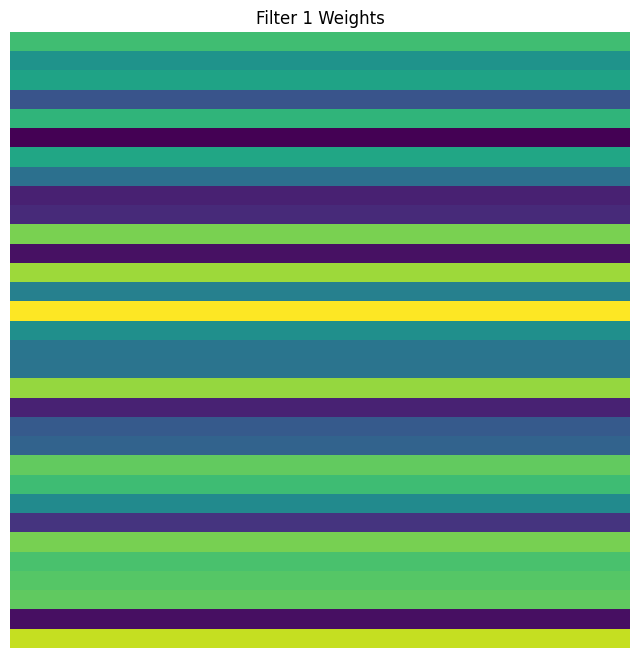

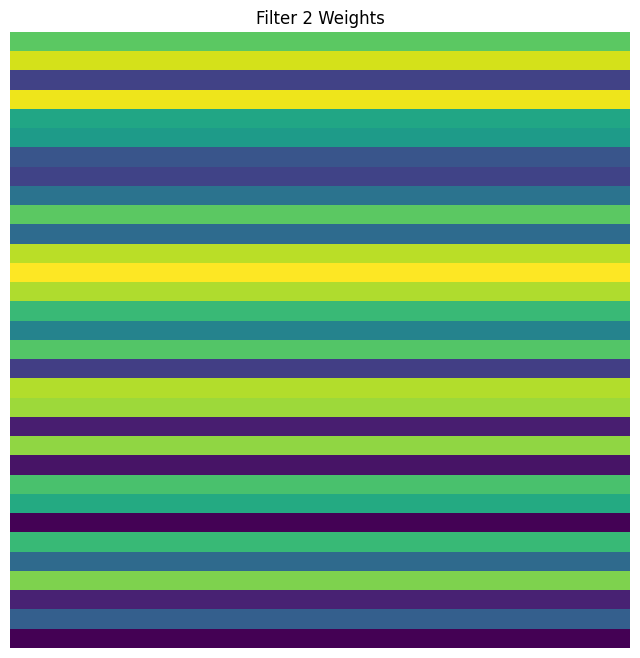

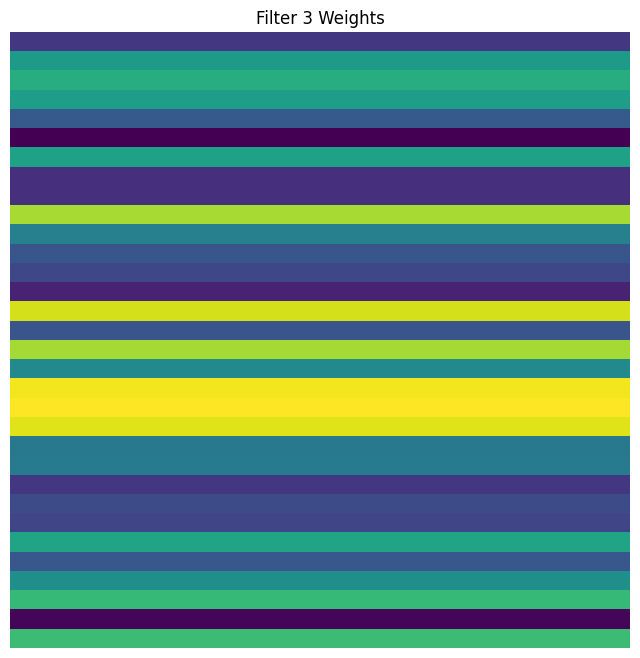

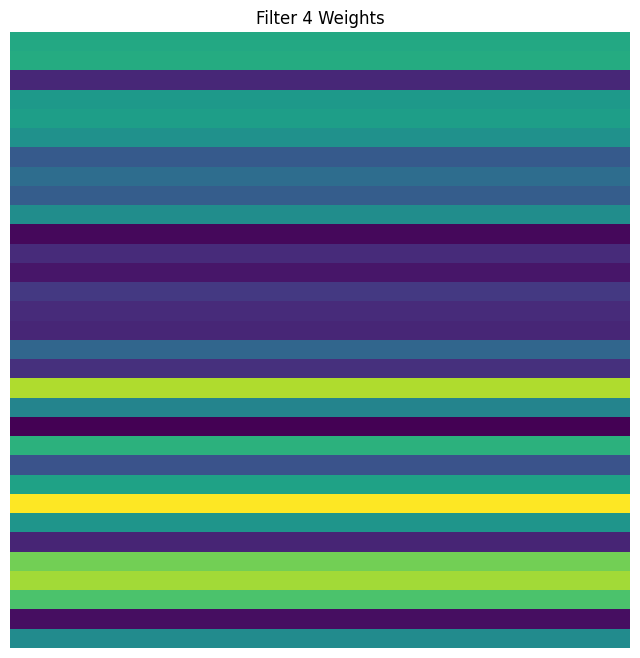

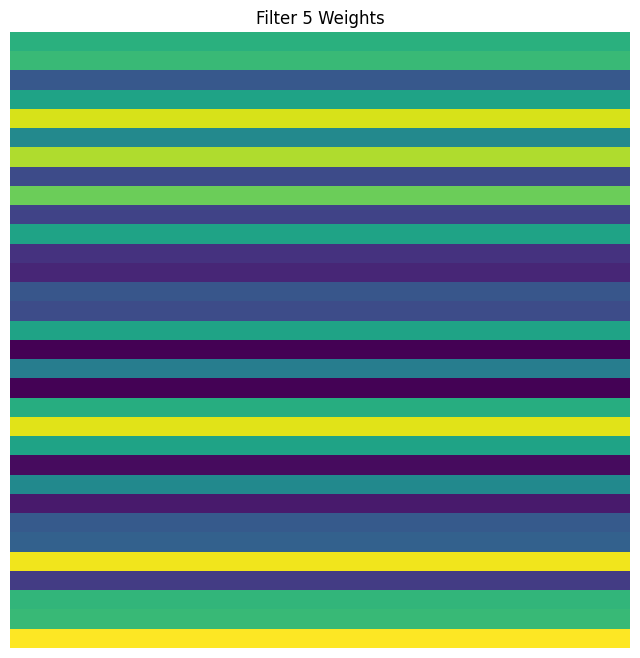

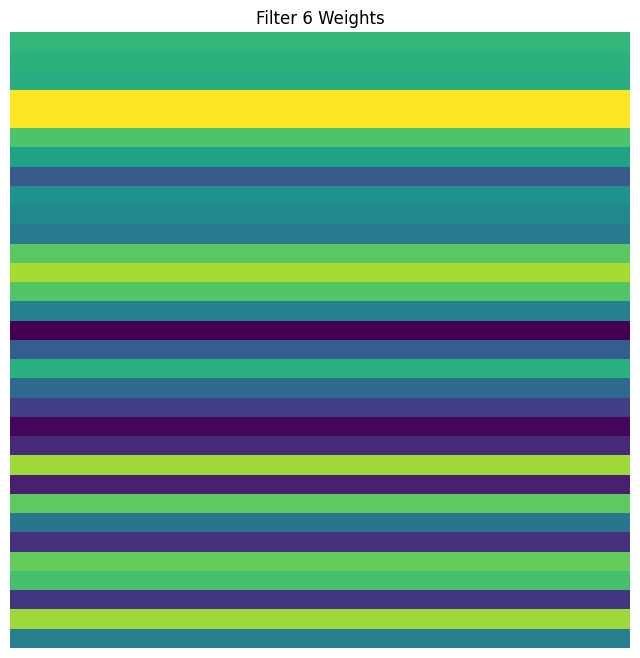

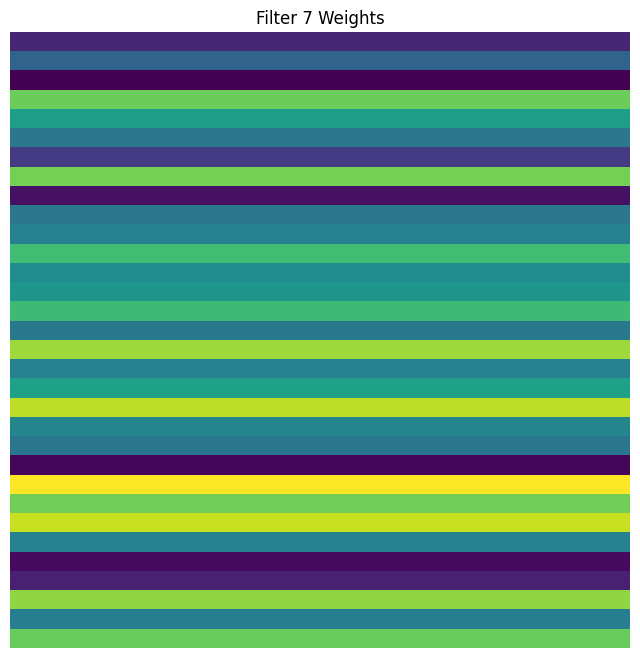

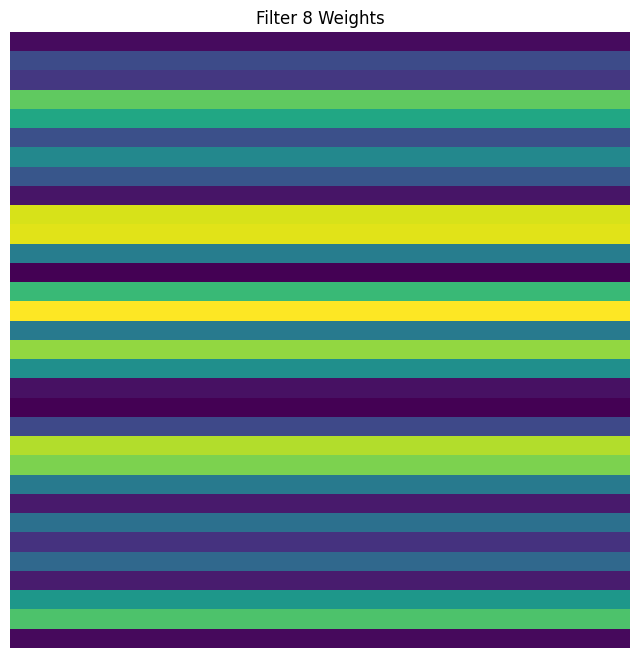

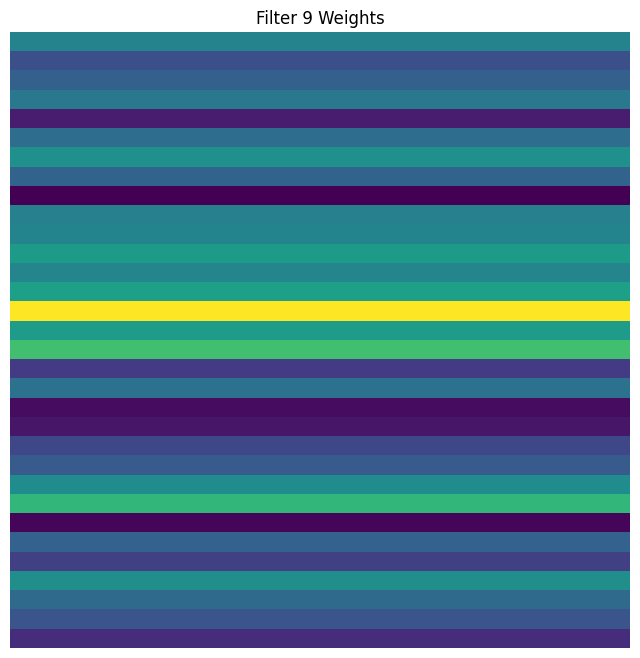

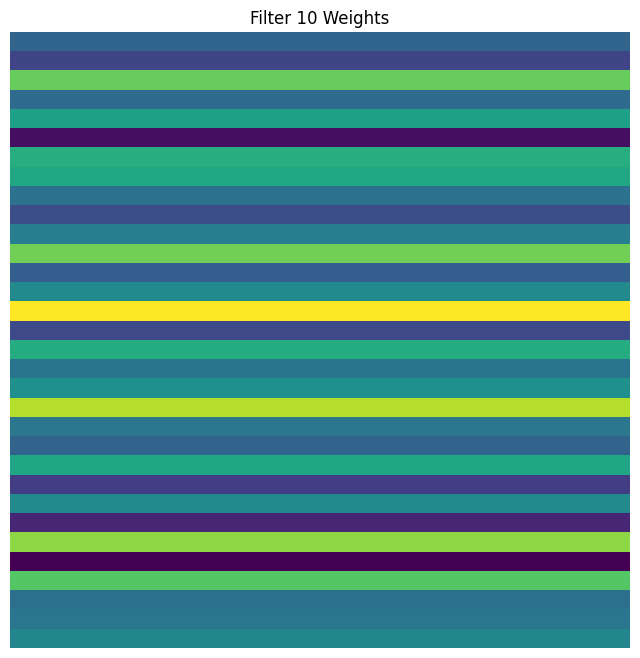

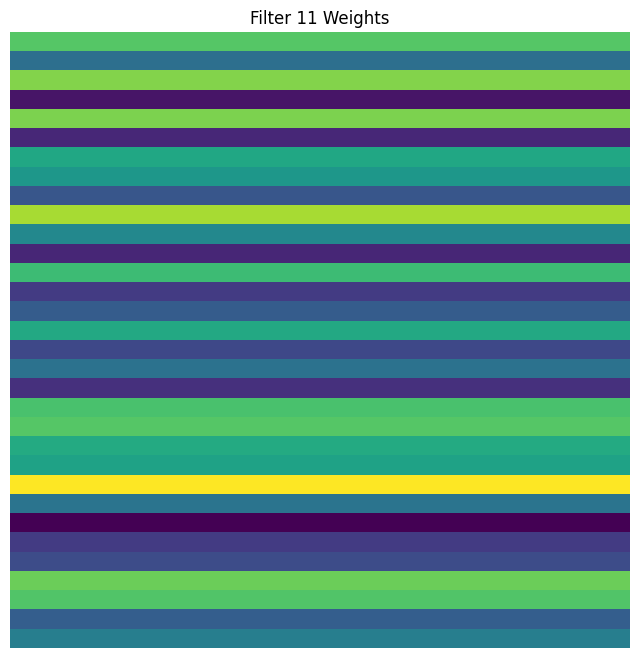

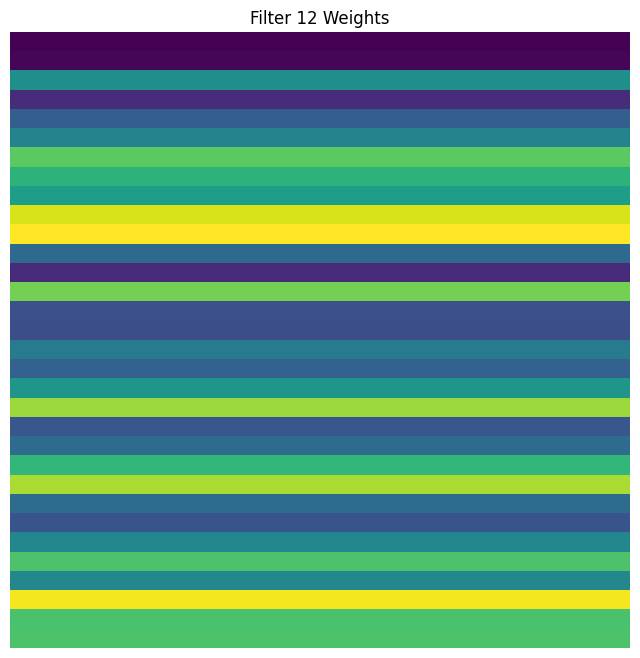

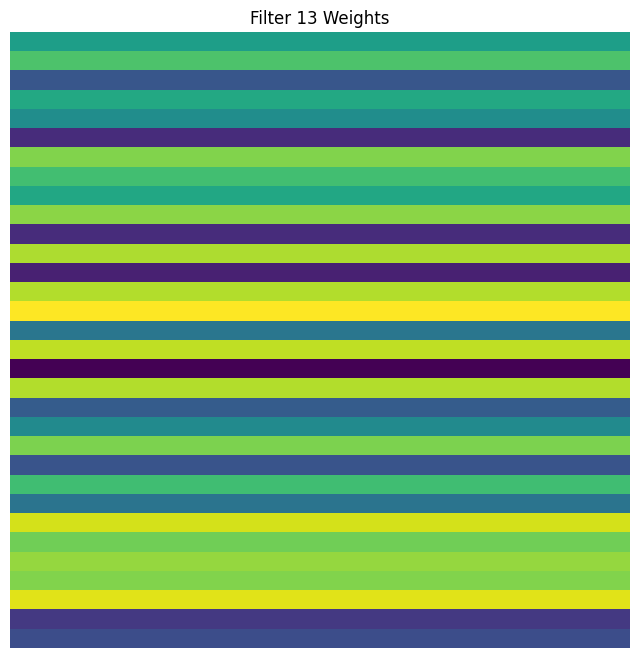

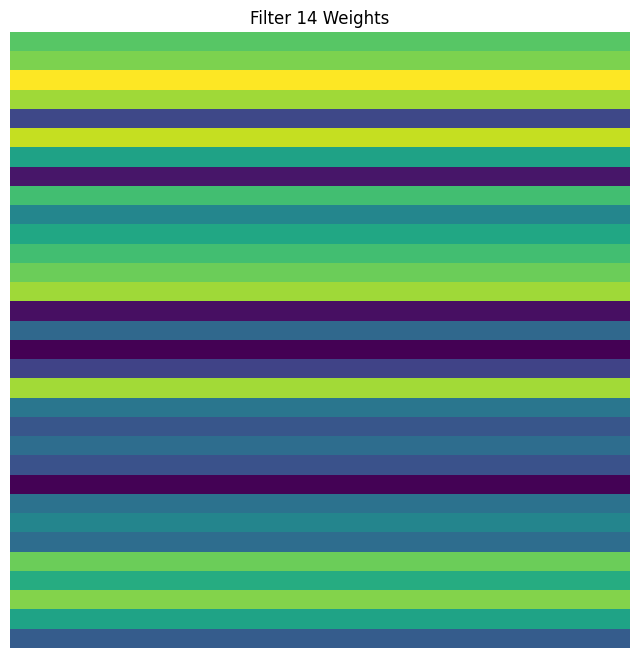

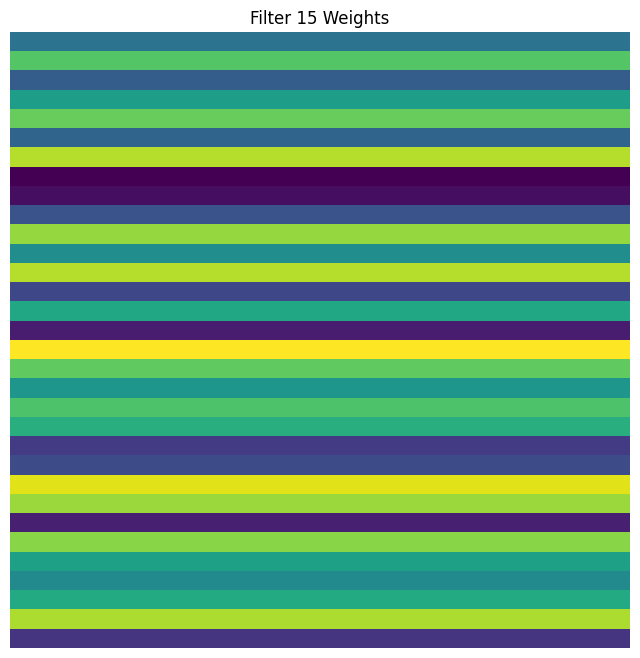

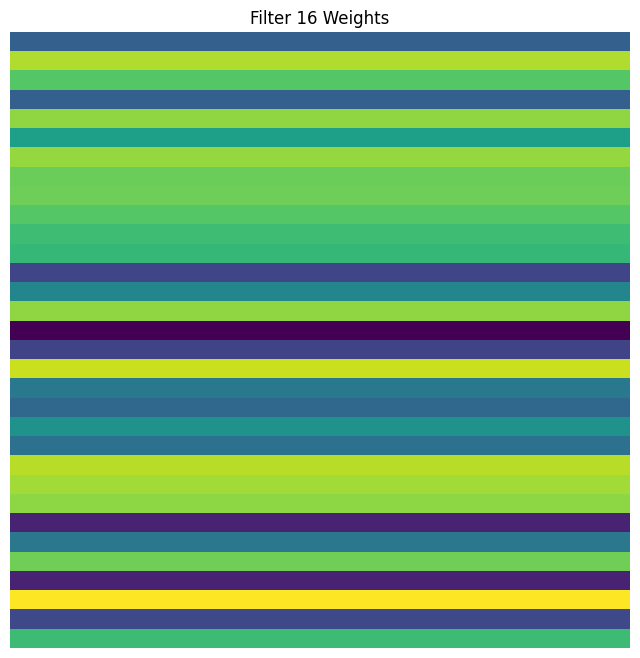

148/148 [==============================] - 0s 938us/step
F1 Score for Question 18: 0.9740966478014802


In [30]:
import warnings
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, TimeDistributed, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score
import keras
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

warnings.filterwarnings('ignore')
MODELS_LSTM = {}
F1_LSTM = {}
for question in range(1, 19):
    print(f'\nTRAIN QUESTION {question} MODEL')
    if question <= 3:
        X = FEATURES1
    elif question <= 13:
        X = FEATURES2
    elif question <= 18:
        X = FEATURES3
    print(X.columns)
    y = TARGETS[TARGETS["question"] == question]["correct"]
    y_one_hot = to_categorical(y)
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    feature_names = scaler.get_feature_names_out()

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_one_hot, test_size=0.2, random_state=42)
    
    # Reshape the input to be 3D (samples, timesteps, features)
    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
    
    model = Sequential()
    model.add(Dense(128, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.2))
    model.add(LSTM(16, return_sequences=False))  # Add the LSTM layer
    model.add(Dense(2, activation='softmax'))
    
    sgd = keras.optimizers.SGD(lr=0.01, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=sgd , metrics=['accuracy'])
    
    early_stop = EarlyStopping(monitor='val_accuracy', patience=4)
    
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test, y_test), callbacks=[early_stop])
    
    ######## plottign model activations
    print('Plotting the model with question number ' + str(question))
      # Your LSTM or 1D CNN model
    layer_idx = 4         # Index of the LSTM or 1D CNN layer in your model
    input_data = X_train[:1] # One or more input samples
    output_data = y_train[:1] # Output labels corresponding to the input samples

    # Plot activations
    #plot_activations_lstm(model, layer_idx, input_data)

    # Plot weights
    plot_weights(model, layer_idx)

    y_pred = np.argmax(model.predict(X_test), axis=-1)
    
    f1 = f1_score(np.argmax(y_test, axis=-1), y_pred)
    MODELS_LSTM[question] = model
    F1_LSTM[question] = f1
    print(f'F1 Score for Question {question}: {f1}')


## Model No 6 


TRAIN QUESTION 1 MODEL
Index(['checkpoint_pct', 'cutscene_click_pct', 'map_click_pct',
       'map_hover_pct', 'navigate_click_pct', 'notification_click_pct',
       'object_click_pct', 'object_hover_pct', 'observation_click_pct',
       'person_click_pct', 'notebook_click_pct', 'elapsed_duration',
       'level_0_count', 'level_1_count', 'level_2_count', 'level_3_count',
       'level_4_count', 'event_name_checkpoint_count',
       'event_name_cutscene_click_count', 'event_name_map_click_count',
       'event_name_map_hover_count', 'event_name_navigate_click_count',
       'event_name_notification_click_count', 'event_name_object_click_count',
       'event_name_object_hover_count', 'event_name_observation_click_count',
       'event_name_person_click_count', 'event_name_notebook_click_count',
       'name_basic_count', 'name_close_count', 'name_undefined_count',
       'name_open_count', 'fullscreen', 'hq', 'music'],
      dtype='object')
Epoch 1/50
590/590 [========================

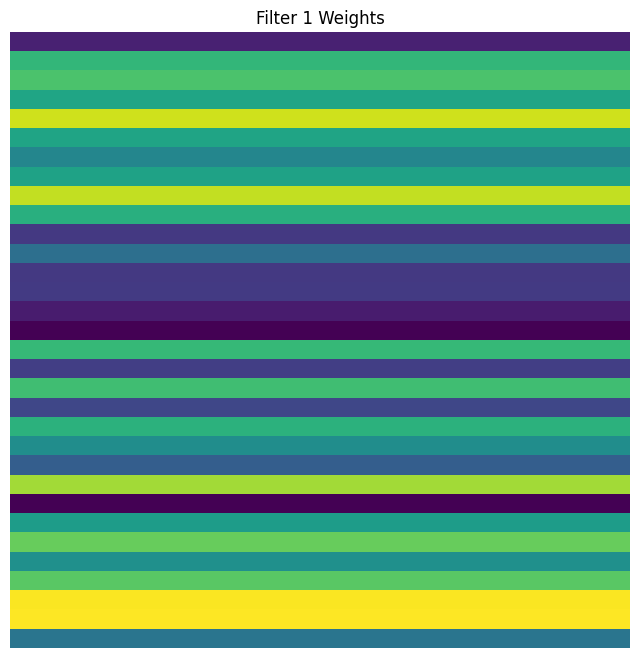

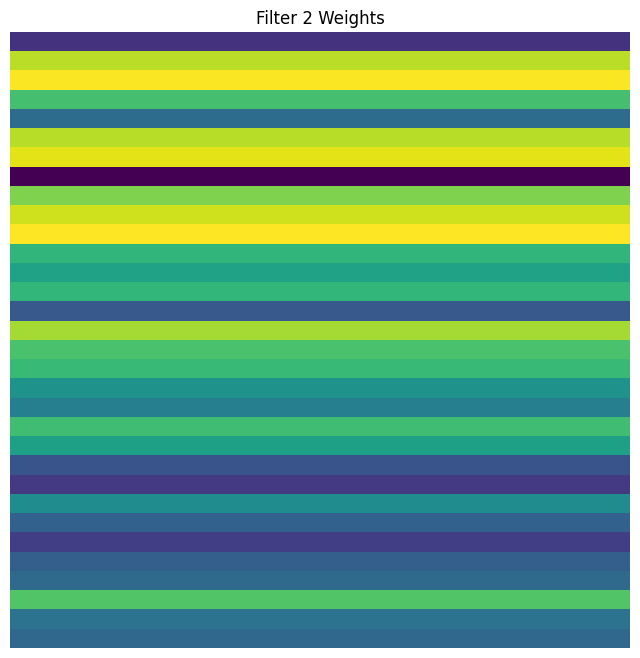

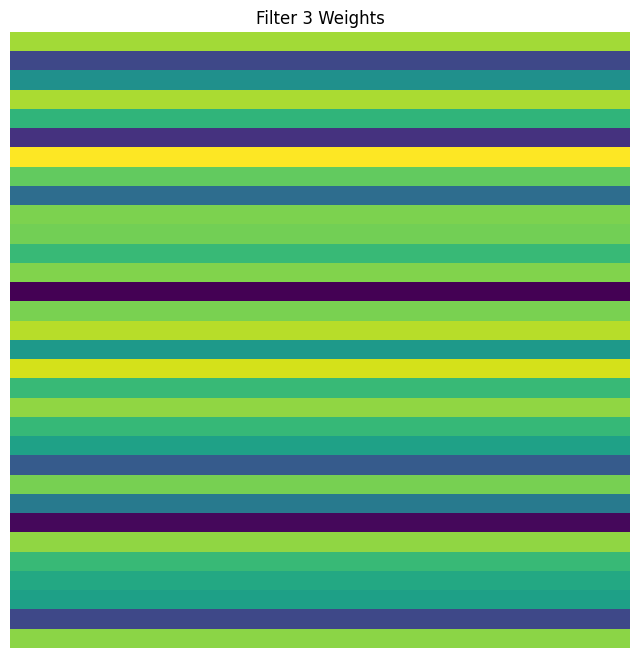

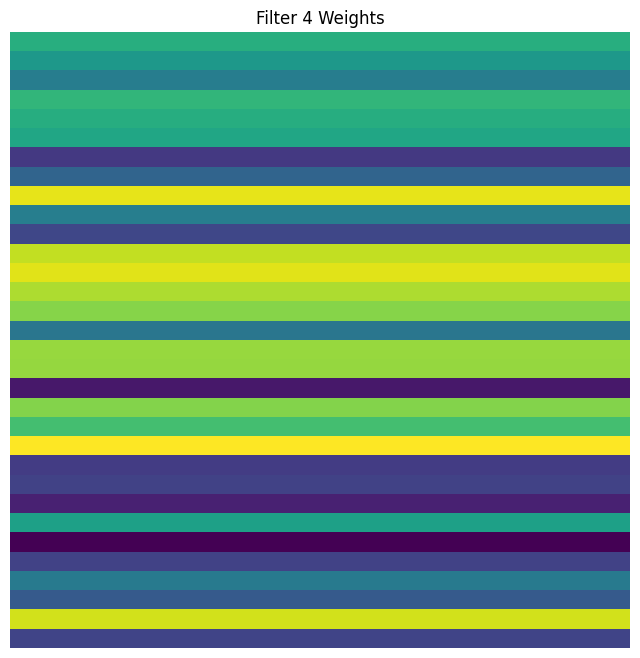

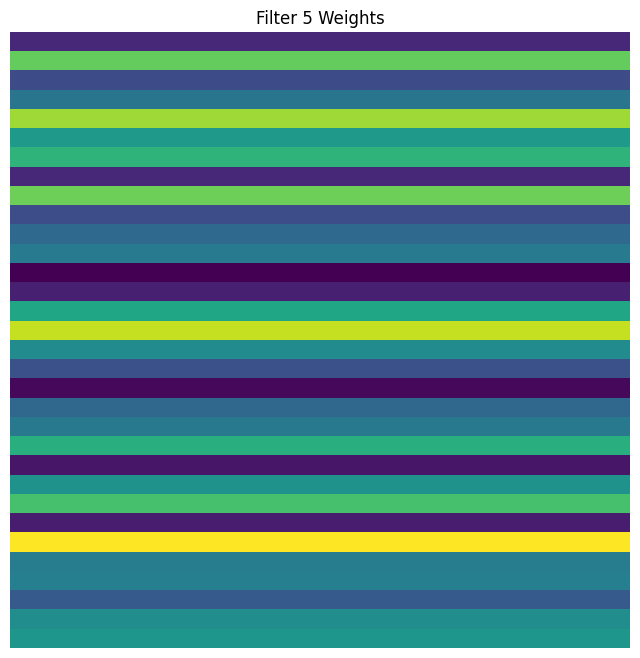

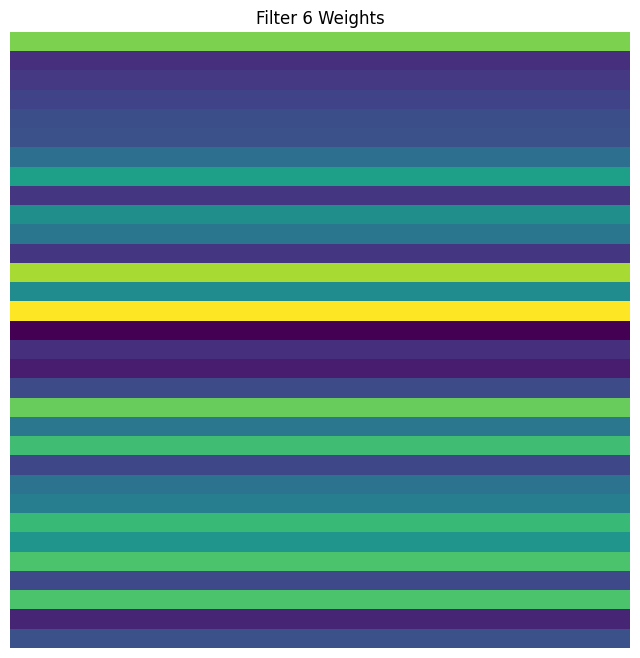

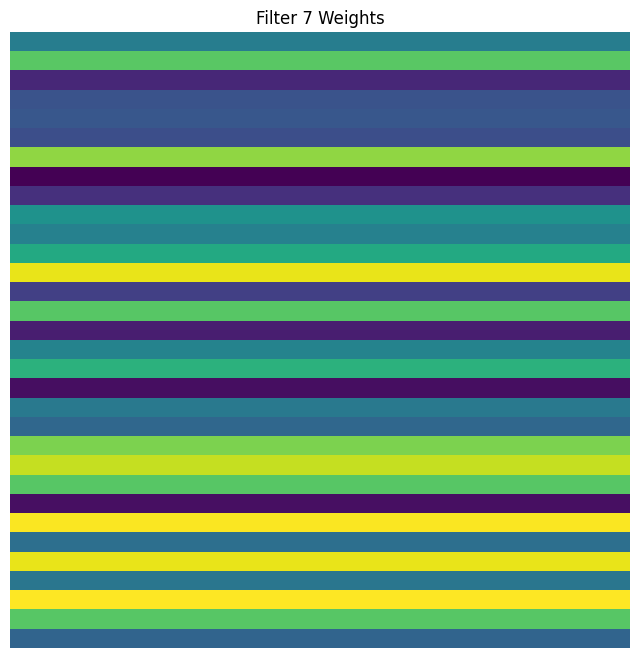

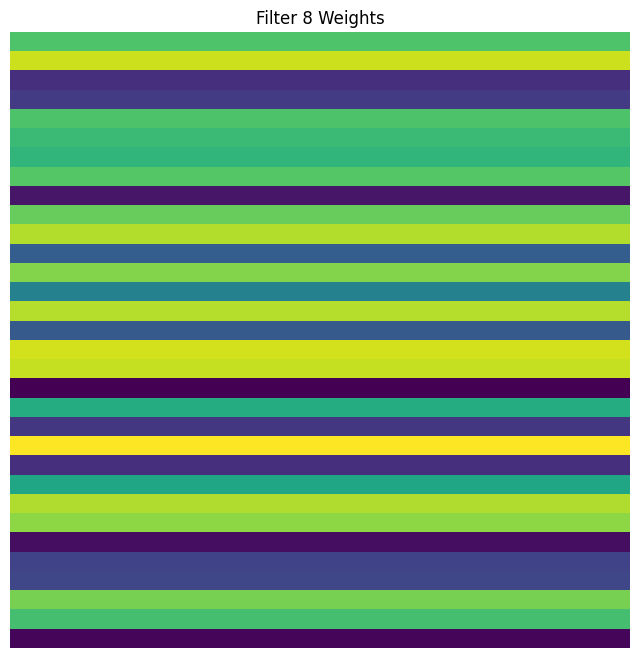

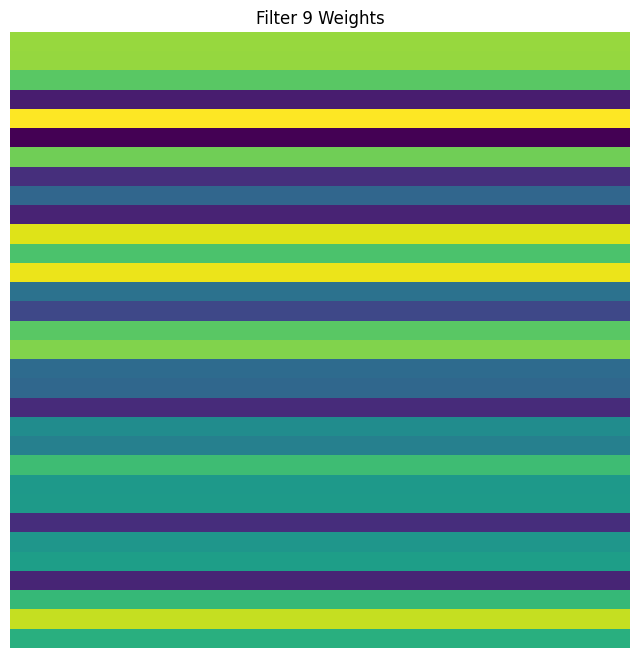

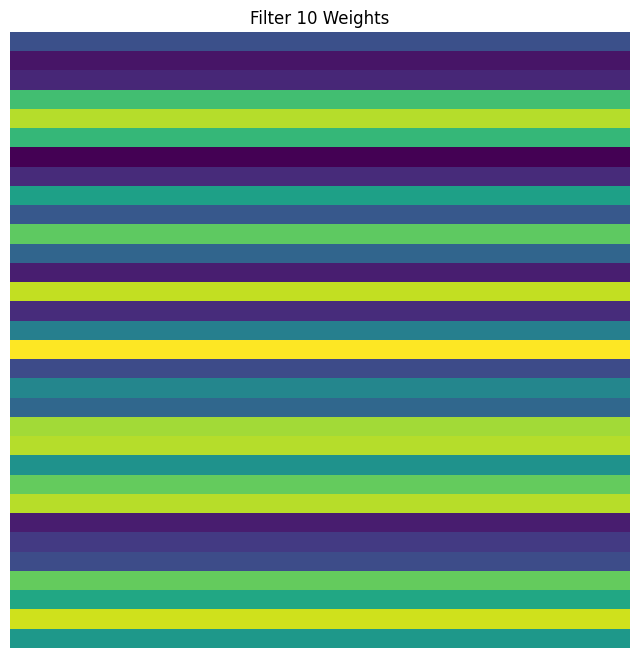

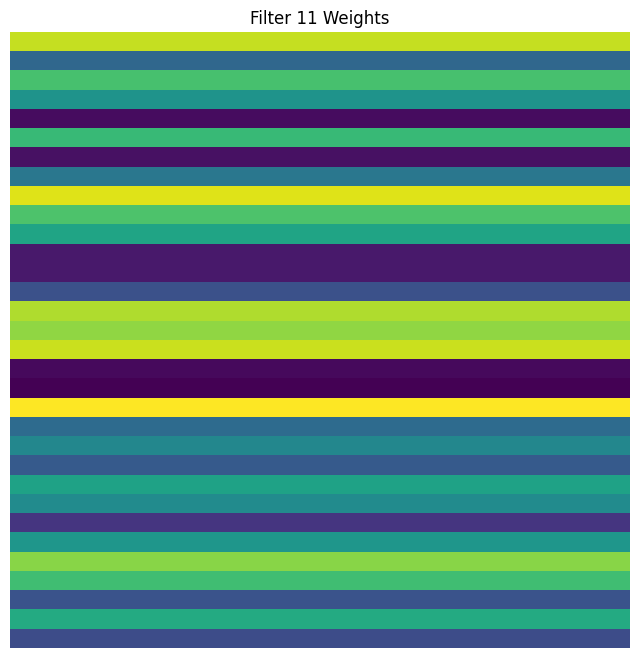

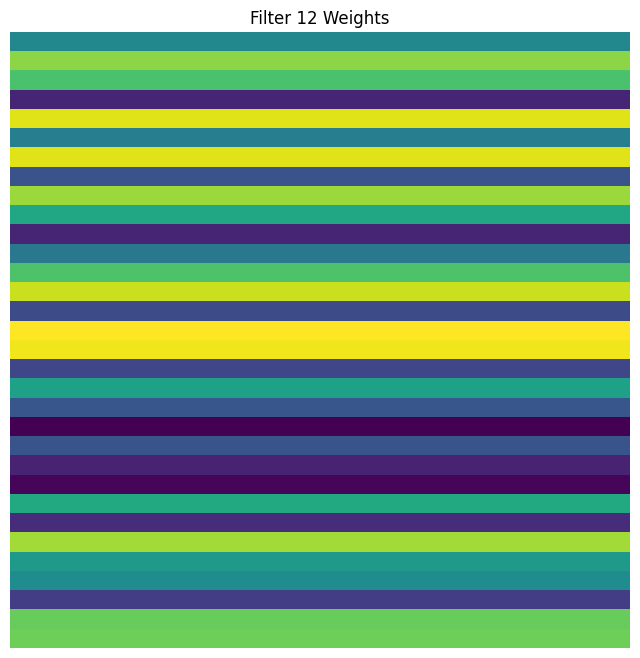

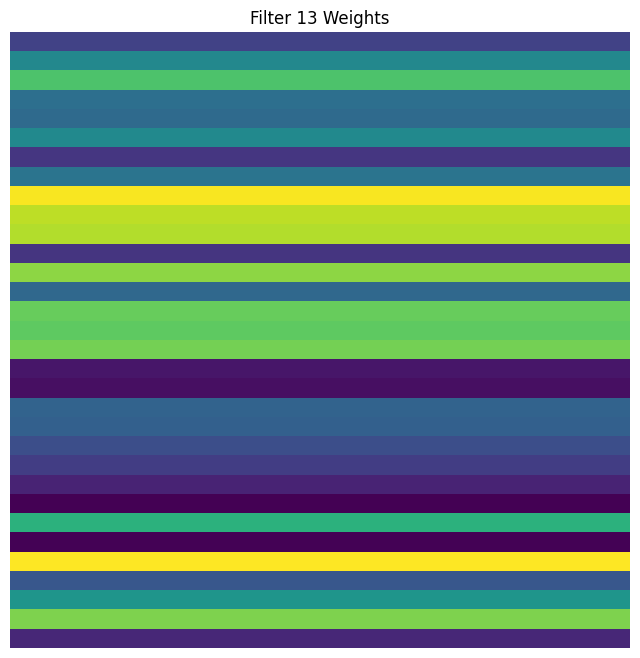

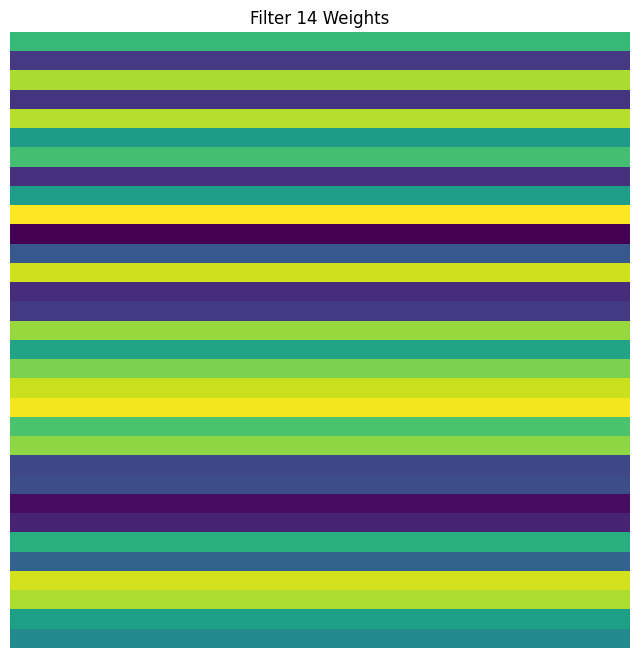

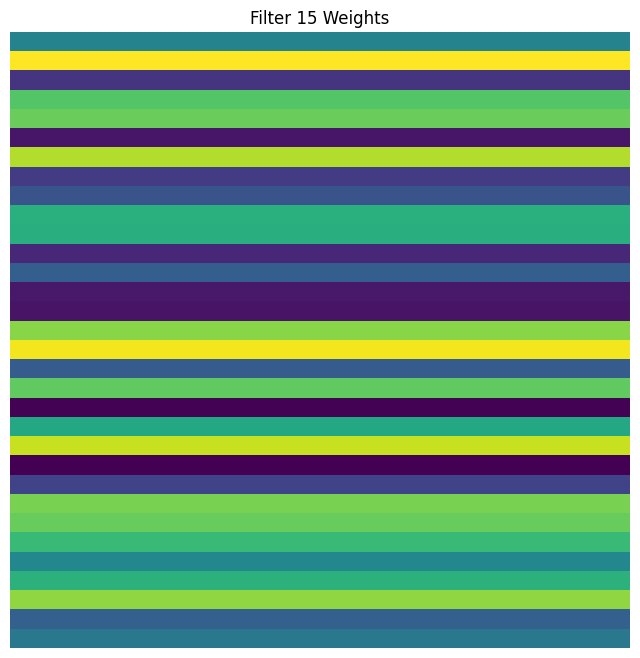

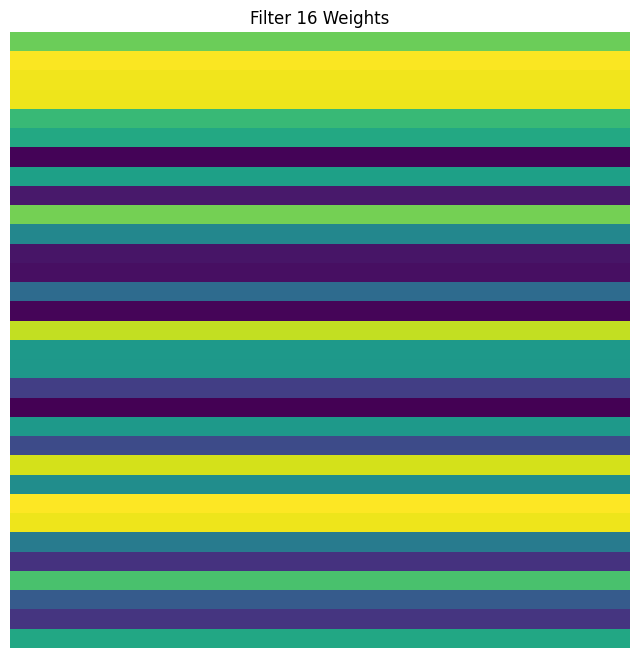

148/148 [==============================] - 0s 786us/step
F1 Score for Question 1: 0.8464080283930975

TRAIN QUESTION 2 MODEL
Index(['checkpoint_pct', 'cutscene_click_pct', 'map_click_pct',
       'map_hover_pct', 'navigate_click_pct', 'notification_click_pct',
       'object_click_pct', 'object_hover_pct', 'observation_click_pct',
       'person_click_pct', 'notebook_click_pct', 'elapsed_duration',
       'level_0_count', 'level_1_count', 'level_2_count', 'level_3_count',
       'level_4_count', 'event_name_checkpoint_count',
       'event_name_cutscene_click_count', 'event_name_map_click_count',
       'event_name_map_hover_count', 'event_name_navigate_click_count',
       'event_name_notification_click_count', 'event_name_object_click_count',
       'event_name_object_hover_count', 'event_name_observation_click_count',
       'event_name_person_click_count', 'event_name_notebook_click_count',
       'name_basic_count', 'name_close_count', 'name_undefined_count',
       'name_open_cou

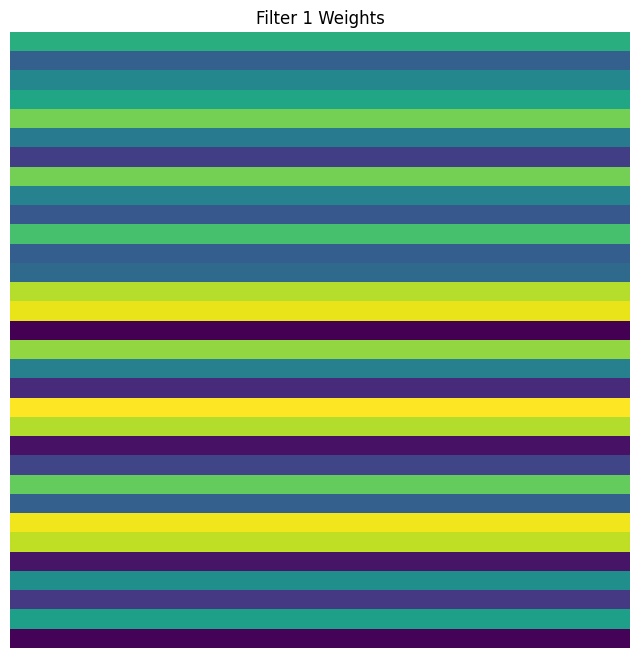

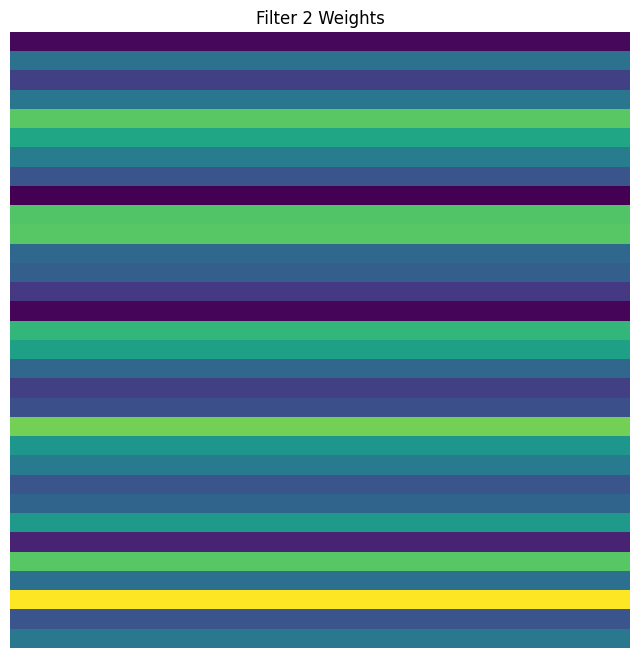

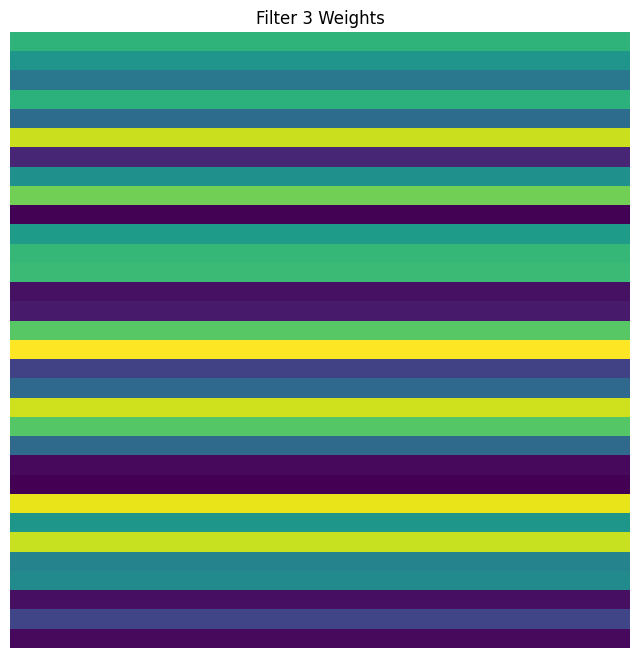

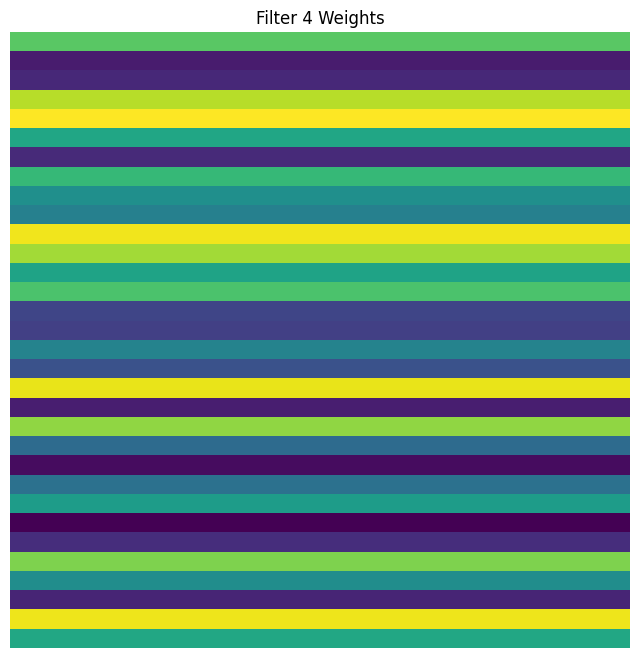

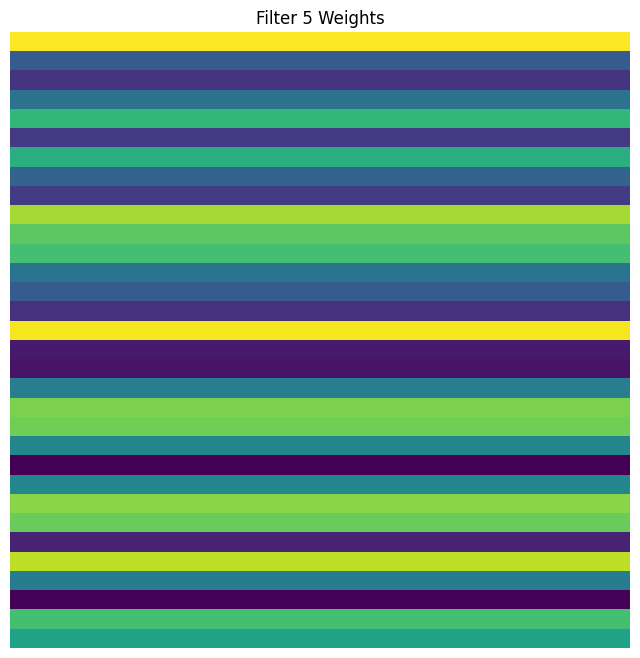

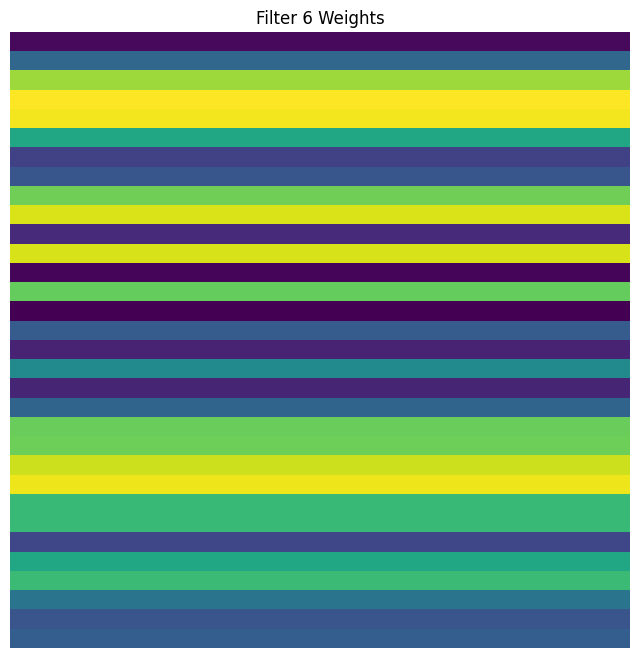

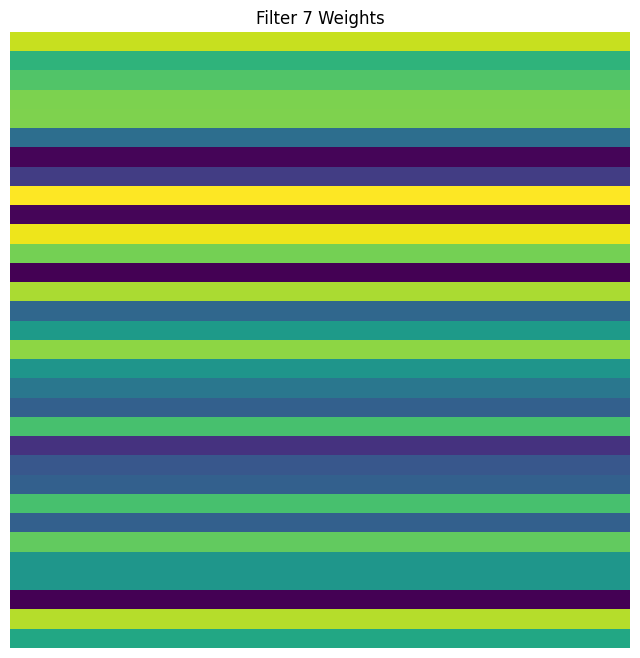

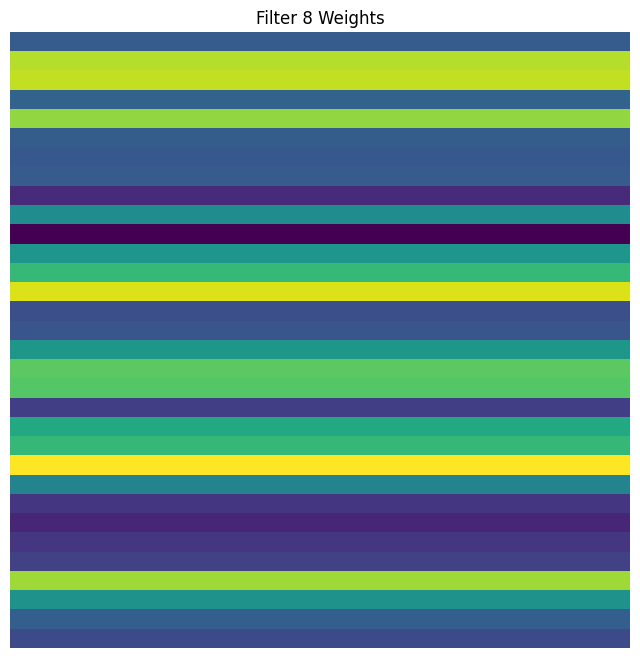

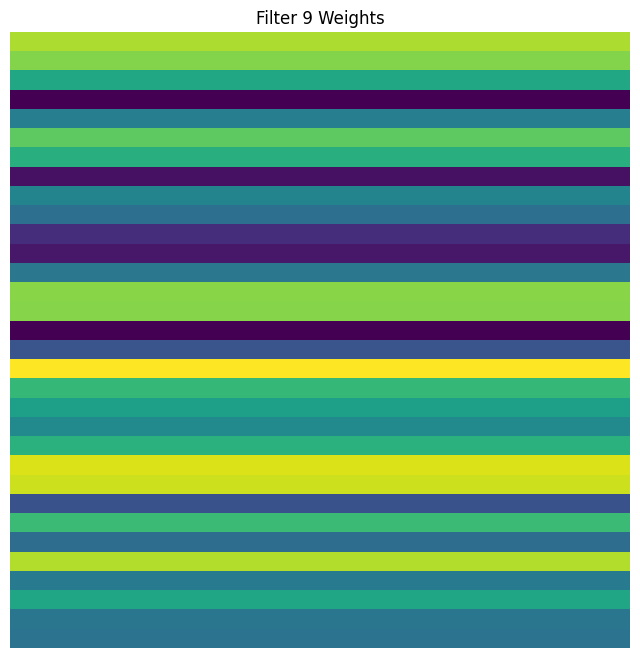

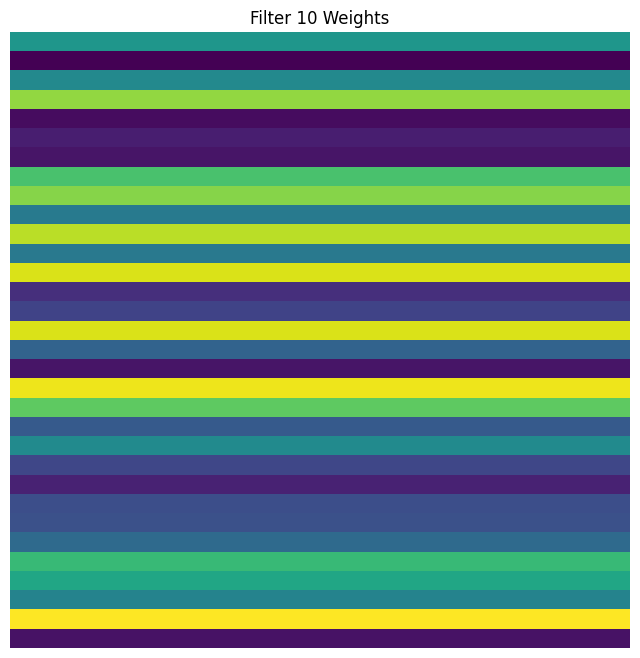

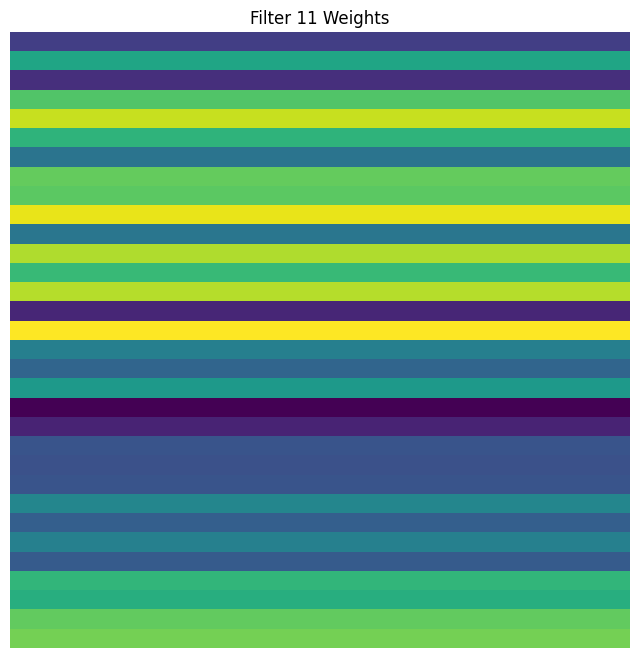

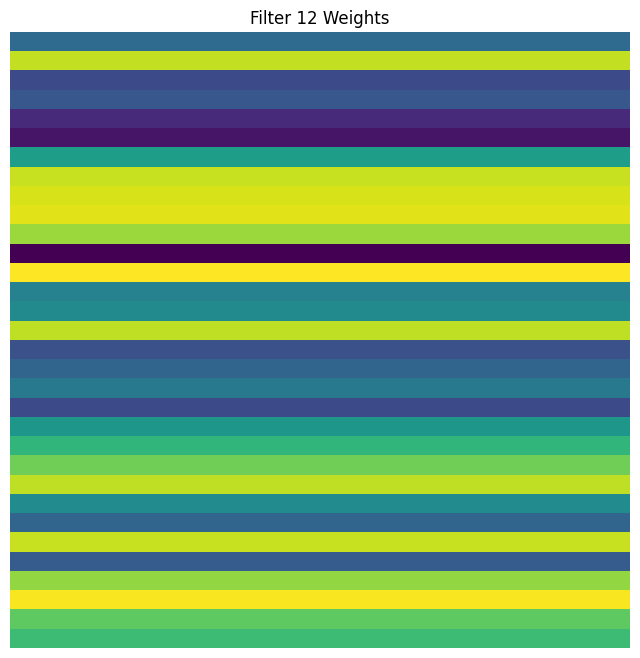

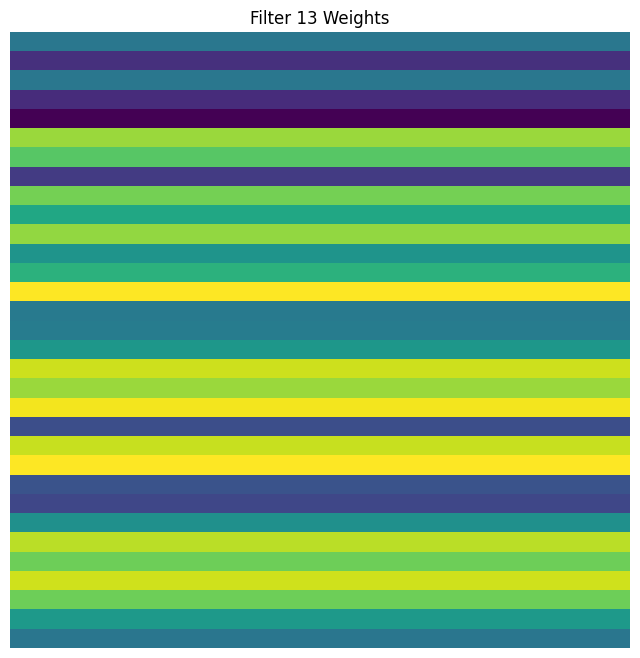

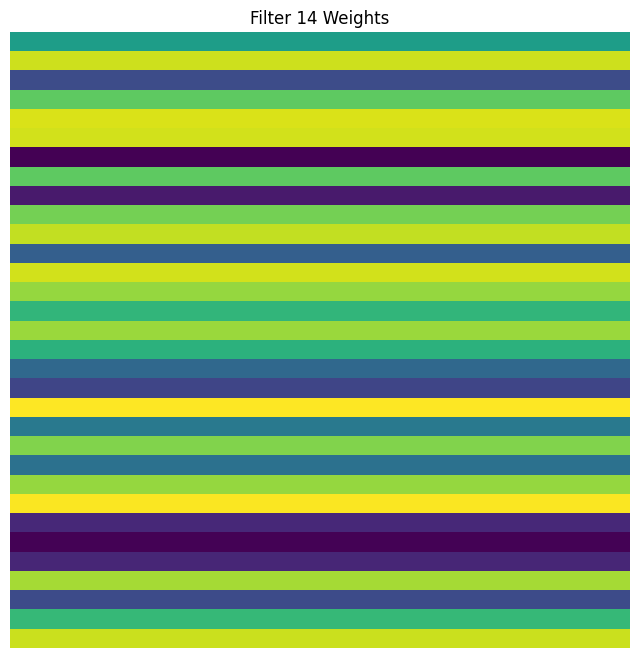

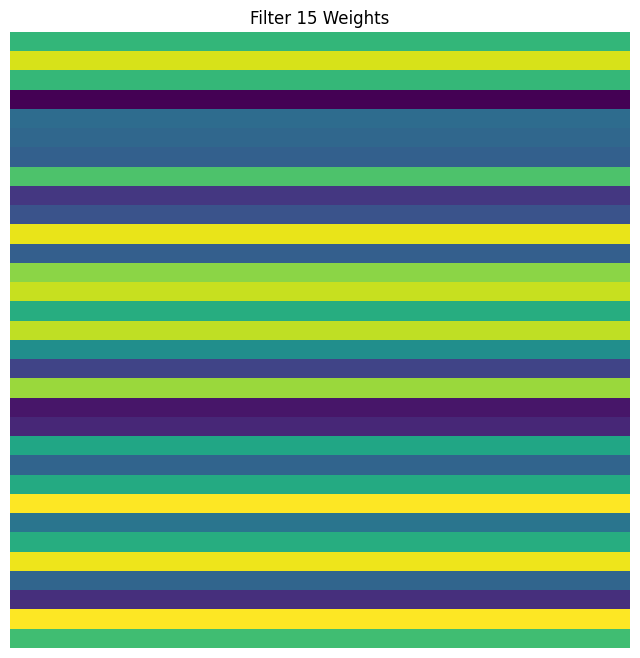

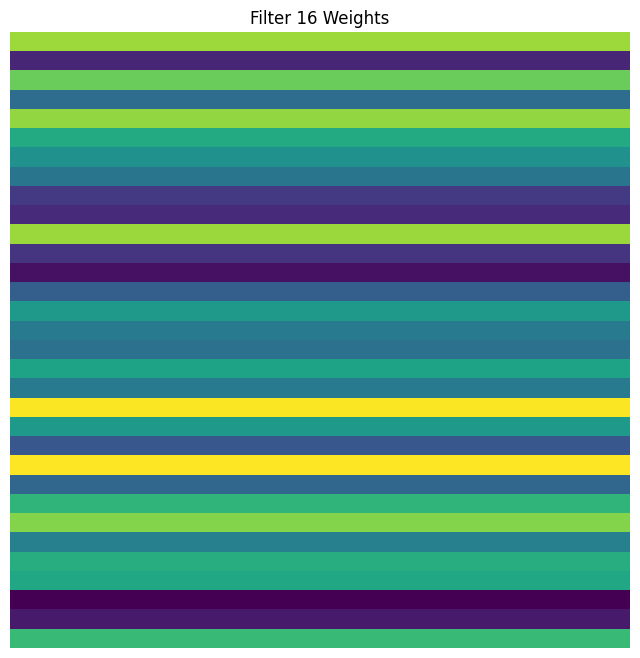

148/148 [==============================] - 0s 809us/step
F1 Score for Question 2: 0.9894939965694682

TRAIN QUESTION 3 MODEL
Index(['checkpoint_pct', 'cutscene_click_pct', 'map_click_pct',
       'map_hover_pct', 'navigate_click_pct', 'notification_click_pct',
       'object_click_pct', 'object_hover_pct', 'observation_click_pct',
       'person_click_pct', 'notebook_click_pct', 'elapsed_duration',
       'level_0_count', 'level_1_count', 'level_2_count', 'level_3_count',
       'level_4_count', 'event_name_checkpoint_count',
       'event_name_cutscene_click_count', 'event_name_map_click_count',
       'event_name_map_hover_count', 'event_name_navigate_click_count',
       'event_name_notification_click_count', 'event_name_object_click_count',
       'event_name_object_hover_count', 'event_name_observation_click_count',
       'event_name_person_click_count', 'event_name_notebook_click_count',
       'name_basic_count', 'name_close_count', 'name_undefined_count',
       'name_open_cou

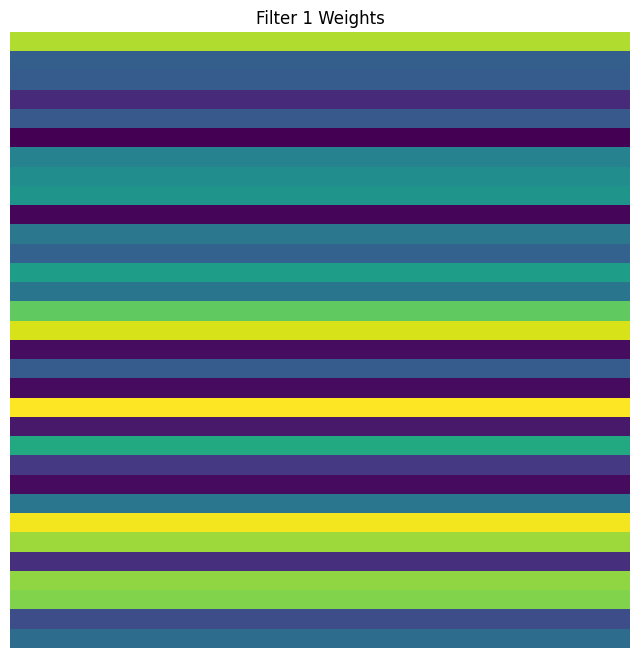

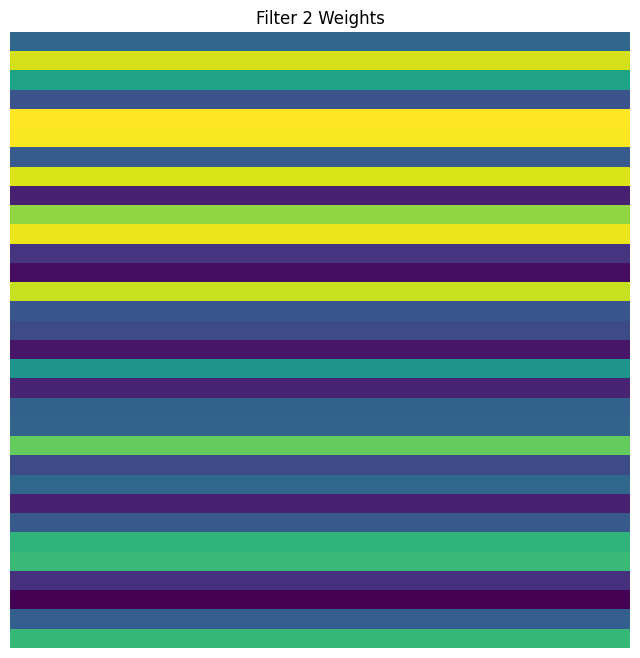

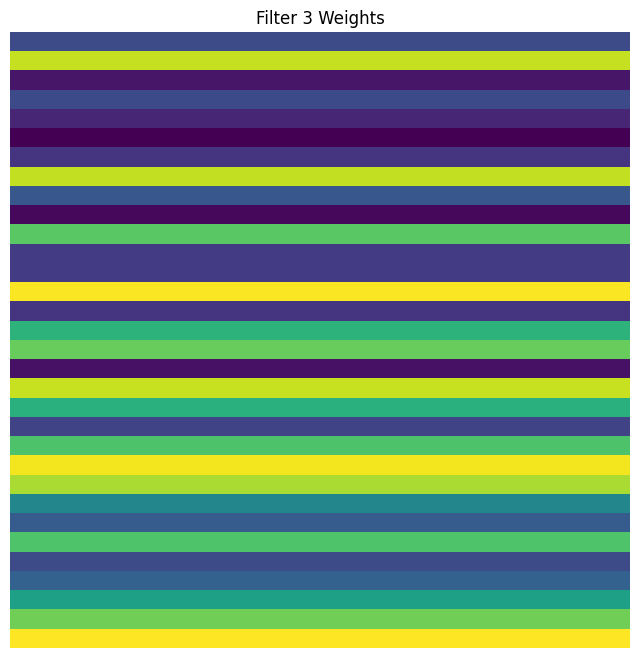

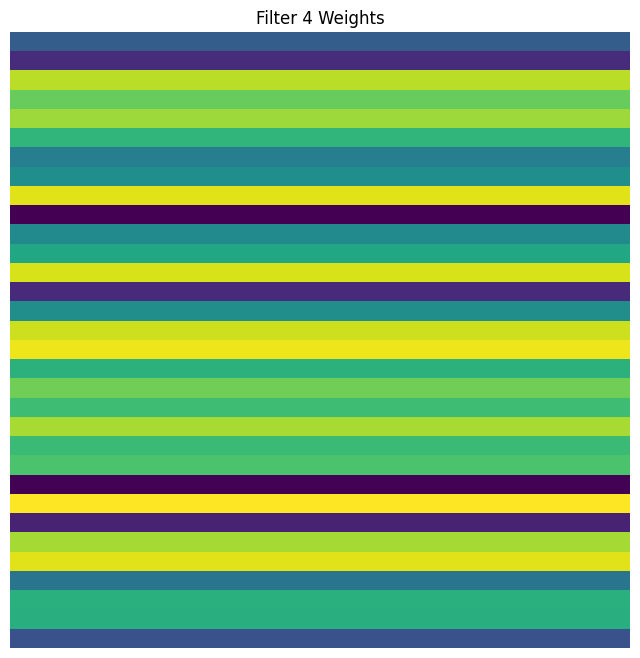

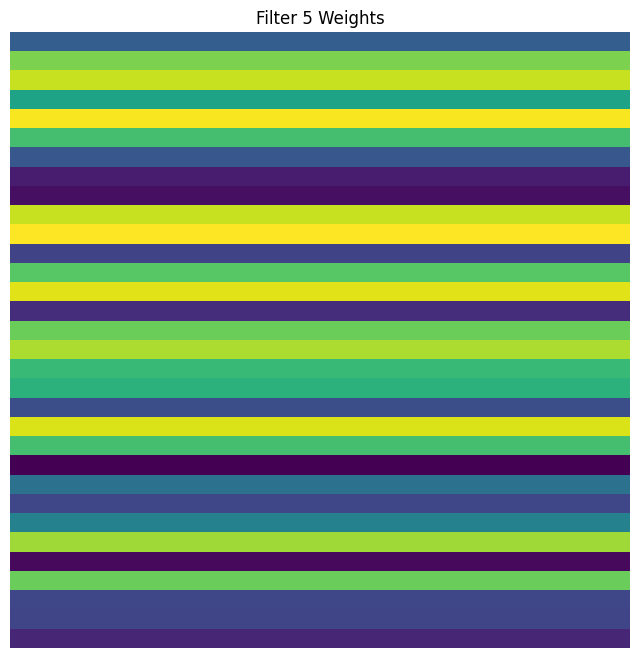

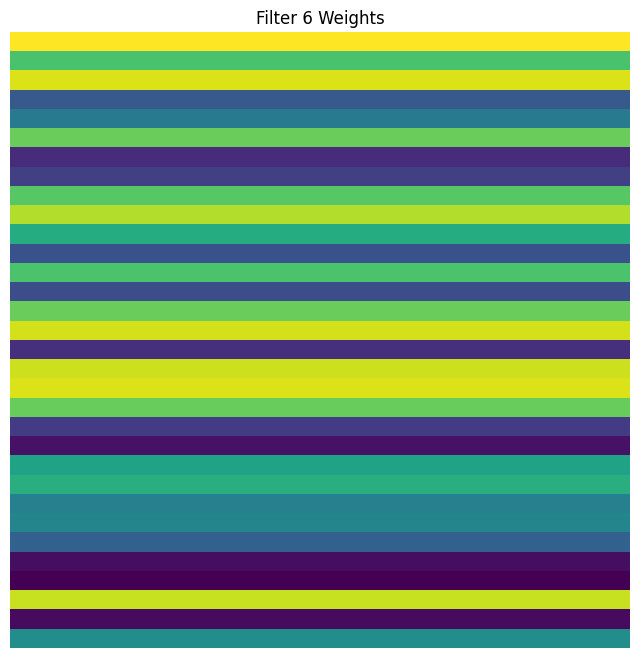

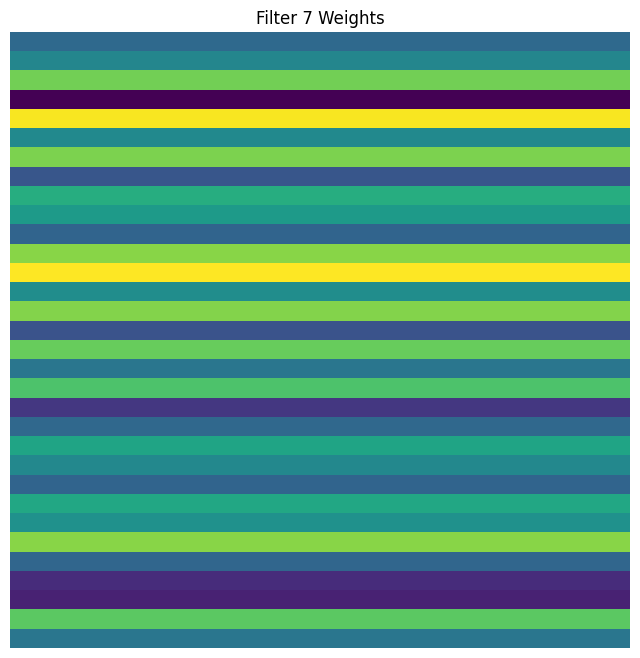

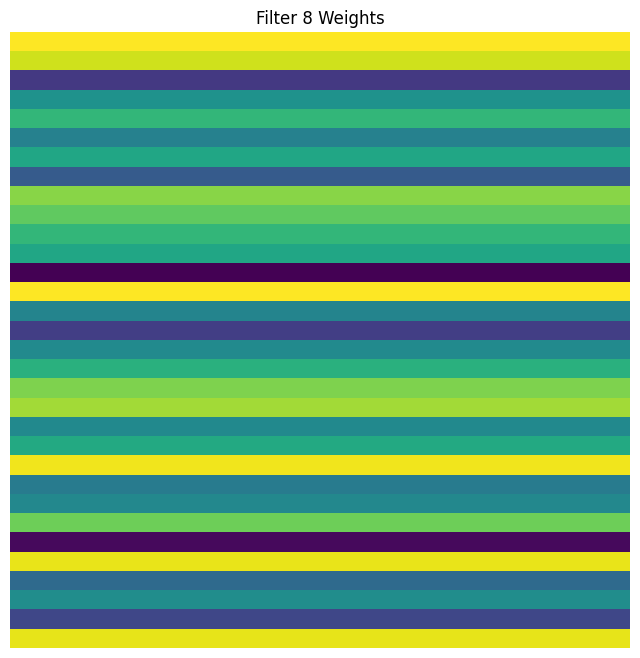

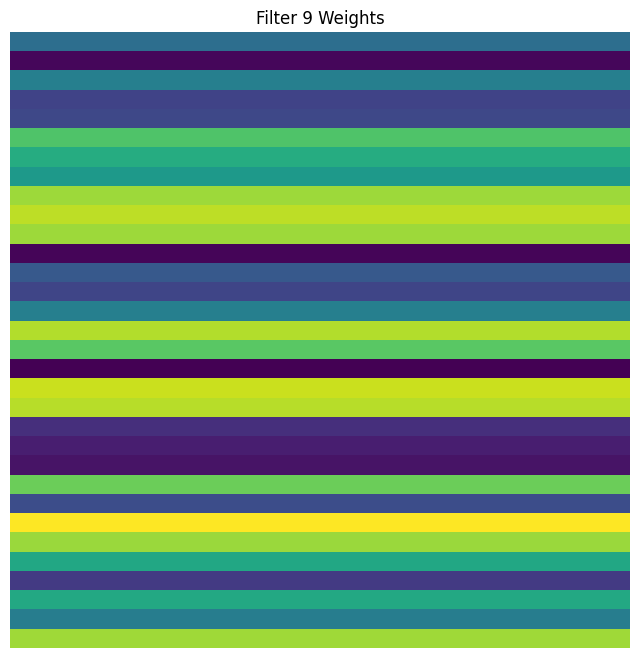

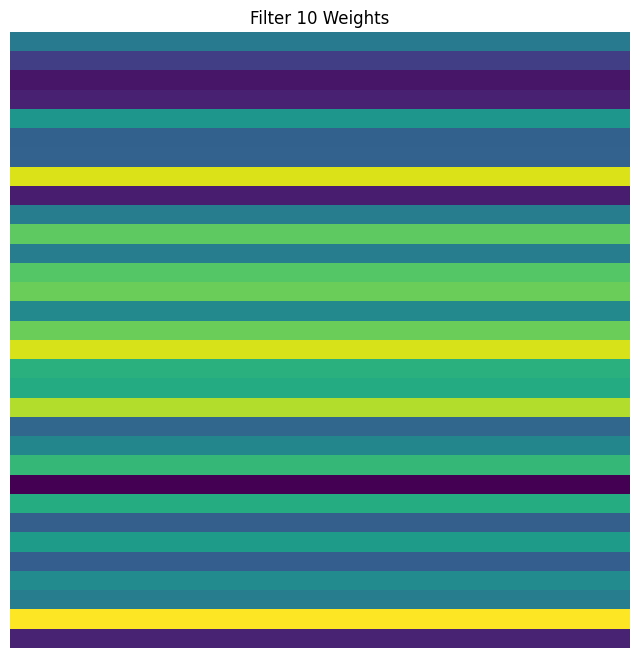

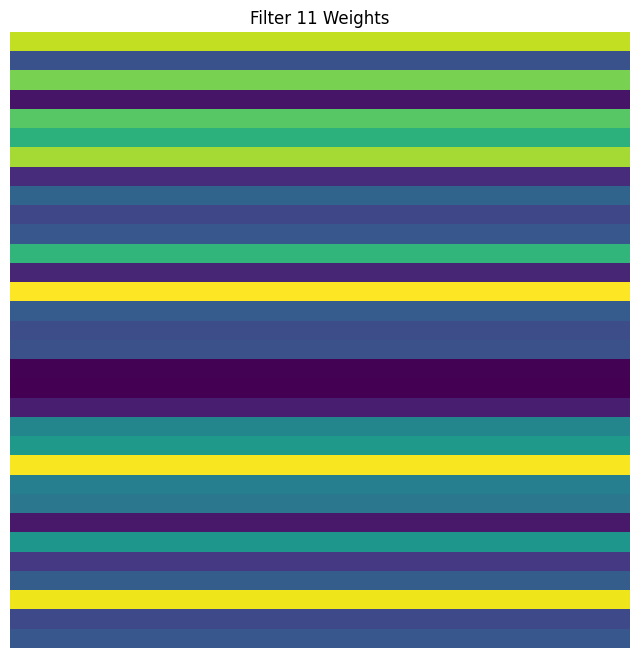

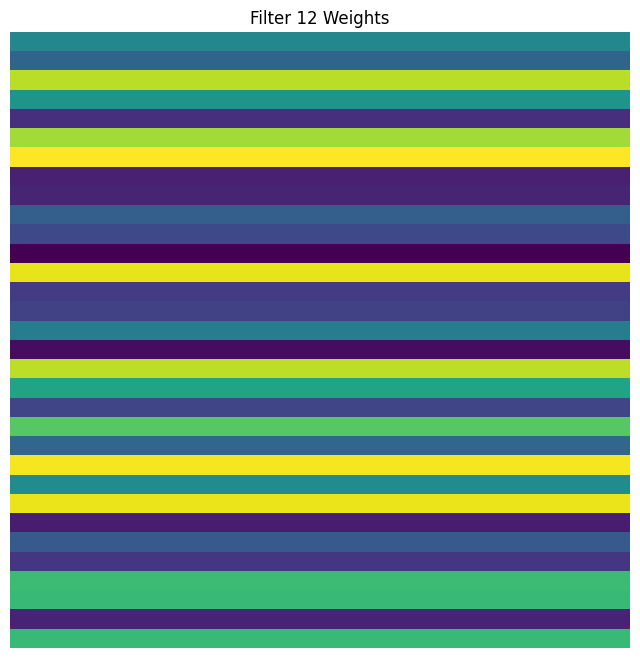

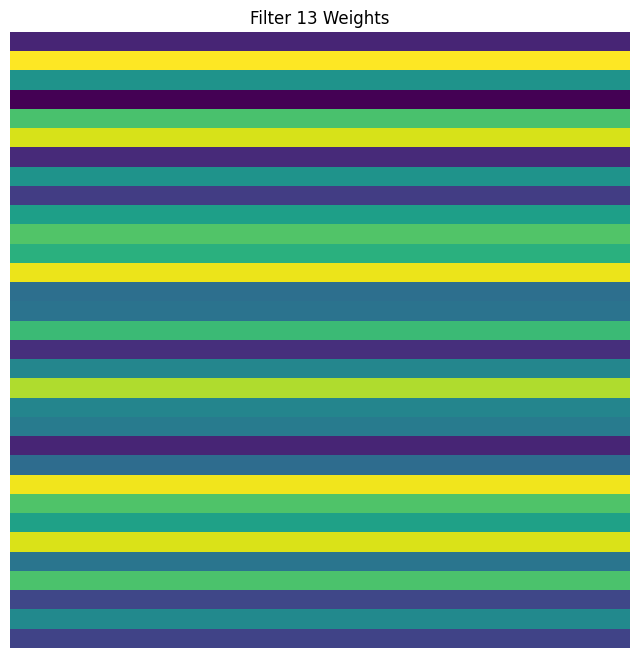

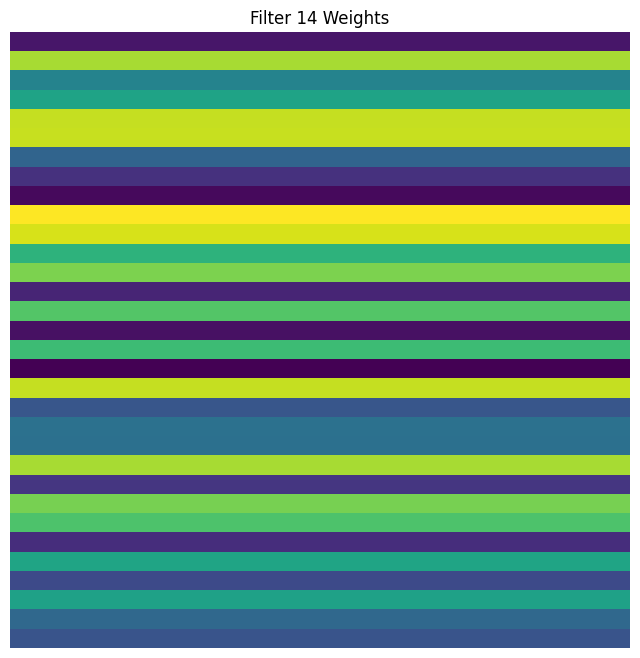

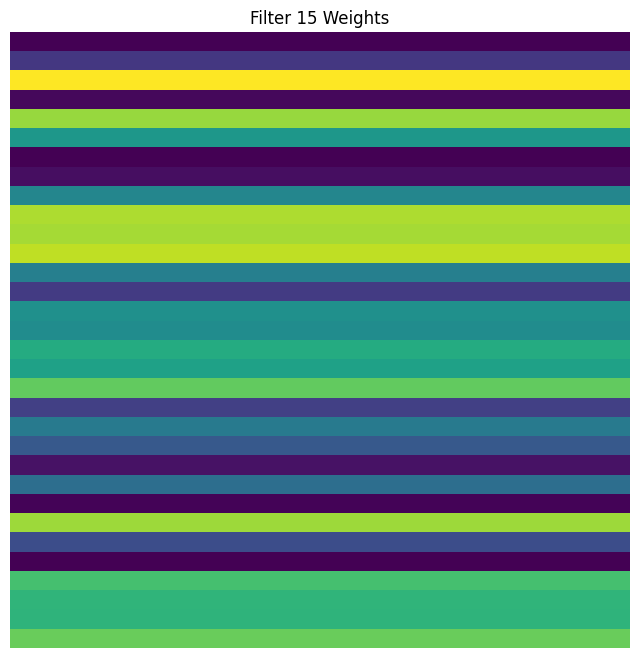

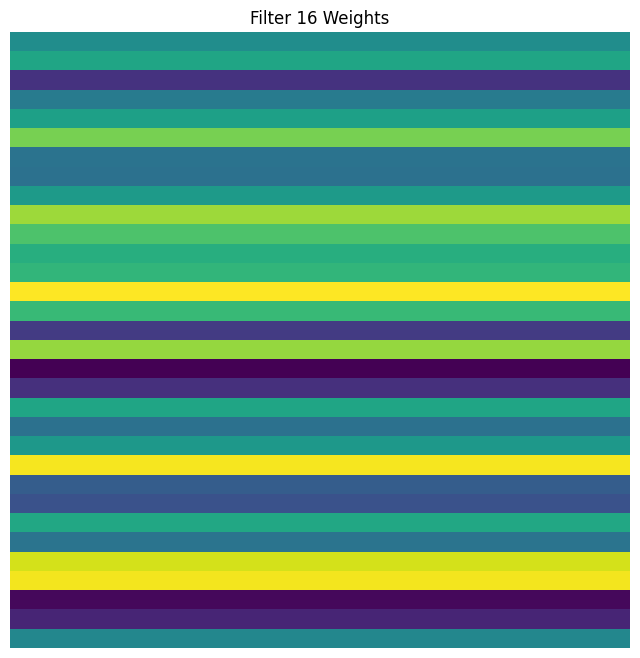

148/148 [==============================] - 0s 801us/step
F1 Score for Question 3: 0.9657669519420671

TRAIN QUESTION 4 MODEL
Index(['checkpoint_pct', 'cutscene_click_pct', 'map_click_pct',
       'map_hover_pct', 'navigate_click_pct', 'notification_click_pct',
       'object_click_pct', 'object_hover_pct', 'observation_click_pct',
       'person_click_pct', 'notebook_click_pct', 'elapsed_duration',
       'level_5_count', 'level_6_count', 'level_7_count', 'level_8_count',
       'level_9_count', 'level_10_count', 'level_11_count', 'level_12_count',
       'event_name_checkpoint_count', 'event_name_cutscene_click_count',
       'event_name_map_click_count', 'event_name_map_hover_count',
       'event_name_navigate_click_count',
       'event_name_notification_click_count', 'event_name_object_click_count',
       'event_name_object_hover_count', 'event_name_observation_click_count',
       'event_name_person_click_count', 'event_name_notebook_click_count',
       'name_basic_count', 'nam

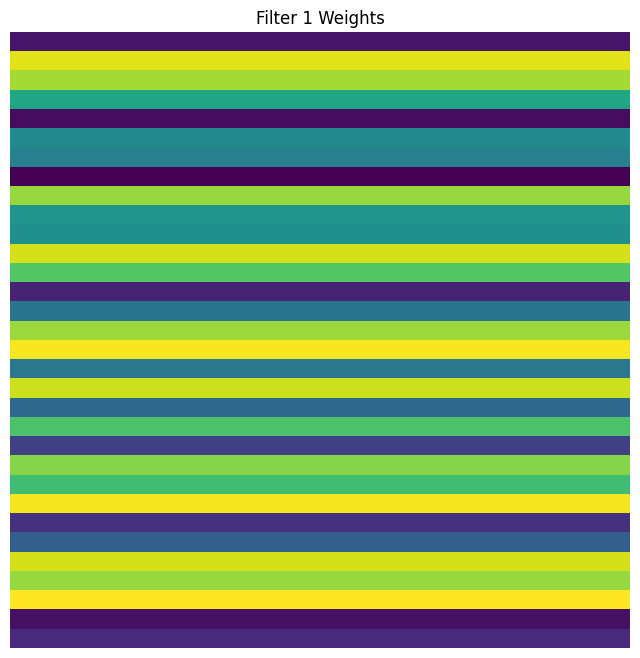

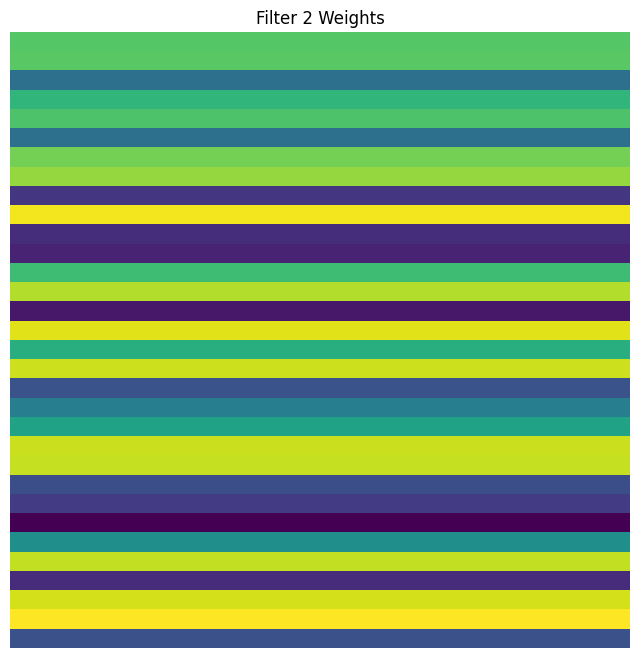

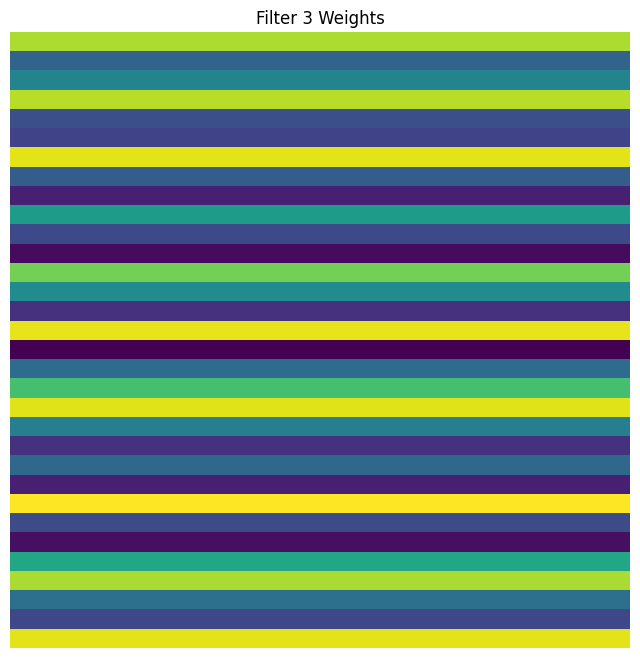

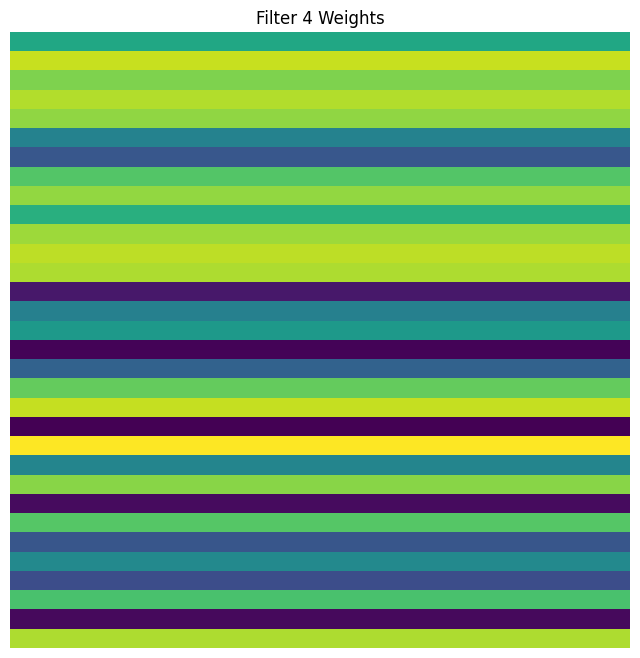

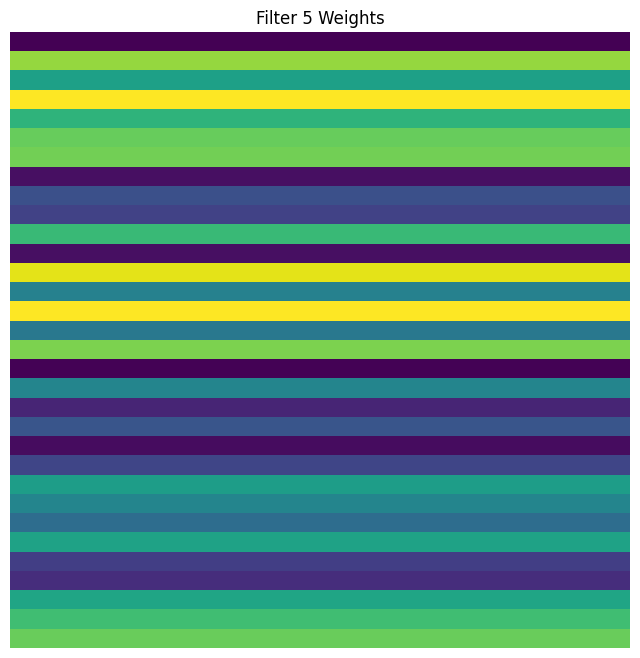

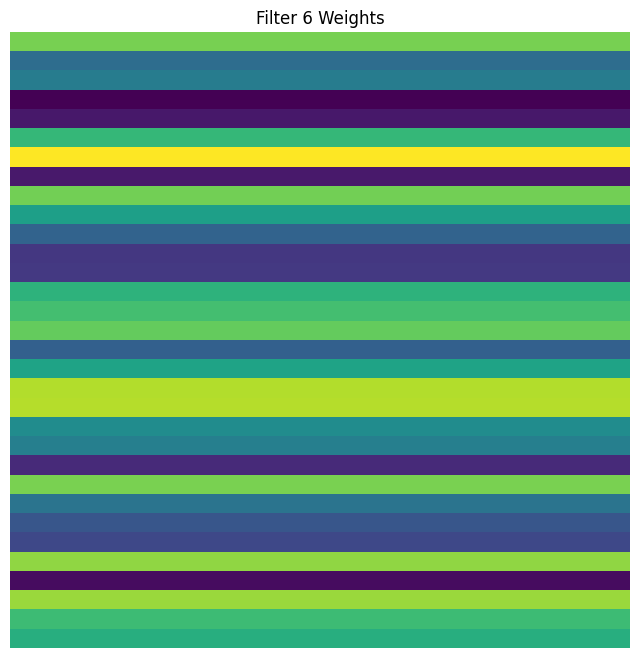

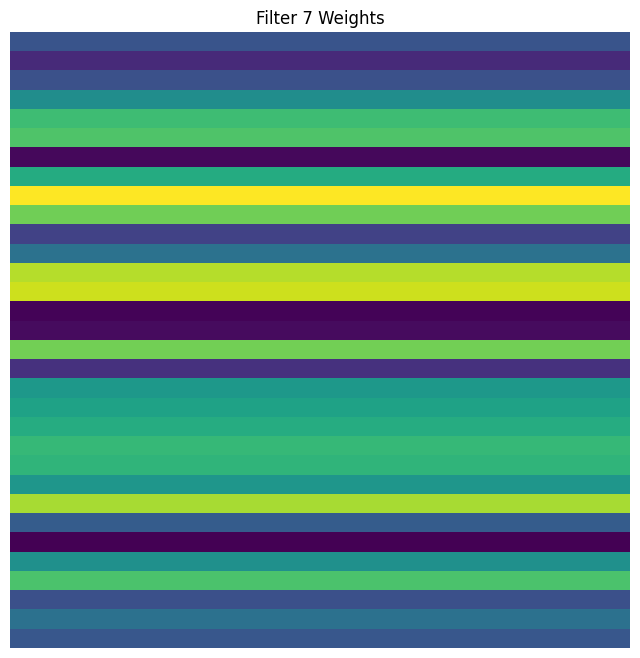

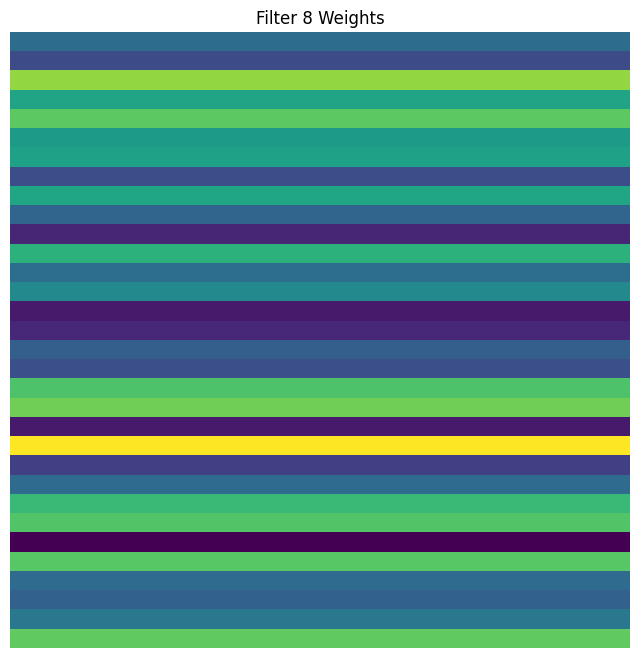

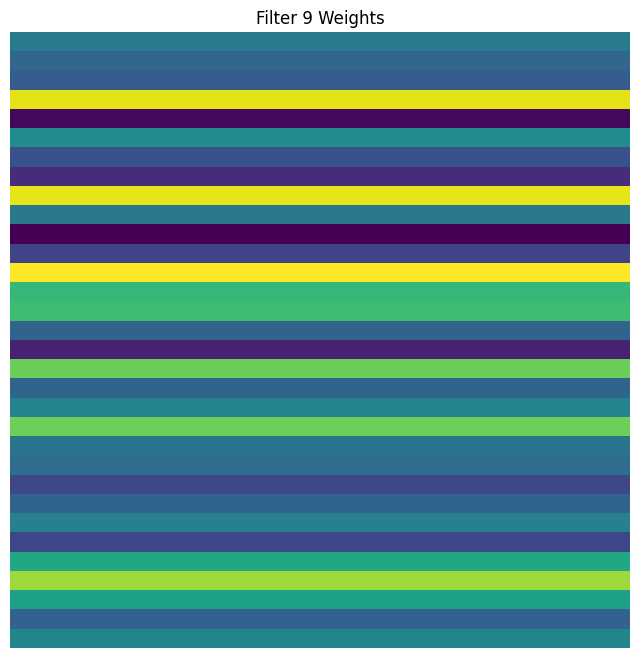

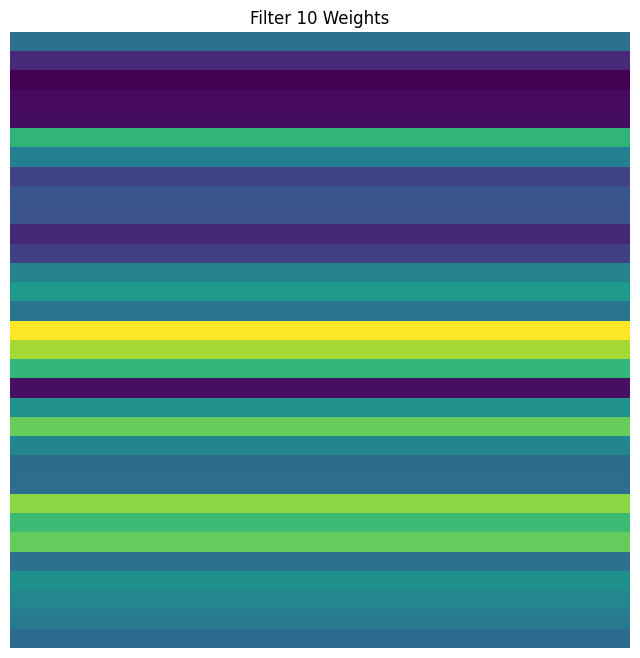

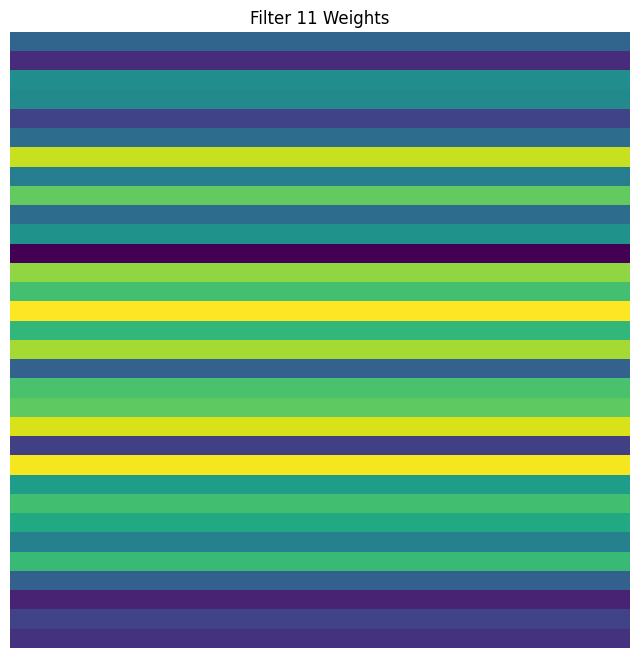

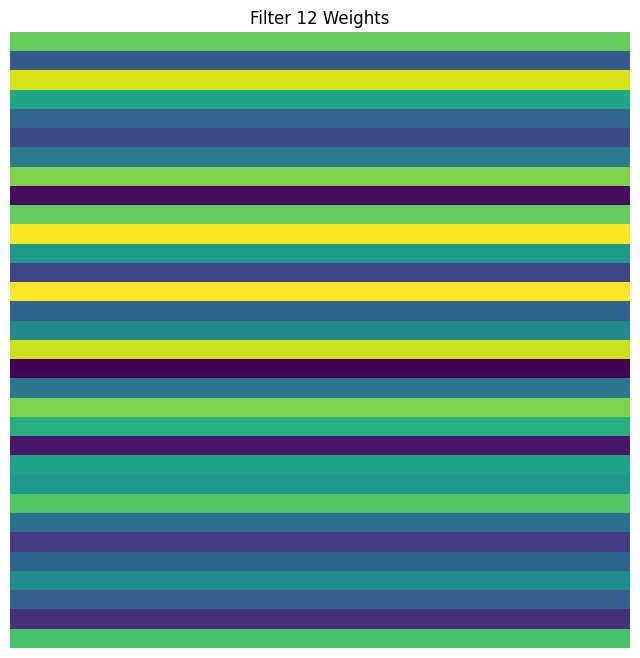

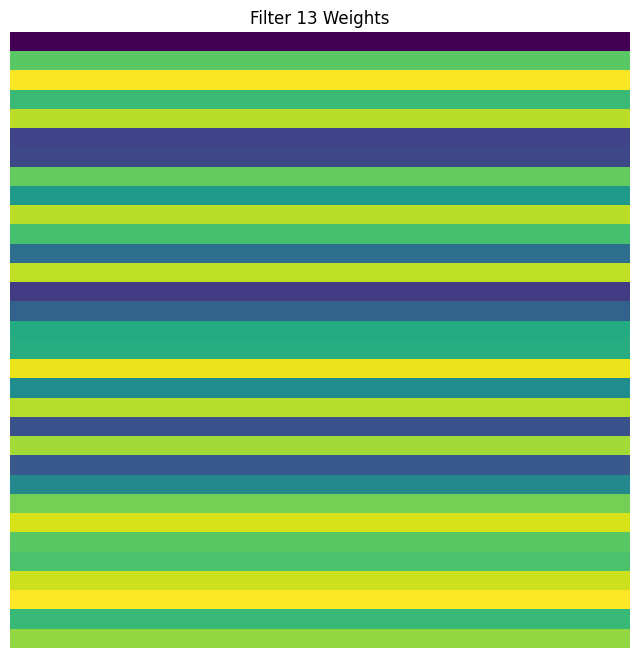

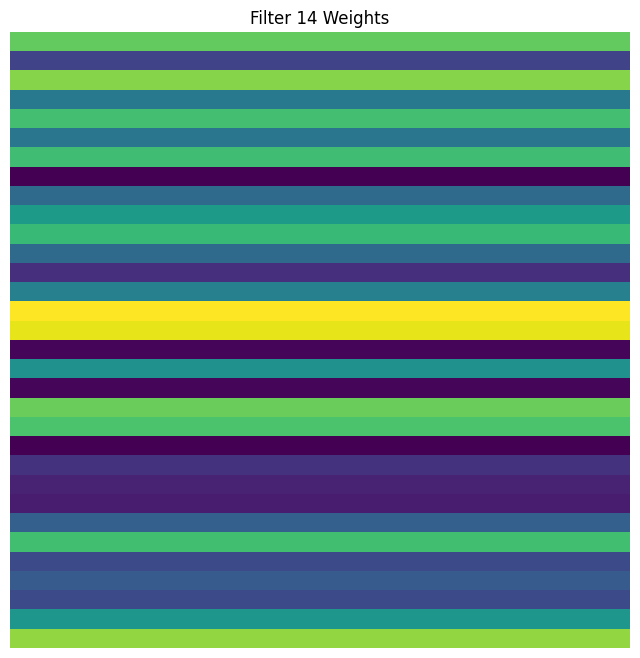

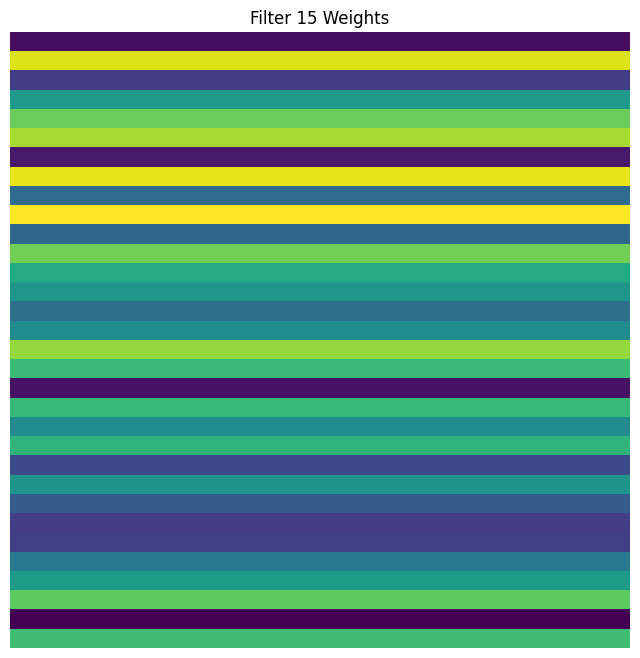

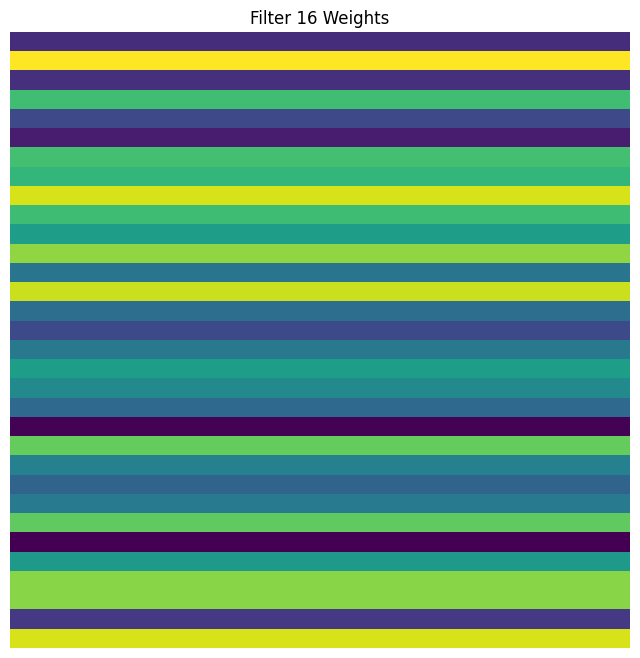

148/148 [==============================] - 0s 806us/step
F1 Score for Question 4: 0.8880986249407302

TRAIN QUESTION 5 MODEL
Index(['checkpoint_pct', 'cutscene_click_pct', 'map_click_pct',
       'map_hover_pct', 'navigate_click_pct', 'notification_click_pct',
       'object_click_pct', 'object_hover_pct', 'observation_click_pct',
       'person_click_pct', 'notebook_click_pct', 'elapsed_duration',
       'level_5_count', 'level_6_count', 'level_7_count', 'level_8_count',
       'level_9_count', 'level_10_count', 'level_11_count', 'level_12_count',
       'event_name_checkpoint_count', 'event_name_cutscene_click_count',
       'event_name_map_click_count', 'event_name_map_hover_count',
       'event_name_navigate_click_count',
       'event_name_notification_click_count', 'event_name_object_click_count',
       'event_name_object_hover_count', 'event_name_observation_click_count',
       'event_name_person_click_count', 'event_name_notebook_click_count',
       'name_basic_count', 'nam

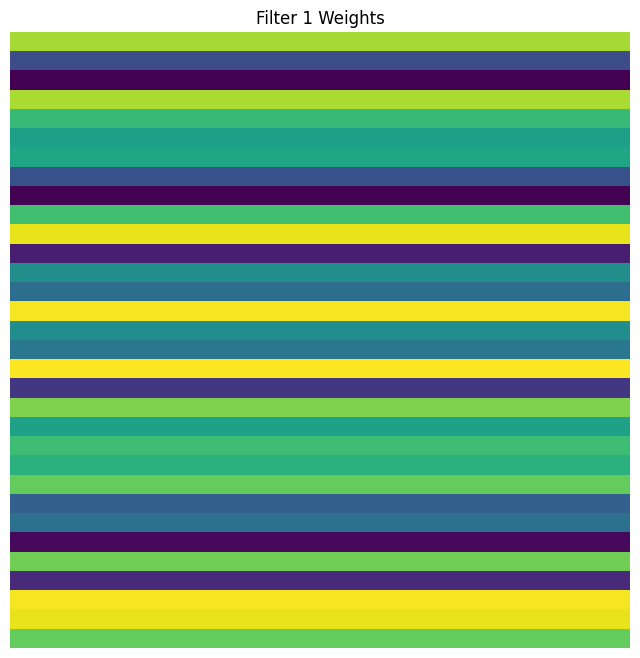

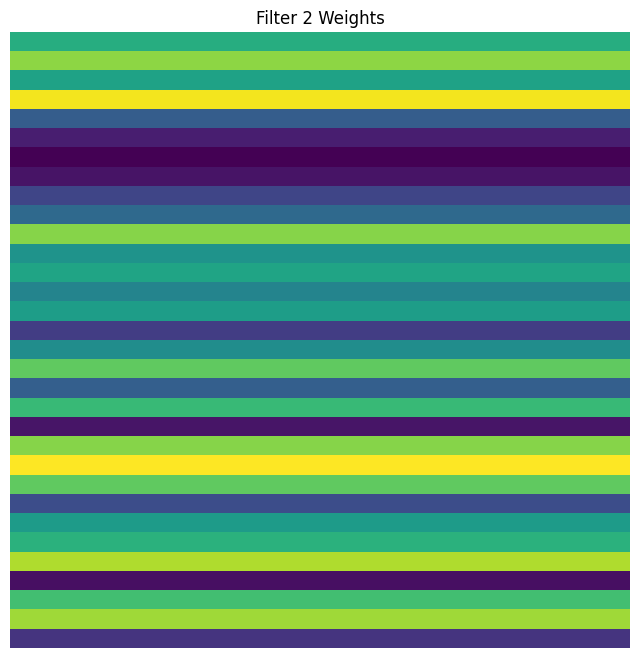

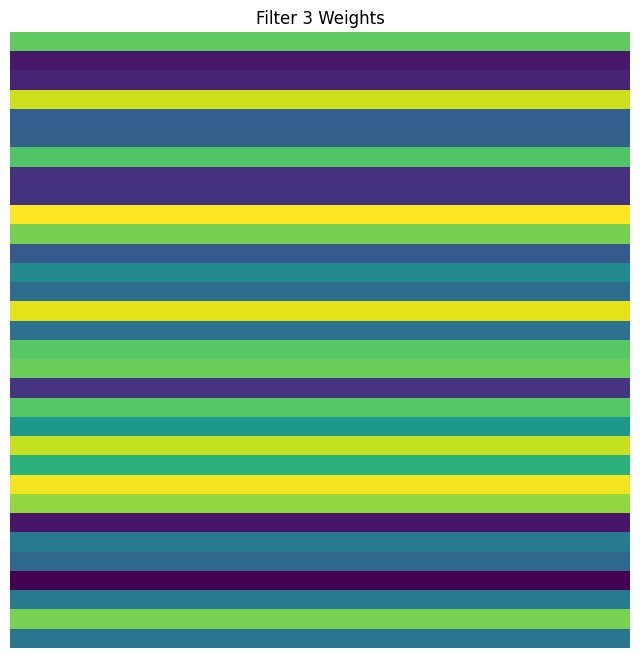

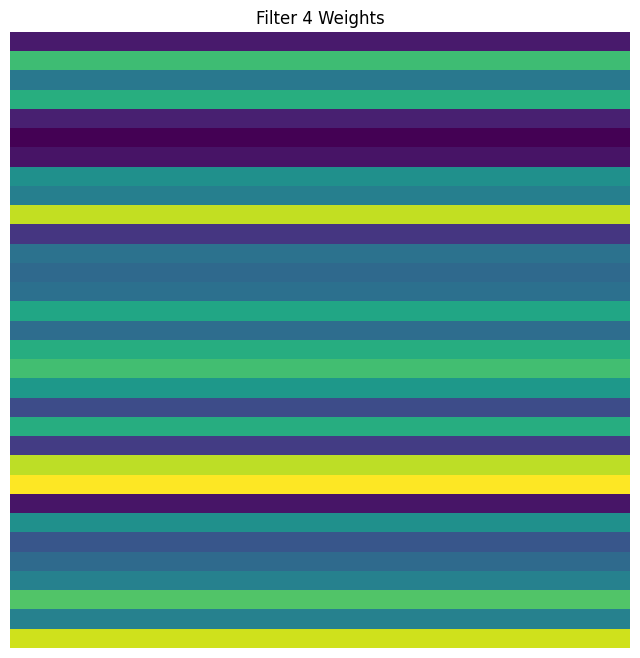

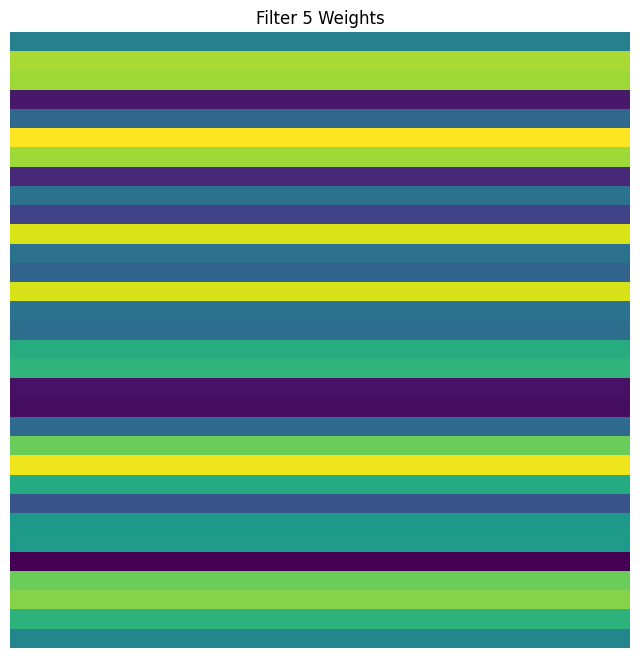

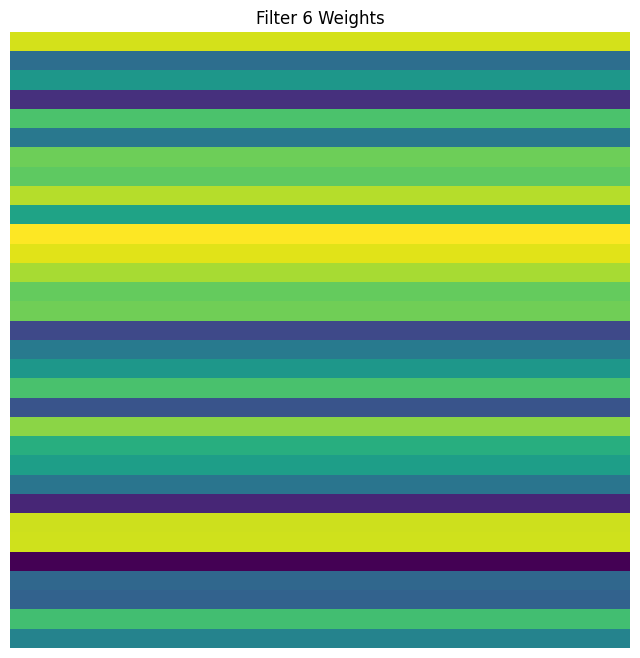

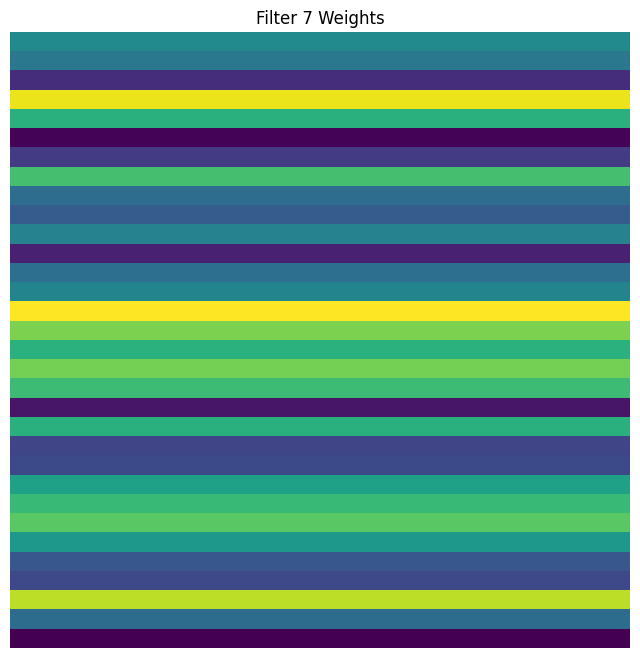

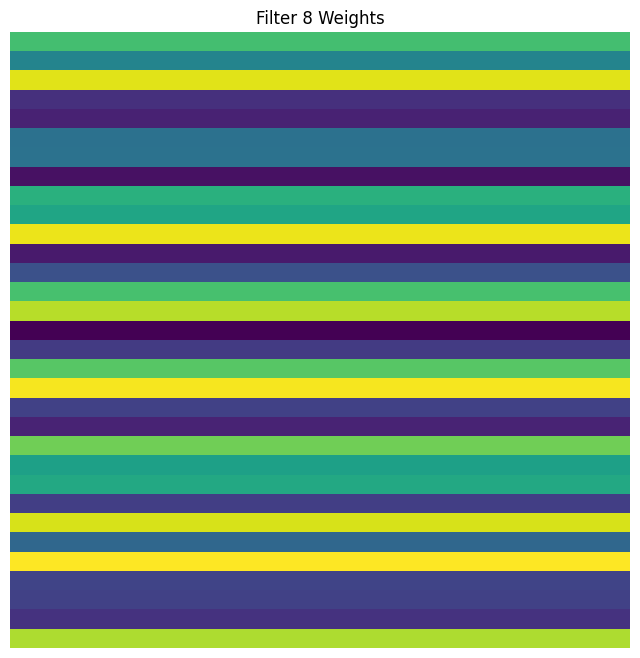

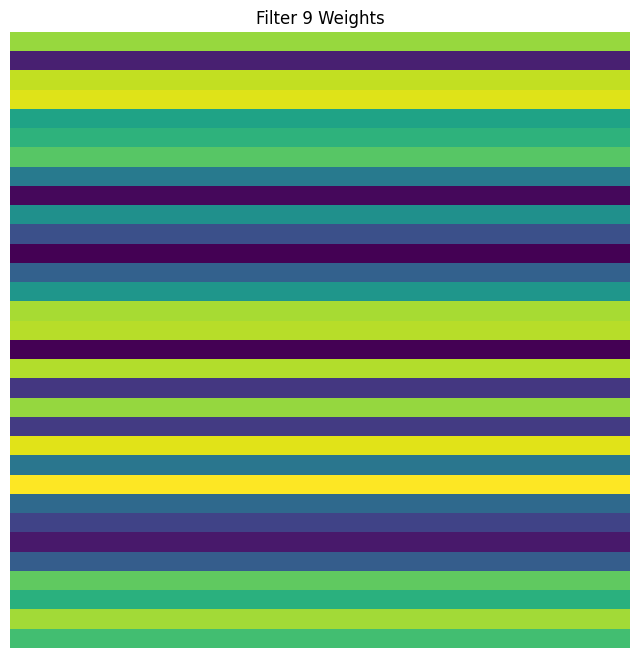

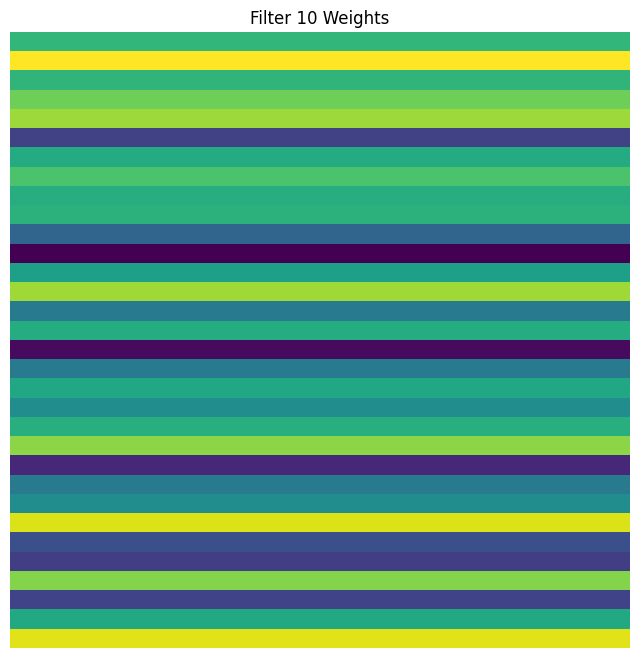

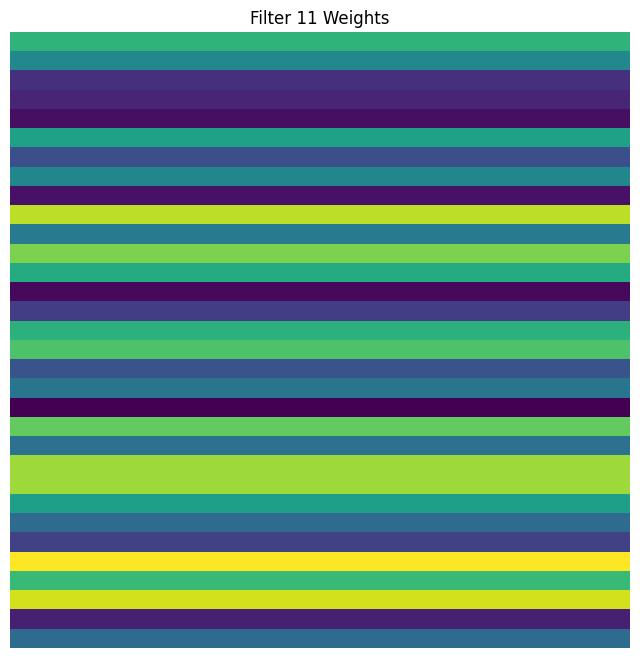

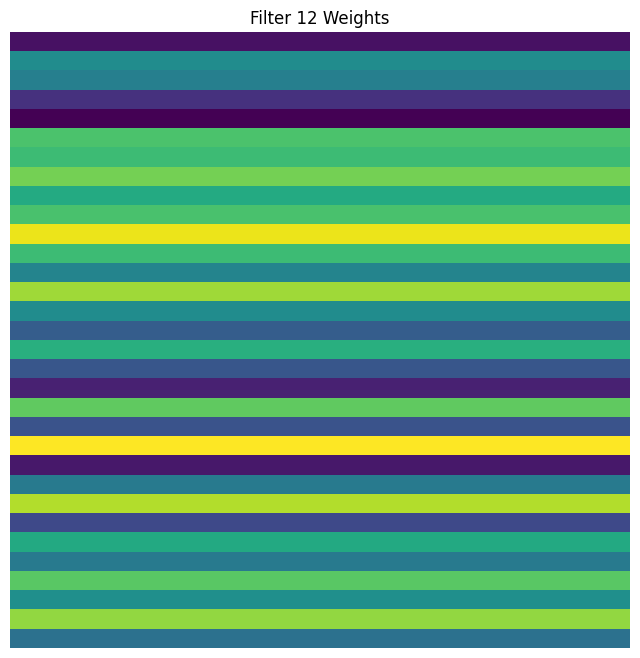

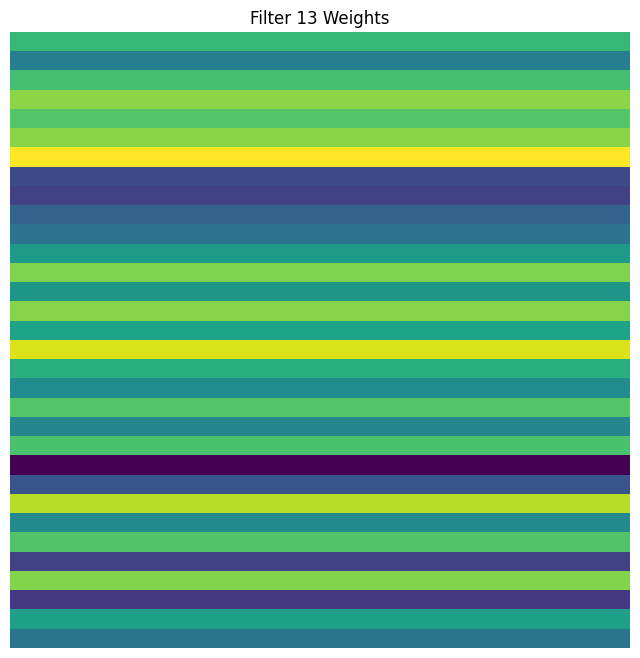

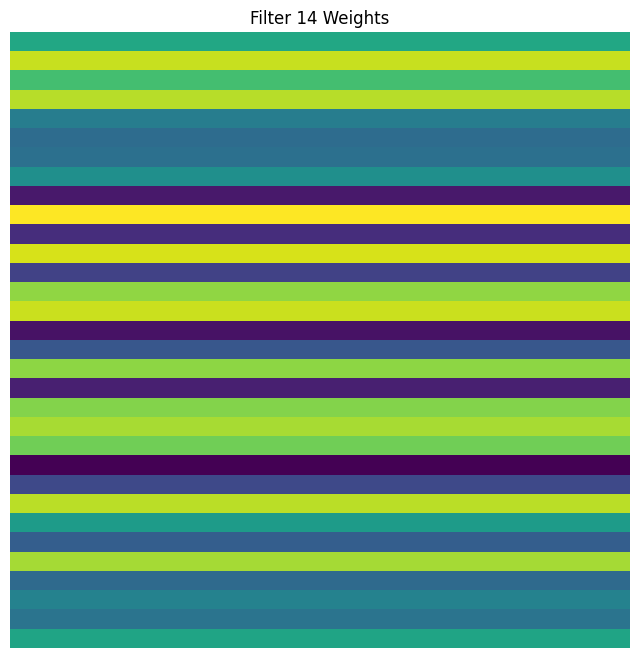

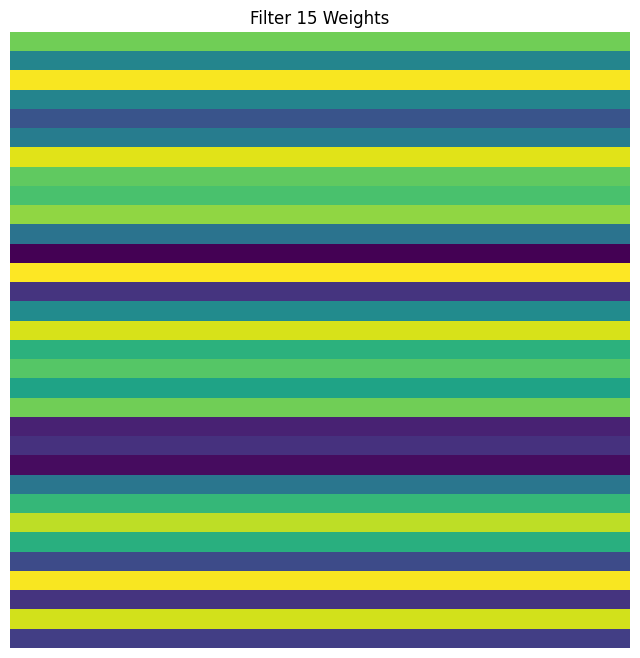

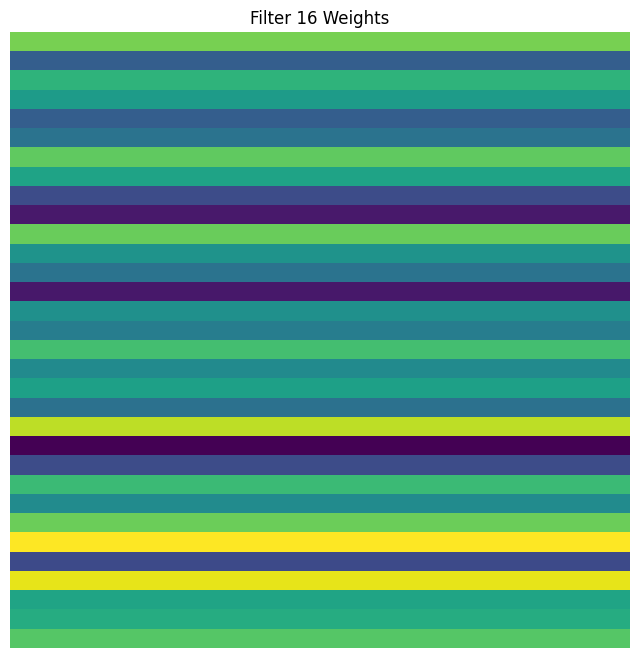

148/148 [==============================] - 0s 805us/step
F1 Score for Question 5: 0.6927263730826323

TRAIN QUESTION 6 MODEL
Index(['checkpoint_pct', 'cutscene_click_pct', 'map_click_pct',
       'map_hover_pct', 'navigate_click_pct', 'notification_click_pct',
       'object_click_pct', 'object_hover_pct', 'observation_click_pct',
       'person_click_pct', 'notebook_click_pct', 'elapsed_duration',
       'level_5_count', 'level_6_count', 'level_7_count', 'level_8_count',
       'level_9_count', 'level_10_count', 'level_11_count', 'level_12_count',
       'event_name_checkpoint_count', 'event_name_cutscene_click_count',
       'event_name_map_click_count', 'event_name_map_hover_count',
       'event_name_navigate_click_count',
       'event_name_notification_click_count', 'event_name_object_click_count',
       'event_name_object_hover_count', 'event_name_observation_click_count',
       'event_name_person_click_count', 'event_name_notebook_click_count',
       'name_basic_count', 'nam

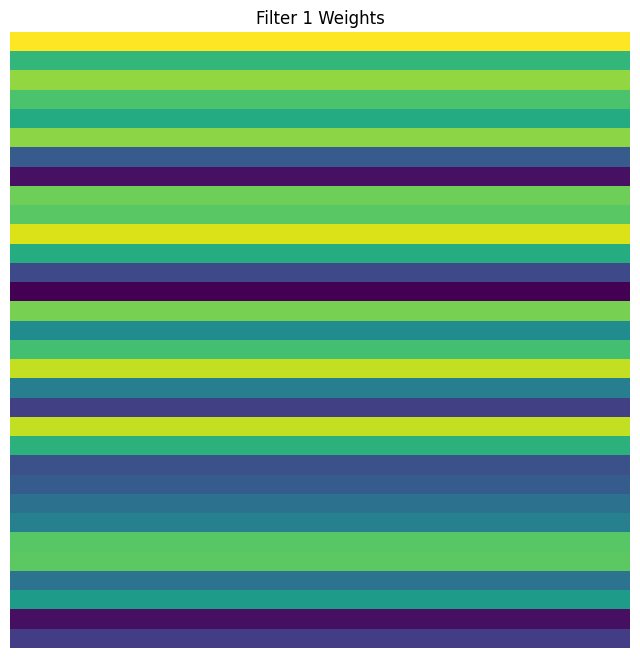

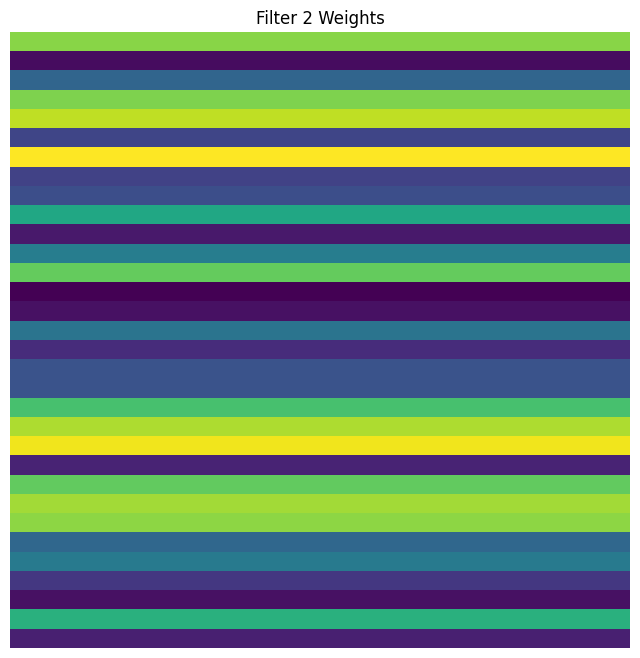

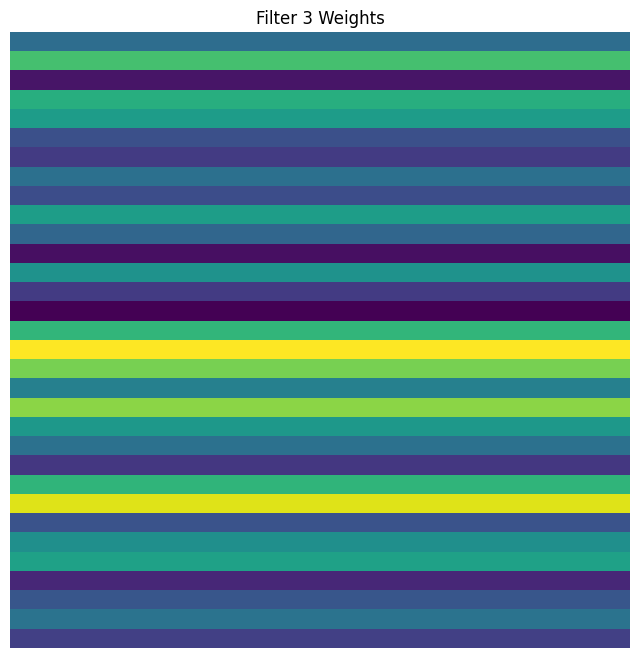

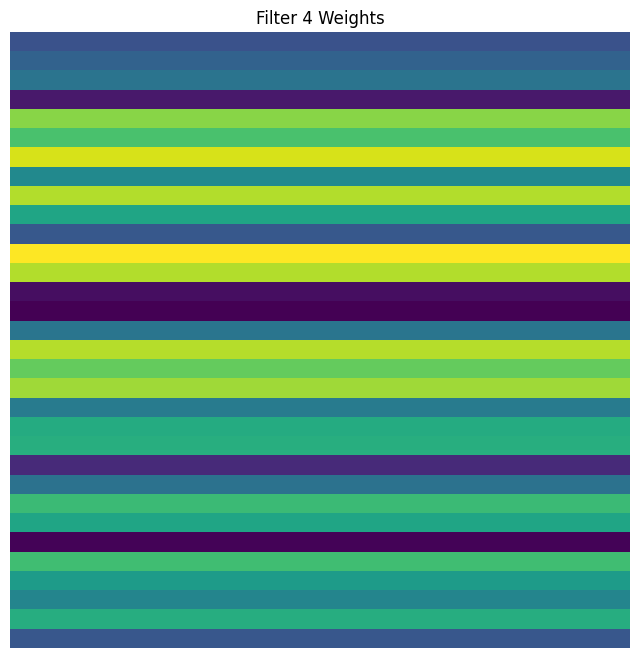

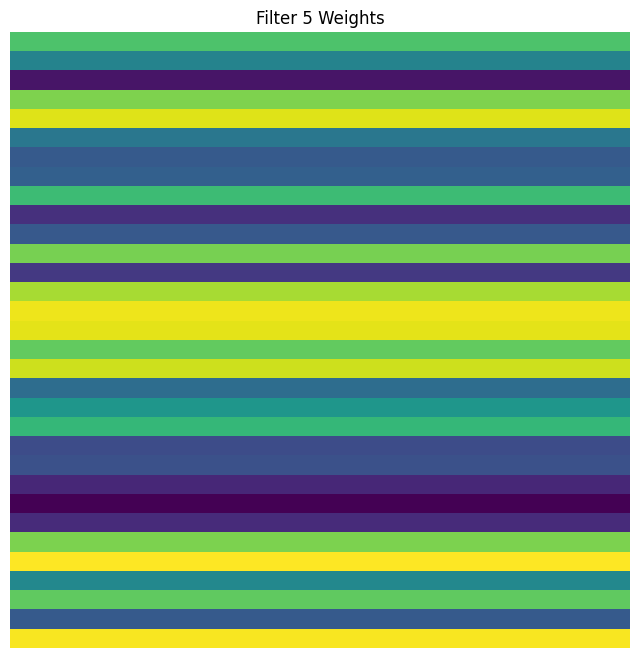

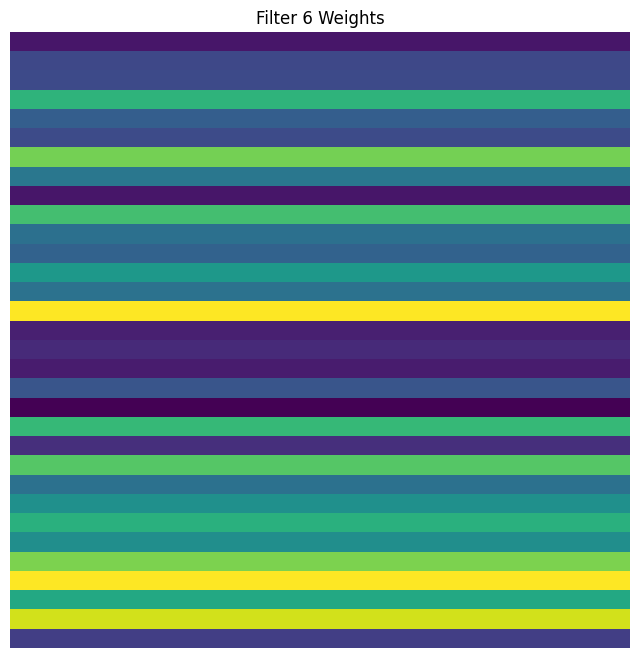

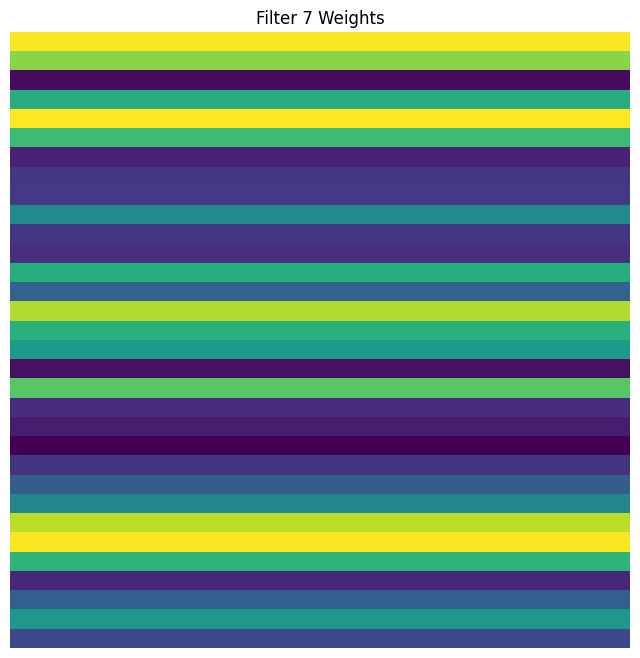

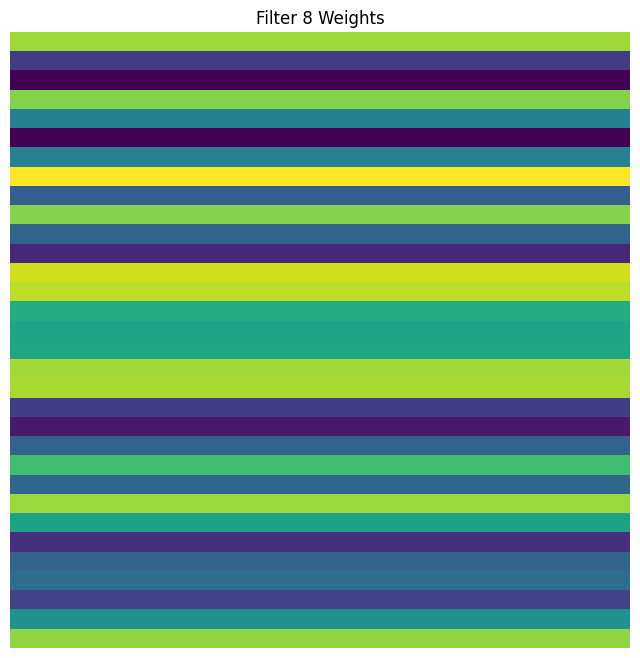

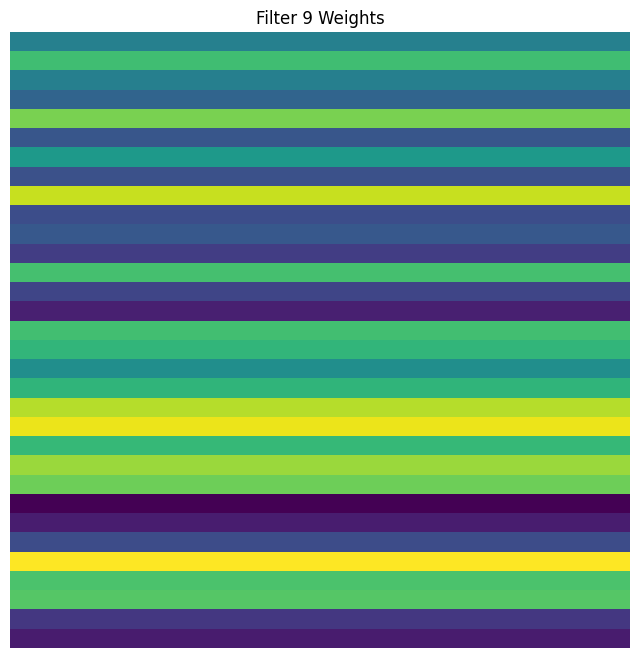

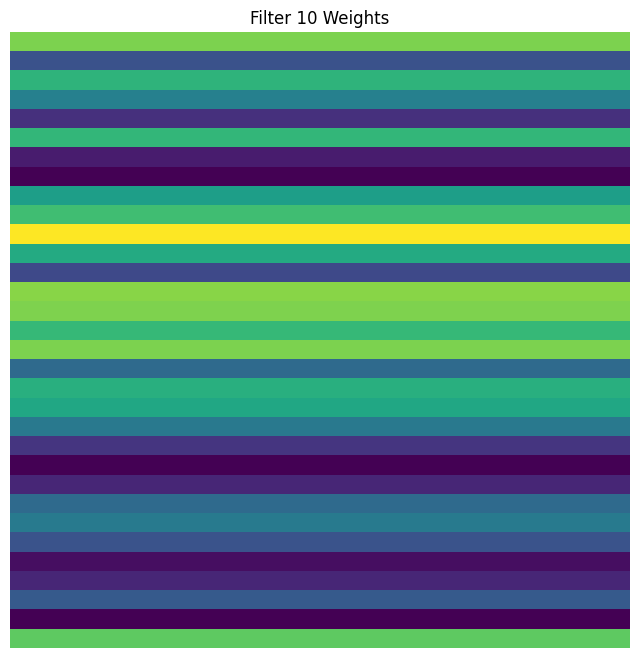

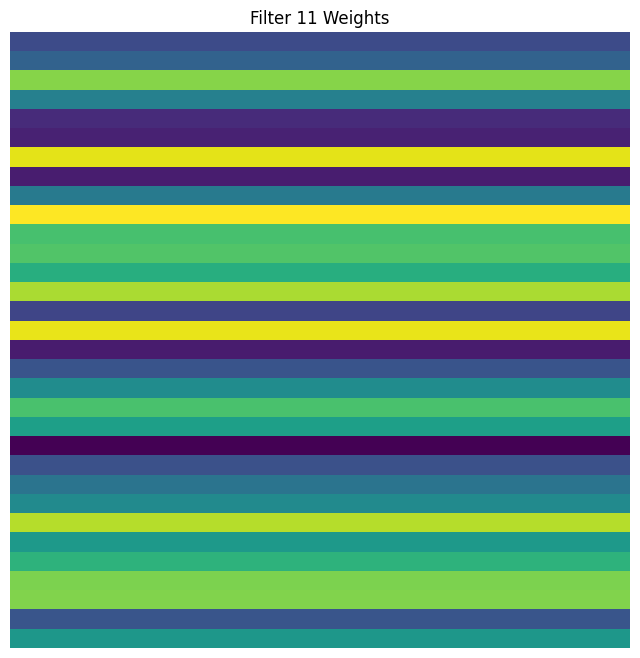

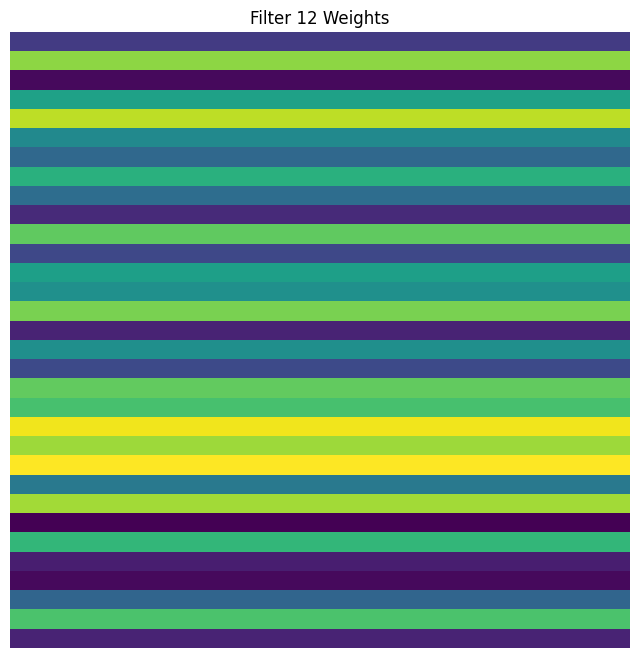

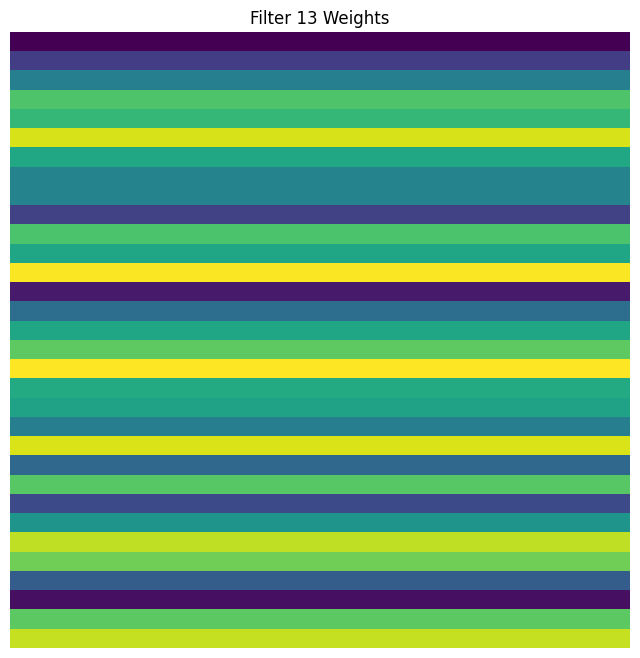

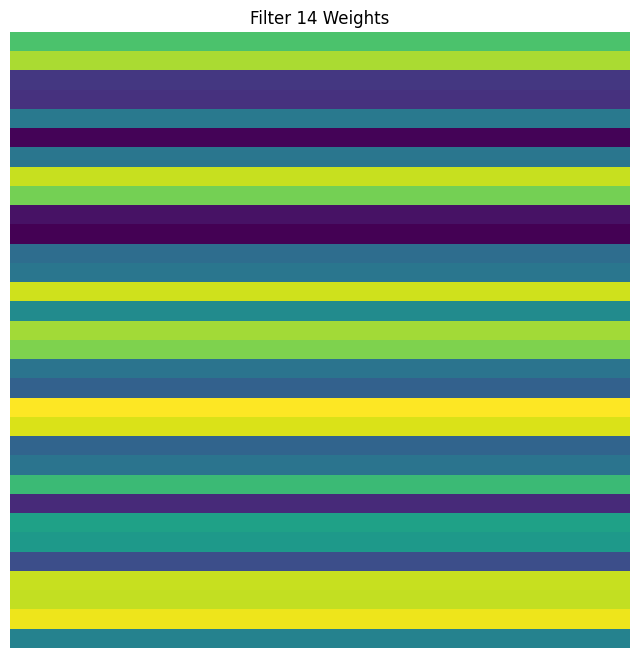

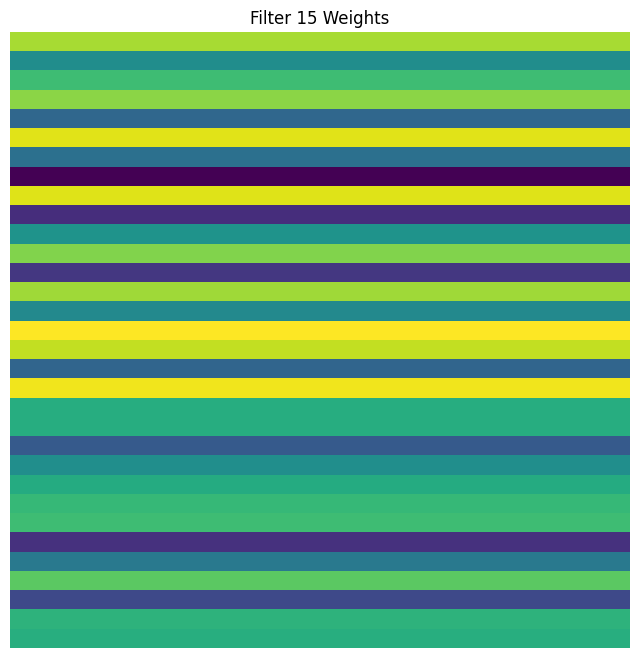

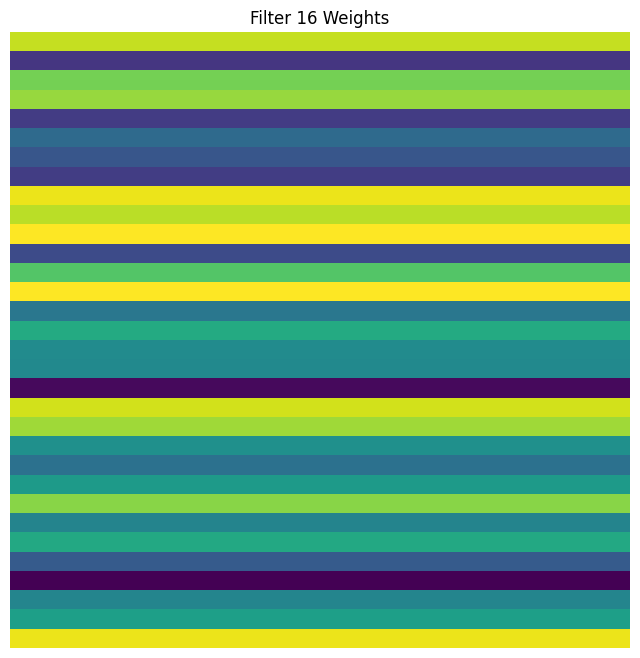

148/148 [==============================] - 0s 803us/step
F1 Score for Question 6: 0.8783622946917401

TRAIN QUESTION 7 MODEL
Index(['checkpoint_pct', 'cutscene_click_pct', 'map_click_pct',
       'map_hover_pct', 'navigate_click_pct', 'notification_click_pct',
       'object_click_pct', 'object_hover_pct', 'observation_click_pct',
       'person_click_pct', 'notebook_click_pct', 'elapsed_duration',
       'level_5_count', 'level_6_count', 'level_7_count', 'level_8_count',
       'level_9_count', 'level_10_count', 'level_11_count', 'level_12_count',
       'event_name_checkpoint_count', 'event_name_cutscene_click_count',
       'event_name_map_click_count', 'event_name_map_hover_count',
       'event_name_navigate_click_count',
       'event_name_notification_click_count', 'event_name_object_click_count',
       'event_name_object_hover_count', 'event_name_observation_click_count',
       'event_name_person_click_count', 'event_name_notebook_click_count',
       'name_basic_count', 'nam

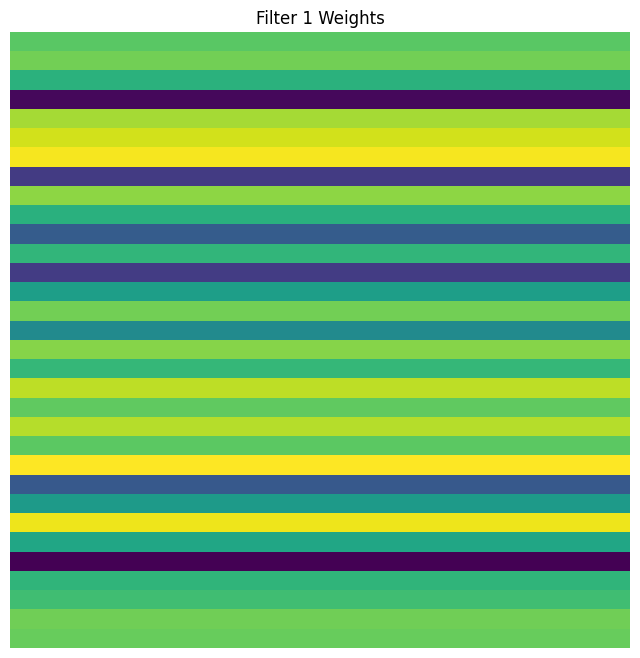

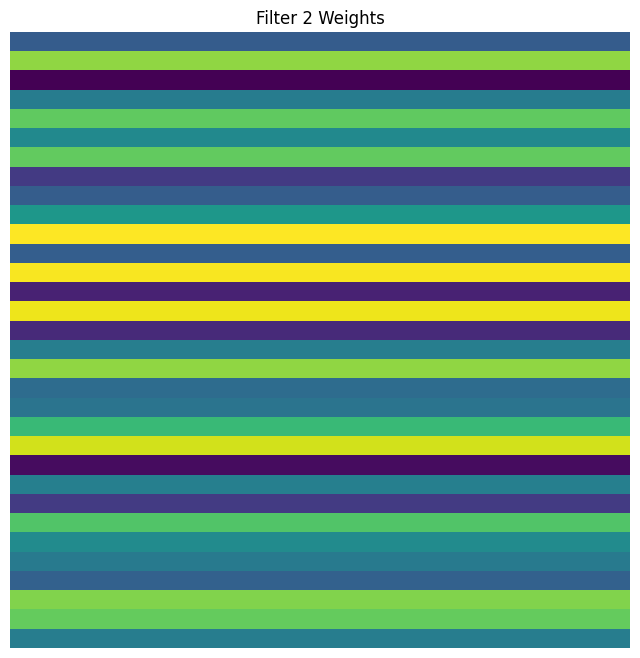

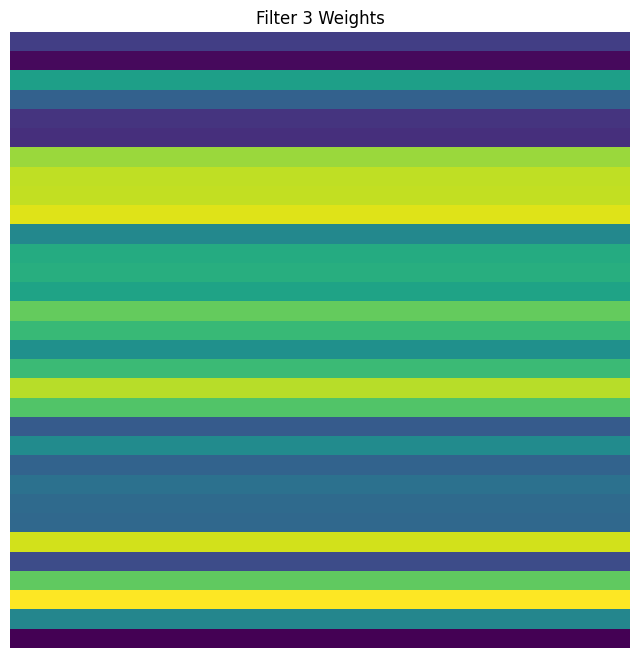

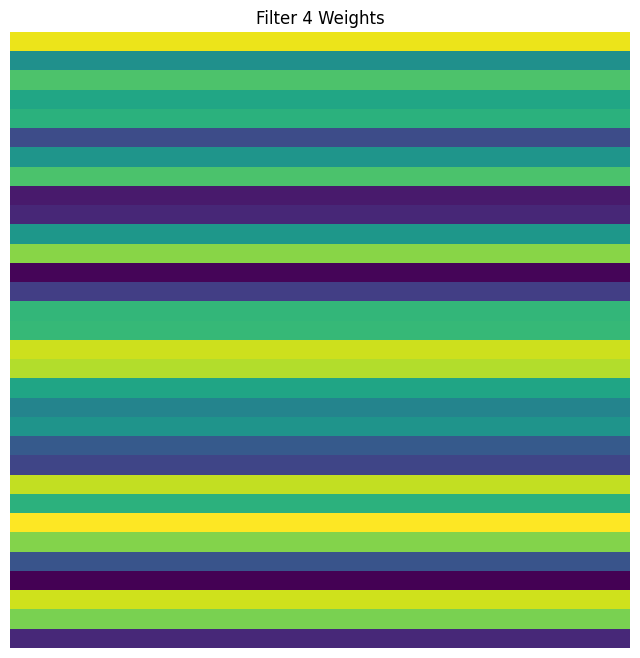

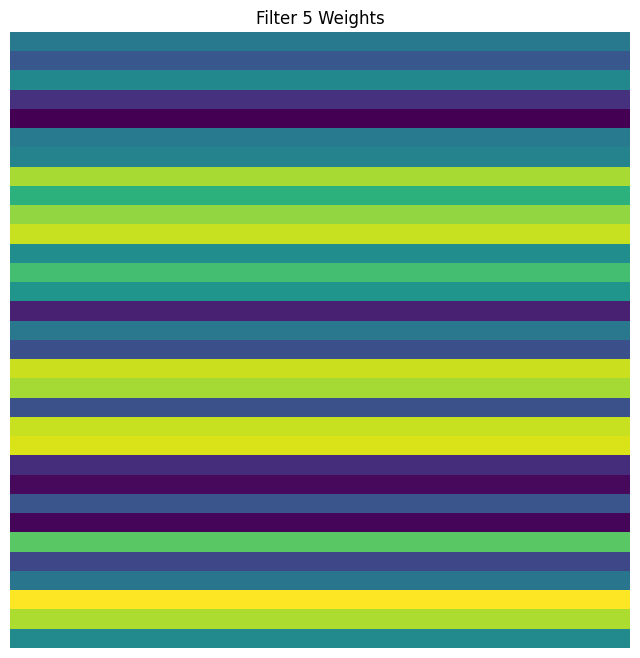

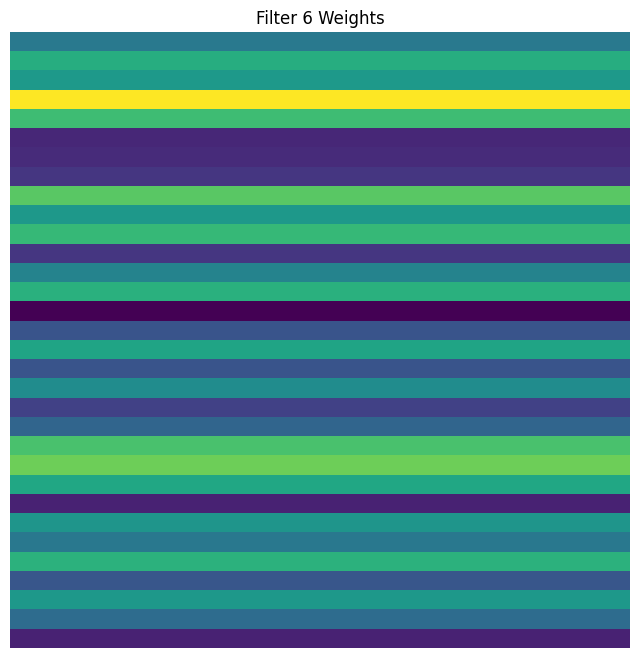

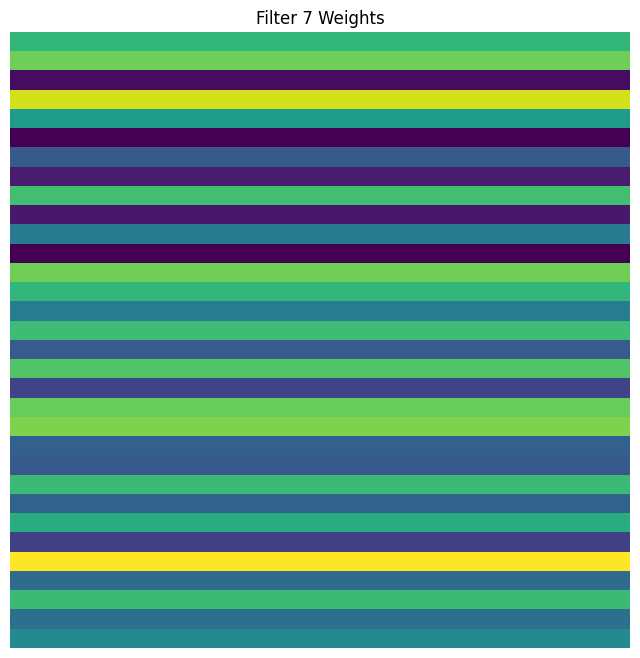

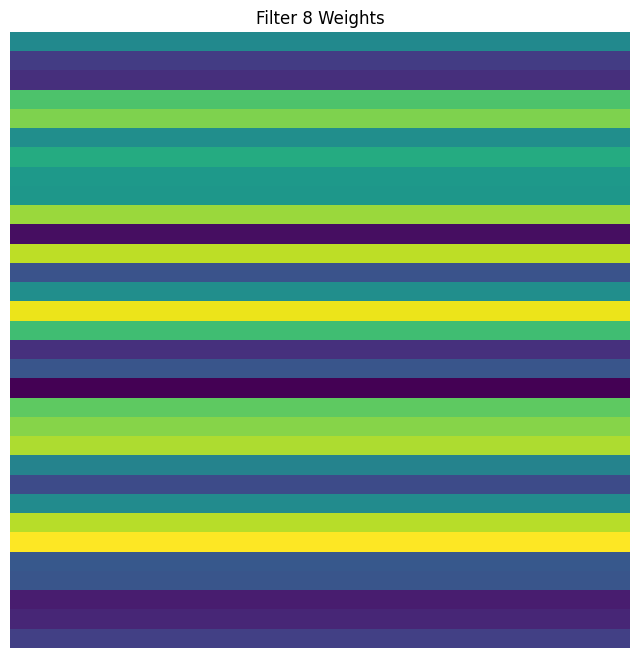

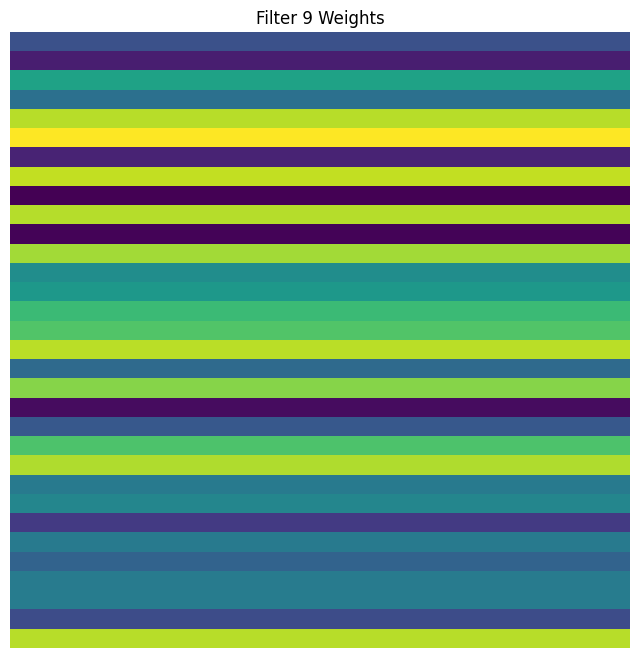

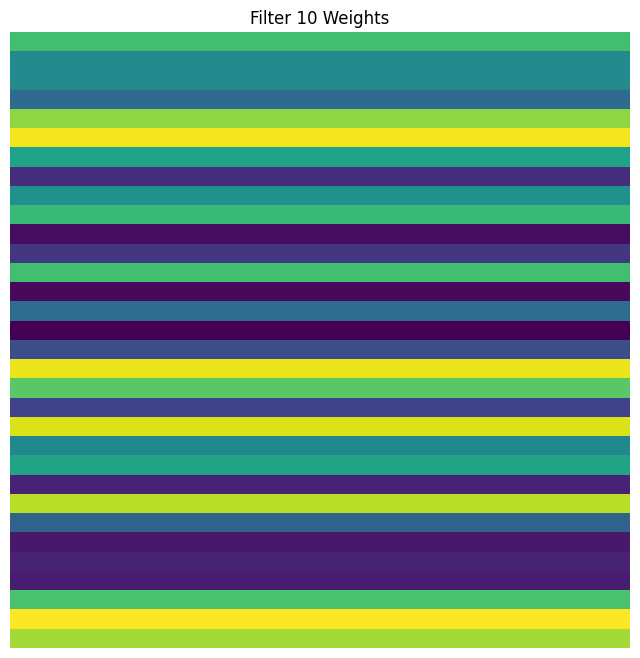

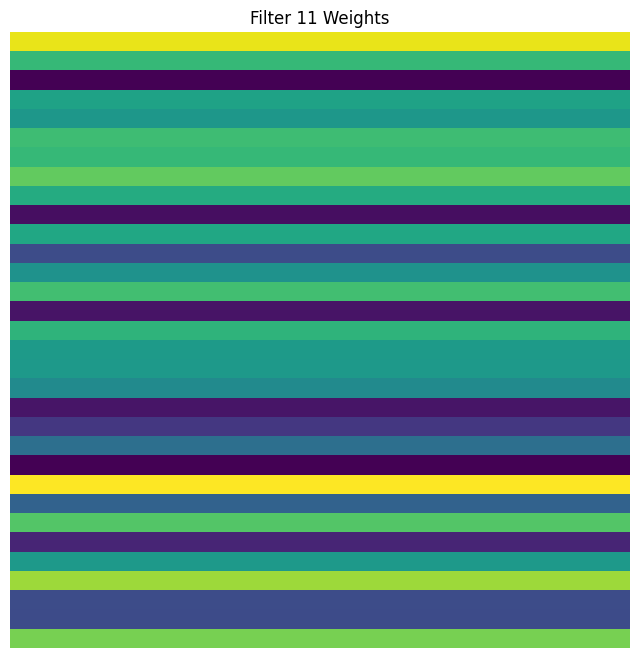

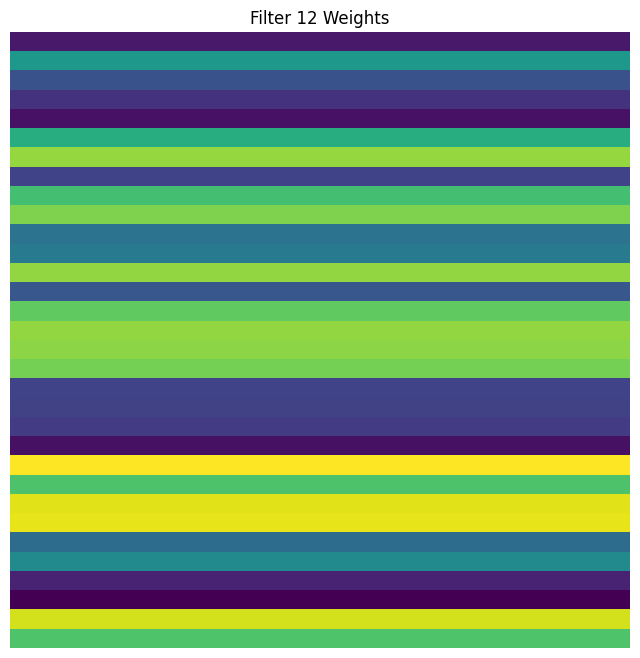

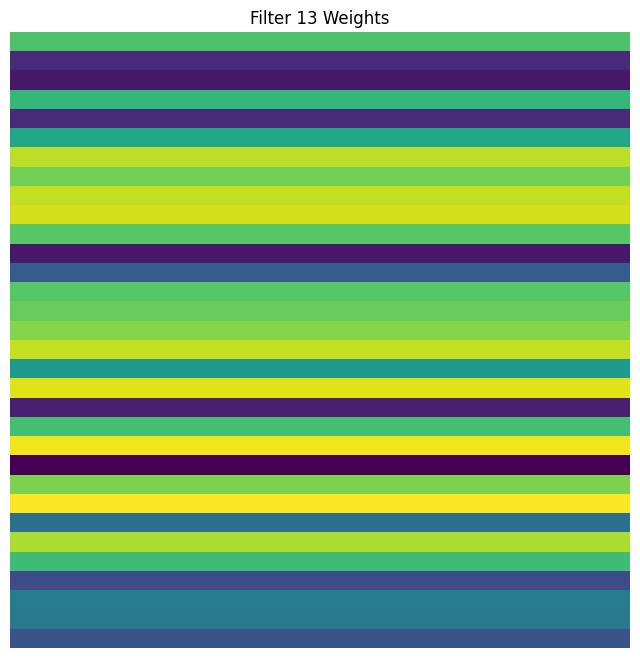

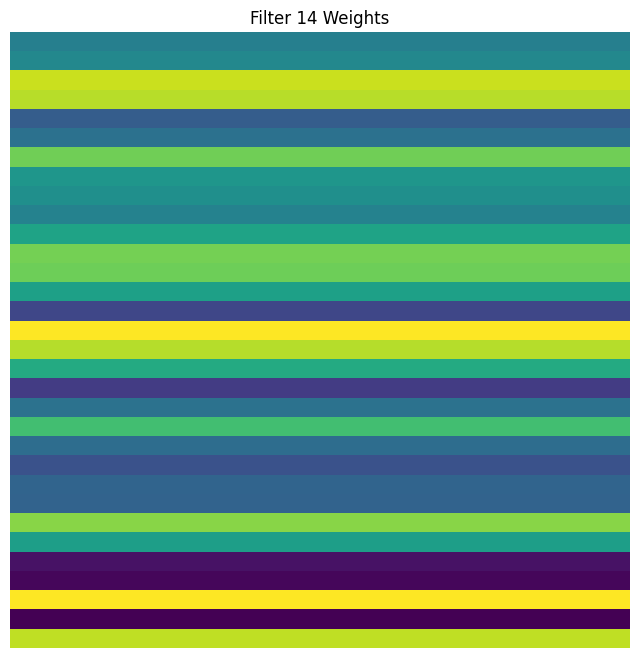

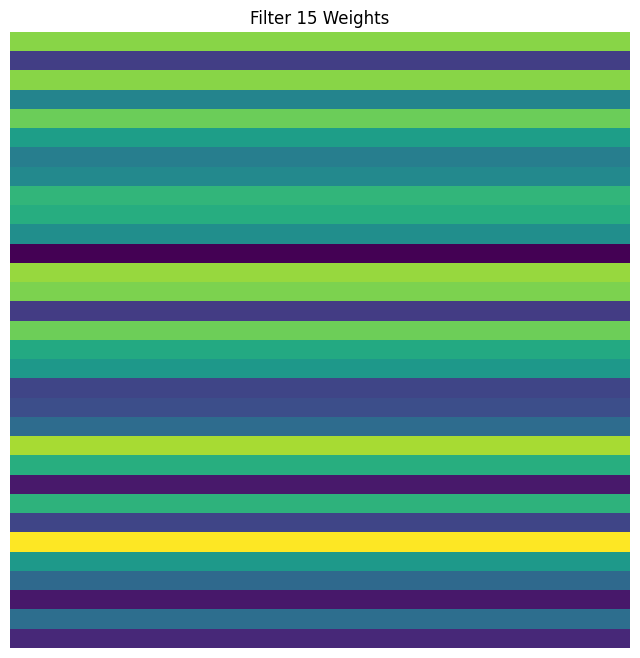

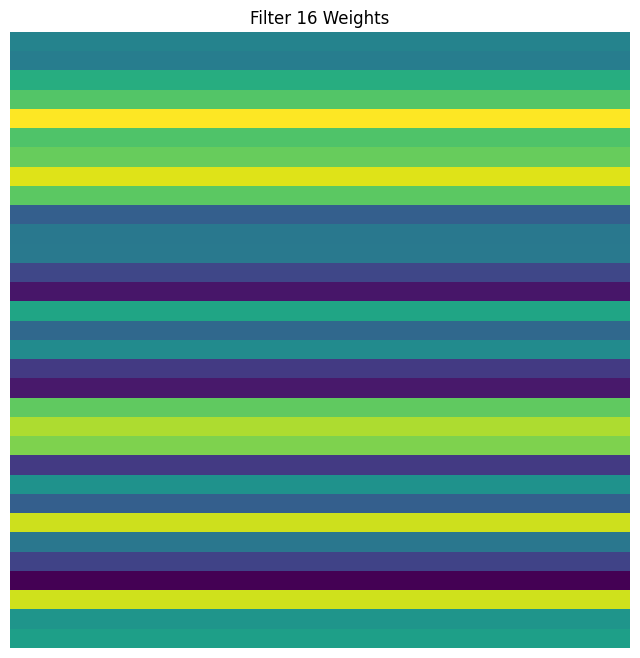

148/148 [==============================] - 0s 735us/step
F1 Score for Question 7: 0.8510221569347534

TRAIN QUESTION 8 MODEL
Index(['checkpoint_pct', 'cutscene_click_pct', 'map_click_pct',
       'map_hover_pct', 'navigate_click_pct', 'notification_click_pct',
       'object_click_pct', 'object_hover_pct', 'observation_click_pct',
       'person_click_pct', 'notebook_click_pct', 'elapsed_duration',
       'level_5_count', 'level_6_count', 'level_7_count', 'level_8_count',
       'level_9_count', 'level_10_count', 'level_11_count', 'level_12_count',
       'event_name_checkpoint_count', 'event_name_cutscene_click_count',
       'event_name_map_click_count', 'event_name_map_hover_count',
       'event_name_navigate_click_count',
       'event_name_notification_click_count', 'event_name_object_click_count',
       'event_name_object_hover_count', 'event_name_observation_click_count',
       'event_name_person_click_count', 'event_name_notebook_click_count',
       'name_basic_count', 'nam

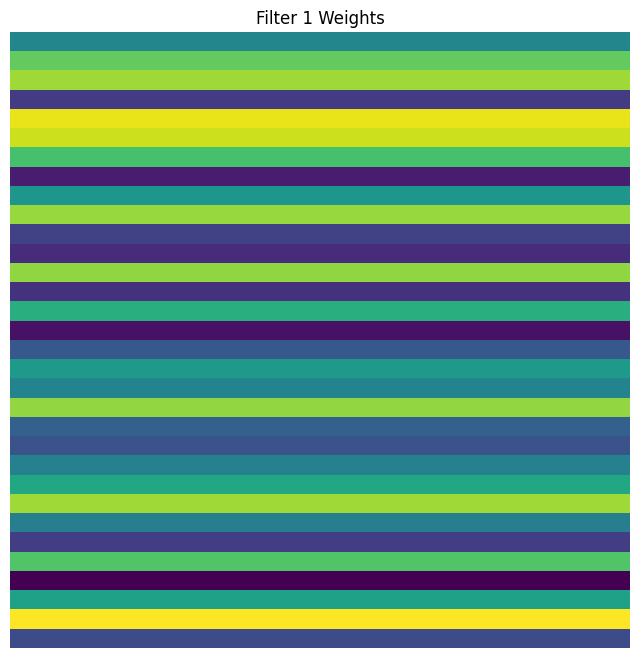

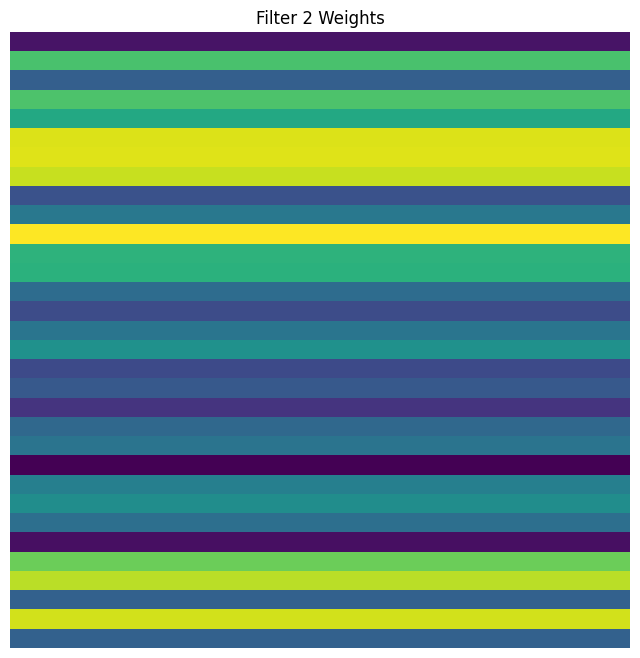

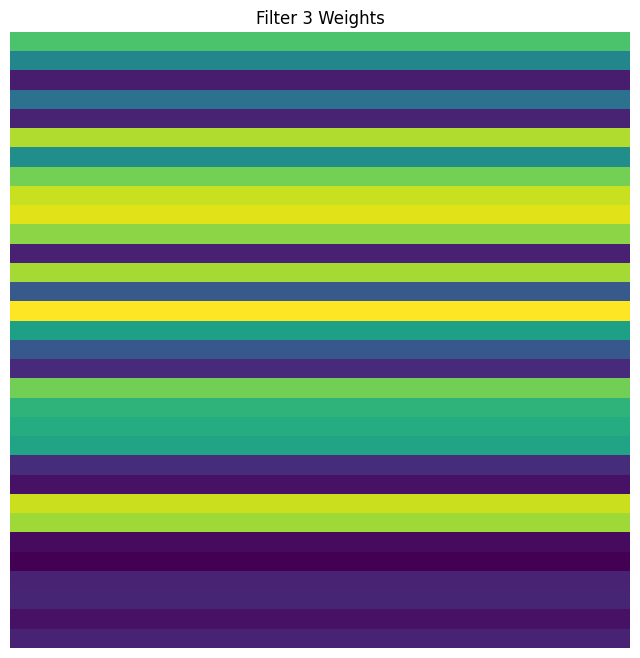

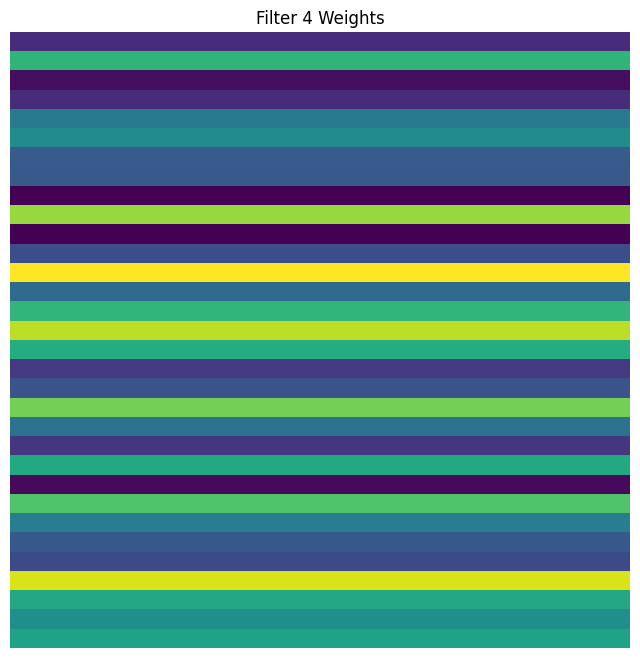

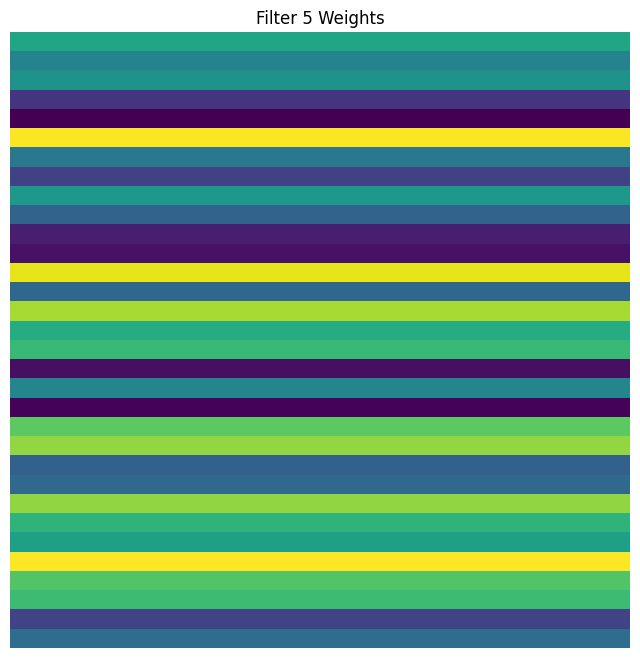

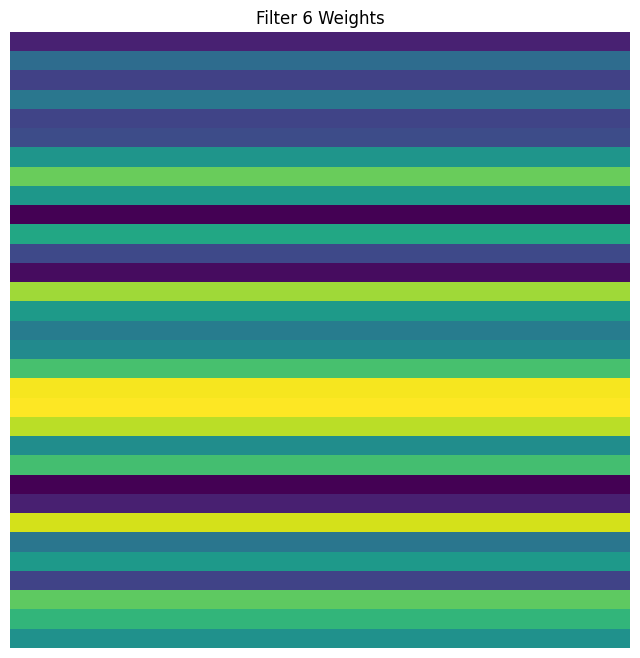

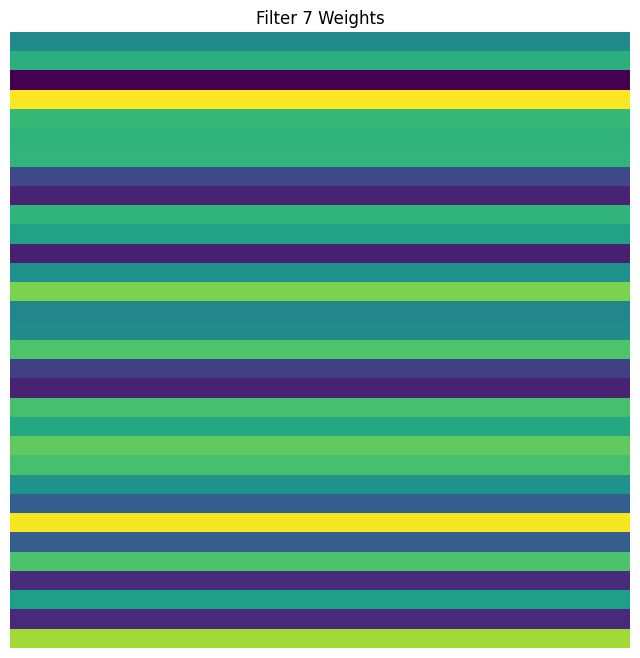

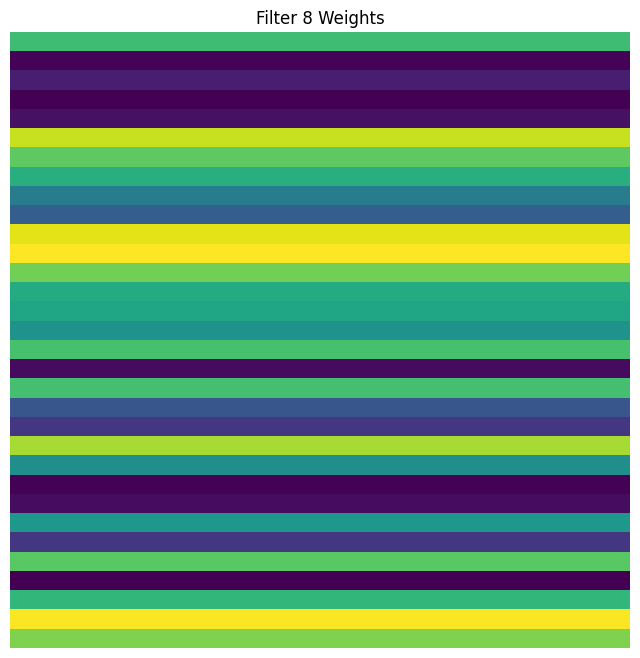

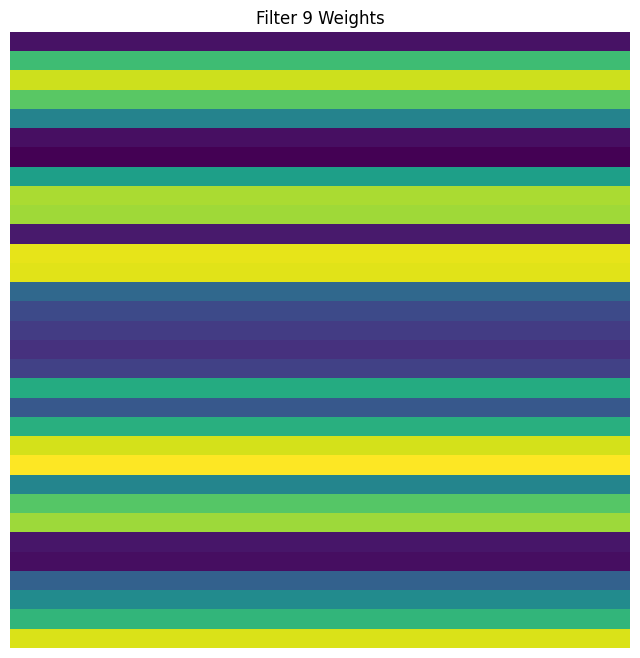

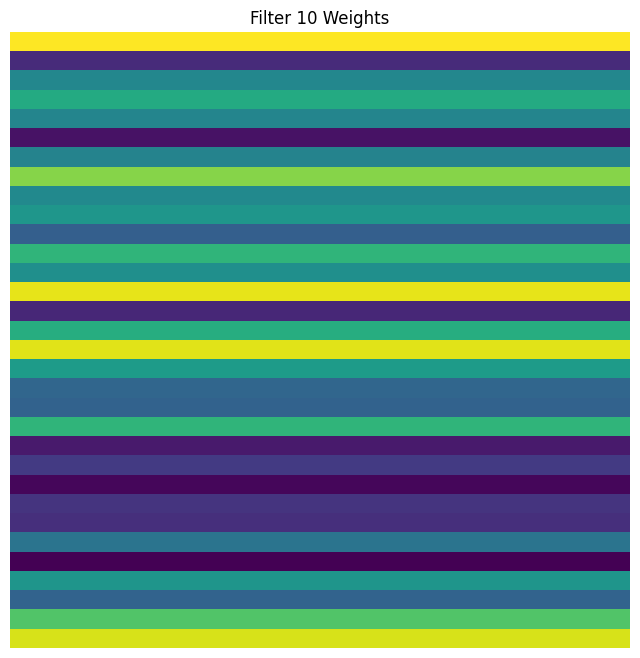

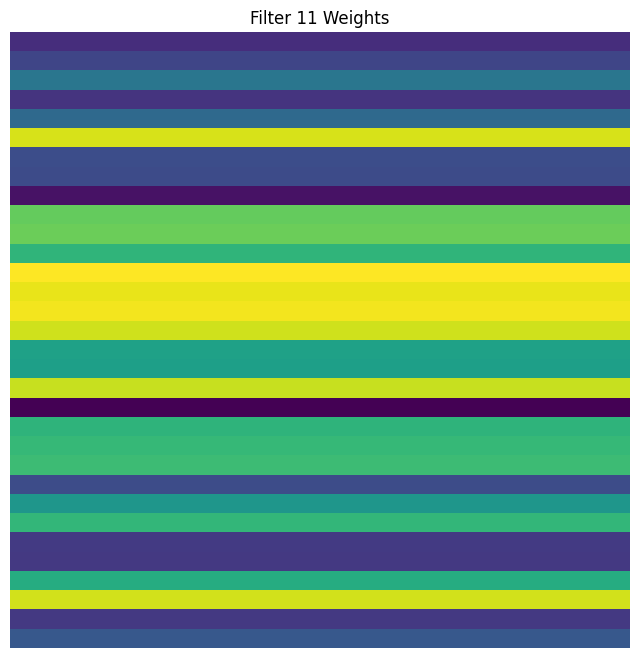

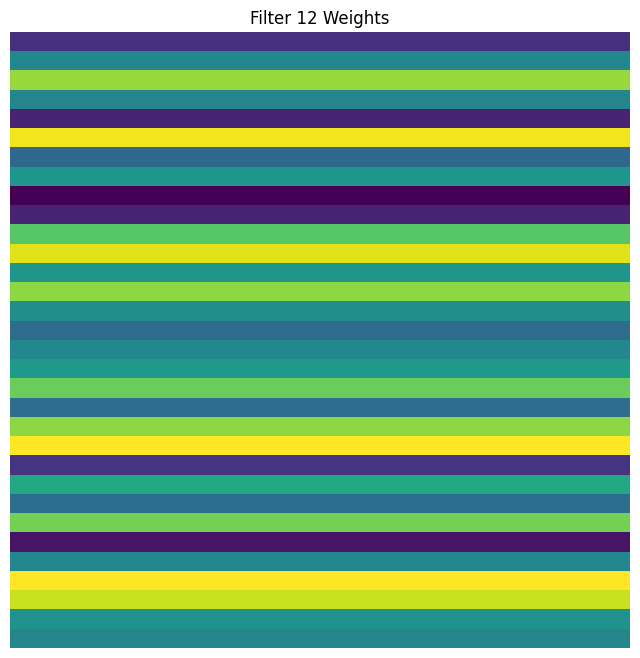

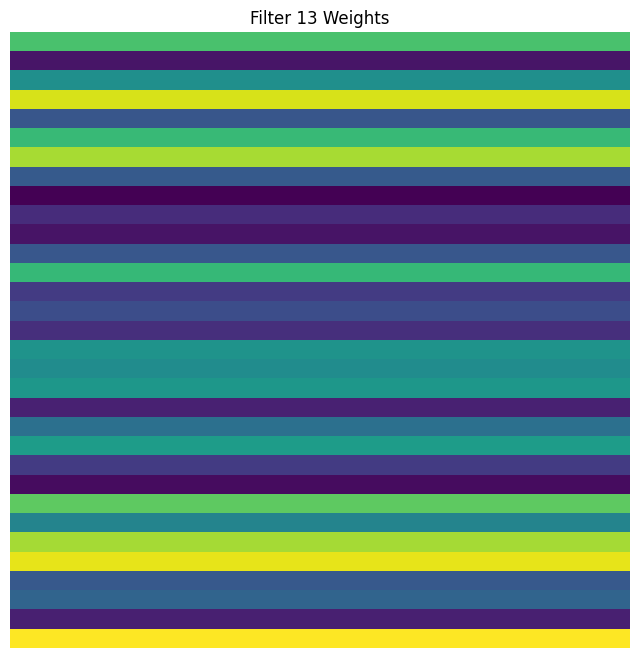

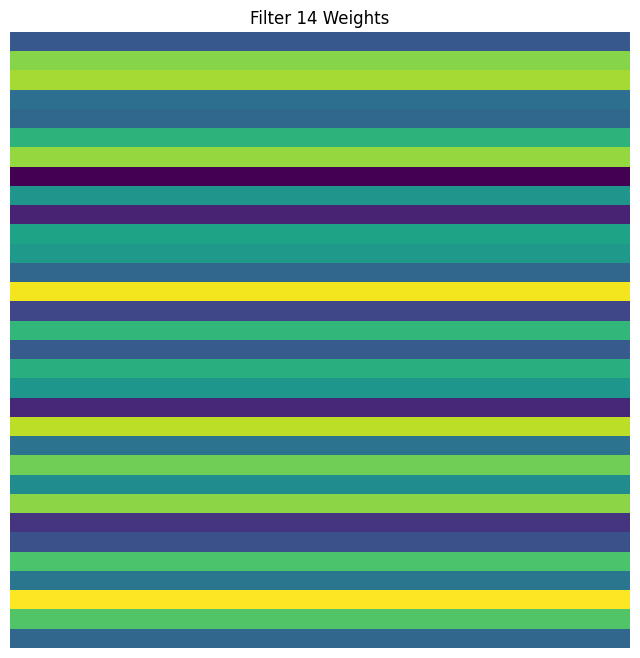

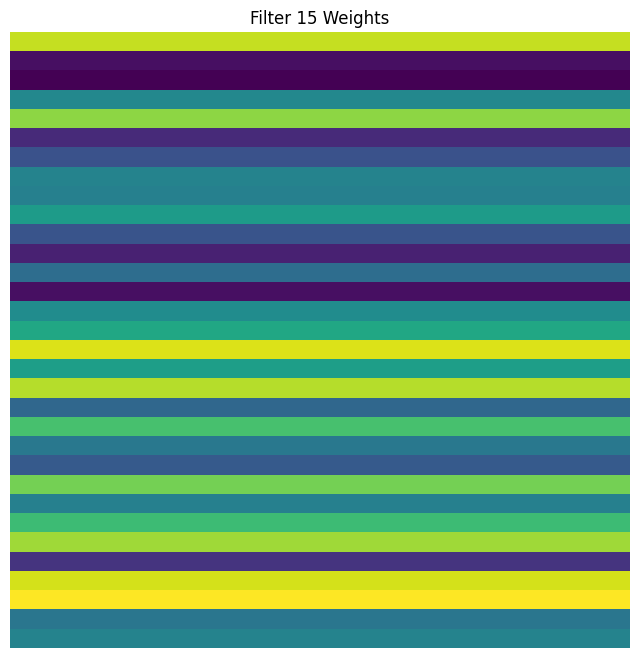

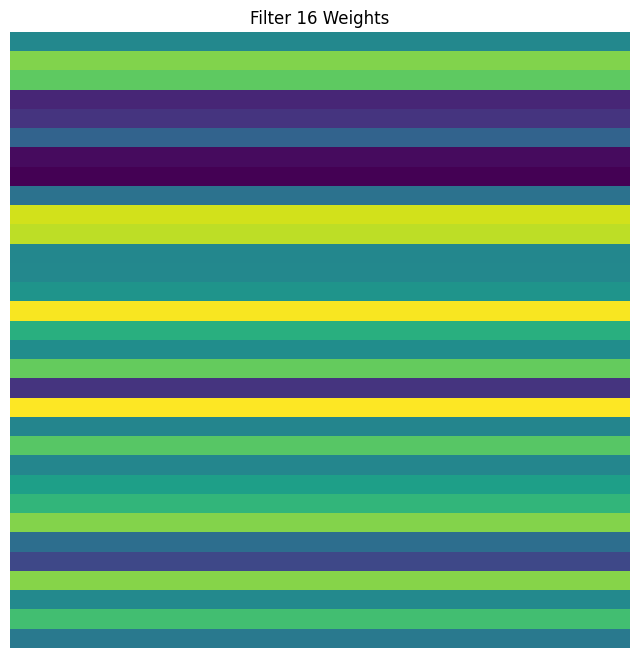

148/148 [==============================] - 0s 784us/step
F1 Score for Question 8: 0.7549861312904503

TRAIN QUESTION 9 MODEL
Index(['checkpoint_pct', 'cutscene_click_pct', 'map_click_pct',
       'map_hover_pct', 'navigate_click_pct', 'notification_click_pct',
       'object_click_pct', 'object_hover_pct', 'observation_click_pct',
       'person_click_pct', 'notebook_click_pct', 'elapsed_duration',
       'level_5_count', 'level_6_count', 'level_7_count', 'level_8_count',
       'level_9_count', 'level_10_count', 'level_11_count', 'level_12_count',
       'event_name_checkpoint_count', 'event_name_cutscene_click_count',
       'event_name_map_click_count', 'event_name_map_hover_count',
       'event_name_navigate_click_count',
       'event_name_notification_click_count', 'event_name_object_click_count',
       'event_name_object_hover_count', 'event_name_observation_click_count',
       'event_name_person_click_count', 'event_name_notebook_click_count',
       'name_basic_count', 'nam

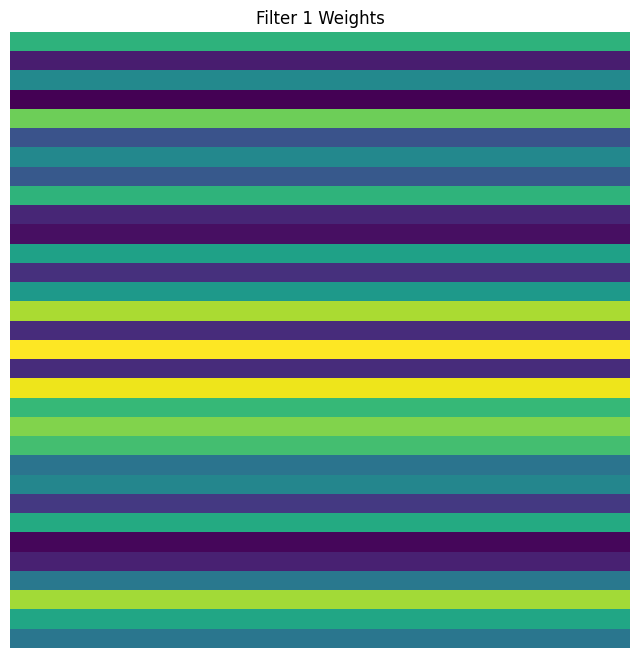

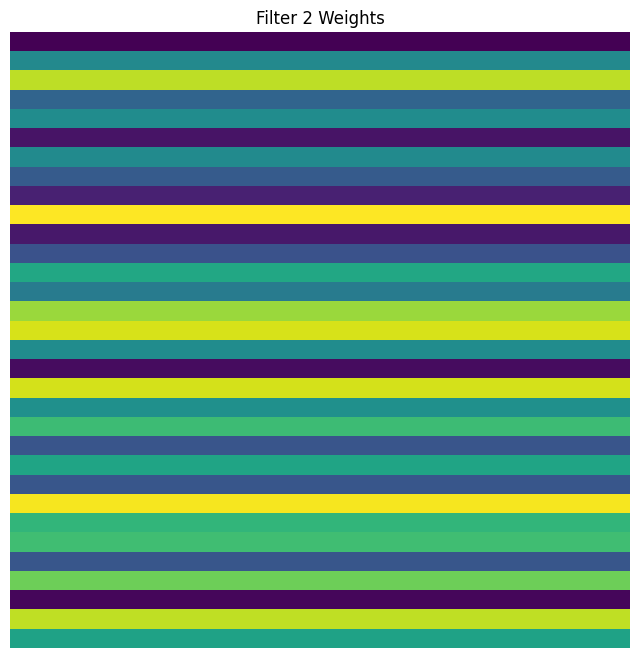

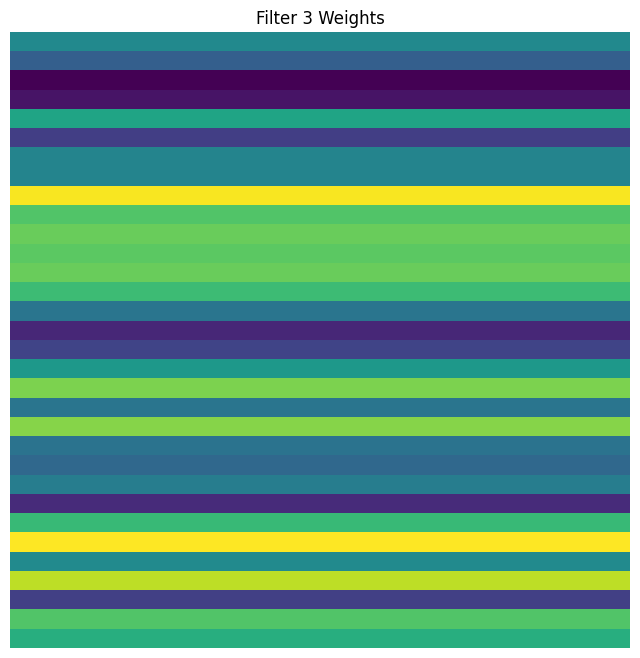

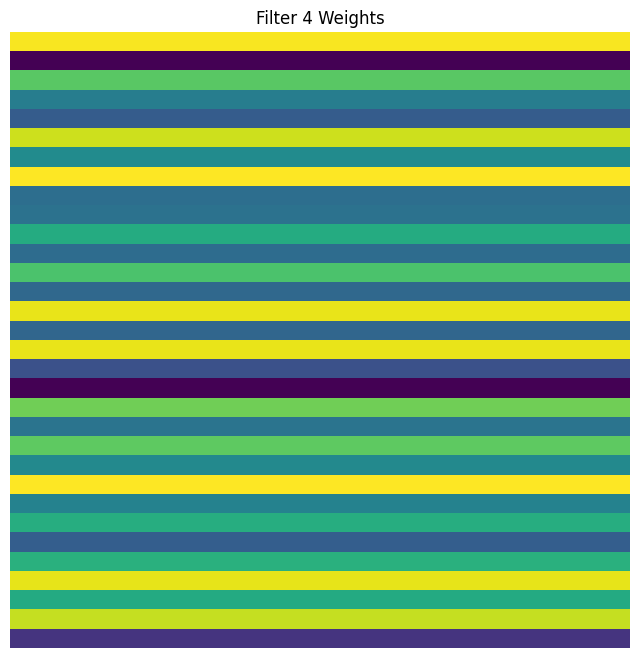

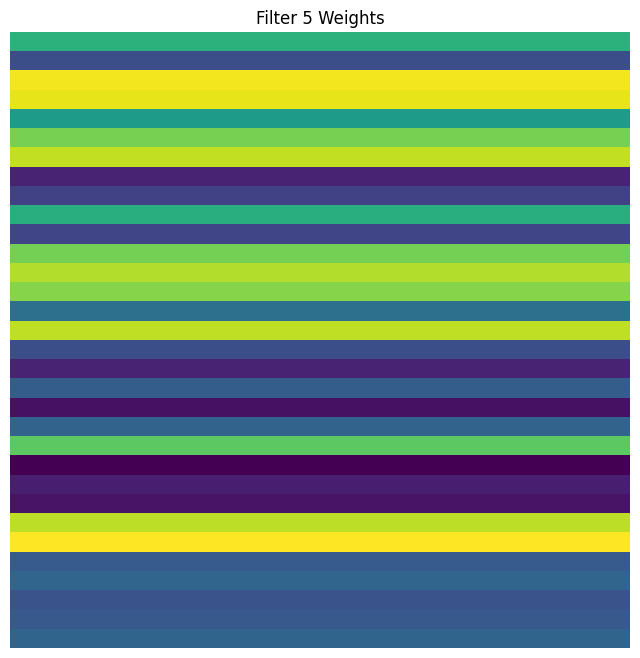

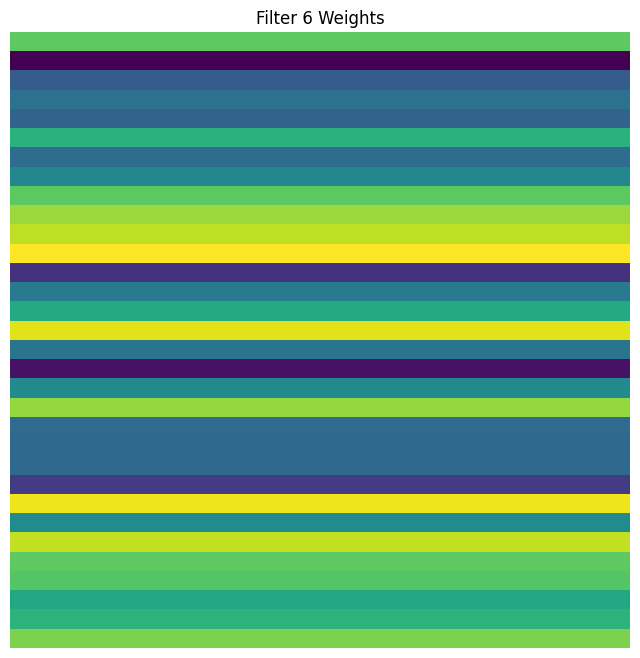

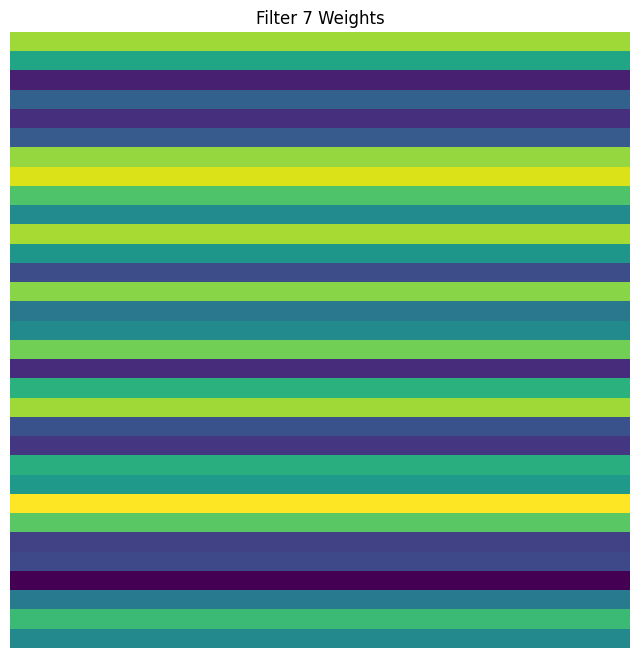

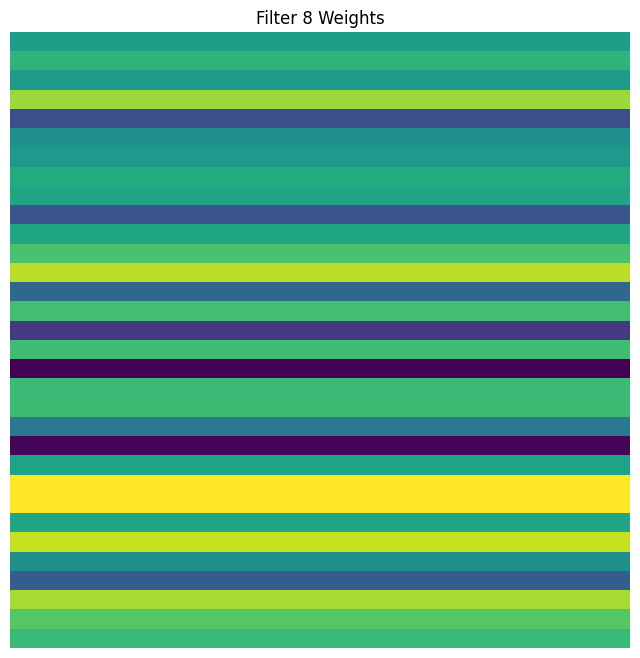

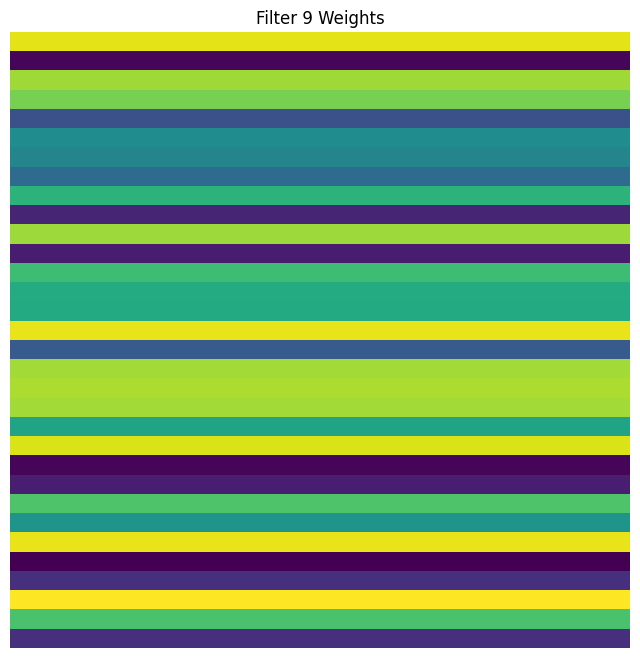

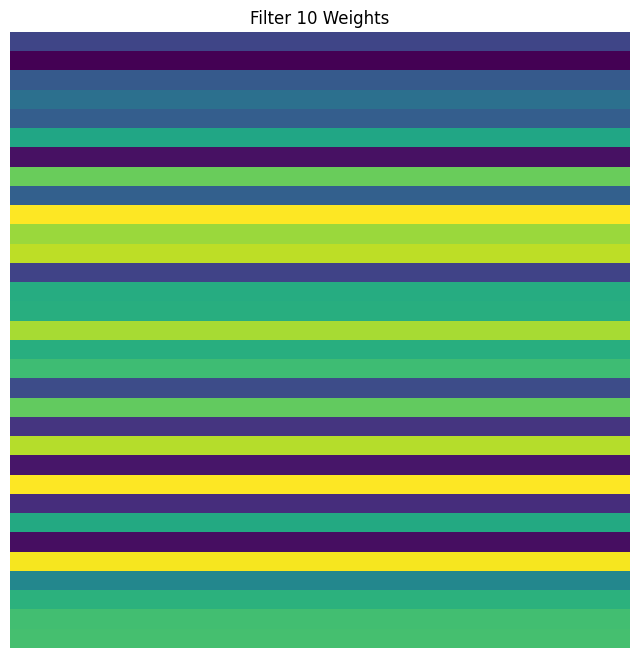

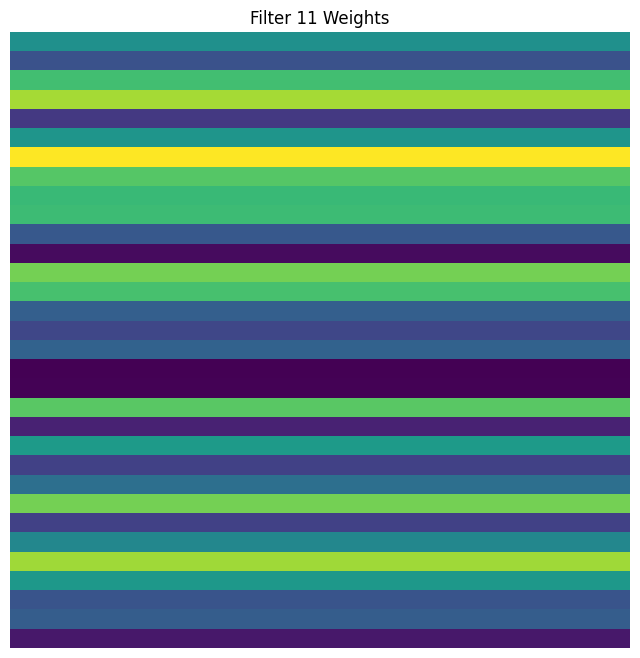

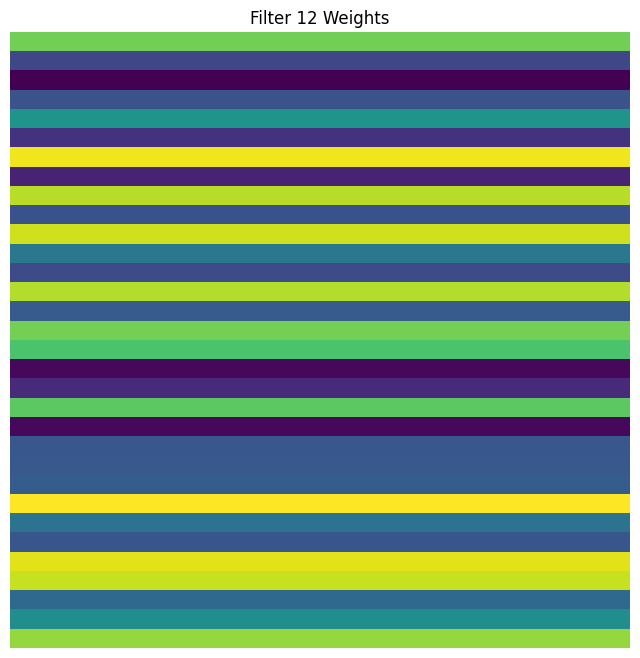

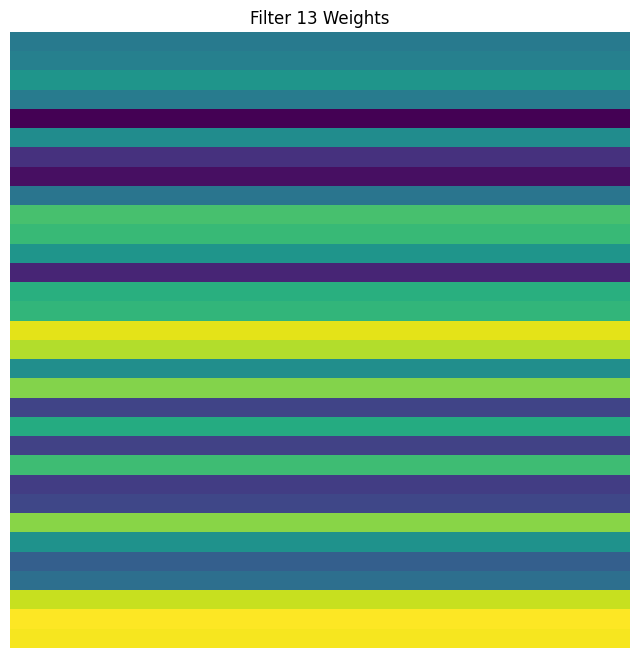

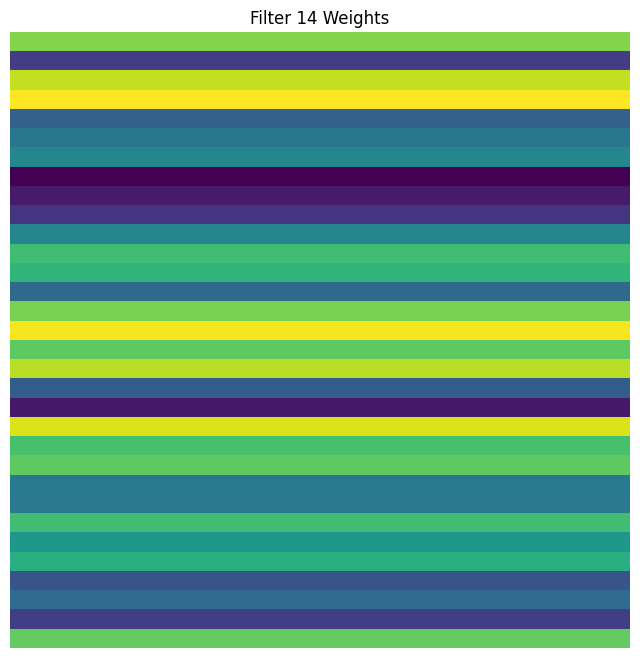

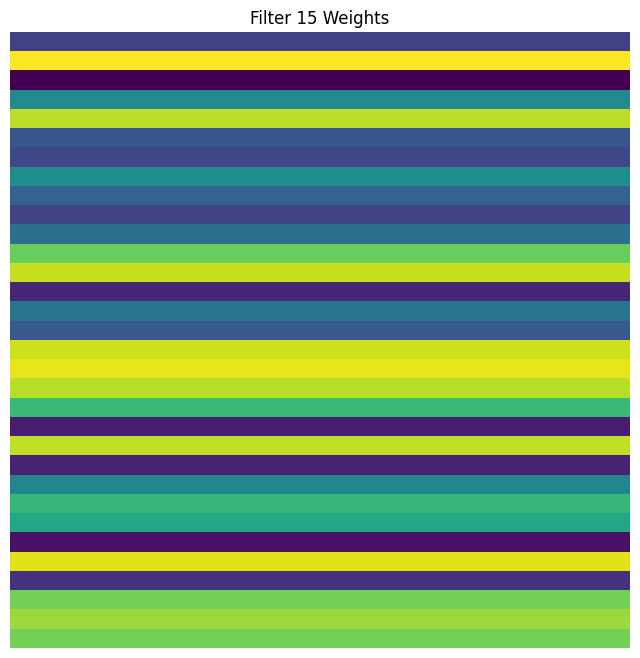

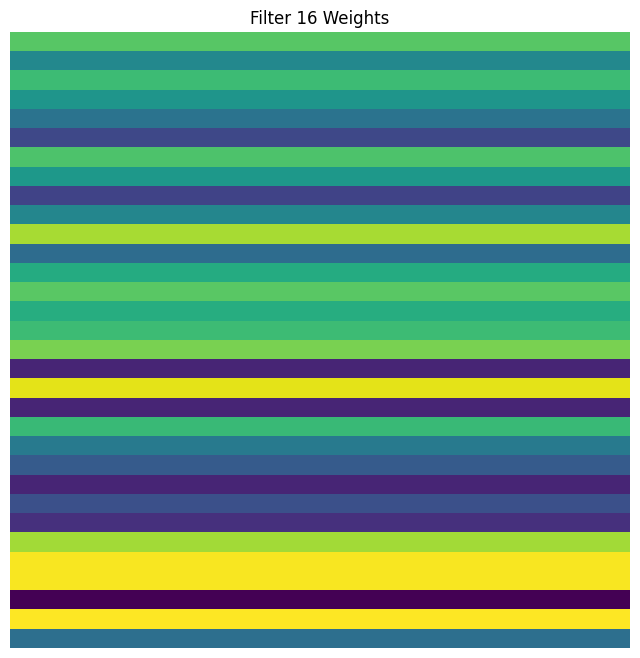

148/148 [==============================] - 0s 882us/step
F1 Score for Question 9: 0.8414454277286135

TRAIN QUESTION 10 MODEL
Index(['checkpoint_pct', 'cutscene_click_pct', 'map_click_pct',
       'map_hover_pct', 'navigate_click_pct', 'notification_click_pct',
       'object_click_pct', 'object_hover_pct', 'observation_click_pct',
       'person_click_pct', 'notebook_click_pct', 'elapsed_duration',
       'level_5_count', 'level_6_count', 'level_7_count', 'level_8_count',
       'level_9_count', 'level_10_count', 'level_11_count', 'level_12_count',
       'event_name_checkpoint_count', 'event_name_cutscene_click_count',
       'event_name_map_click_count', 'event_name_map_hover_count',
       'event_name_navigate_click_count',
       'event_name_notification_click_count', 'event_name_object_click_count',
       'event_name_object_hover_count', 'event_name_observation_click_count',
       'event_name_person_click_count', 'event_name_notebook_click_count',
       'name_basic_count', 'na

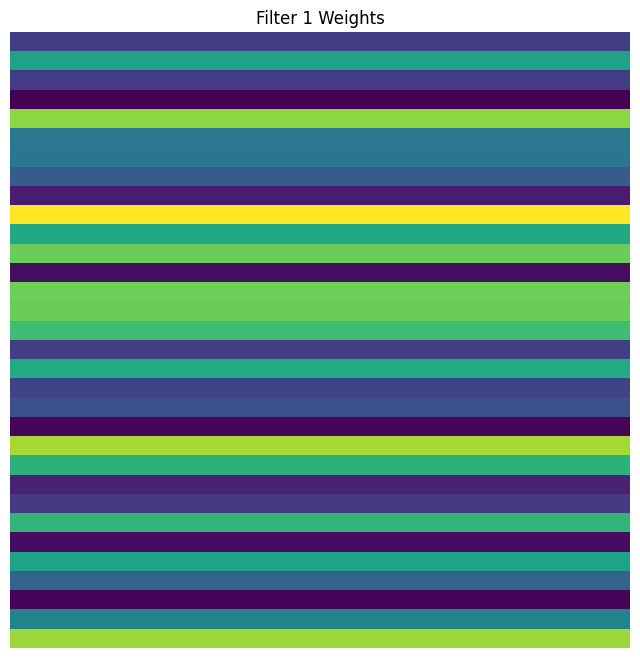

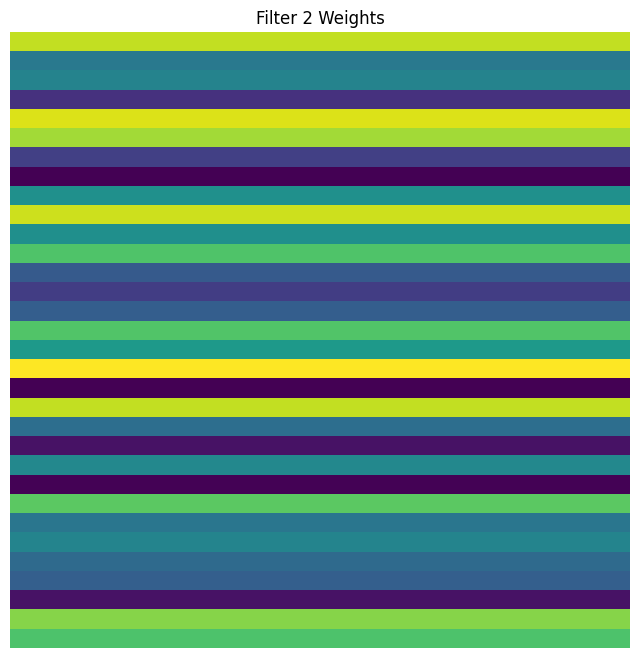

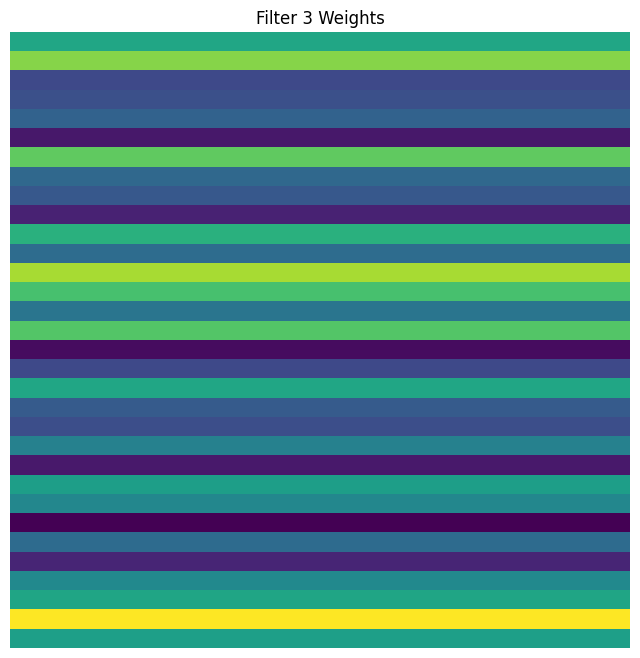

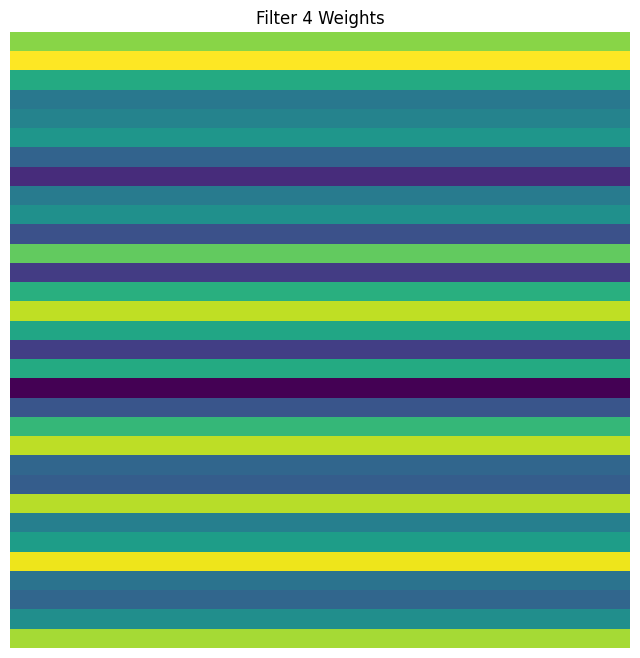

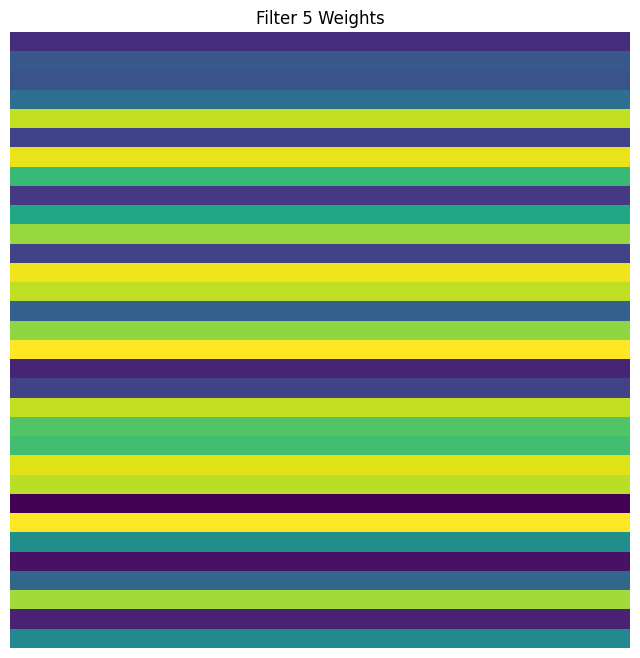

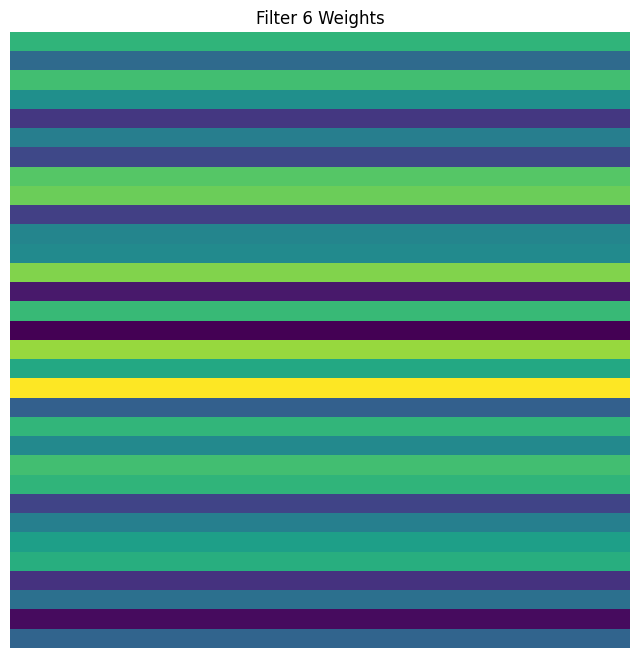

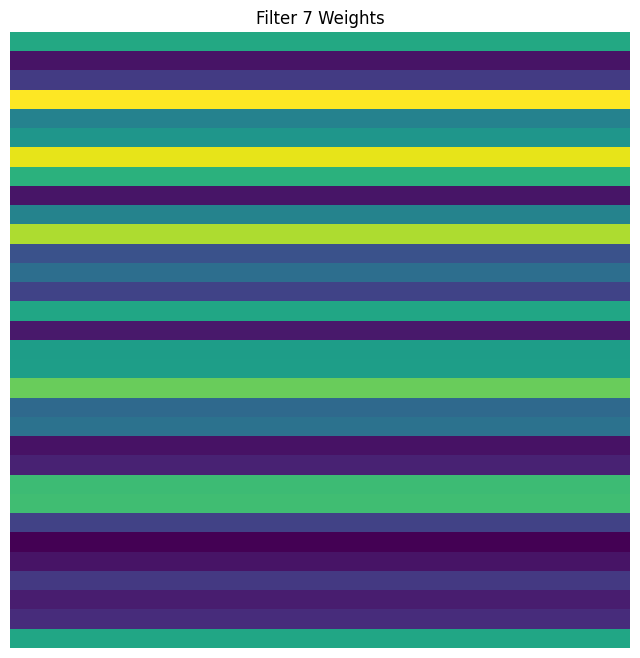

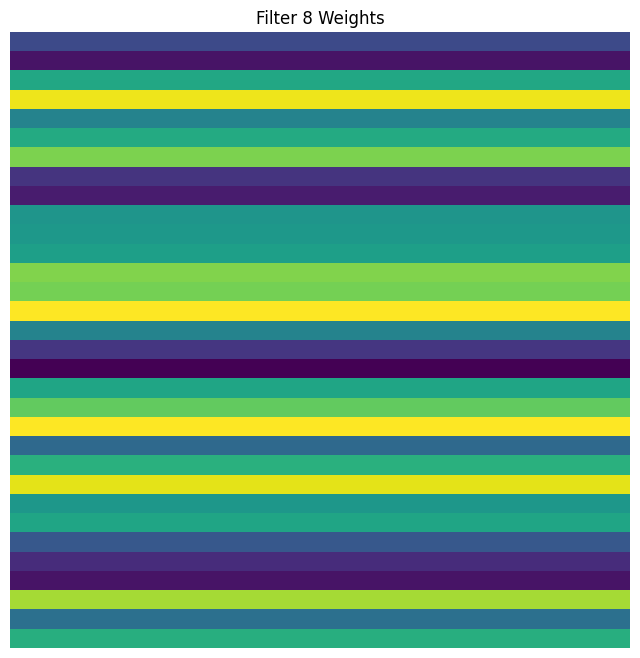

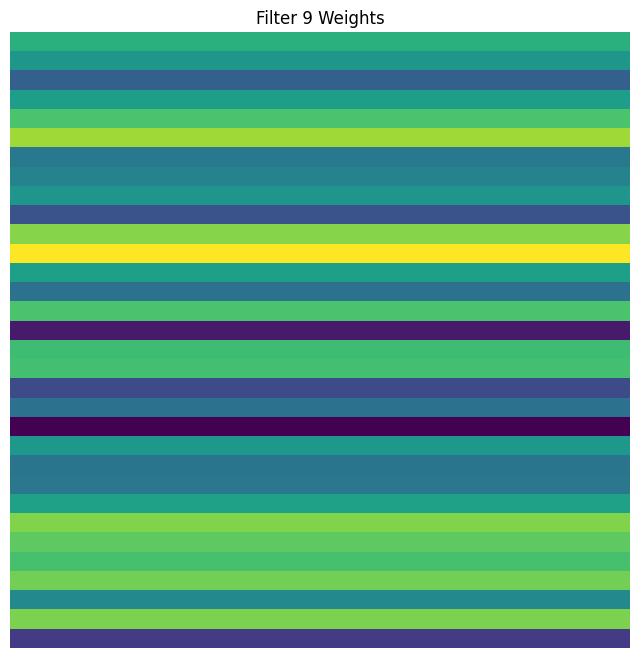

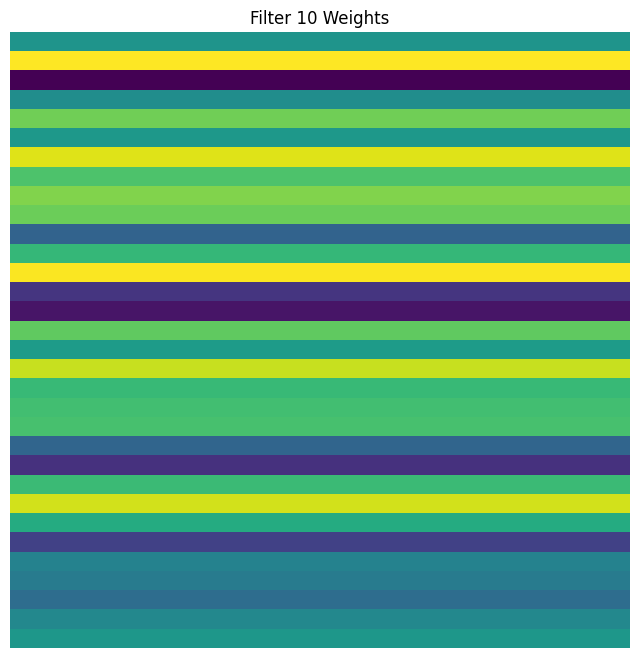

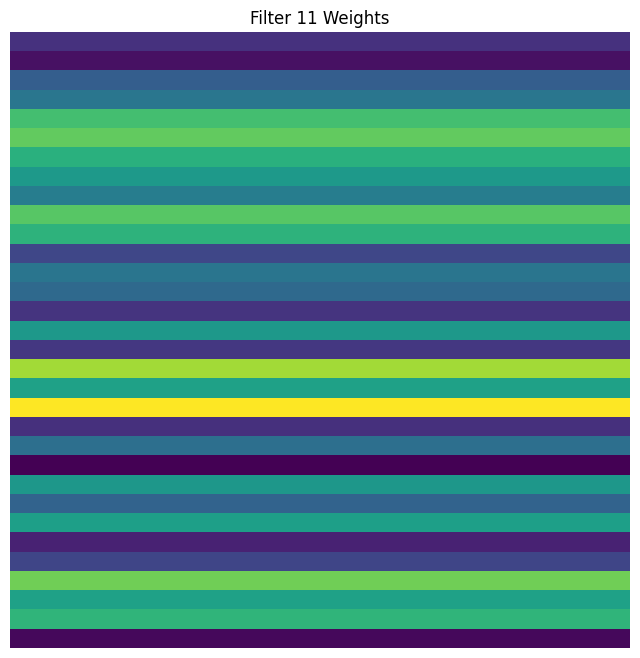

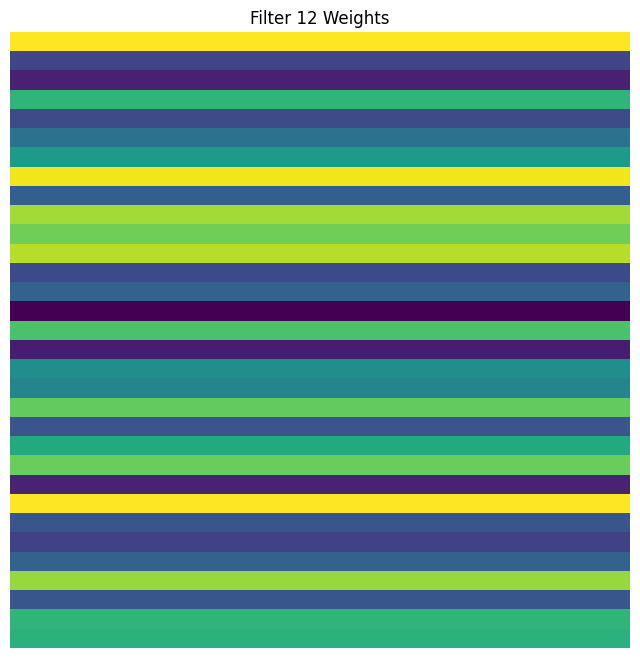

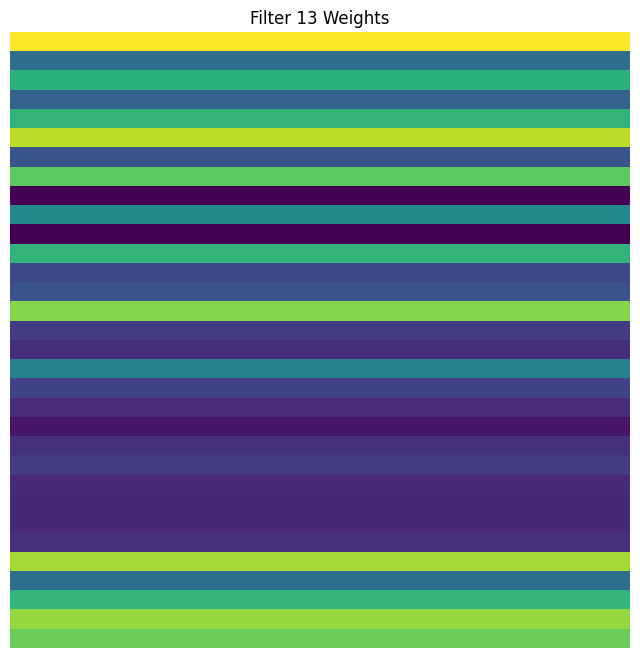

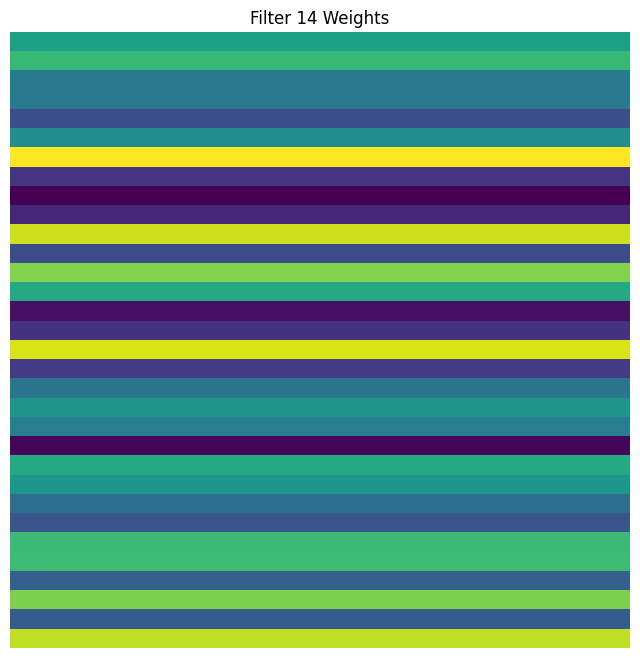

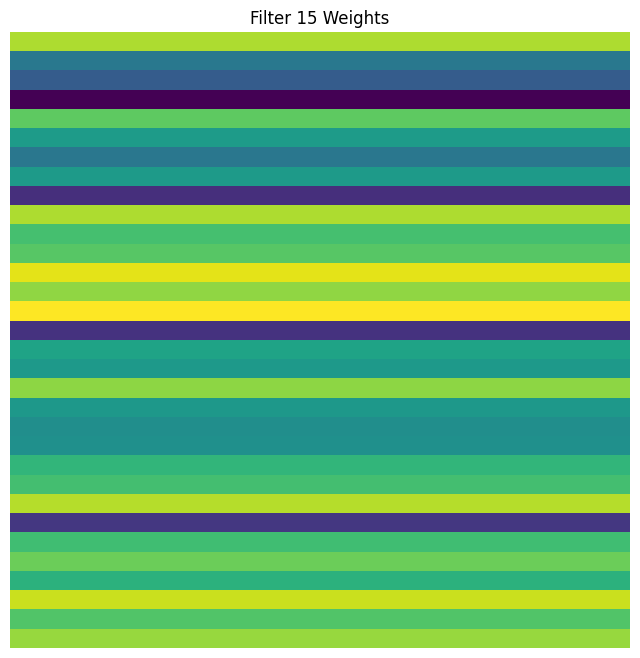

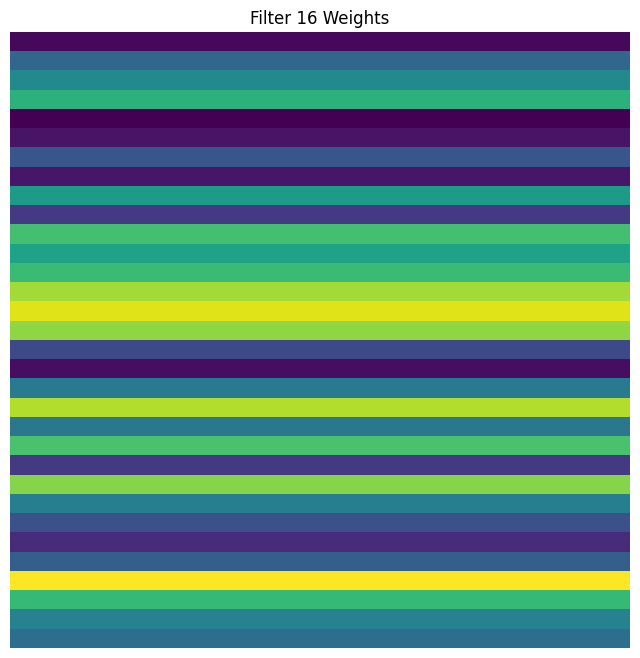

148/148 [==============================] - 0s 803us/step
F1 Score for Question 10: 0.6190757128810227

TRAIN QUESTION 11 MODEL
Index(['checkpoint_pct', 'cutscene_click_pct', 'map_click_pct',
       'map_hover_pct', 'navigate_click_pct', 'notification_click_pct',
       'object_click_pct', 'object_hover_pct', 'observation_click_pct',
       'person_click_pct', 'notebook_click_pct', 'elapsed_duration',
       'level_5_count', 'level_6_count', 'level_7_count', 'level_8_count',
       'level_9_count', 'level_10_count', 'level_11_count', 'level_12_count',
       'event_name_checkpoint_count', 'event_name_cutscene_click_count',
       'event_name_map_click_count', 'event_name_map_hover_count',
       'event_name_navigate_click_count',
       'event_name_notification_click_count', 'event_name_object_click_count',
       'event_name_object_hover_count', 'event_name_observation_click_count',
       'event_name_person_click_count', 'event_name_notebook_click_count',
       'name_basic_count', 'n

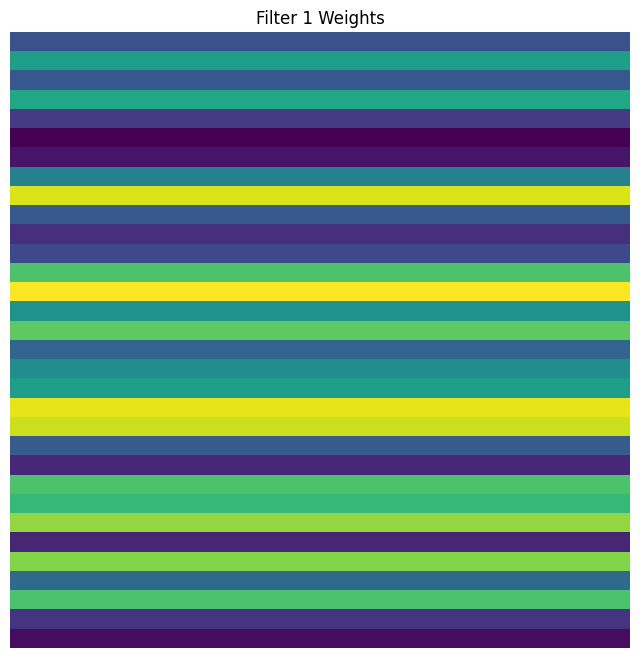

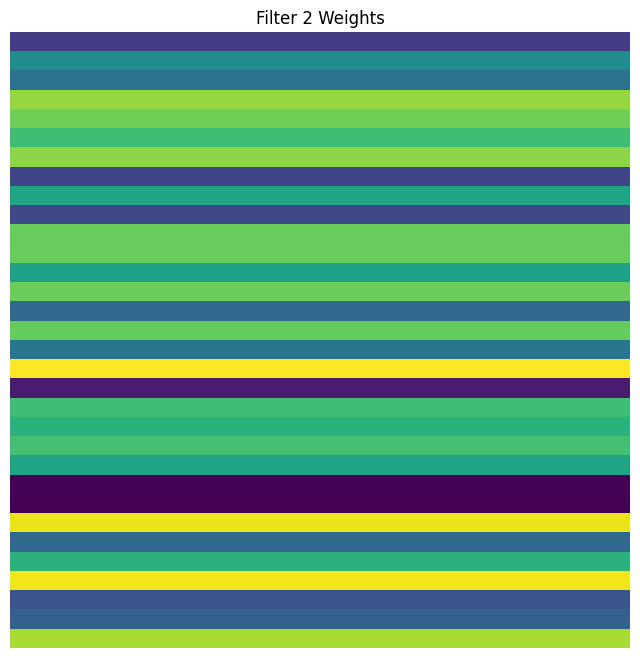

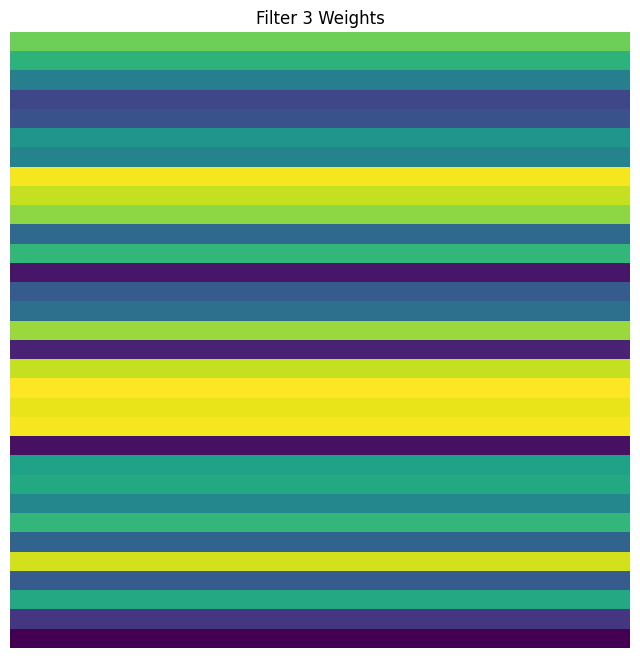

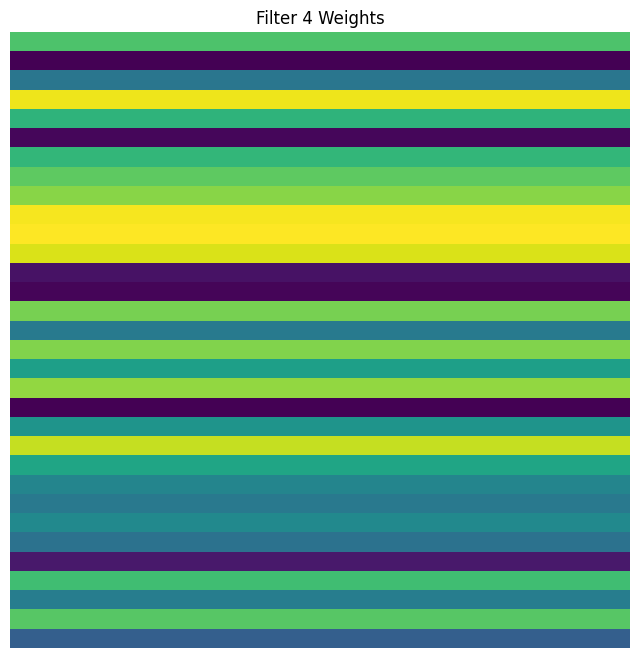

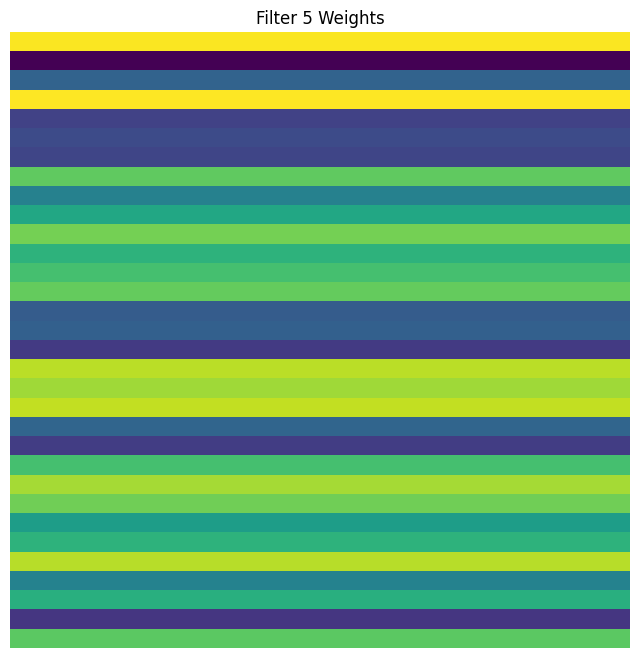

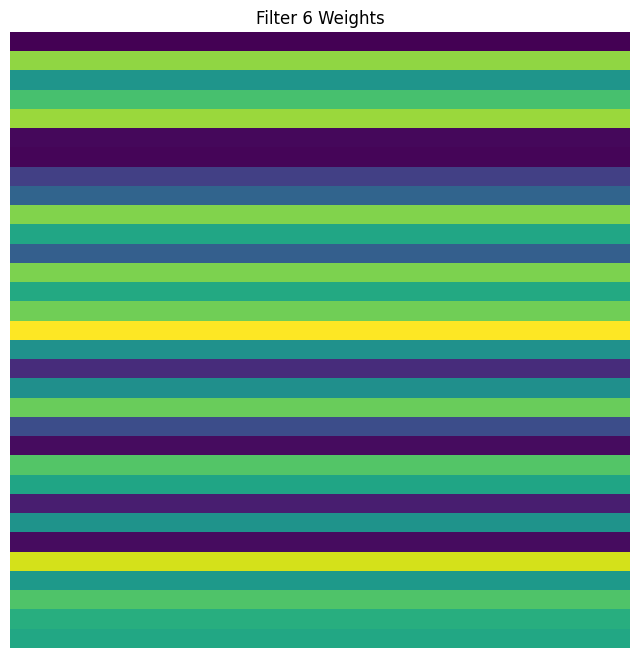

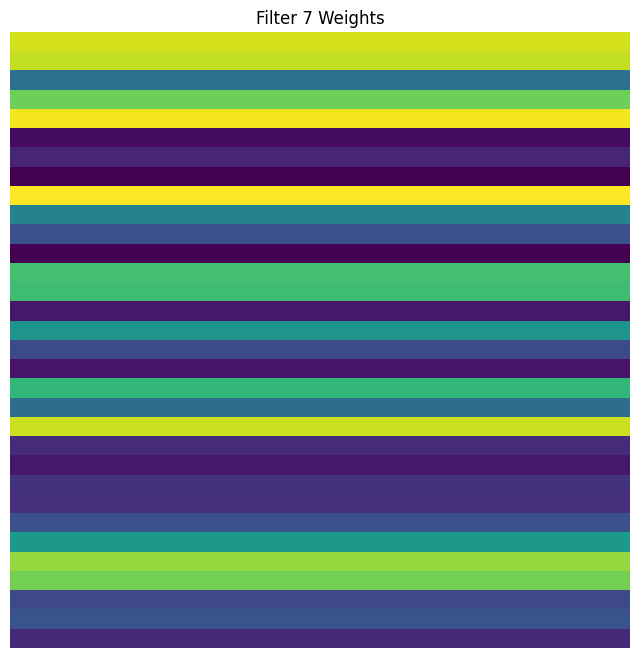

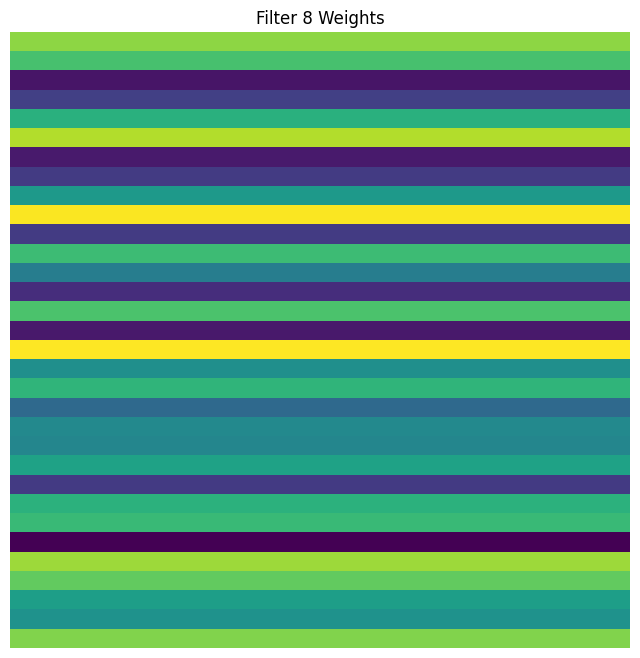

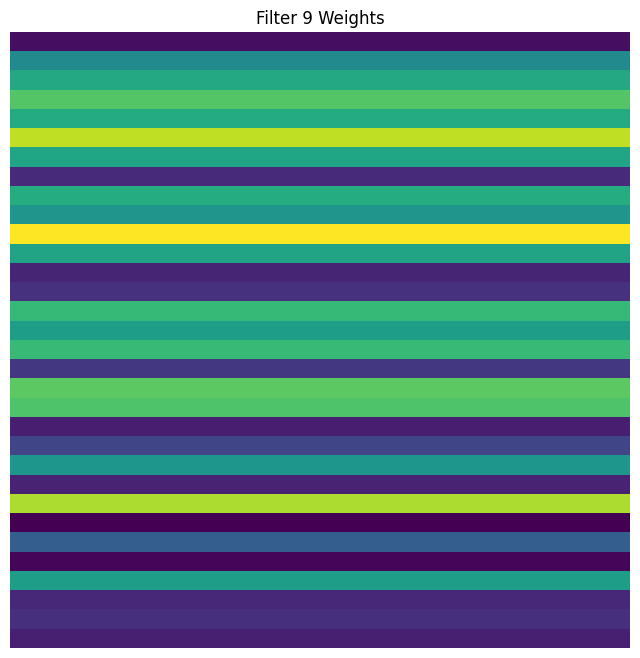

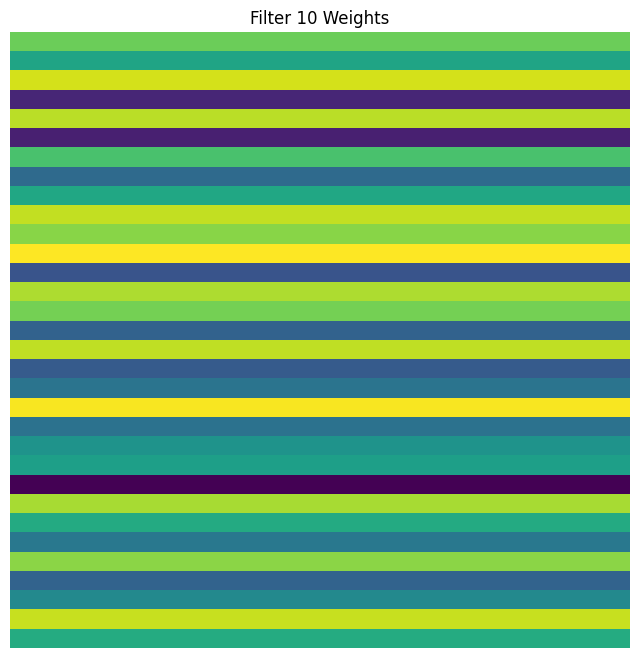

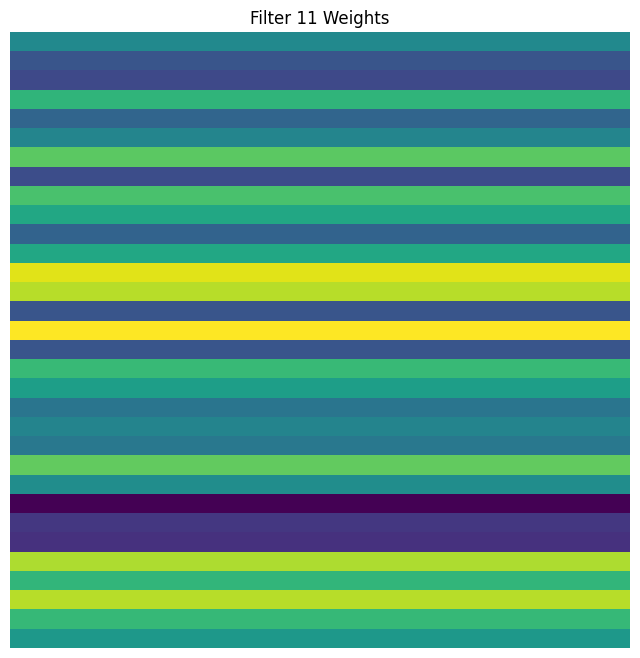

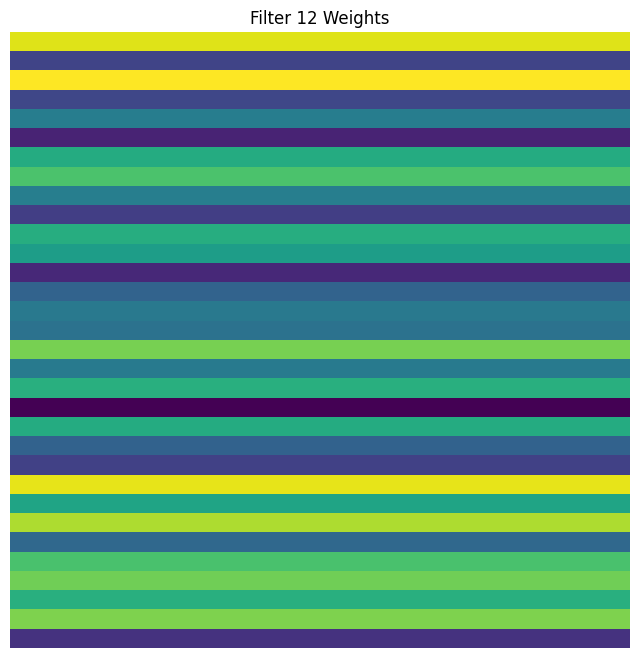

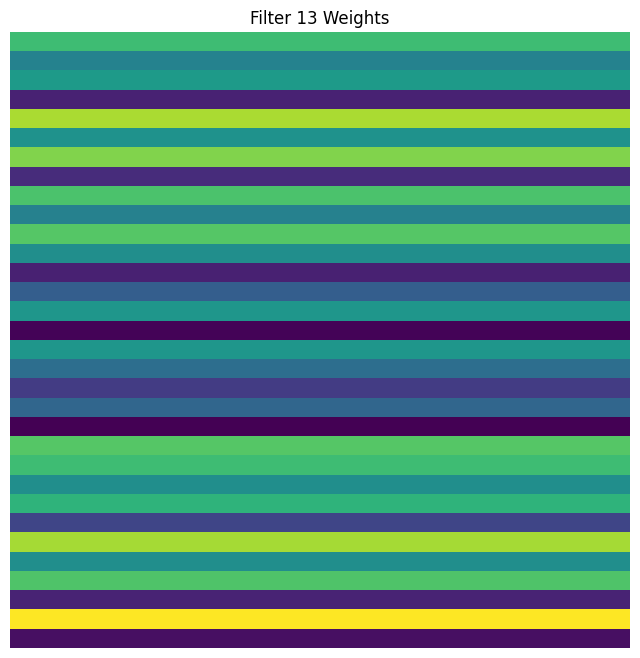

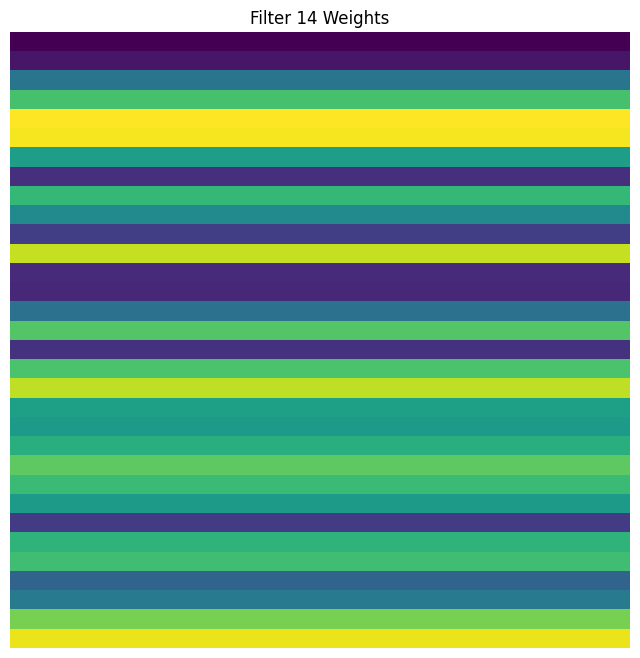

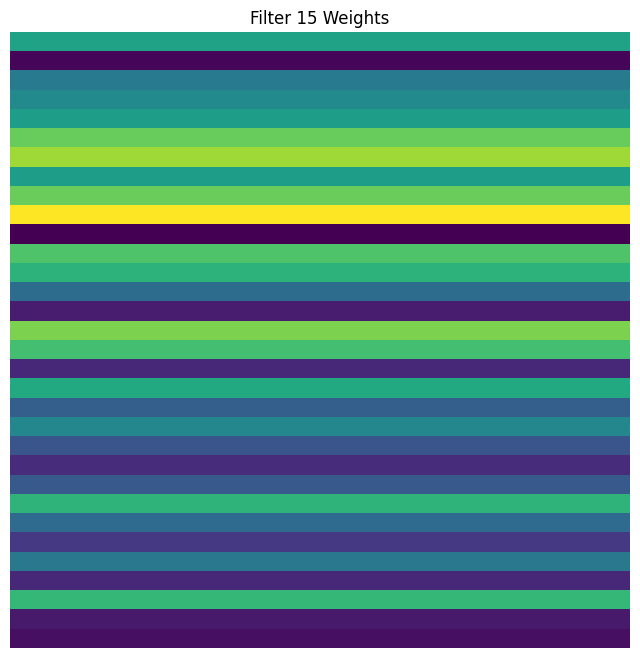

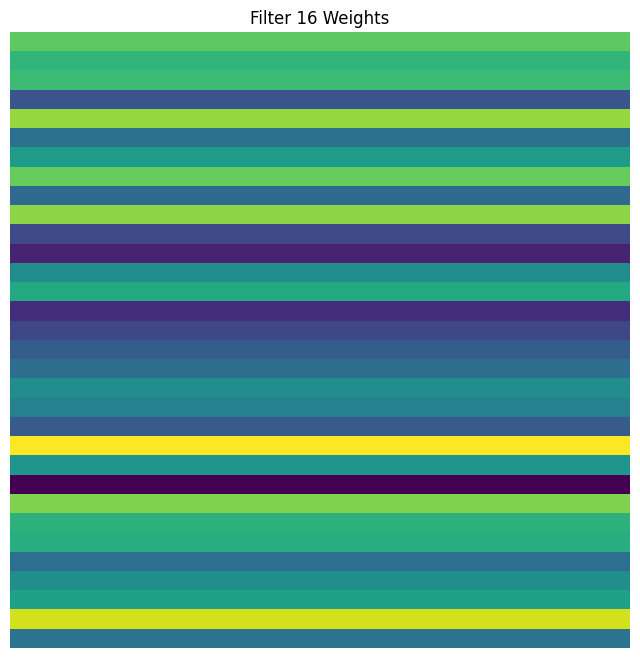

148/148 [==============================] - 0s 710us/step
F1 Score for Question 11: 0.7820768514825157

TRAIN QUESTION 12 MODEL
Index(['checkpoint_pct', 'cutscene_click_pct', 'map_click_pct',
       'map_hover_pct', 'navigate_click_pct', 'notification_click_pct',
       'object_click_pct', 'object_hover_pct', 'observation_click_pct',
       'person_click_pct', 'notebook_click_pct', 'elapsed_duration',
       'level_5_count', 'level_6_count', 'level_7_count', 'level_8_count',
       'level_9_count', 'level_10_count', 'level_11_count', 'level_12_count',
       'event_name_checkpoint_count', 'event_name_cutscene_click_count',
       'event_name_map_click_count', 'event_name_map_hover_count',
       'event_name_navigate_click_count',
       'event_name_notification_click_count', 'event_name_object_click_count',
       'event_name_object_hover_count', 'event_name_observation_click_count',
       'event_name_person_click_count', 'event_name_notebook_click_count',
       'name_basic_count', 'n

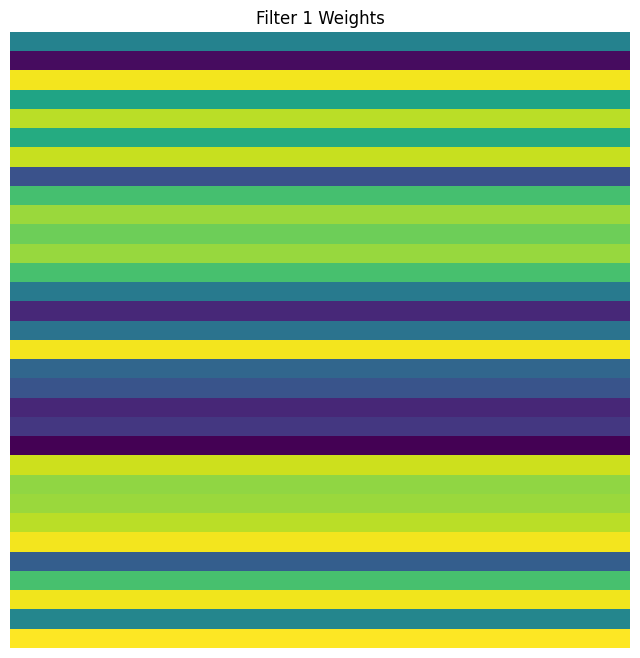

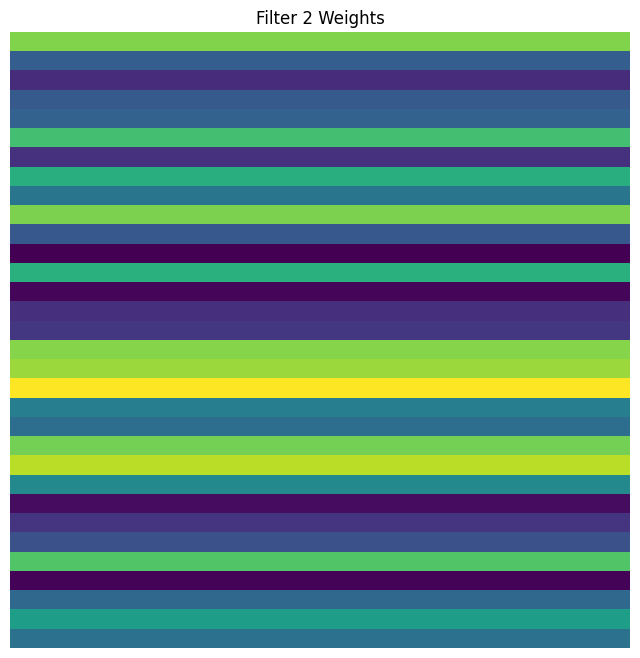

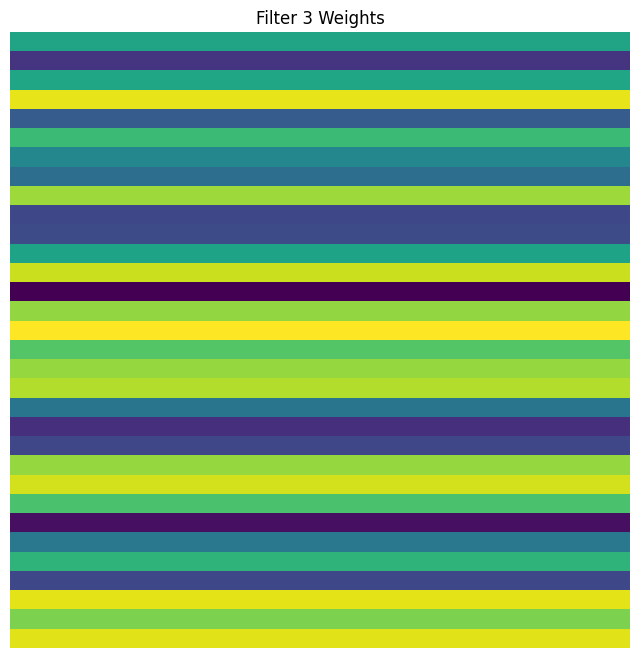

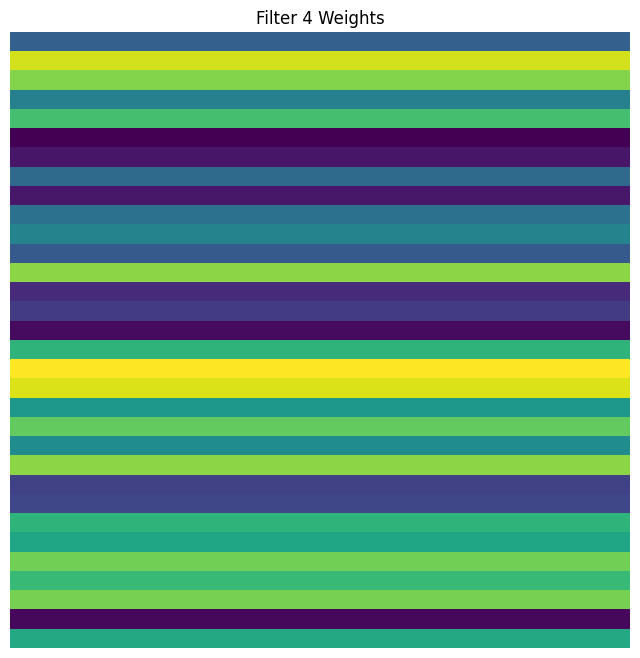

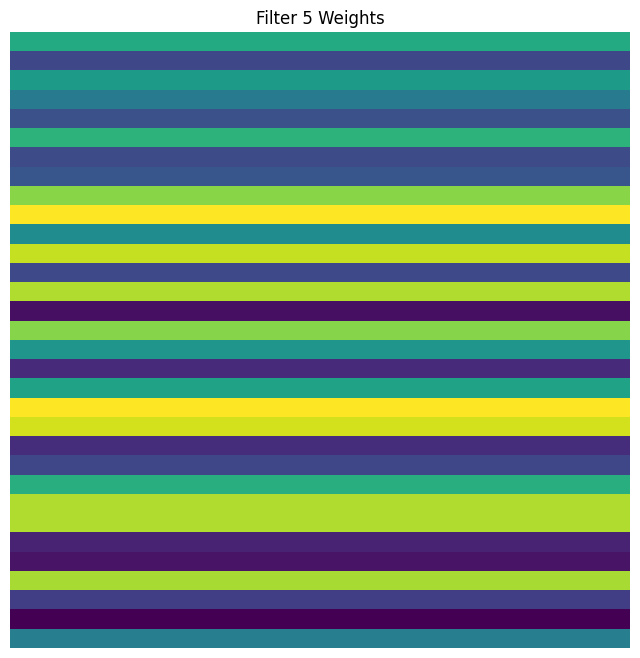

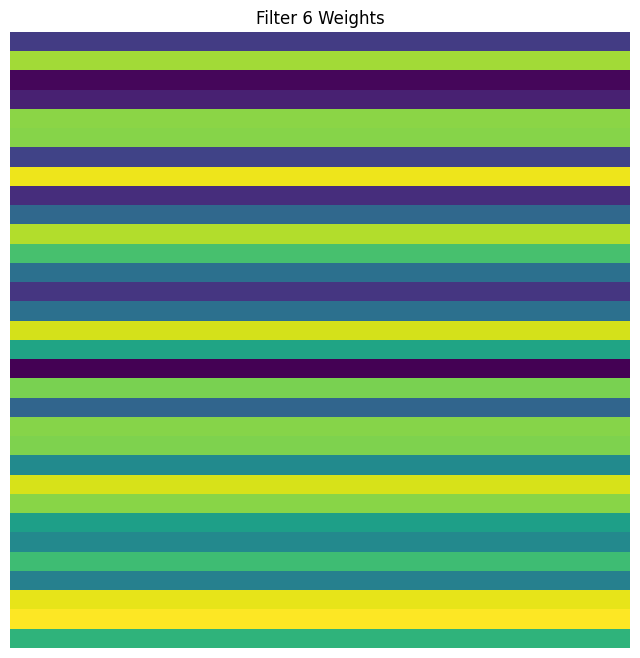

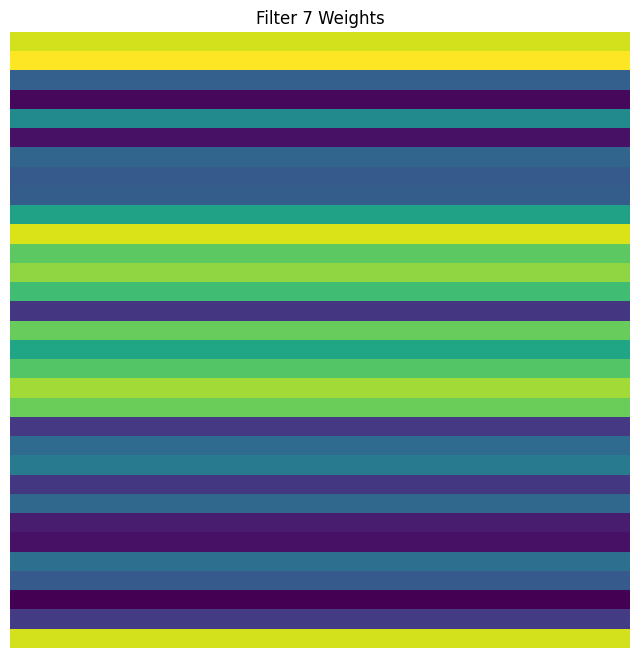

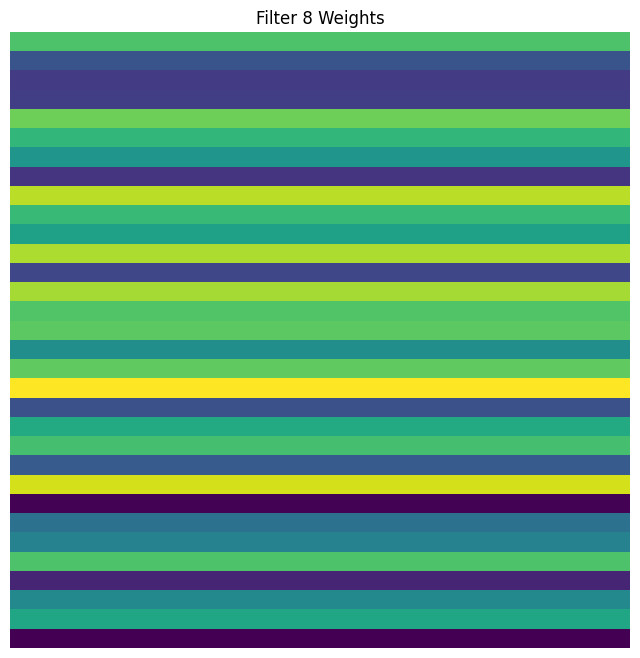

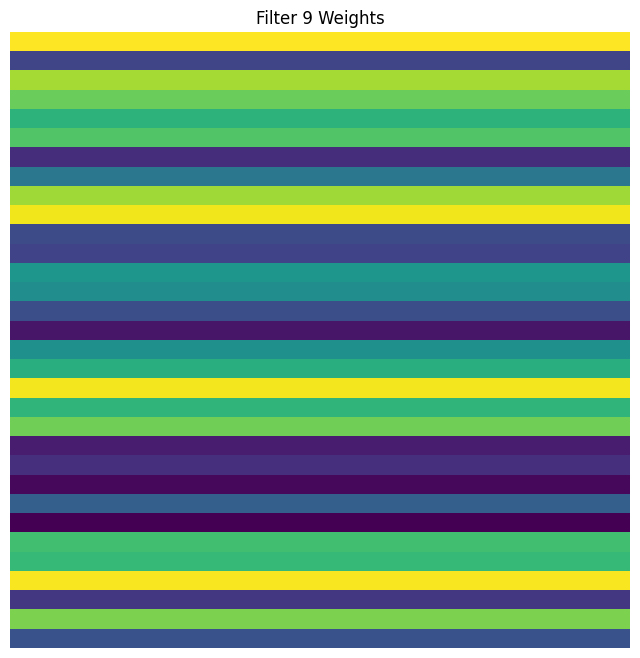

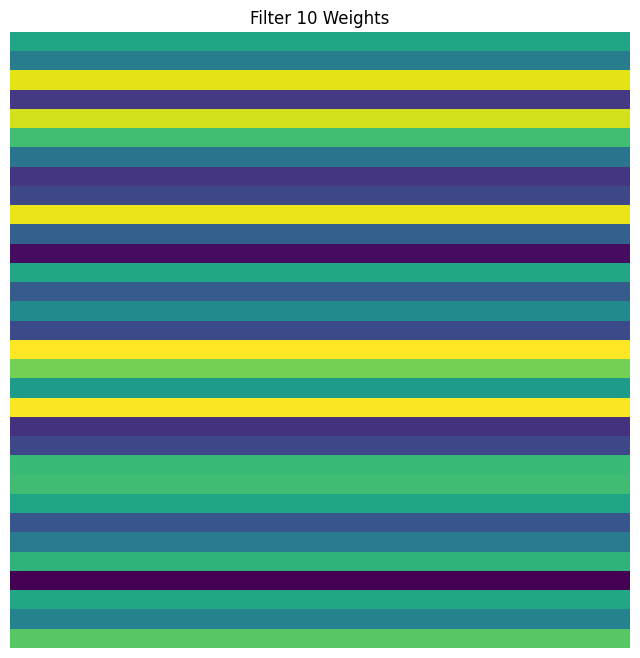

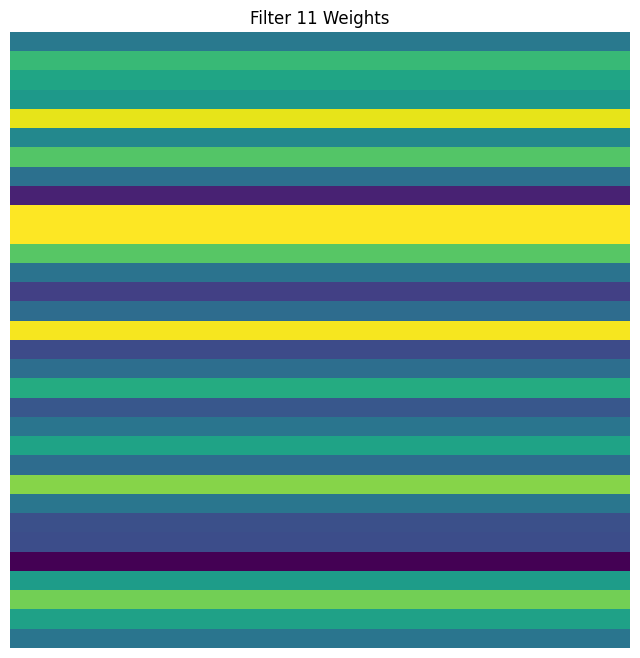

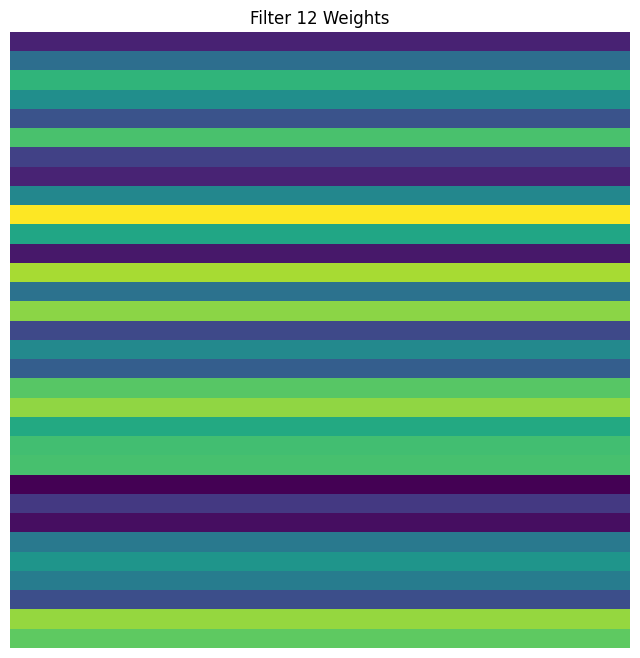

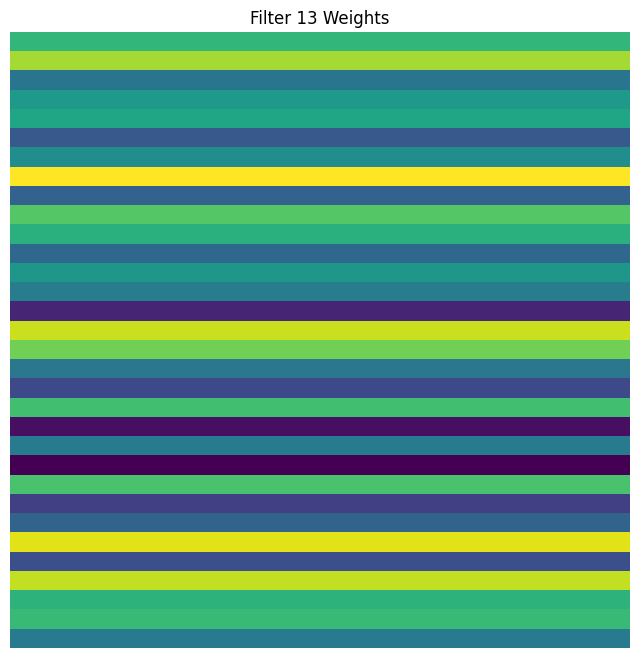

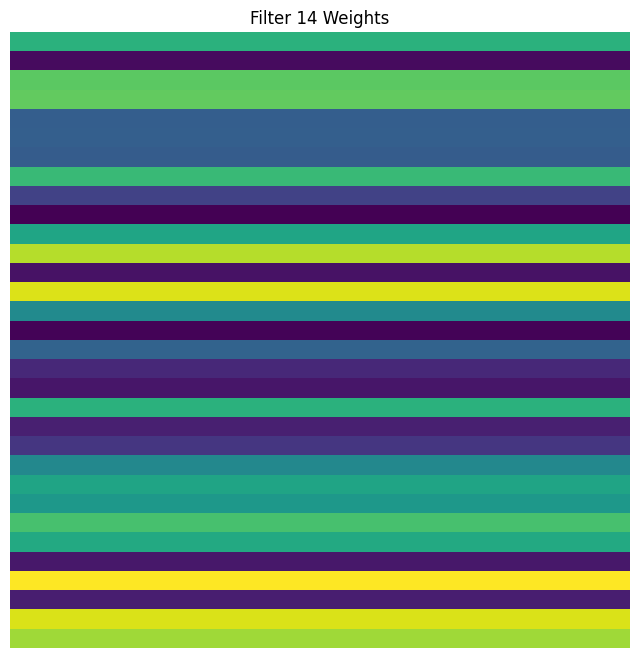

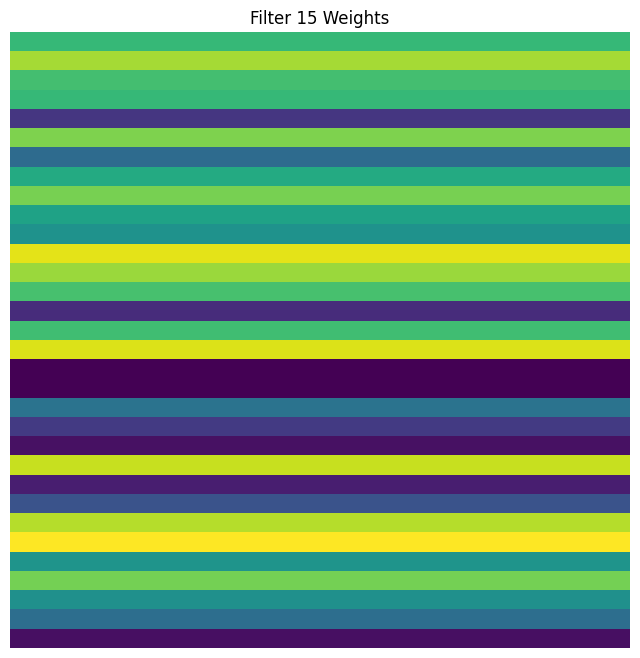

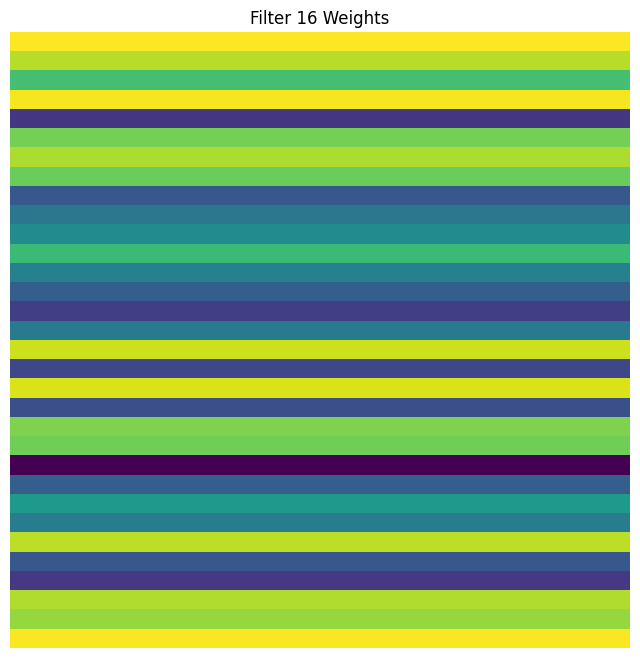

148/148 [==============================] - 0s 735us/step
F1 Score for Question 12: 0.9271568404279535

TRAIN QUESTION 13 MODEL
Index(['checkpoint_pct', 'cutscene_click_pct', 'map_click_pct',
       'map_hover_pct', 'navigate_click_pct', 'notification_click_pct',
       'object_click_pct', 'object_hover_pct', 'observation_click_pct',
       'person_click_pct', 'notebook_click_pct', 'elapsed_duration',
       'level_5_count', 'level_6_count', 'level_7_count', 'level_8_count',
       'level_9_count', 'level_10_count', 'level_11_count', 'level_12_count',
       'event_name_checkpoint_count', 'event_name_cutscene_click_count',
       'event_name_map_click_count', 'event_name_map_hover_count',
       'event_name_navigate_click_count',
       'event_name_notification_click_count', 'event_name_object_click_count',
       'event_name_object_hover_count', 'event_name_observation_click_count',
       'event_name_person_click_count', 'event_name_notebook_click_count',
       'name_basic_count', 'n

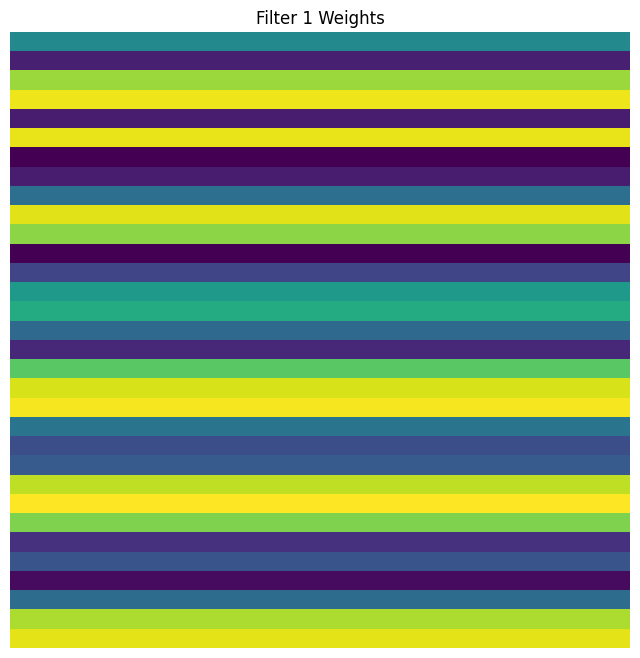

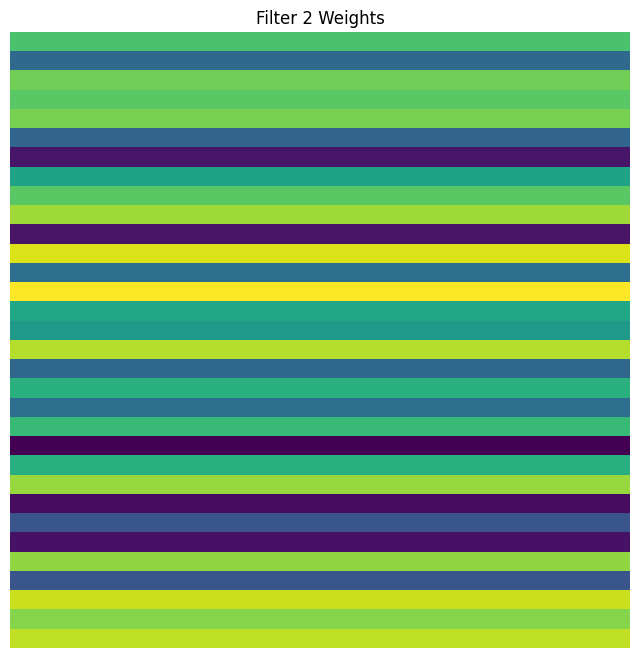

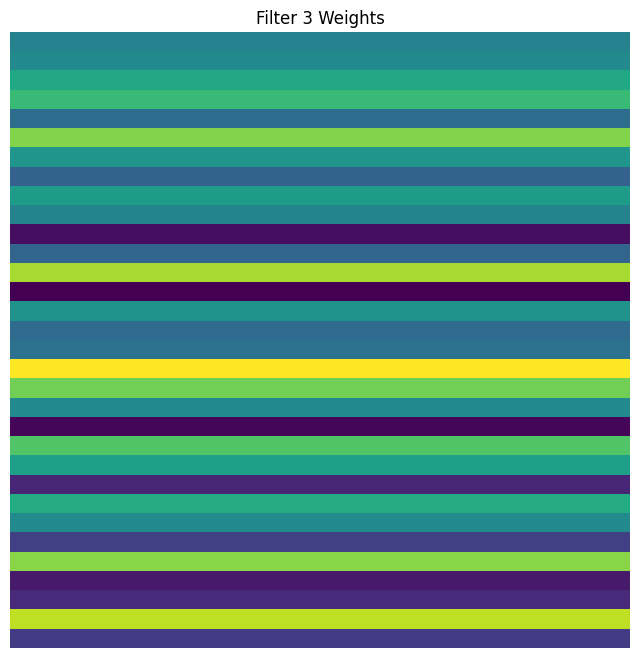

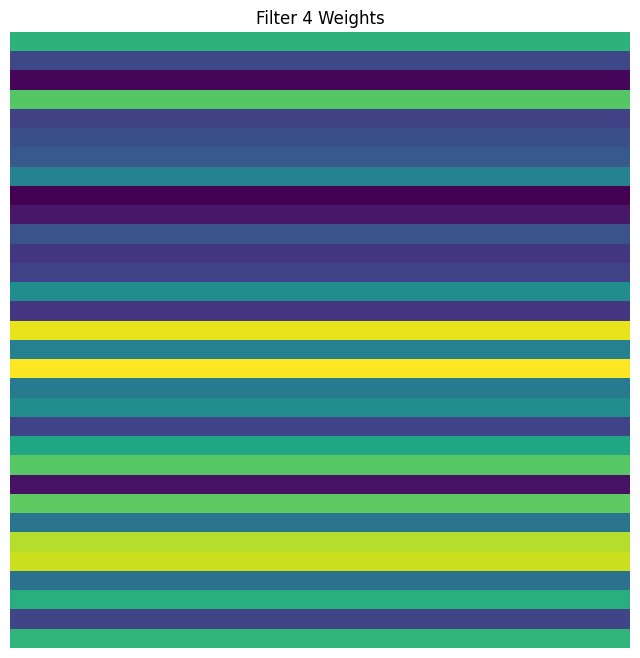

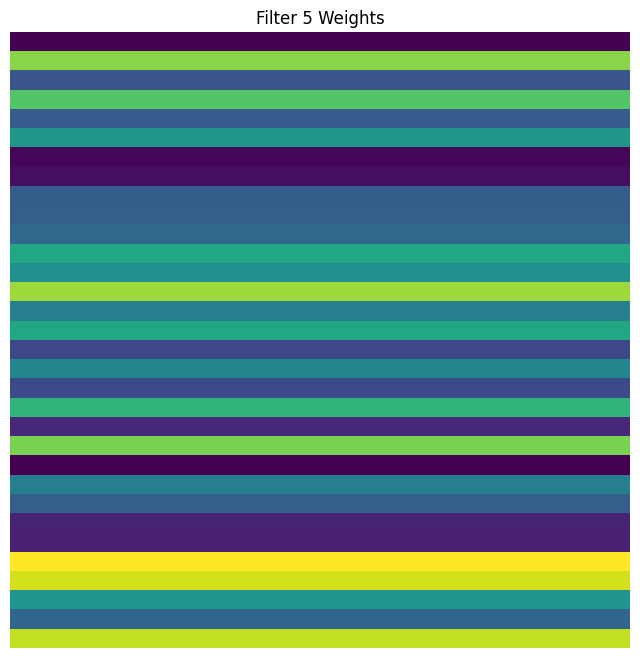

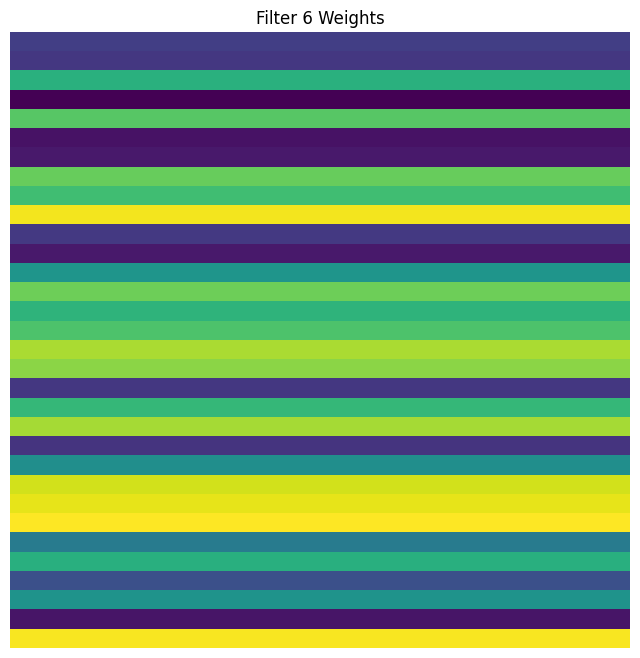

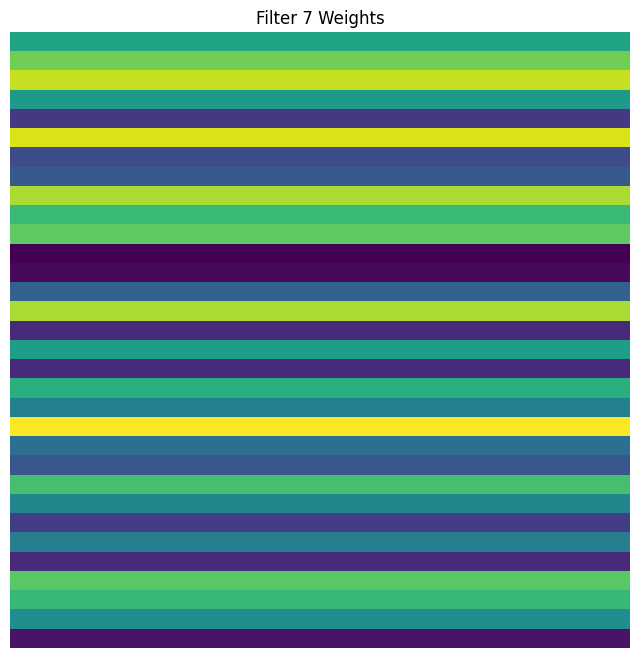

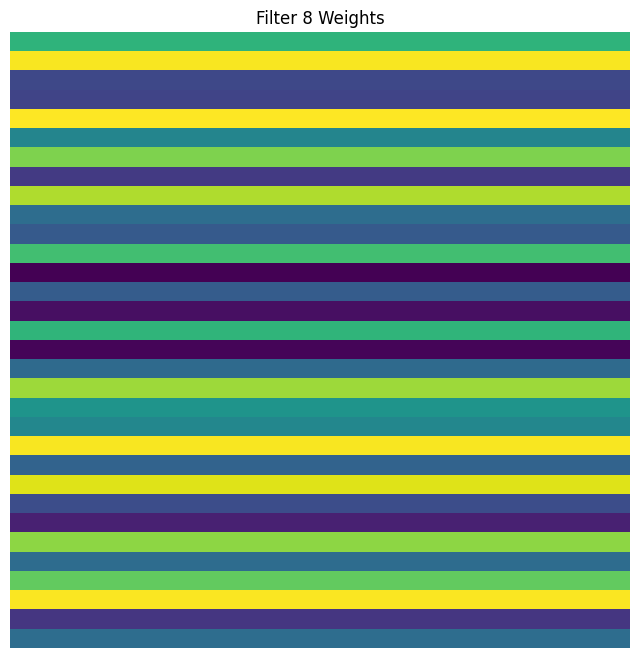

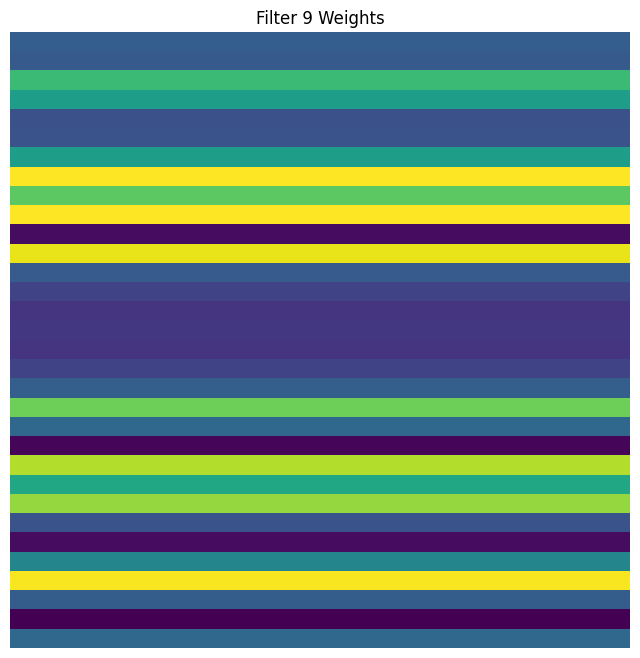

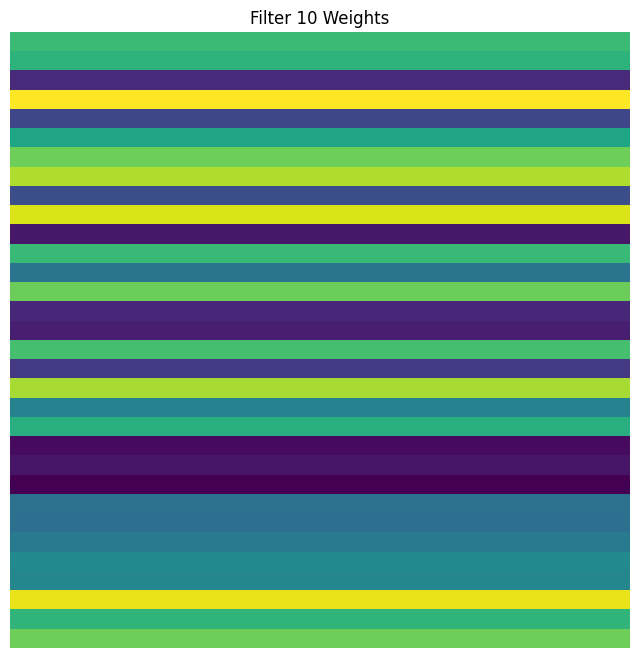

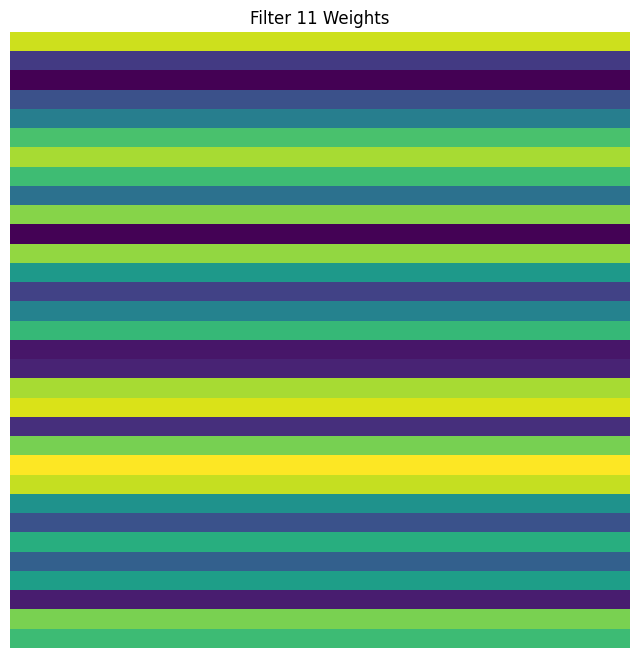

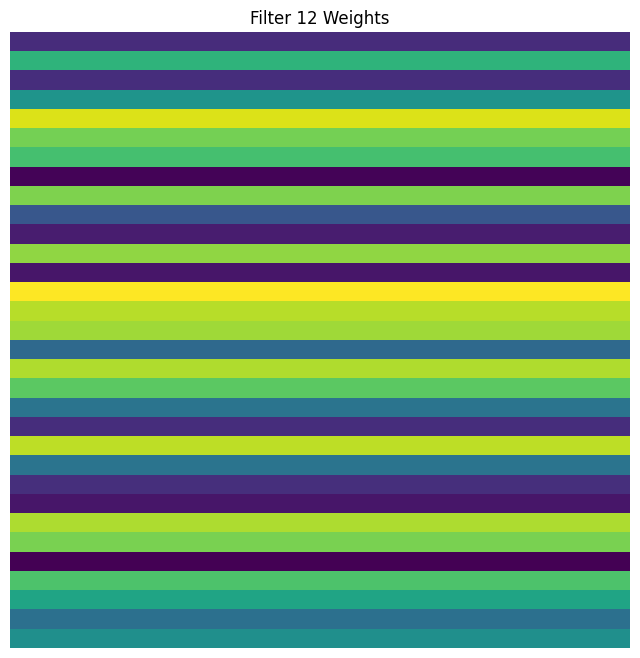

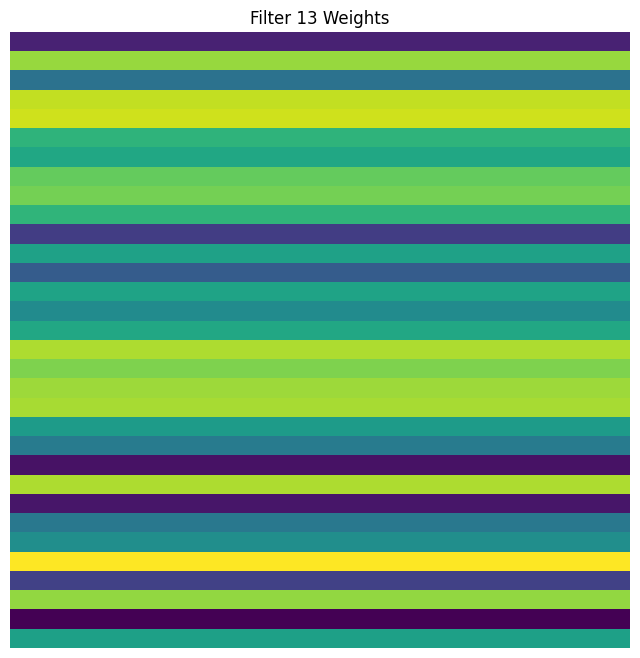

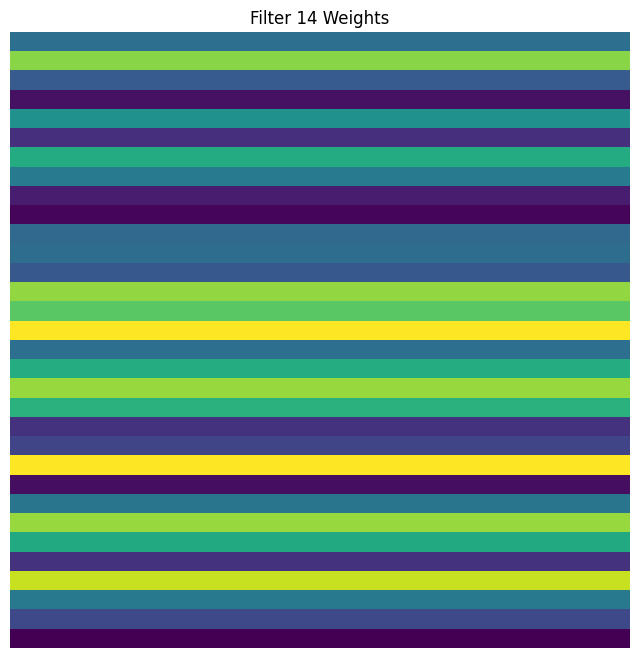

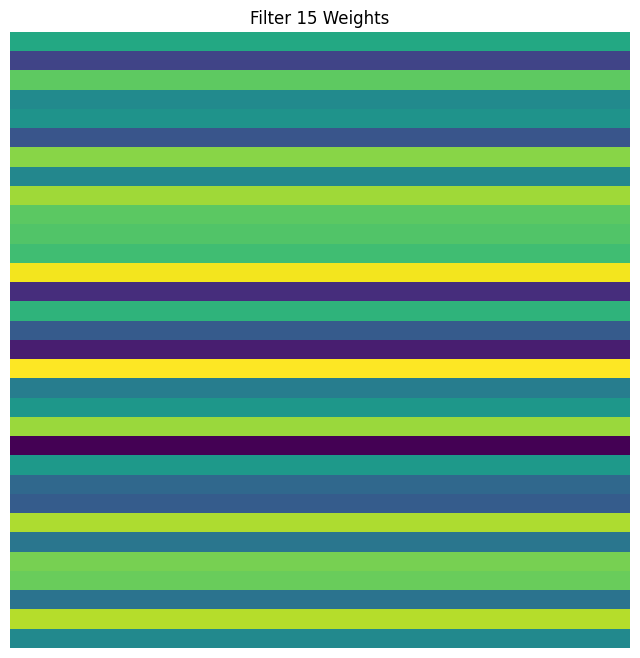

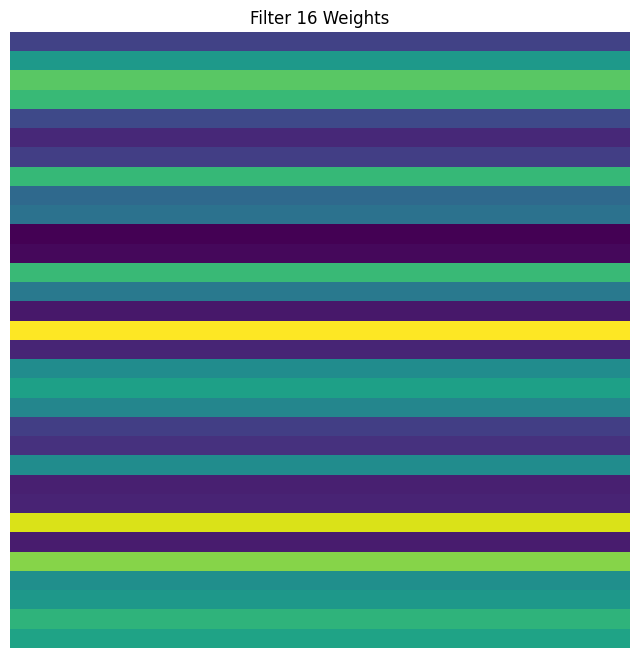

148/148 [==============================] - 0s 789us/step
F1 Score for Question 13: 0.0

TRAIN QUESTION 14 MODEL
Index(['checkpoint_pct', 'cutscene_click_pct', 'map_click_pct',
       'map_hover_pct', 'navigate_click_pct', 'notification_click_pct',
       'object_click_pct', 'object_hover_pct', 'observation_click_pct',
       'person_click_pct', 'notebook_click_pct', 'elapsed_duration',
       'level_13_count', 'level_14_count', 'level_15_count', 'level_16_count',
       'level_17_count', 'level_18_count', 'level_19_count', 'level_20_count',
       'level_21_count', 'level_22_count', 'event_name_checkpoint_count',
       'event_name_cutscene_click_count', 'event_name_map_click_count',
       'event_name_map_hover_count', 'event_name_navigate_click_count',
       'event_name_notification_click_count', 'event_name_object_click_count',
       'event_name_object_hover_count', 'event_name_observation_click_count',
       'event_name_person_click_count', 'event_name_notebook_click_count',
   

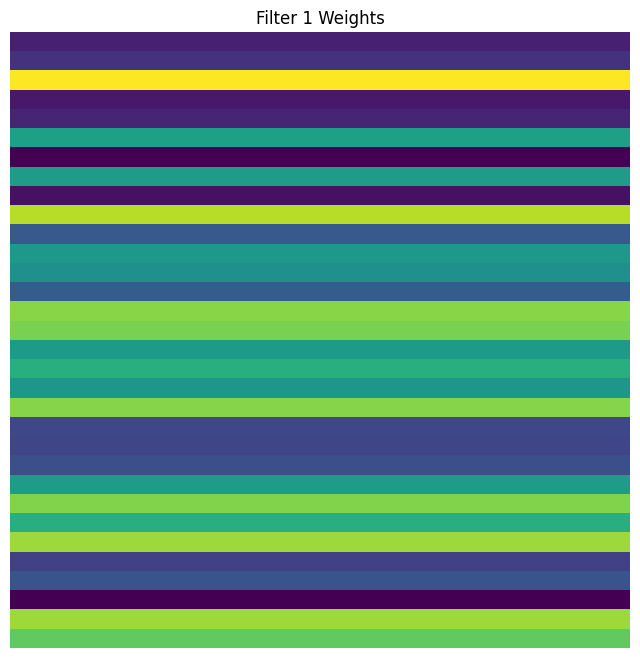

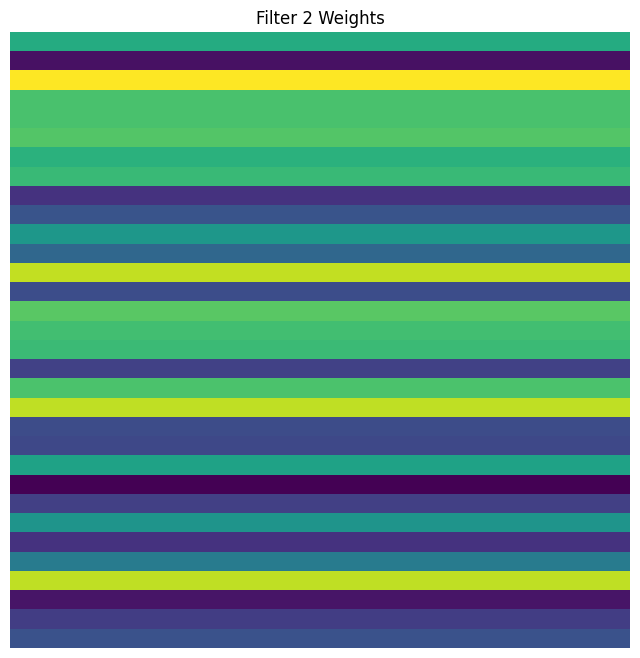

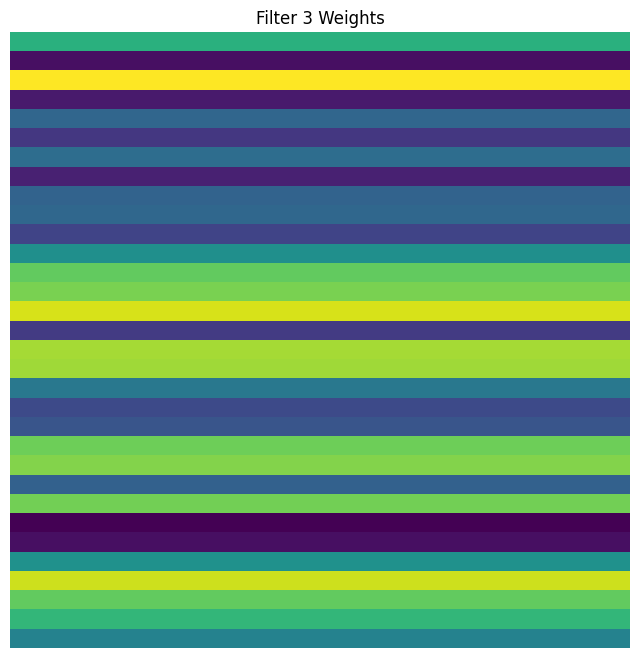

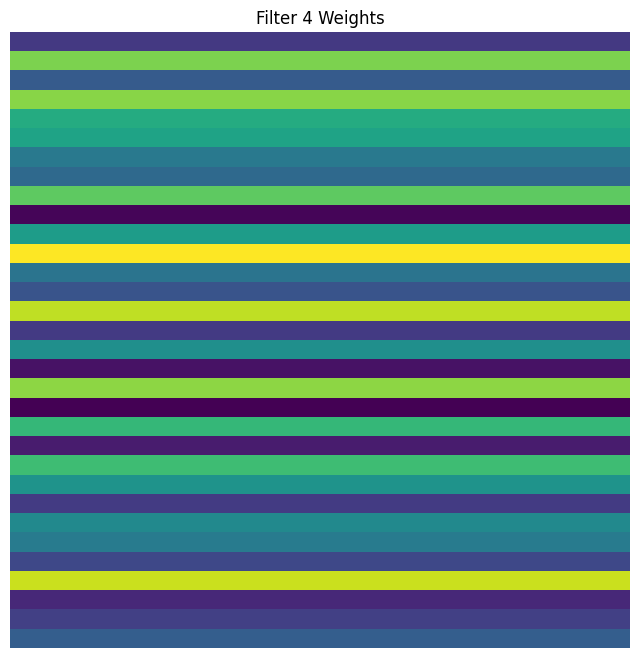

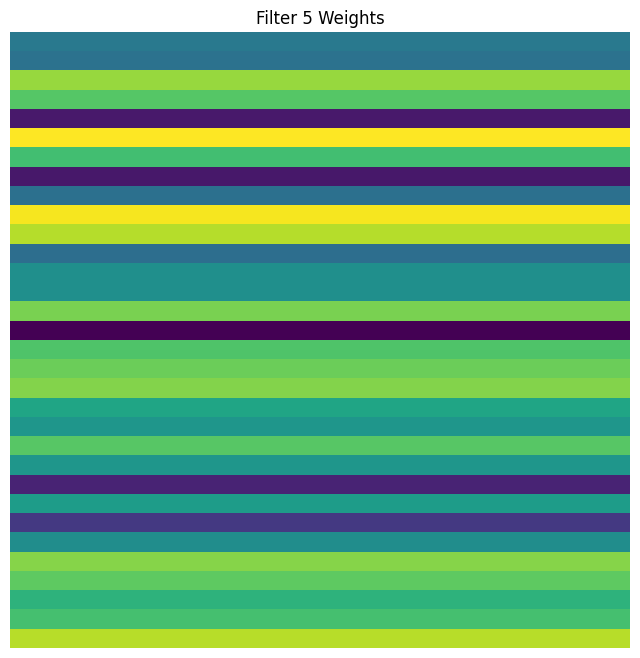

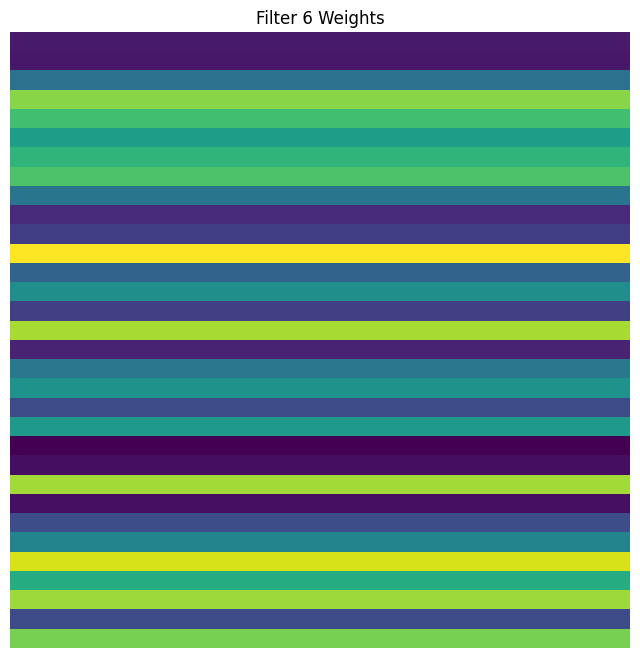

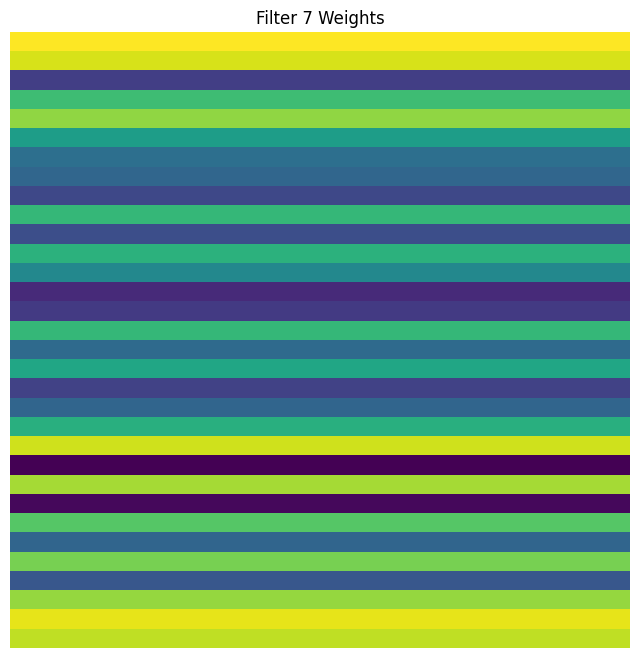

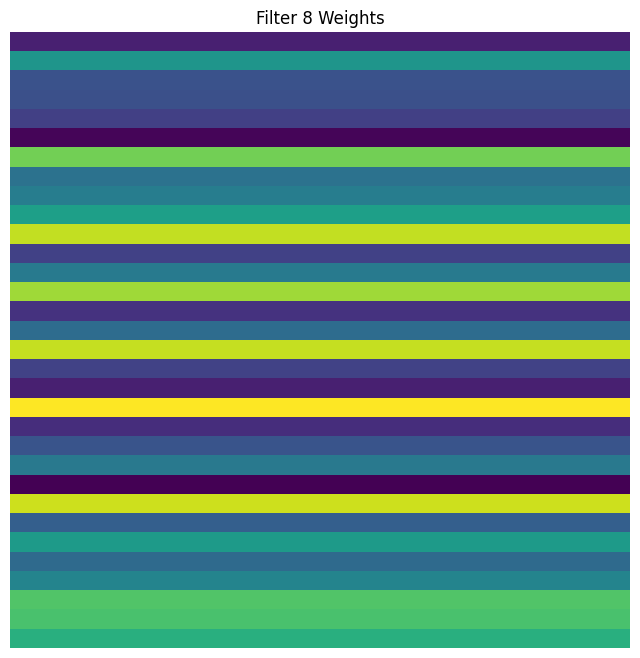

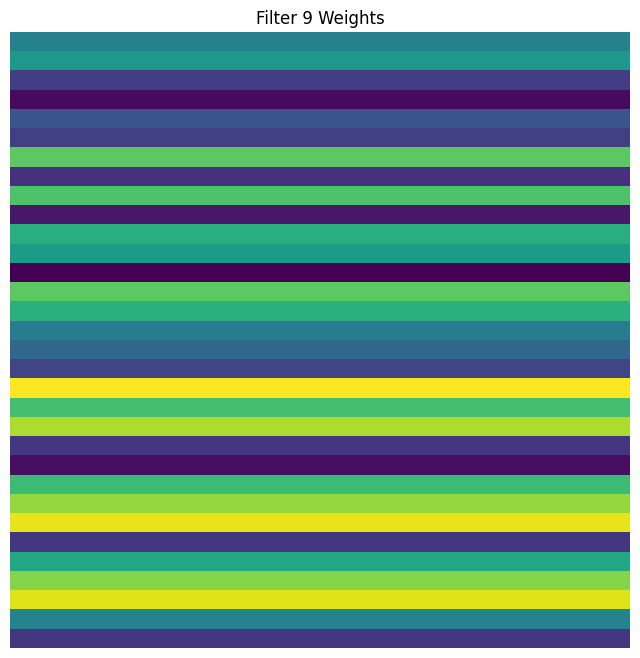

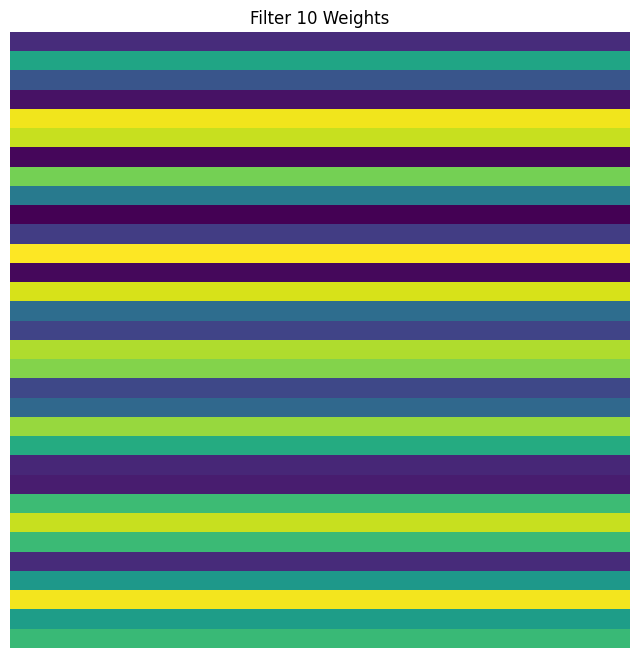

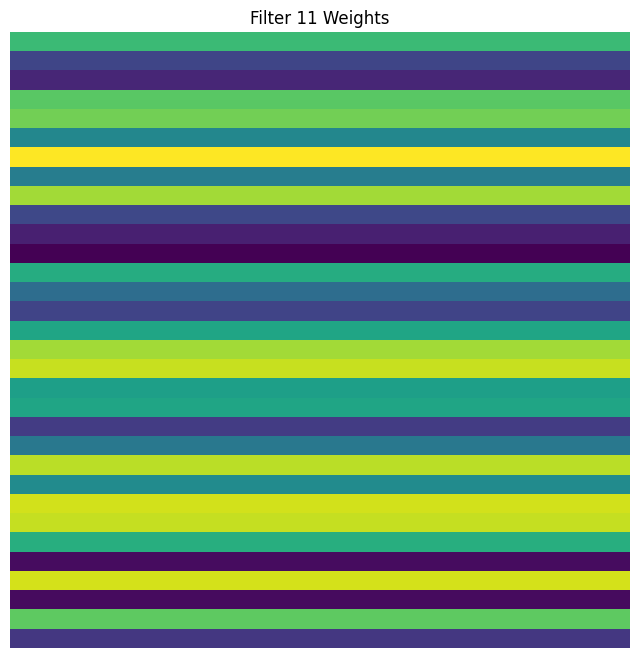

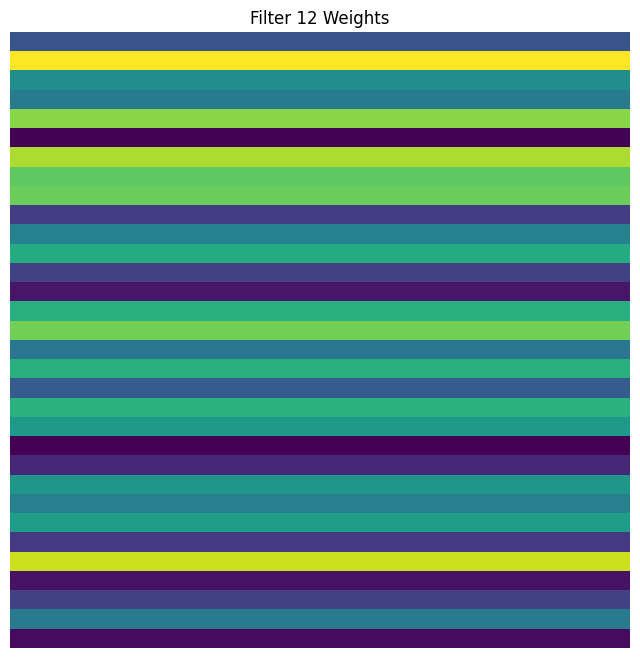

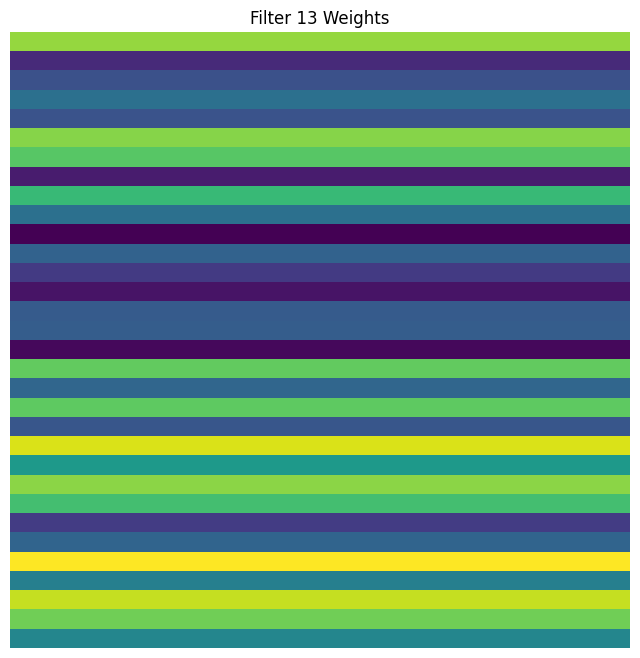

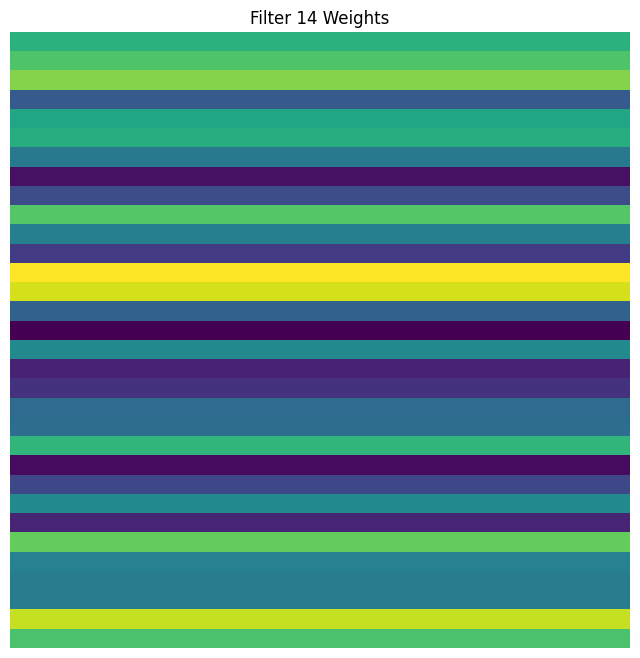

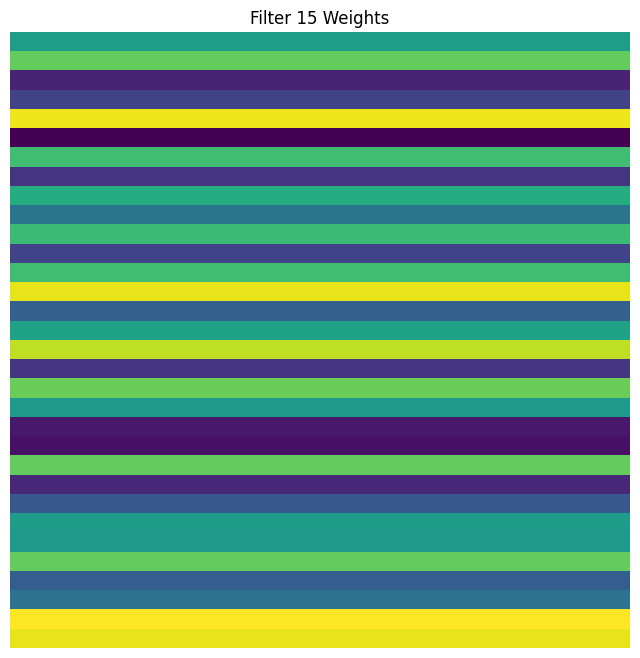

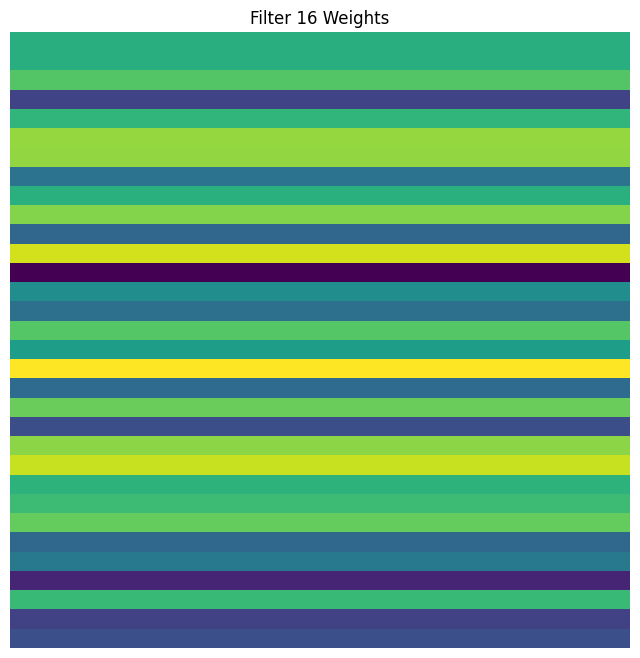

148/148 [==============================] - 0s 772us/step
F1 Score for Question 14: 0.8328228688106176

TRAIN QUESTION 15 MODEL
Index(['checkpoint_pct', 'cutscene_click_pct', 'map_click_pct',
       'map_hover_pct', 'navigate_click_pct', 'notification_click_pct',
       'object_click_pct', 'object_hover_pct', 'observation_click_pct',
       'person_click_pct', 'notebook_click_pct', 'elapsed_duration',
       'level_13_count', 'level_14_count', 'level_15_count', 'level_16_count',
       'level_17_count', 'level_18_count', 'level_19_count', 'level_20_count',
       'level_21_count', 'level_22_count', 'event_name_checkpoint_count',
       'event_name_cutscene_click_count', 'event_name_map_click_count',
       'event_name_map_hover_count', 'event_name_navigate_click_count',
       'event_name_notification_click_count', 'event_name_object_click_count',
       'event_name_object_hover_count', 'event_name_observation_click_count',
       'event_name_person_click_count', 'event_name_notebook_cl

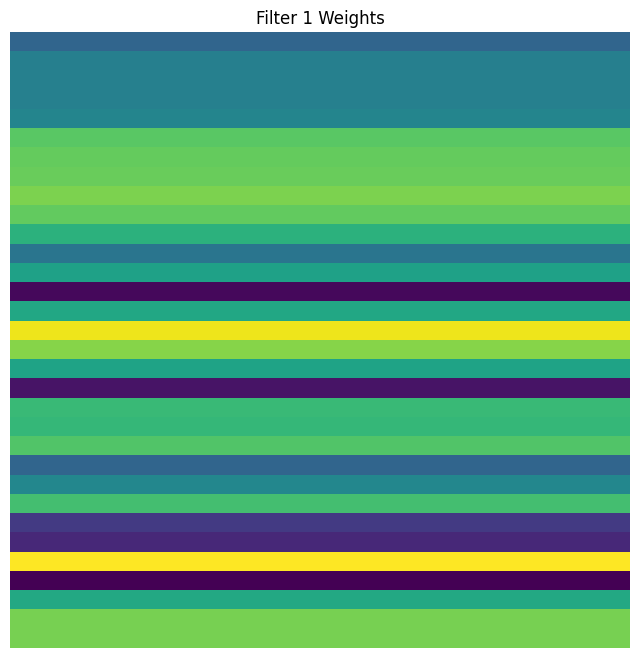

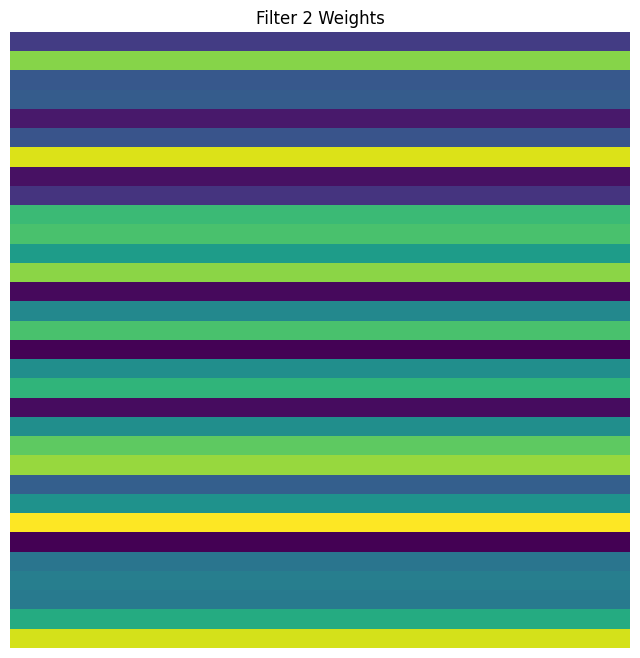

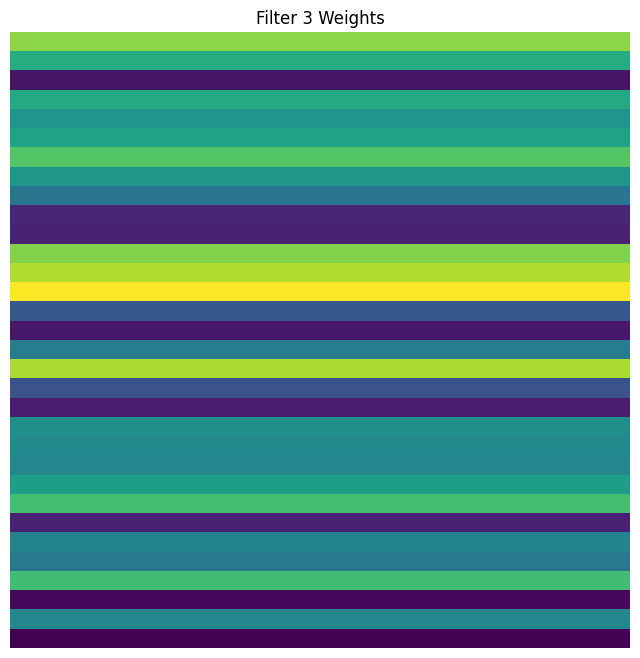

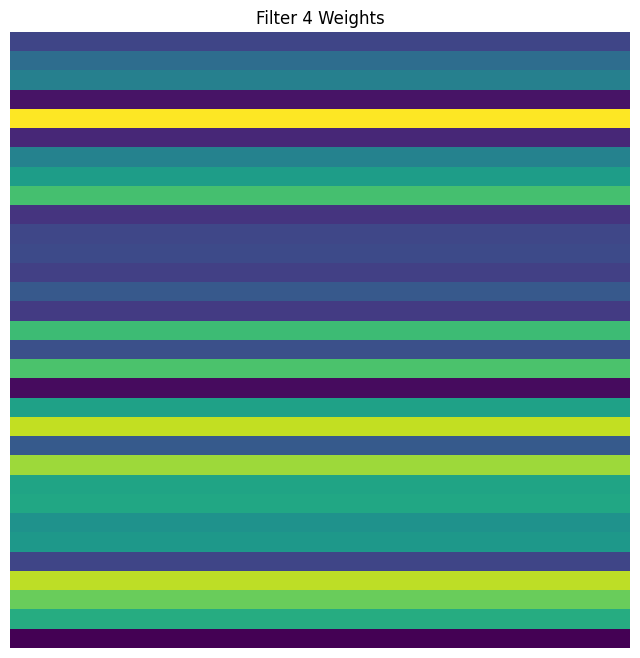

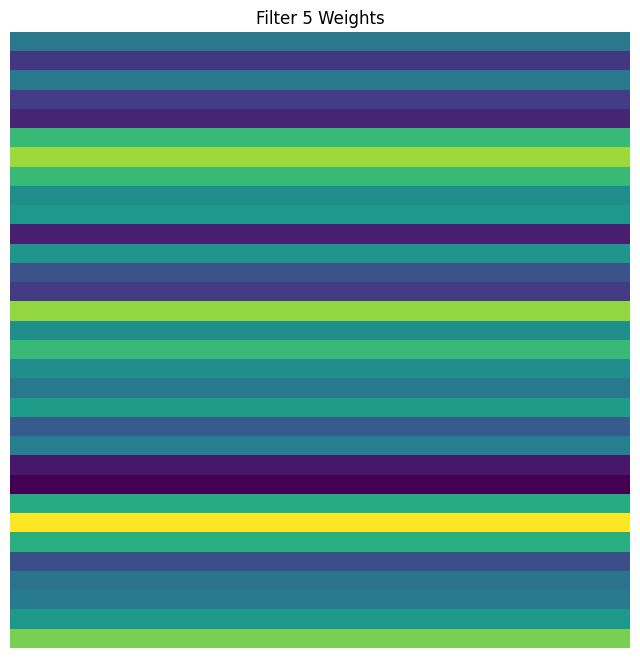

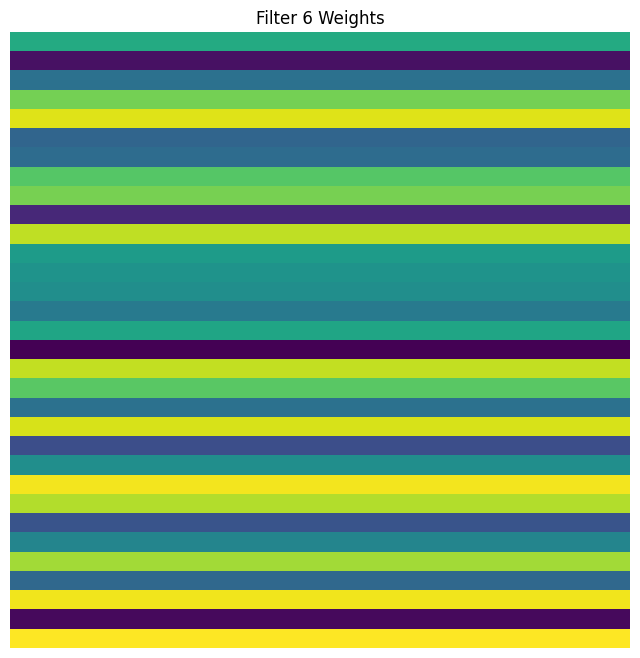

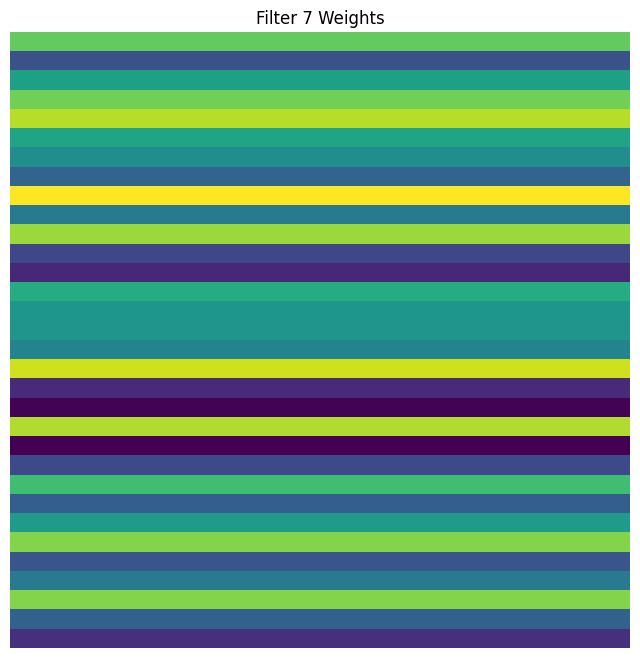

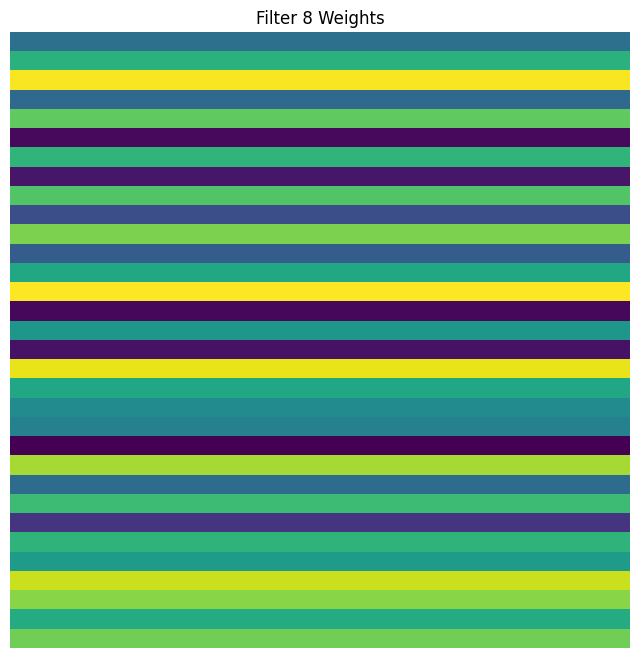

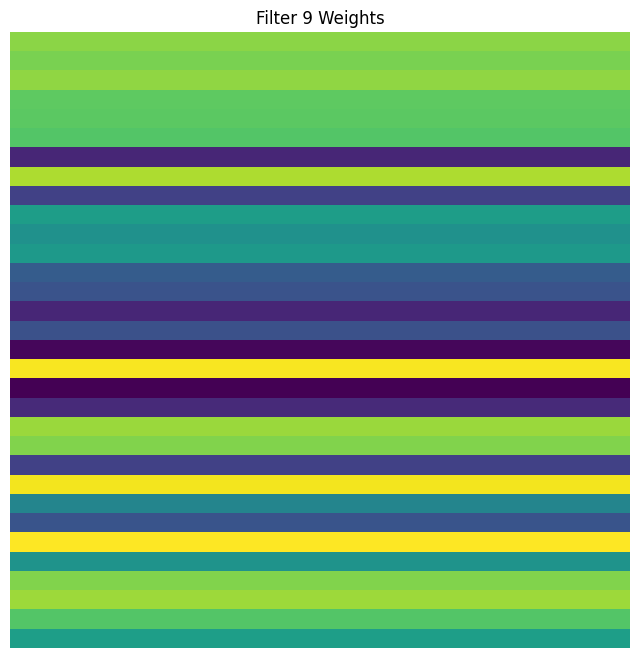

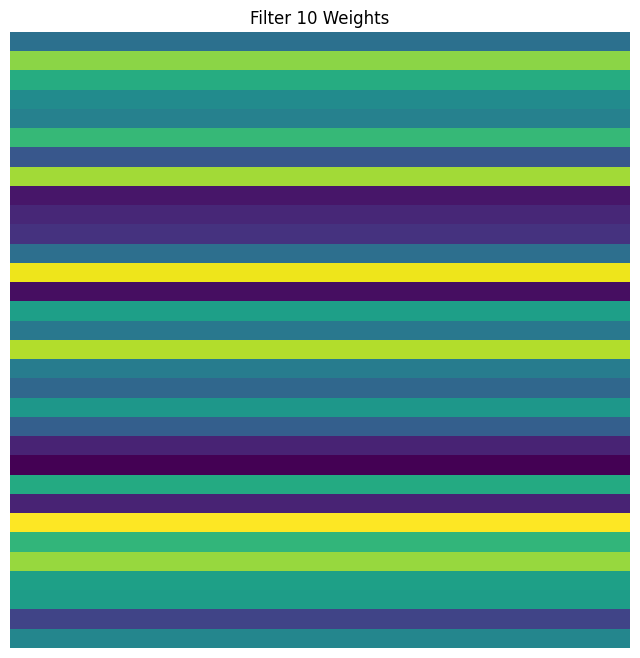

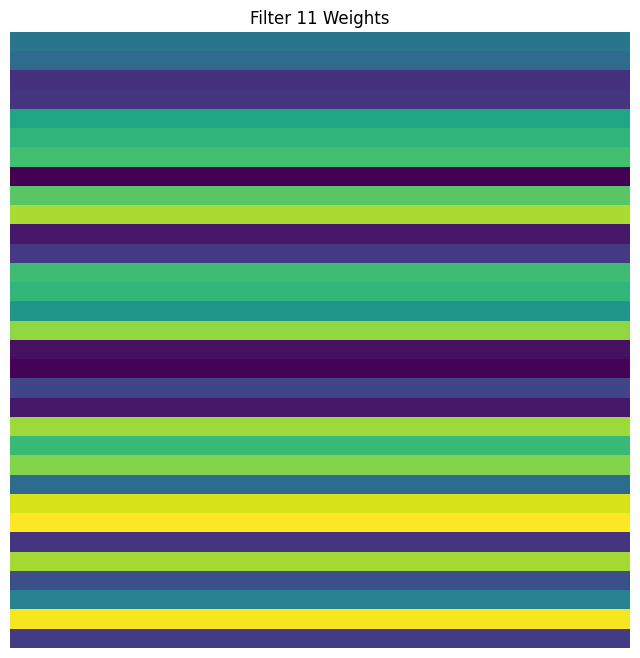

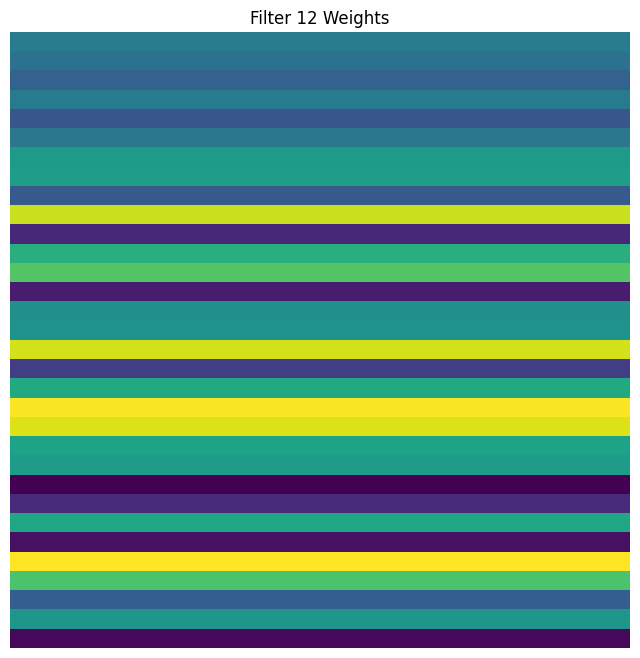

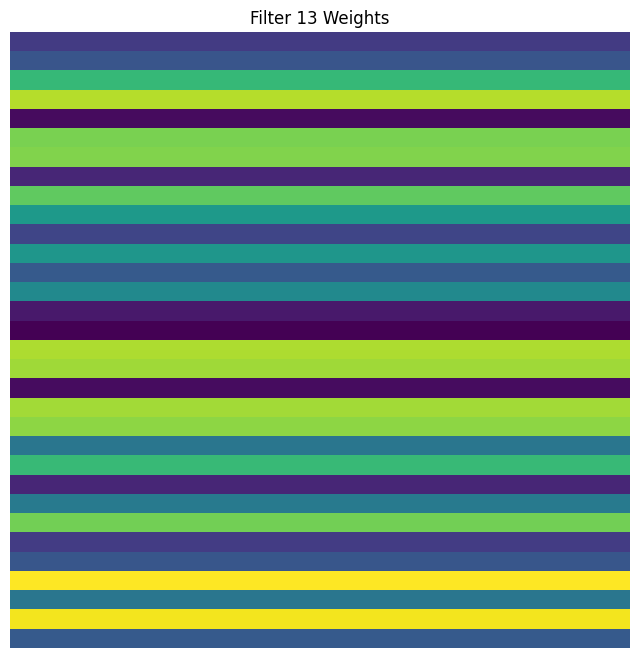

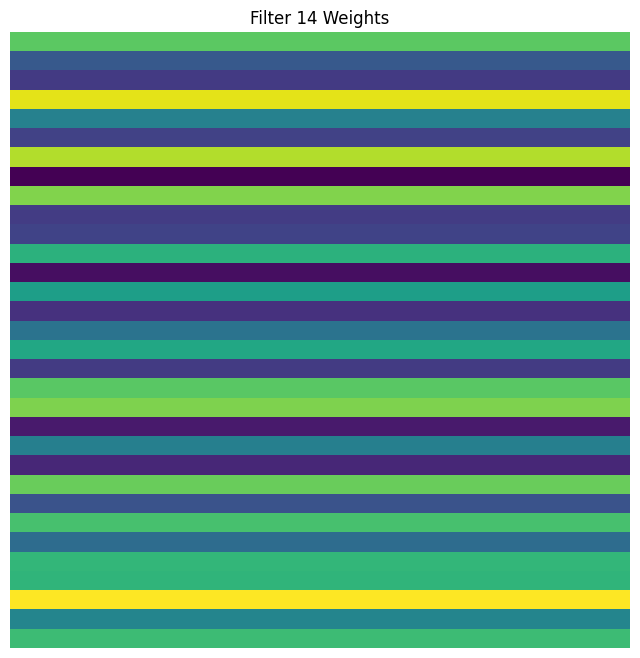

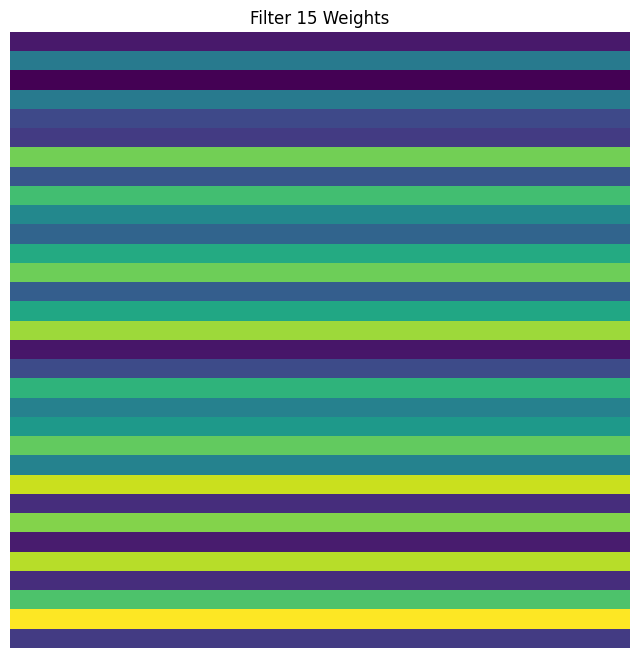

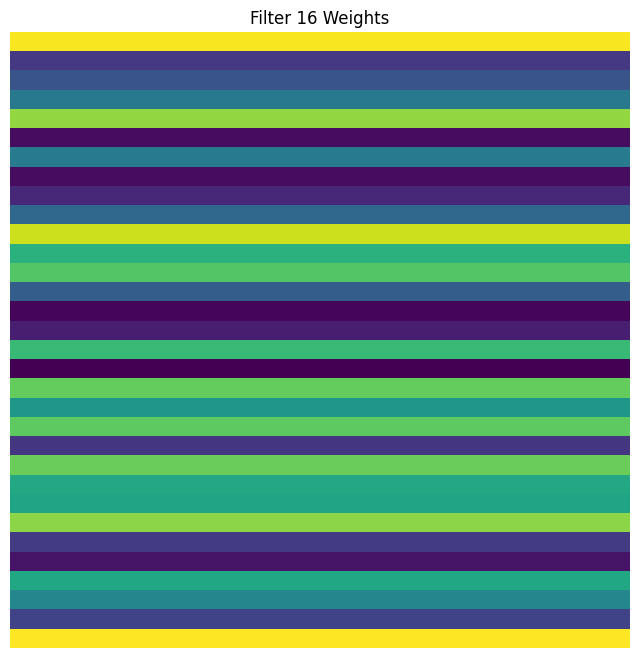

148/148 [==============================] - 0s 782us/step
F1 Score for Question 15: 0.59549588566479

TRAIN QUESTION 16 MODEL
Index(['checkpoint_pct', 'cutscene_click_pct', 'map_click_pct',
       'map_hover_pct', 'navigate_click_pct', 'notification_click_pct',
       'object_click_pct', 'object_hover_pct', 'observation_click_pct',
       'person_click_pct', 'notebook_click_pct', 'elapsed_duration',
       'level_13_count', 'level_14_count', 'level_15_count', 'level_16_count',
       'level_17_count', 'level_18_count', 'level_19_count', 'level_20_count',
       'level_21_count', 'level_22_count', 'event_name_checkpoint_count',
       'event_name_cutscene_click_count', 'event_name_map_click_count',
       'event_name_map_hover_count', 'event_name_navigate_click_count',
       'event_name_notification_click_count', 'event_name_object_click_count',
       'event_name_object_hover_count', 'event_name_observation_click_count',
       'event_name_person_click_count', 'event_name_notebook_clic

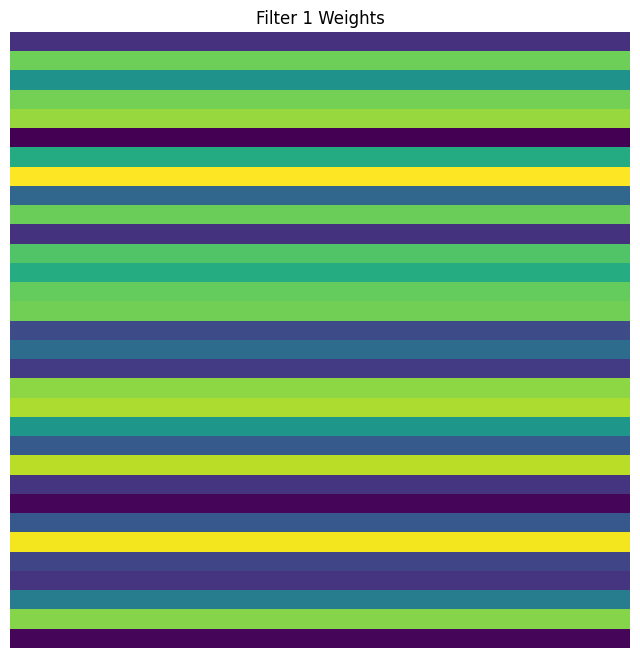

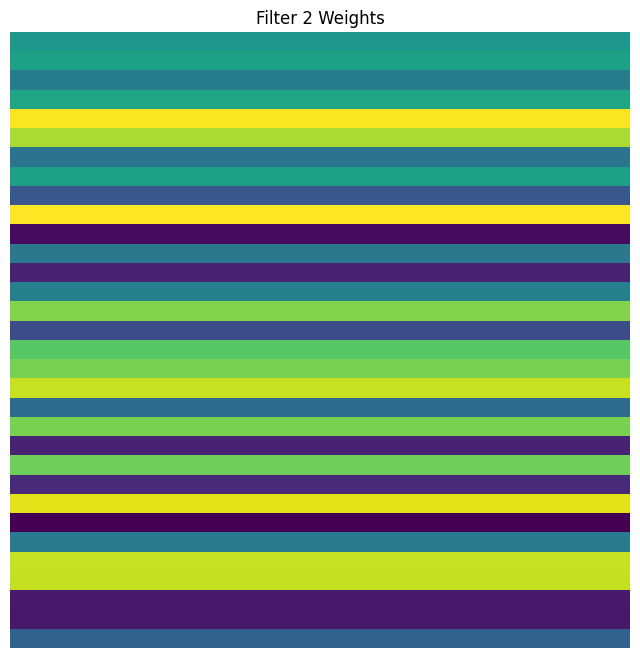

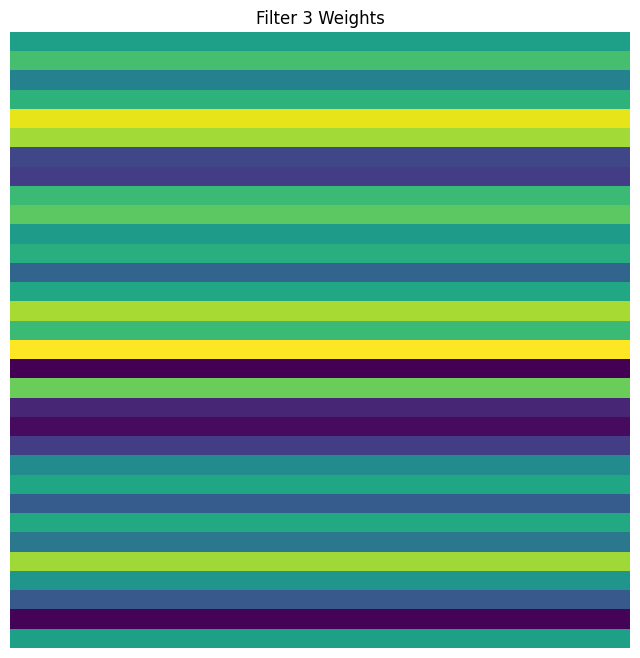

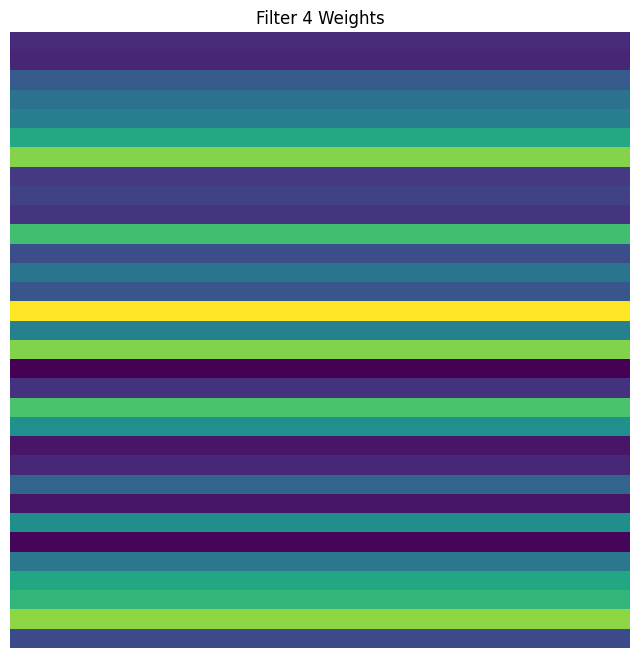

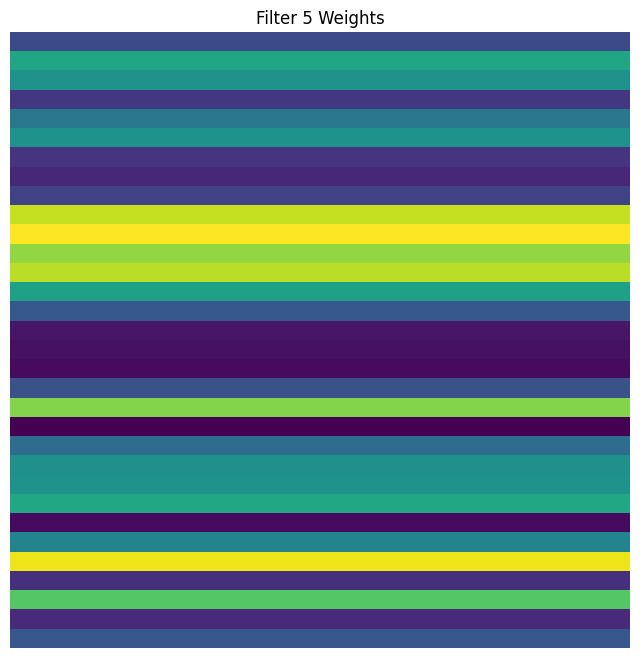

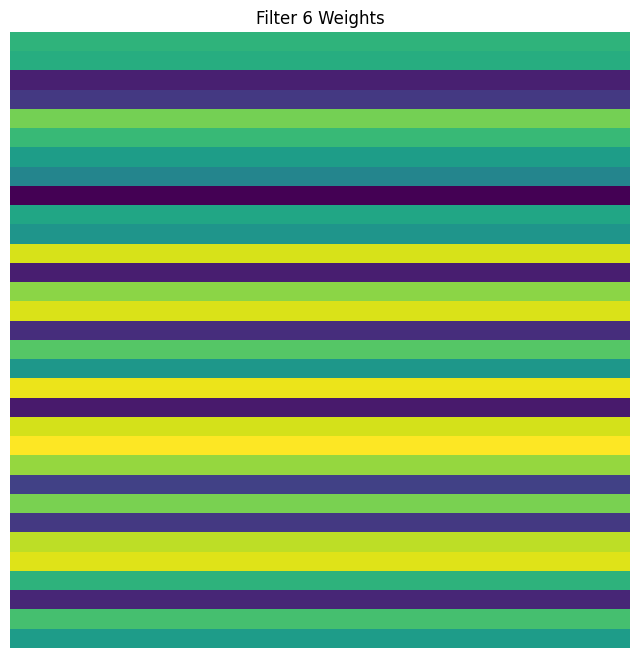

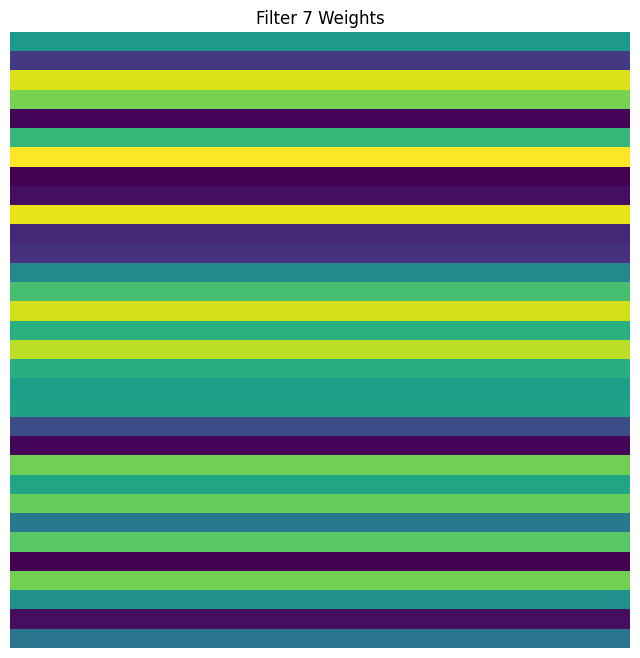

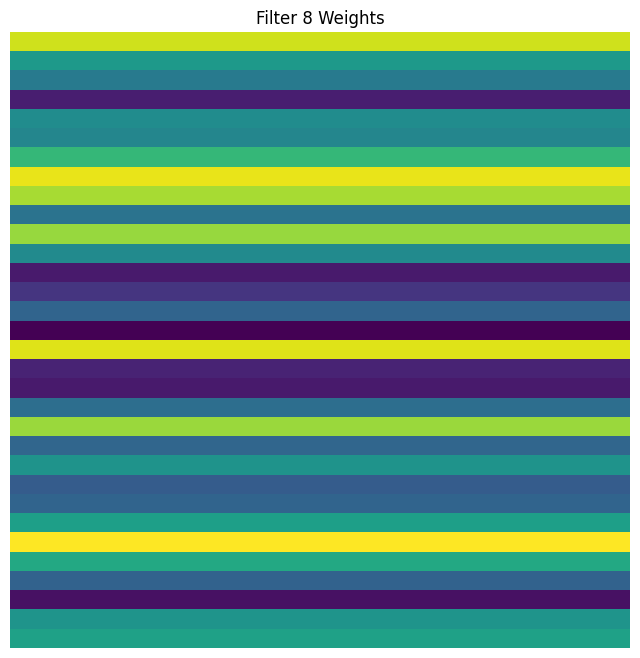

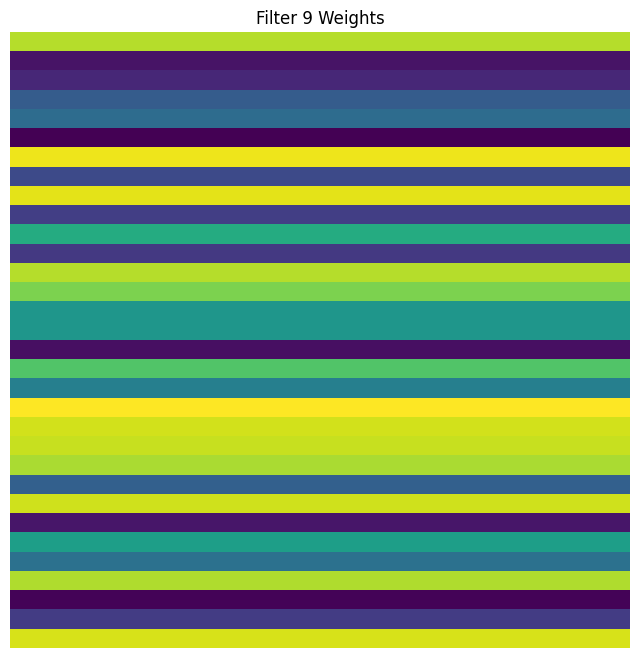

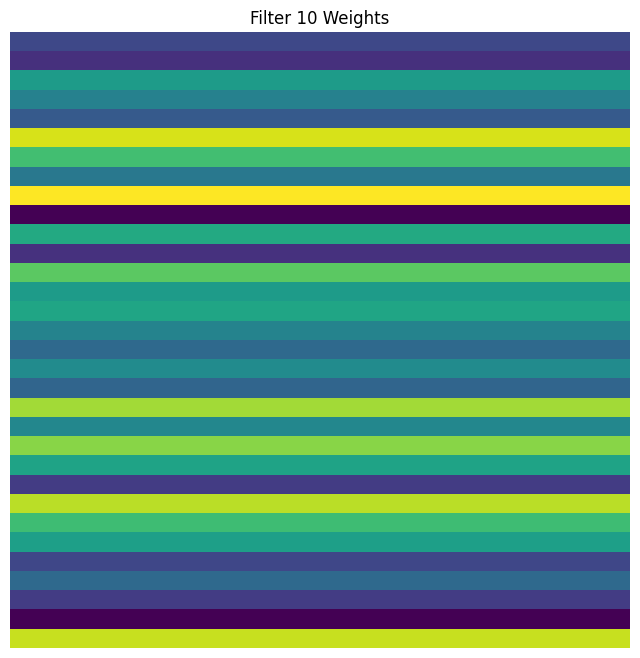

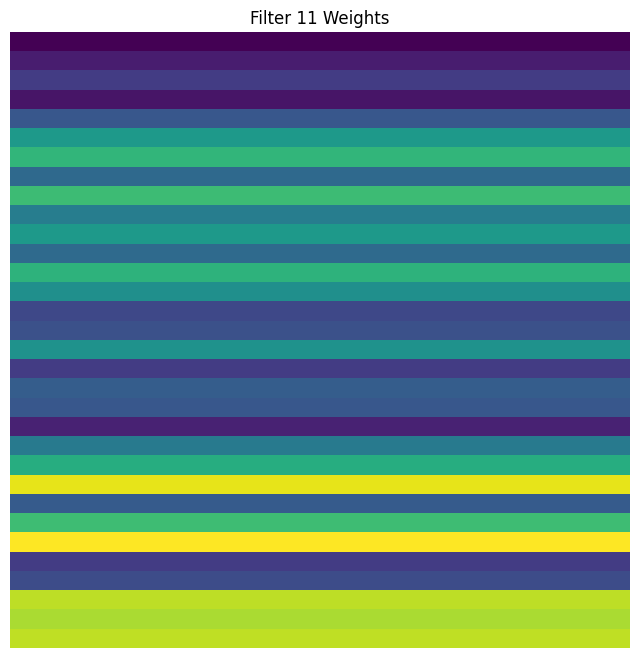

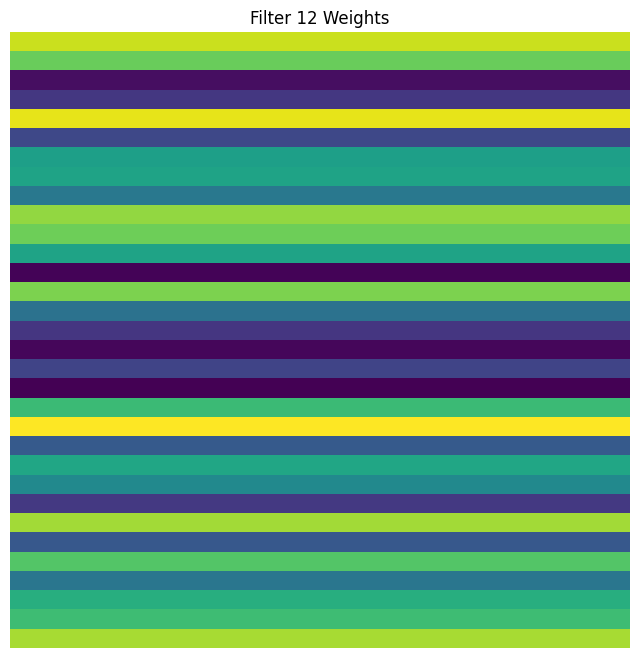

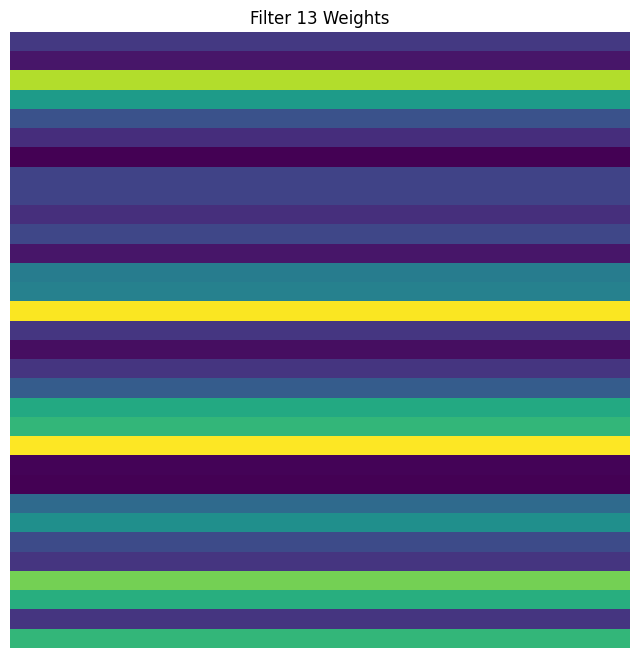

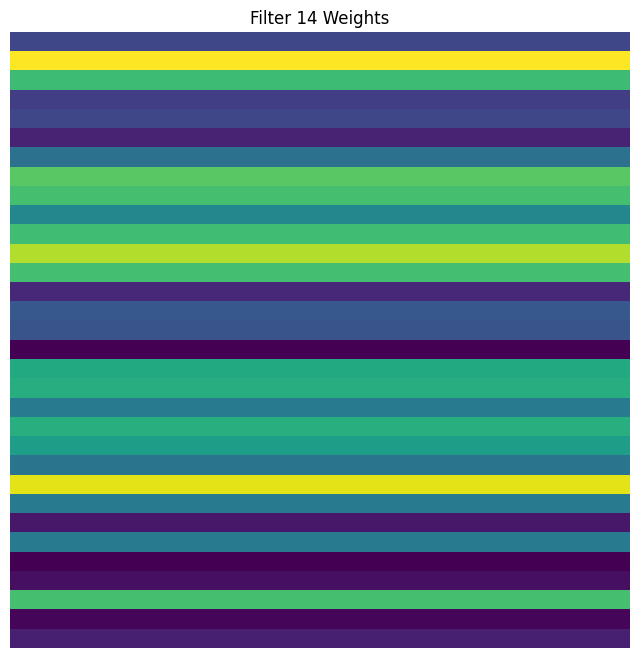

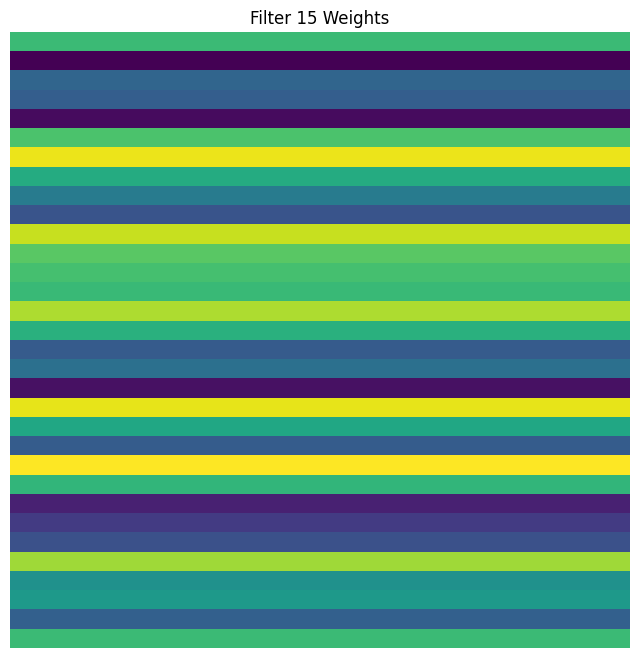

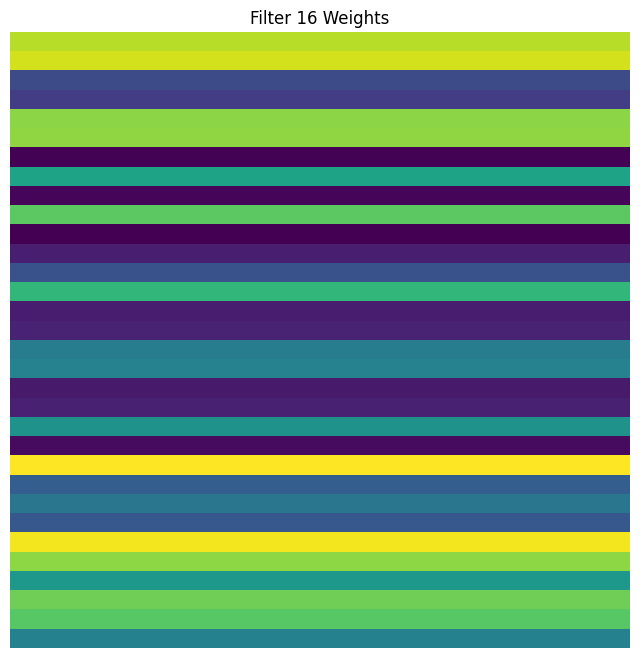

148/148 [==============================] - 0s 767us/step
F1 Score for Question 16: 0.8480997189294879

TRAIN QUESTION 17 MODEL
Index(['checkpoint_pct', 'cutscene_click_pct', 'map_click_pct',
       'map_hover_pct', 'navigate_click_pct', 'notification_click_pct',
       'object_click_pct', 'object_hover_pct', 'observation_click_pct',
       'person_click_pct', 'notebook_click_pct', 'elapsed_duration',
       'level_13_count', 'level_14_count', 'level_15_count', 'level_16_count',
       'level_17_count', 'level_18_count', 'level_19_count', 'level_20_count',
       'level_21_count', 'level_22_count', 'event_name_checkpoint_count',
       'event_name_cutscene_click_count', 'event_name_map_click_count',
       'event_name_map_hover_count', 'event_name_navigate_click_count',
       'event_name_notification_click_count', 'event_name_object_click_count',
       'event_name_object_hover_count', 'event_name_observation_click_count',
       'event_name_person_click_count', 'event_name_notebook_cl

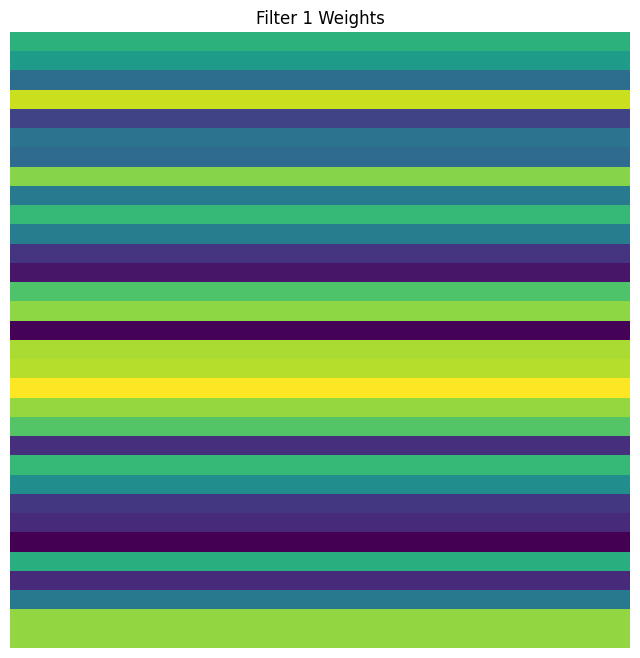

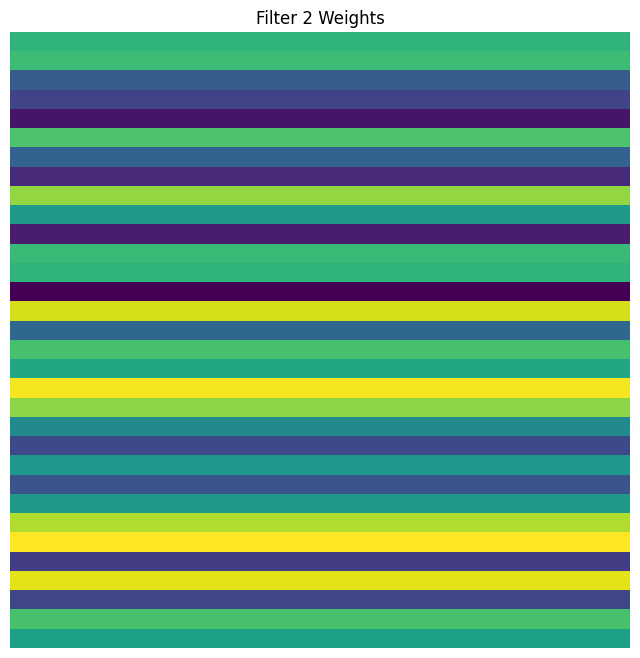

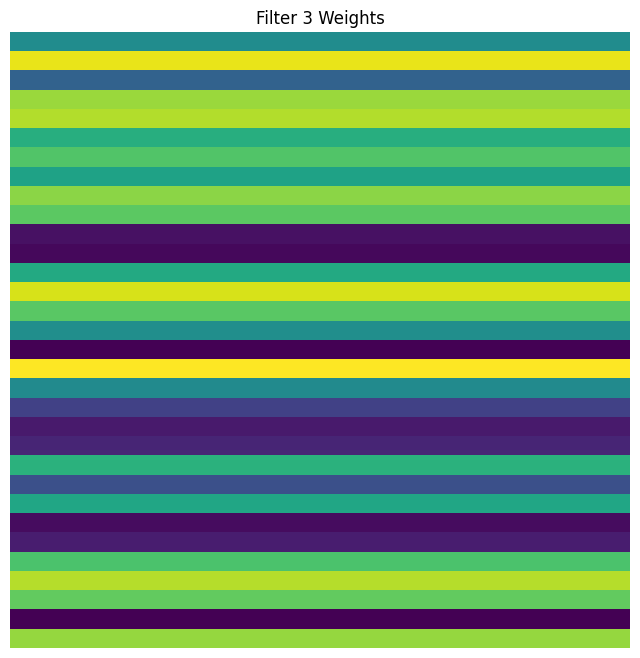

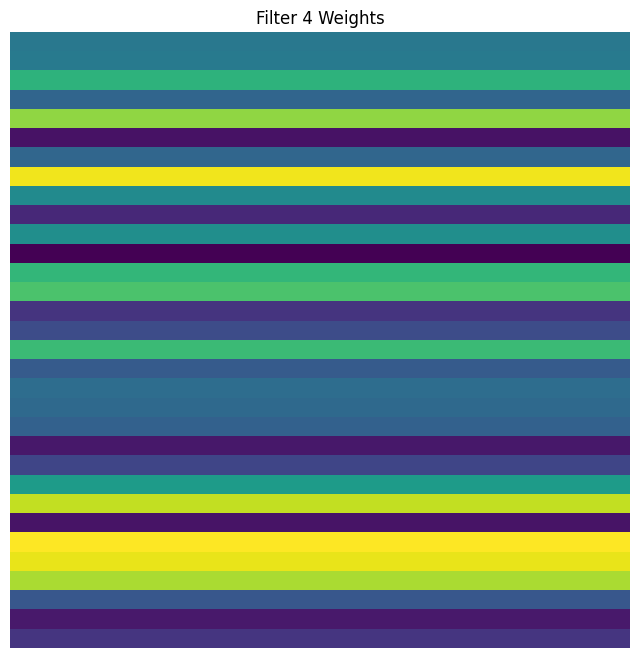

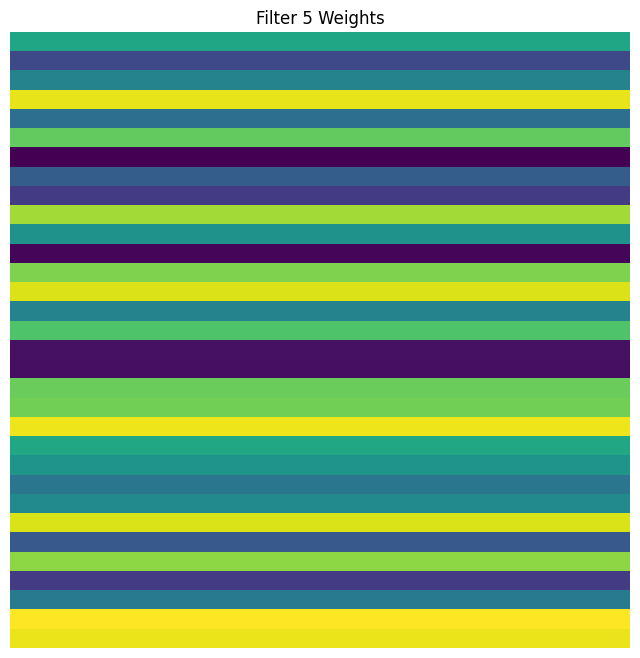

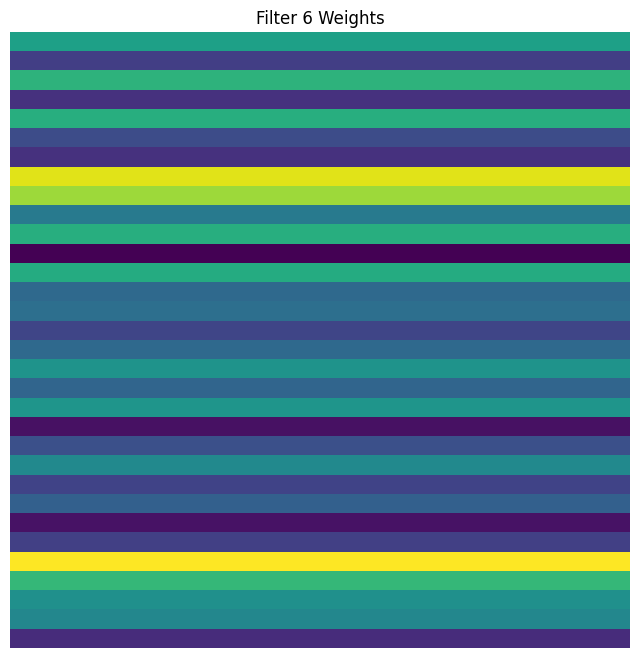

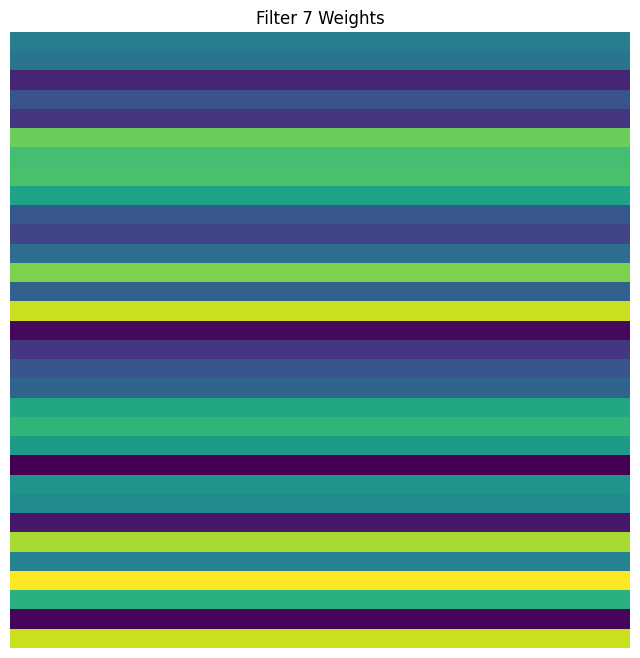

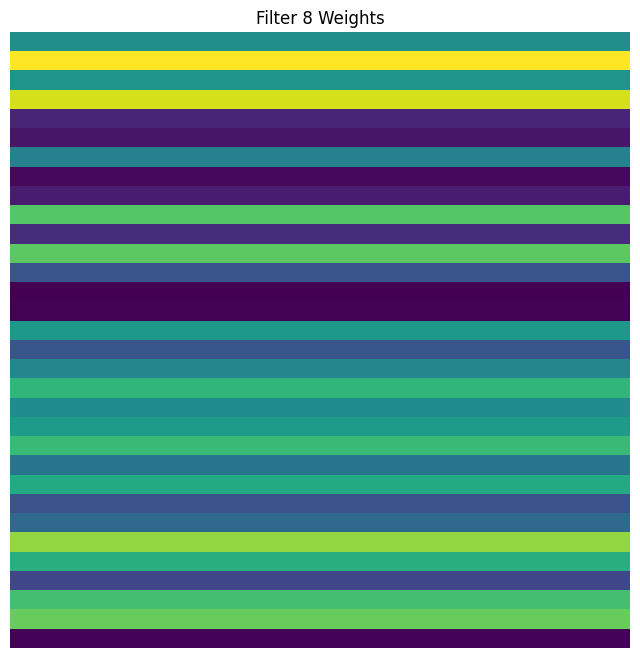

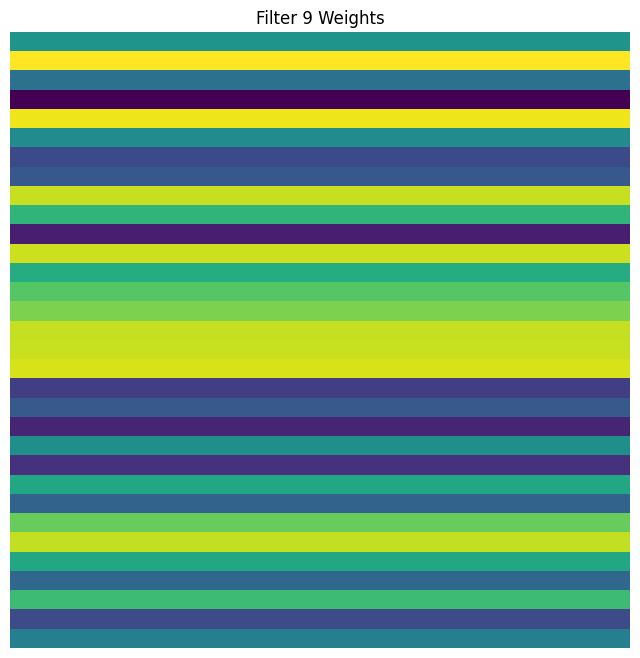

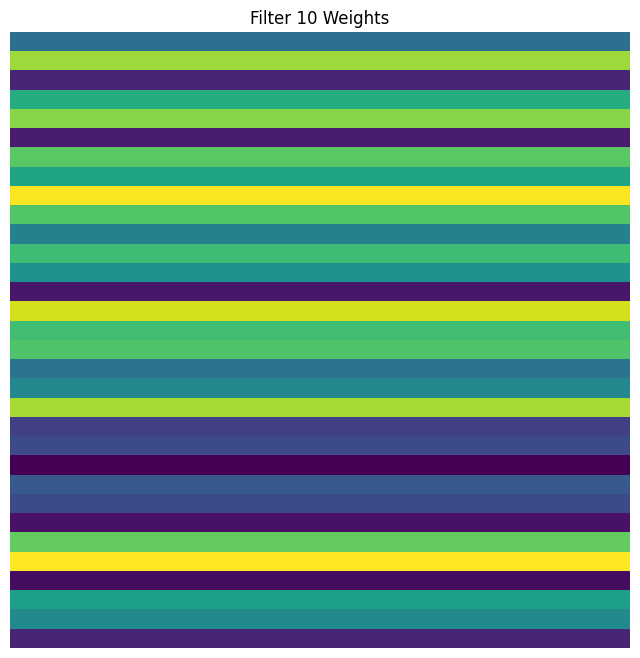

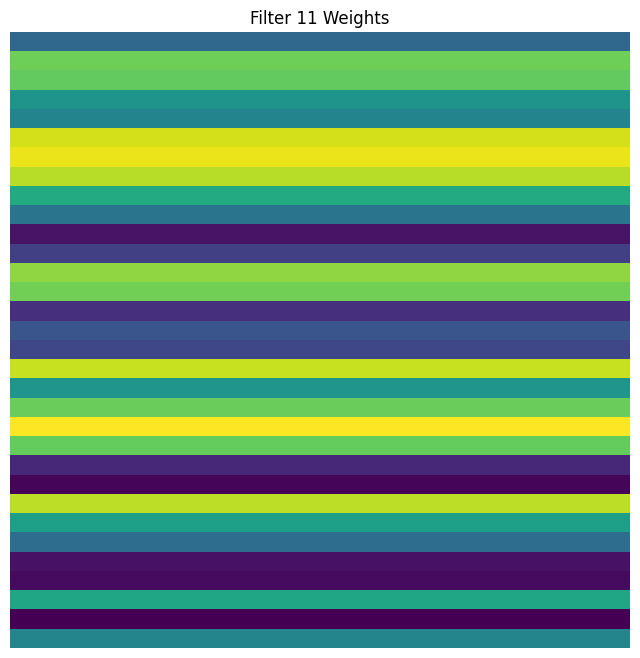

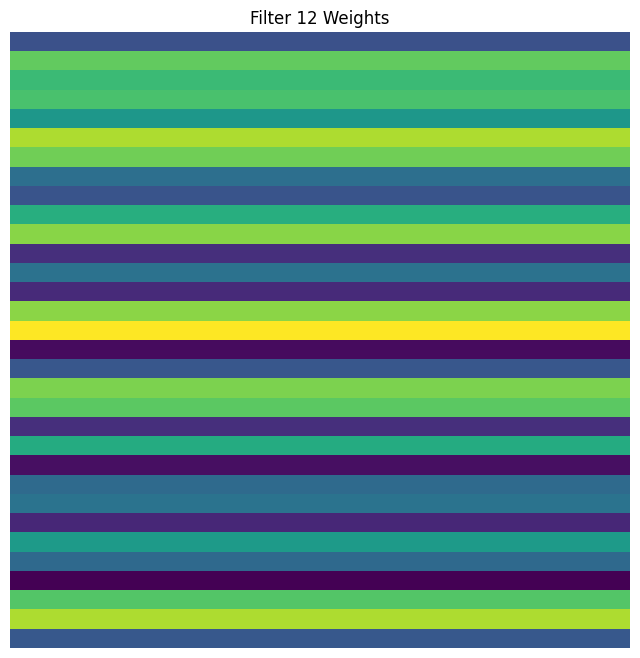

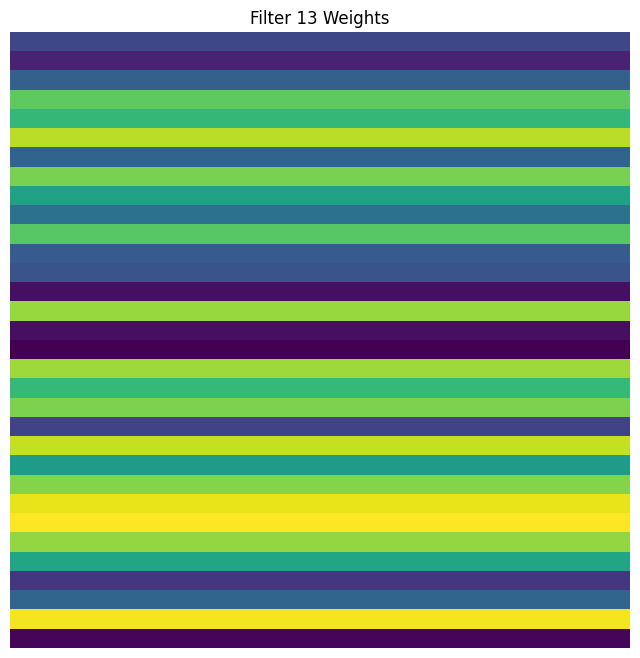

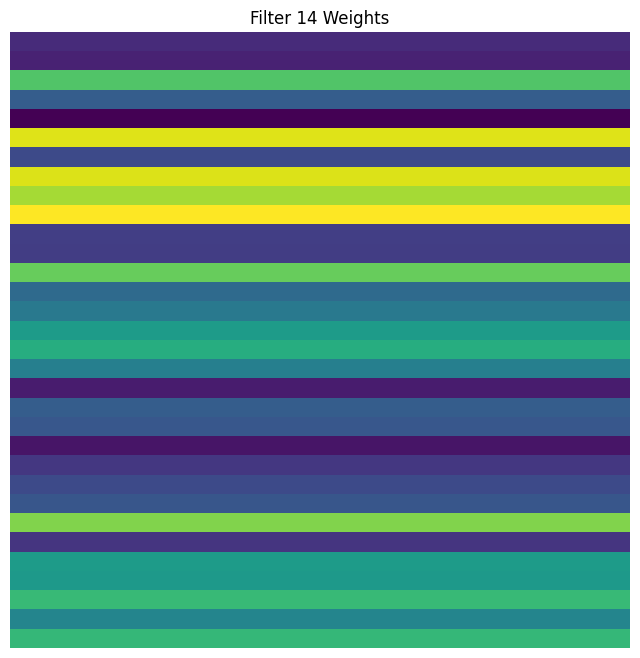

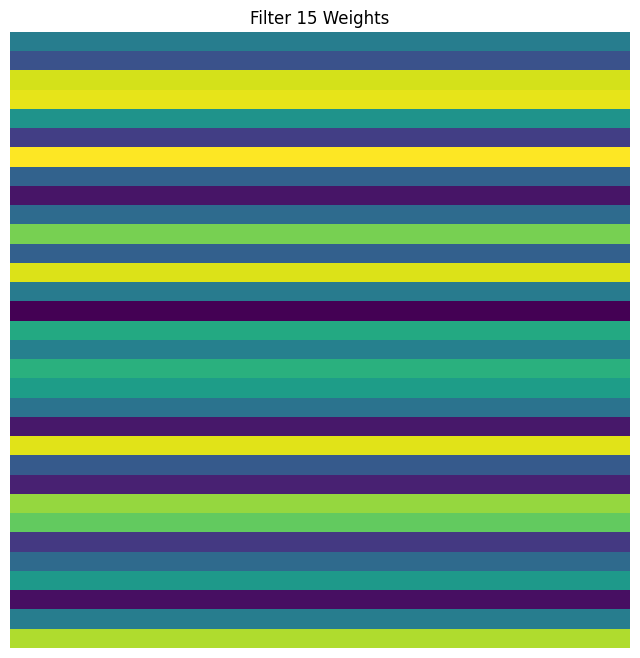

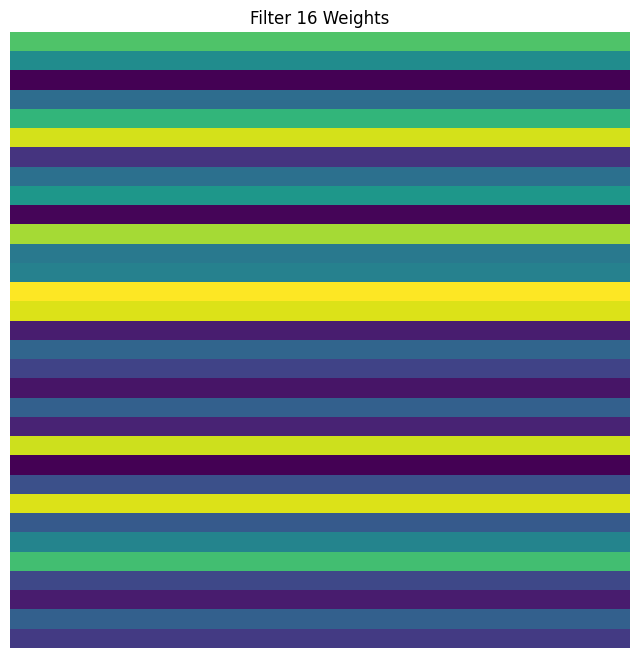

148/148 [==============================] - 0s 766us/step
F1 Score for Question 17: 0.80804248861912

TRAIN QUESTION 18 MODEL
Index(['checkpoint_pct', 'cutscene_click_pct', 'map_click_pct',
       'map_hover_pct', 'navigate_click_pct', 'notification_click_pct',
       'object_click_pct', 'object_hover_pct', 'observation_click_pct',
       'person_click_pct', 'notebook_click_pct', 'elapsed_duration',
       'level_13_count', 'level_14_count', 'level_15_count', 'level_16_count',
       'level_17_count', 'level_18_count', 'level_19_count', 'level_20_count',
       'level_21_count', 'level_22_count', 'event_name_checkpoint_count',
       'event_name_cutscene_click_count', 'event_name_map_click_count',
       'event_name_map_hover_count', 'event_name_navigate_click_count',
       'event_name_notification_click_count', 'event_name_object_click_count',
       'event_name_object_hover_count', 'event_name_observation_click_count',
       'event_name_person_click_count', 'event_name_notebook_clic

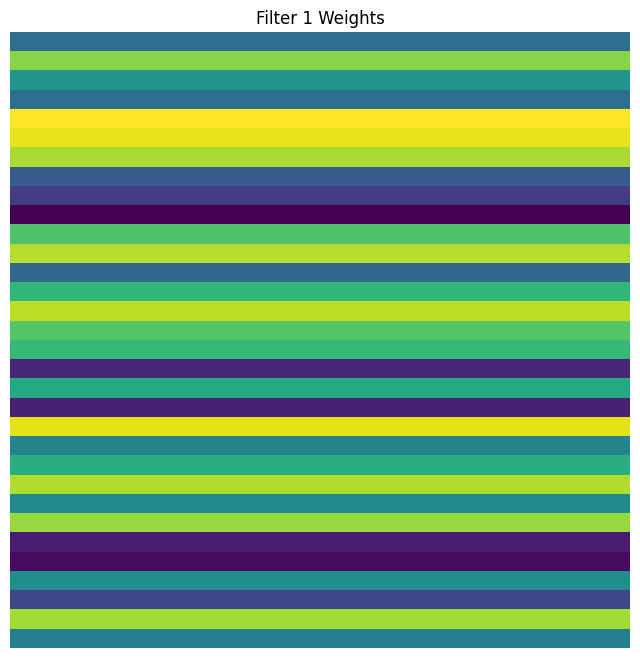

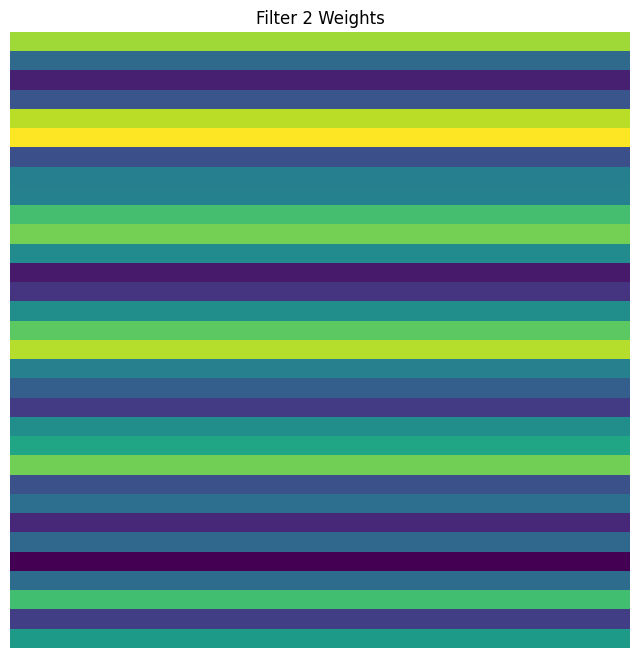

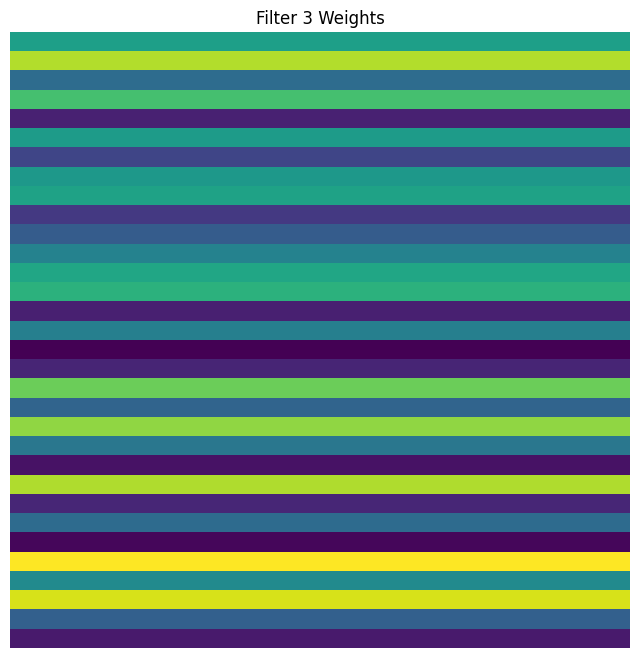

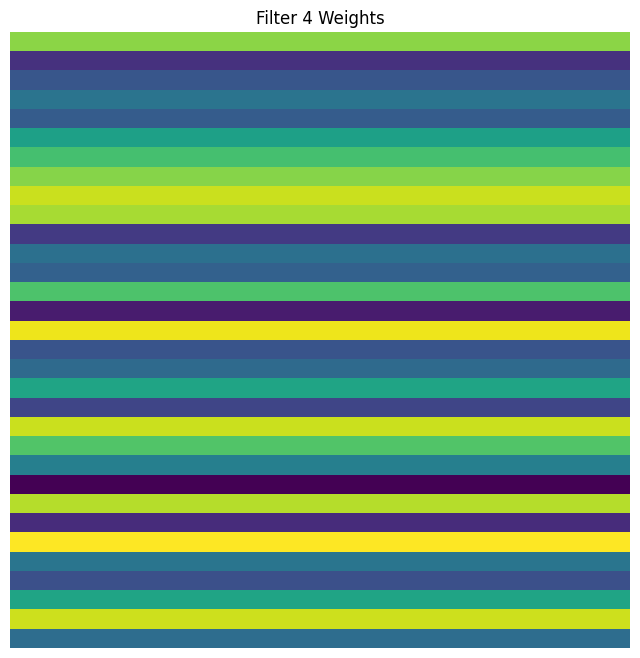

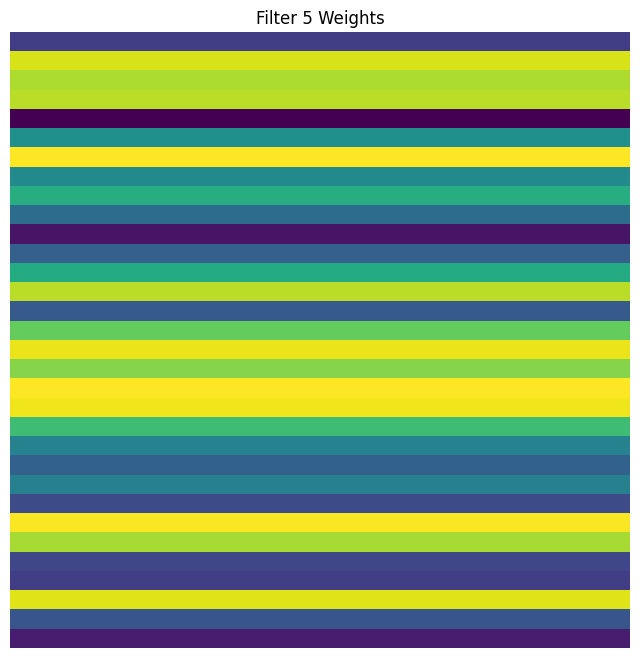

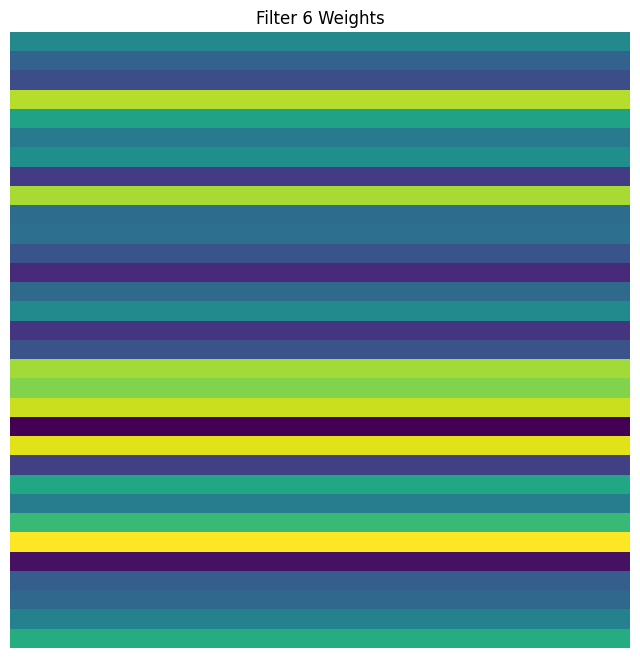

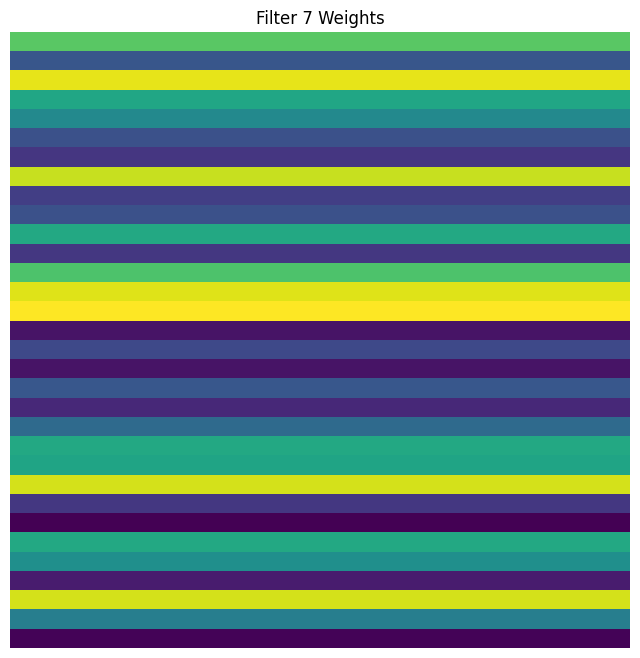

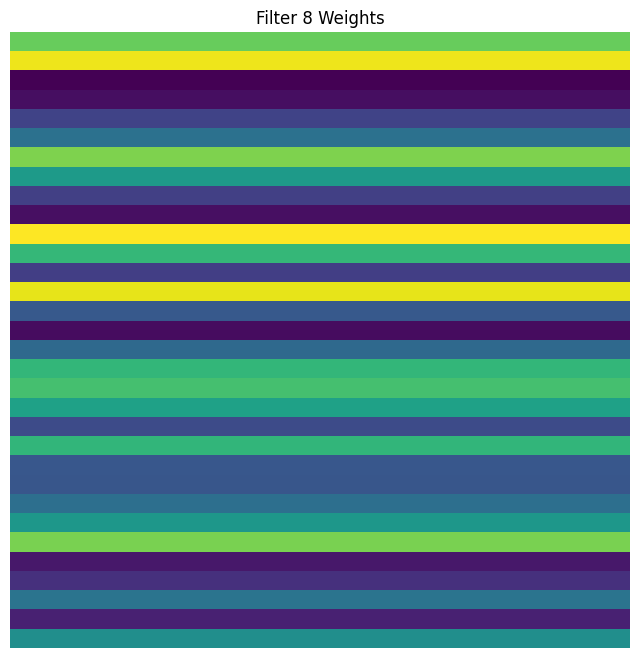

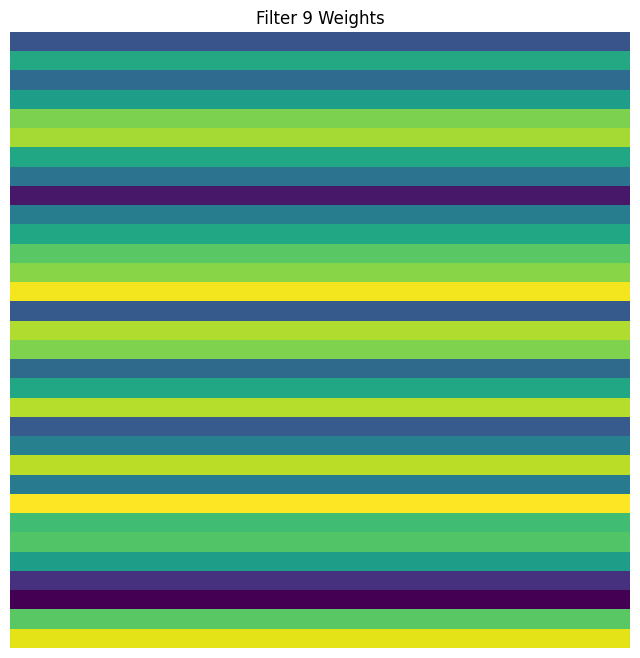

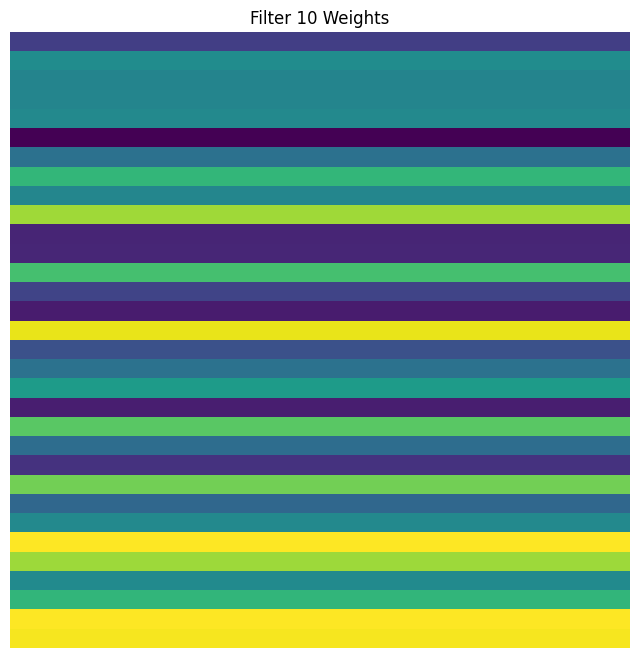

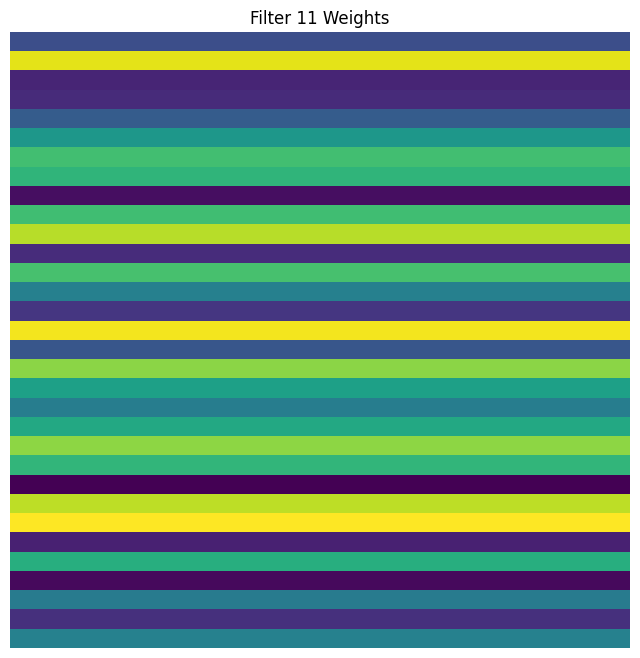

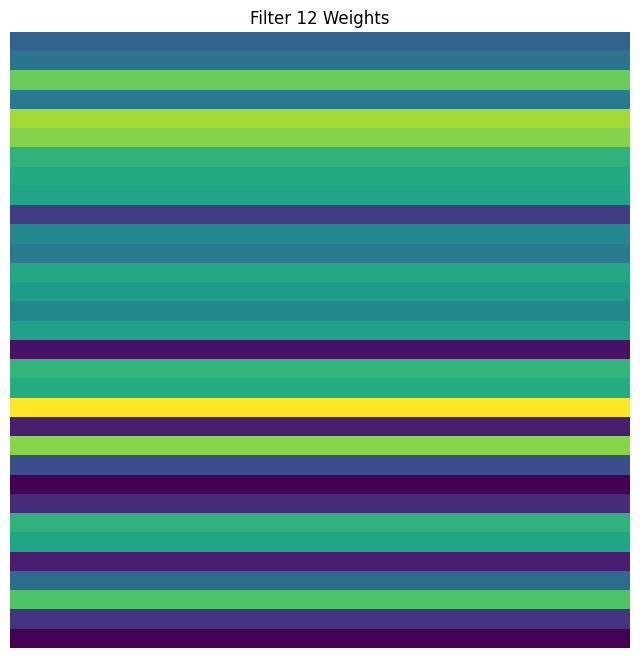

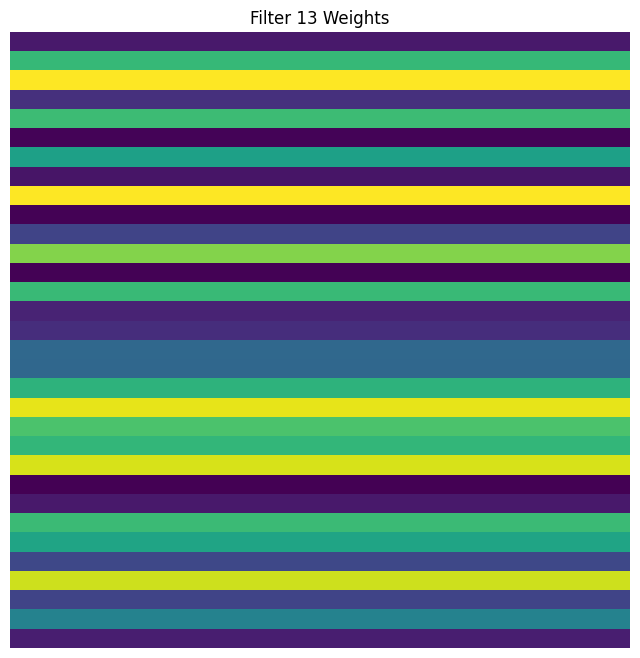

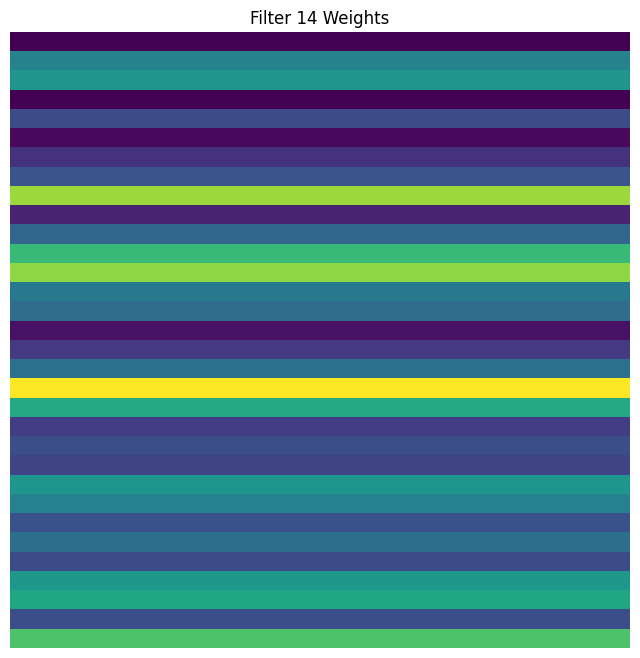

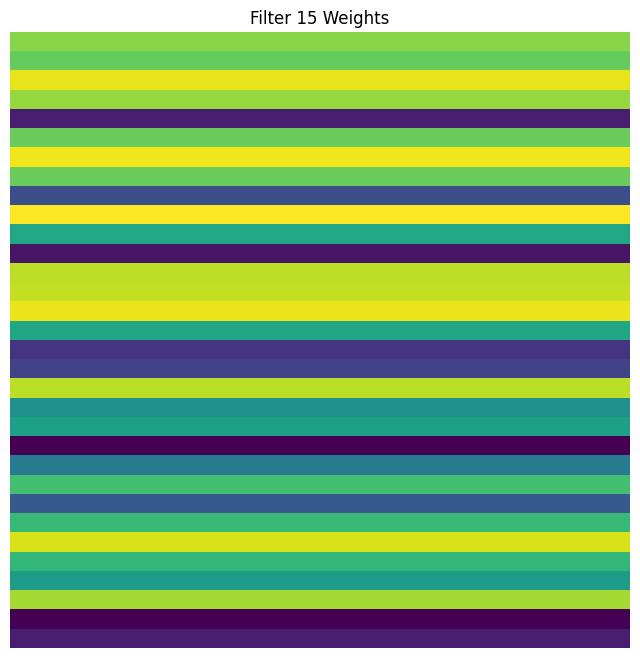

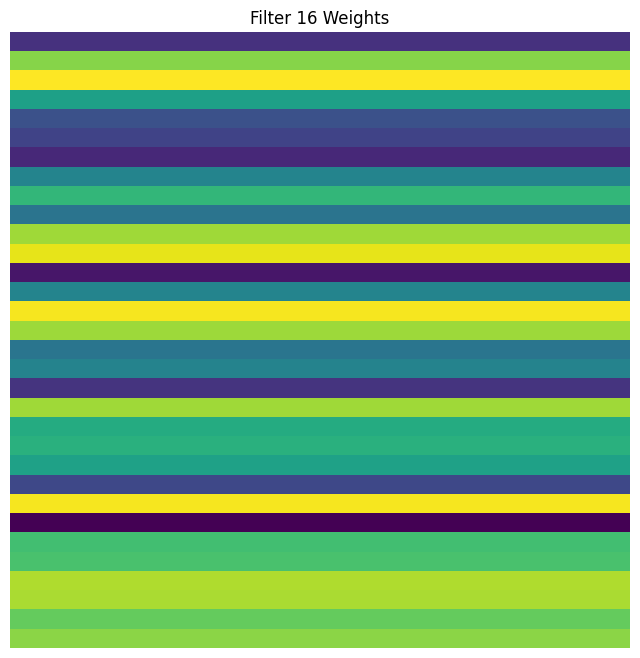

148/148 [==============================] - 0s 787us/step
F1 Score for Question 18: 0.9740966478014802


In [31]:
import warnings
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score
import keras
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

warnings.filterwarnings('ignore')
MODELS_CNN = {}
F1_CNN = {}
for question in range(1, 19):
    print(f'\nTRAIN QUESTION {question} MODEL')
    if question <= 3:
        X = FEATURES1
    elif question <= 13:
        X = FEATURES2
    elif question <= 18:
        X = FEATURES3
    print(X.columns)
    y = TARGETS[TARGETS["question"] == question]["correct"]
    y_one_hot = to_categorical(y)
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    feature_names = scaler.get_feature_names_out()

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_one_hot, test_size=0.2, random_state=42)
    
    # Reshape the input to be 3D (samples, timesteps, features)
    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
    
    model = Sequential()
    model.add(Dense(128, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Conv1D(8, kernel_size=1, activation='relu'))  # Add the Conv1D layer
    model.add(Flatten())  # Add Flatten layer before output layer
    model.add(Dense(2, activation='softmax'))
    
    sgd = keras.optimizers.SGD(lr=0.01, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=sgd , metrics=['accuracy'])
    
    early_stop = EarlyStopping(monitor='val_accuracy', patience=4)
    
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test, y_test), callbacks=[early_stop])
    
    
    ######## plottign model activations
    print('Plotting the model with question number ' + str(question))
      # Your LSTM or 1D CNN model
    layer_idx = 4         # Index of the LSTM or 1D CNN layer in your model
    input_data = X_train[:1] # One or more input samples
    output_data = y_train[:1] # Output labels corresponding to the input samples

    # Plot activations
    #plot_activations_1d_cnn(model, layer_idx, input_data)

    # Plot weights
    plot_weights(model, layer_idx)


    
    
    
    y_pred = np.argmax(model.predict(X_test), axis=-1)
    
    f1 = f1_score(np.argmax(y_test, axis=-1), y_pred)
    MODELS_CNN[question] = model
    F1_CNN[question] = f1
    print(f'F1 Score for Question {question}: {f1}')



##### printing the results

In [32]:
print(F1_NN)

print(F1_SVM)

print(F1_nb)

print(F1_gb)

print(F1_LSTM)

print(F1_CNN)

{1: 0.8468335787923418, 2: 0.9894939965694682, 3: 0.9657669519420671, 4: 0.888651978204217, 5: 0.6651053864168618, 6: 0.8797316722568279, 7: 0.8507609229258714, 8: 0.7548216644649934, 9: 0.8438274665344571, 10: 0.6414407858832091, 11: 0.7813274220889296, 12: 0.9271568404279535, 13: 0.0, 14: 0.835092180546726, 15: 0.5527306967984934, 16: 0.8480997189294879, 17: 0.80804248861912, 18: 0.9740966478014802}
{1: 0.8464080283930975, 2: 0.9894939965694682, 3: 0.9657669519420671, 4: 0.8863367274449444, 5: 0.6993925463799047, 6: 0.8785246876859012, 7: 0.8500916310323764, 8: 0.7555967677838124, 9: 0.8410155287157999, 10: 0.6433915211970075, 11: 0.7809697127258548, 12: 0.9271568404279535, 13: 0.0, 14: 0.8337277369535435, 15: 0.606890648405735, 16: 0.8480997189294879, 17: 0.80804248861912, 18: 0.9740966478014802}
{1: 0.8197419183184781, 2: 0.9538805136795088, 3: 0.9056693099775123, 4: 0.8513761467889909, 5: 0.6979201056454276, 6: 0.8395786104813975, 7: 0.7991631799163179, 8: 0.7234170551962702, 9: 0

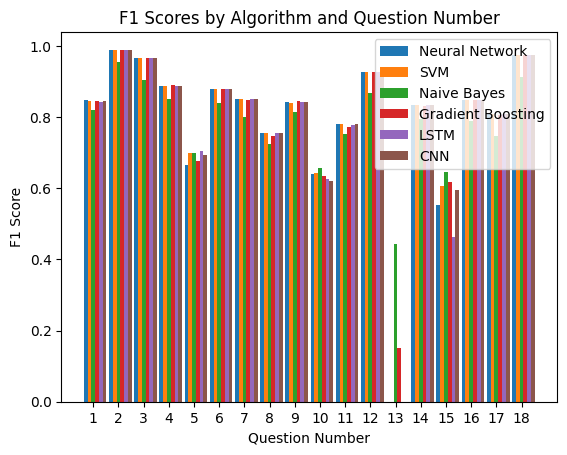

In [33]:
import matplotlib.pyplot as plt
import numpy as np

algorithms = ['Neural Network', 'SVM', 'Naive Bayes', 'Gradient Boosting', 'LSTM', 'CNN']
questions = list(F1_NN.keys())
f1_scores = [F1_NN, F1_SVM, F1_nb, F1_gb, F1_LSTM, F1_CNN]

x = np.arange(len(questions))
width = 0.15

fig, ax = plt.subplots()
rects = []

for idx, f1_score in enumerate(f1_scores):
    rects.append(ax.bar(x - (2 - idx) * width, list(f1_score.values()), width, label=algorithms[idx]))

ax.set_xlabel('Question Number')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Scores by Algorithm and Question Number')
ax.set_xticks(x)
ax.set_xticklabels(questions)
ax.legend()

plt.show()